In [1]:
import os
print(os.path.abspath(os.curdir))
os.chdir("..")
print(os.path.abspath(os.curdir))
import pandas as pd
import numpy as np
import statistics
import tqdm

/Users/greencode/Documents/Code/MCTB/testing
/Users/greencode/Documents/Code/MCTB


In [2]:
from creative_tests import DivergentSemanticIntegration

/opt/homebrew/anaconda3/envs/MCTB/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dummyTest = DivergentSemanticIntegration(
    "gemini-2.5-pro",
    configs=[{"temperature": 1}]
)

[nltk_data] Downloading package punkt to /Users/greencode/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Init large bert uncased


In [13]:
response = "My lover has left. I miss him so much. I write a letter with his favorite stamp pattern. I send it to an unknown place where he may stay."

In [15]:
clean_response = dummyTest.clean_response(response)
clean_response

['My lover has left.',
 'I miss him so much.',
 'I write a letter with his favorite stamp pattern.',
 'I send it to an unknown place where he may stay.']

In [16]:
dummyTest.calculateDSI(clean_response)

sentence:My lover has left
sentence:I miss him so much
sentence:I write a letter with his favorite stamp pattern
sentence:I send it to an unknown place where he may stay


0.7822058200836182

In [3]:
study1 = pd.read_csv("test/DSIpaper/study1_OSF FINAL.csv")
study1

,ID,word_count,readability,freq,aoa,prev,mtld,Story,StoryRater1,StoryRater2,...,gr,verb_sd,open,DSI_ukwac,DSI_subtitle,DSI_baroni,DSI_glove,DSI_TASA,DSI_mean,DSI_bert
0,1,29,1.478879,5.770000,4.911725,2.283600,117.740000,My lover has left. I miss him so much. I write...,3,3,...,14.0,0.856112,41,0.772056,0.909175,0.912602,0.766118,0.989373,0.869865,0.782038
1,2,60,4.026667,6.173509,4.293677,2.327818,48.567073,My mom was sending me a letter in the mail abo...,4,3,...,14.0,0.780211,34,0.710963,0.863542,0.865950,0.709845,0.929250,0.815910,0.780152
2,3,45,6.255556,6.001429,4.568595,2.312564,40.047337,I had to buy a stamp at the post office. I am ...,3,1,...,14.0,0.745793,40,0.773621,0.889742,0.902600,0.763764,0.938546,0.853655,0.774781
3,4,79,4.911241,6.125970,4.432554,2.346056,66.808642,I decided it was time for me to send my mom an...,4,5,...,21.0,0.810063,42,0.718228,0.876303,0.881522,0.701328,0.968681,0.829213,0.803876
4,5,69,8.258261,6.174677,4.316098,2.296615,30.173077,Rachel was sitting in her dorm and decided to ...,3,1,...,18.0,0.787960,39,0.740076,0.875180,0.864324,0.758849,0.938118,0.835310,0.780365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,175,51,5.578578,5.901628,4.585751,2.301860,51.510000,I decided to mail a letter to my long lost fri...,3,3,...,17.0,0.799345,52,0.758199,0.897434,0.891696,0.766109,0.952168,0.853121,0.785225
175,176,68,5.095882,5.977500,4.714911,2.319194,55.313433,My friend from home enlisted in the Air Force;...,2,2,...,21.0,0.757561,34,0.769255,0.905779,0.902116,0.724570,0.972627,0.854869,0.791667
176,177,45,2.695278,6.136750,4.134606,2.302564,28.023649,I wanted to write a letter to my dog. I sealed...,4,5,...,19.0,0.783110,46,0.738283,0.849530,0.868506,0.726774,0.905954,0.817809,0.758907
177,178,52,7.054615,5.976939,4.823347,2.364130,94.640000,My husband had just left for the war and I had...,4,3,...,22.0,0.758494,46,0.736342,0.893560,0.893735,0.727225,0.979268,0.846026,0.814007


In [4]:
dsi_values = []

for index, row in tqdm(study1.iterrows(), total=len(study1)):
    score = dummyTest.calculateDSI(dummyTest.clean_response(row["Story"]))
    dsi_values.append(score)

TypeError: 'module' object is not callable. Did you mean: 'tqdm.tqdm(...)'?

In [30]:
print(statistics.mean(dsi_values))
print(statistics.stdev(dsi_values))

0.7854382275869061
0.01896914189082548


In [37]:
print(statistics.mean(study1.DSI_bert.to_list()))
print(statistics.stdev(study1.DSI_bert.to_list()))

0.7869303207932961
0.019647783563890398


In [6]:
study2 = pd.read_csv("test/DSIpaper/study2_OSF FINAL.csv")
study2

,ID,prompt,rater_mean,rating_k,rating_j,rating_h,rating_n,word_count,readability,freq,...,prev,mtld,Story,DSI_ukwac,DSI_subtitle,DSI_baroni,DSI_glove,DSI_TASA,DSI_mean,DSI_bert
0,1,belief-faith-sing,2.75,2.0,3.0,3.0,3.0,86,3.229690,5.892267,...,2.323378,54.690746,"Being an atheist, I do not take part in religi...",0.747808,0.891598,0.874668,0.695185,0.958695,0.833591,0.795478
1,2,belief-faith-sing,1.50,1.0,2.0,2.0,1.0,41,2.286049,5.974722,...,2.342778,47.068000,I feel very strong with my ways and my belief....,0.703981,0.874534,0.869134,0.684375,0.956801,0.817765,0.765193
2,3,belief-faith-sing,3.00,NaN,2.0,4.0,3.0,41,3.085549,5.979211,...,2.319722,82.320000,My friend have belief in ghosts. He had extra ...,0.707969,0.898194,0.872996,0.732081,0.958882,0.834024,0.792720
3,4,belief-faith-sing,2.50,3.0,2.0,3.0,2.0,33,1.624329,5.829615,...,2.277308,76.230000,I am a nihilist. My belief is that I believe ...,0.724415,0.870367,0.853042,0.753134,0.954720,0.831136,0.781509
4,5,belief-faith-sing,2.75,2.0,3.0,2.0,4.0,70,8.092143,5.804394,...,2.311406,76.222222,Kim is excited to sing with her choir and her ...,0.810232,0.900970,0.899842,0.774679,0.967946,0.870734,0.796356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,149,year-week-embark,4.50,4.0,4.0,5.0,5.0,85,9.642353,5.810625,...,2.317432,77.963576,"In the year of an important election, little D...",0.831472,0.902791,0.901210,0.779734,0.978200,0.878681,0.813045
1067,150,year-week-embark,2.00,1.0,2.0,3.0,2.0,61,5.639467,6.009630,...,2.280517,50.360465,"Whether it is a new year, or just a new week, ...",0.739862,0.867108,0.867627,0.660022,0.957566,0.818437,0.788549
1068,151,year-week-embark,1.75,1.0,3.0,2.0,1.0,27,0.501185,5.855455,...,2.337143,51.030000,I came here last year. I thought it was last w...,0.655854,0.852609,0.849117,0.679541,0.958815,0.799187,0.783586
1069,152,year-week-embark,2.75,3.0,3.0,2.0,3.0,109,8.115455,6.071474,...,2.324043,94.778598,The year 2020 has been an incredibly hard year...,0.747355,0.876013,0.876129,0.687739,0.969537,0.831355,0.809200


In [38]:
dsi_values_study2 = []

for index, row in tqdm(study2.iterrows(), total=len(study2)):
    score = dummyTest.calculateDSI(dummyTest.clean_response(row["Story"]))
    dsi_values_study2.append(score)

  0%|          | 0/1071 [00:00<?, ?it/s]

sentence:Being an atheist I do not take part in religious ceremonies
sentence:I simply do not have a belief in god
sentence:My friends like to sing to express their faith
sentence:I do admire their singing ability and their passion for their faith
sentence:Maybe one day I will change my mind
sentence:There seems to be a consensus that there is a god amonst my friends so I ask them for proof
sentence:They just keep singing
sentence:The singing goes on and on
sentence:I attempt to join in since I


  0%|          | 1/1071 [00:00<13:48,  1.29it/s]

sentence:I feel very strong with my ways and my belief
sentence:My faith is very strong now
sentence:In the past it was very weak
sentence:Sometimes I am so grateful and I just start to sing


  0%|          | 2/1071 [00:01<09:18,  1.91it/s]

sentence:Especially when I hear my favorite songs
sentence:My friend have belief in ghosts
sentence:He had extra faith in god also


  0%|          | 3/1071 [00:01<07:24,  2.40it/s]

sentence:One day he sing a song which he told us that the song was played everyday in his hear
sentence:And he says it is happening exactly 12 oclock
sentence:I am a nihilist
sentence:My belief is that I believe in nothing
sentence:I laugh as I walk past churches
sentence:Seeing all the people of faith praying and singing
sentence:For what


  0%|          | 4/1071 [00:01<07:49,  2.27it/s]

sentence:I say
sentence:Fools
sentence:Kim is excited to sing with her choir and her churches annual belief fest
sentence:She is somewhat nervous about singing lead but everyone has faith in her so she decides to have some in herself as well
sentence:She attends every practice and sometimes stays late in order to practice by herself
sentence:The day of the festival she and her group end up having a great performance and winning the contest


  0%|          | 5/1071 [00:02<07:10,  2.48it/s]

sentence:It was election day and I had faith that my candidate would win
sentence:With this belief I started to sing a song of thankfulness
sentence:As I sat at my computer singing I noticed that it was a tight race
sentence:I decided that I would not look at my computer for the rest of the day until the results came in


  1%|          | 6/1071 [00:02<07:06,  2.50it/s]

sentence:The results came in and he won
sentence:Once there was a village
sentence:There was no rain for so many months
sentence:They all decided to pray together
sentence:A small girl came with an umbrella and she said that there will be rain soon so I brought a umbrella
sentence:The girl had a strong faith and belief
sentence:At last it rained the village people sing in happiness and joy


  1%|          | 7/1071 [00:03<07:26,  2.38it/s]

sentence:I have a lot of faith in God above
sentence:It is my belief that we will be saved from our sins if we accept the gift of salvation from him
sentence:He is my rock and my shelter from  the storm
sentence:I like to sing old gospel songs about my faith it comforts me and lifts my spirits
sentence:I am nothing without the good Lord but with him nothing is impossible
sentence:I pray that all the lost is found before it is to late


  1%|          | 8/1071 [00:03<07:56,  2.23it/s]

sentence:I always hated going to church
sentence:It was always too hot too loud and my faith wasnt that strong either
sentence:My belief in God is complicated and the tonedeaf choir trying to sing hymns and songs of worship are not doing Him any favors
sentence:I keep looking at my watch almost hoping God would grant me telekinetic powers to move watch hands to 1100 so we could leave already


  1%|          | 9/1071 [00:03<07:13,  2.45it/s]

sentence:This is the end she thought to herself
sentence:I must have faith she muttered
sentence:The power of belief was strong with her
sentence:As she drove her car to the funeral she decided to sing his favorite song
sentence:Ill never forget you she thought
sentence:I will love you always she said
sentence:As she pulled into the funeral home parking lot she was amazed by how crowded it was
sentence:Did they all show up for him she wondered
sentence:She was absolutely happy more happy than she has been in a long time
sentence:Love truly is stronger than hat


  1%|          | 10/1071 [00:04<09:03,  1.95it/s]

sentence:I dont know where my died
sentence:I sat at the grave of granny who insisted on a life of church and belief in God
sentence:We would sit for hours and sing hymns and enjoy the spirit but I wondered how it was so enjoyable for her and such a chore me
sentence:I doubted my athiesm
sentence:Is it true that she is looking down on me and seeing my doubt
sentence:A chill went through my body


  1%|          | 11/1071 [00:05<09:02,  1.96it/s]

sentence:The girl sang to the crowd with great passion
sentence:She had been selected to sing because she had faith in herself
sentence:Her belief that if she worked hard and practiced every day she would be good enough to sing at the Grand Ole Opry
sentence:She remembers all the screaming fans listening to her every note


  1%|          | 12/1071 [00:05<08:12,  2.15it/s]

sentence:She was so thankful for the moment
sentence:Jill loves to sing
sentence:She loves singing during worship services at her church the most
sentence:When she is praising her God it strengthens her faith and touches her heart
sentence:She believes that God is listening to her singing and approving of her belief in him
sentence:This connection makes worship music her absolute favorite


  1%|          | 13/1071 [00:05<07:38,  2.31it/s]

sentence:Most Christian belief most things considered okay are immoral
sentence:It is wrong according to their faith
sentence:For instance it is wrong for a Christian to sing secular music
sentence:other people do not see anything wrong with that


  1%|▏         | 14/1071 [00:06<06:42,  2.62it/s]

sentence:There was once a girl named Monica who loved to sing
sentence:Monica would sing everywhere  at home in the shower in the car at church
sentence:She had a strong belief that she sang beautifully
sentence:Monica wanted to try out for the church choir but when she got there and started her performance she was stopped and told she was horrible
sentence:Her faith was destroyed that day
sentence:Monica never sang again


  1%|▏         | 15/1071 [00:06<07:03,  2.50it/s]

sentence:The high priestess of the group stood before the raging fire dramatically lit by the dancing flames
sentence:All of her brethren surrounded her in her imposing headdress for this the final night of rituals and celebration
sentence:They had total faith in her ability to divine truths about the universe and their personal lives
sentence:All as one they began to sing mounting into a crescendo along with the frenzy of rhythmic drumming


  1%|▏         | 16/1071 [00:07<07:19,  2.40it/s]

sentence:Soon the power would inhabit the high priestess and she would begin to speak this divine belief with vigor
sentence:At church last week we went to sing and praise our lord
sentence:We had some ideas to show more faith about life and the virus
sentence:We all have the belief that it will pass and life will get better soon
sentence:Hopefully sooner than later


  2%|▏         | 17/1071 [00:07<06:42,  2.62it/s]

sentence:In the depth of the woods I heard the birds sing
sentence:They knew what was happening but did I have that faith as well
sentence:I wasnt sure I had the belief of those simple creatures
sentence:After all most humans never encounter  the Mythosaur but I felt a magical tingle in the air that suggested that I might be one of the lucky ones
sentence:The woods fell silent as a faint rumble began to shake the trees


  2%|▏         | 18/1071 [00:07<07:03,  2.49it/s]

sentence:Moral thoughts fueled by all of us immediately think what is acceptable and nonacceptable in our world today
sentence:I have faith in our world in creating helpful and logical ways of how we should feel
sentence:Faith in ourselves and our world is everything to all of us
sentence:A belief moves us forward in living in the world
sentence:Following a song or writing a song that impacts us gives all of us a song to sing to make us feel better
sentence:Its a chicken soup book helping us to live our


  2%|▏         | 19/1071 [00:08<07:49,  2.24it/s]

sentence:Every Sunday was an experience that could not be forgotten
sentence:Pastor Troy would preach the gospel and you could sense the belief in peoples voice when they would say Amen
sentence:I know they had faith in the lord because they would never miss a day of Church
sentence:Towards the end everyone would be singing with the gospel and enjoying what was another magical experience at church
sentence:Words could not describe the joy in their voices


  2%|▏         | 20/1071 [00:08<07:50,  2.24it/s]

sentence:My mother was a person who could sing like angels
sentence:She had a strong faith and she loved to express her belief in a higher being through her song
sentence:She would sing the hymns the psalms the spirituals
sentence:Her voice could make anyone have a belief in something greater than themself
sentence:One day she lost her voice vocal cords just wore out and therefore her ability to sing
sentence:But she never ever lost her faith


  2%|▏         | 21/1071 [00:09<08:05,  2.16it/s]

sentence:It was easy to see how strong the congregations Faith was
sentence:Nothing could shake their belief in God
sentence:They loved knew and served Him and it showed in everything they did
sentence:They would sing their loyalty from the top of their lungs every Sunday and preach their knowledge of Him to anyone would cared to listen


  2%|▏         | 22/1071 [00:09<07:17,  2.40it/s]

sentence:My grandmother has a lot of faith in her religion
sentence:She has the belief that when she passes away there will be a heaven for her to go to
sentence:When she goes to church they usually sing songs about their faith


  2%|▏         | 23/1071 [00:09<06:47,  2.57it/s]

sentence:Having faith in her religion makes her a happier person
sentence:Judy had a strong belief in God
sentence:Her faith had been tested many times in her life but she took great comfort in the church
sentence:The joy of her life was to sing every week in the choir and she couldnt imagine what it would be like without her friends there
sentence:She was overjoyed when she was finally made choir leader this week


  2%|▏         | 24/1071 [00:10<06:32,  2.66it/s]

sentence:Jan was a member of her church choir
sentence:She loved to sing with the group
sentence:They often chose songs that emphasized their faith
sentence:Jan had a strong belief in God as well


  2%|▏         | 25/1071 [00:10<06:51,  2.54it/s]

sentence:The music brought her joy
sentence:The rest of the congregation loved the choir too
sentence:Elizabeth was an inspiration to everyone who knew her
sentence:She was always helping someone somewhere
sentence:She could be found running errands or offering rides to medical appointments
sentence:The most amazing part was hearing her in church on Sunday mornings
sentence:Then we knew her faith was real
sentence:The woman could sing like an angel
sentence:Her belief in her God was expressed through her voice in the most amazing manner


  2%|▏         | 26/1071 [00:11<07:40,  2.27it/s]

sentence:The church filled with beautiful sounds of hymns as the choir began to sing
sentence:The pastor could feel his faith being restored by the beautiful music even though it had been challenged so severely in the recent weeks
sentence:I will maintain my belief in God he thought to himself even when his plan is not clear to me


  3%|▎         | 27/1071 [00:11<07:22,  2.36it/s]

sentence:Then he too began to sing
sentence:The little girls grandmother was deathly ill
sentence:Although her family prayed around her bedside she grew weaker and weaker
sentence:Still the little girl never gave up hope
sentence:She stayed faithfully by her grandmothers bedside clasping the old womans hand and singing her to sleep
sentence:Her belief awakened a magic spark inside of her and the next time she opened her mouth to sing a healing spell passed her lips and the grandmother was healed


  3%|▎         | 29/1071 [00:12<05:48,  2.99it/s]

sentence:Singing in triumph whatever assail High on the mountains or low in the vale
sentence:Faith is believing then doubt Him no more Sell all your sorrows your troubles
sentence:The dog ran frantically through the alley
sentence:He needed to have faith to avoid the killer
sentence:The dog killer had taken so many lives that night already
sentence:The dog didnt know if this was the last song
sentence:The last straw
sentence:The last hurrah
sentence:He needed to a strong belief in his own skills in survival to make it through the night
sentence:But the killer is getting faster and smarter as the night goes on


  3%|▎         | 30/1071 [00:12<06:56,  2.50it/s]

sentence:There once was a wild and crazy old Christian rock musician
sentence:He had a strong belief in his faith and used that at the motivation for his music
sentence:He would sing loudly and proudly at his concerts
sentence:At his last concert he was singing so crazily he had a heart attack and died


  3%|▎         | 31/1071 [00:13<06:21,  2.73it/s]

sentence:Growing up my household didnt really practice having faith none at all
sentence:Through my childhood I had to come up with the belief that we may or may not go to heaven one day or well just die and come back in a different life
sentence:I went to church once watched the choir sing and still was really confused with what I believed
sentence:It was until I met with a counsellor of mine who was Wiccan when I decided that that belief was the best for me  it felt right
sentence:Now I sing my own song not to anyone in particular but myself


  3%|▎         | 32/1071 [00:13<06:53,  2.51it/s]

sentence:Ever since I was young I have always had a belief that there is something or someone of a higher power than me
sentence:I always try to keep my faith to this cause it gives me hope
sentence:I always try and tell anyone about this
sentence:I guess I will have to sing for anyone to listen


  3%|▎         | 33/1071 [00:13<06:48,  2.54it/s]

sentence:I do not know what else to do to convince others
sentence:Without faith there can be no life
sentence:So he told me as he donned his Yarmulke in preparation for prayer
sentence:I despised my father for his beliefs
sentence:Raised an Orthodox jew I eventually left the church to my parents great disappointment opting instead to pursue my dream of making rock n roll music
sentence:I could sing
sentence:Thats what everyone had told me since I was little
sentence:When I saw my father I saw a staunch old man without any fire in him
sentence:I didnt want to become like him


  3%|▎         | 34/1071 [00:14<08:49,  1.96it/s]

sentence:You think that gospel singing is easy
sentence:You think you put a little faith in your voice and itll come out angelic or moving
sentence:You think itll strengthen your belief in the big man by singing his praises
sentence:Dont belittle people you dont know
sentence:They work hard to rise up to fame in their own circles in their own way


  3%|▎         | 35/1071 [00:15<08:19,  2.07it/s]

sentence:My friend had a belief in ghosts
sentence:He always watching horror movies
sentence:One day in his dream someone sing a song
sentence:Even after he woke up he heard that song
sentence:i told him to visit a psychiatrist for this
sentence:He visited and later he understood the problem
sentence:Then he relieved from it


  3%|▎         | 36/1071 [00:15<08:25,  2.05it/s]

sentence:The church was filled joy
sentence:Belief was written clear on everyones face as they joined the choir
sentence:The pastor was the first to sing then others followed suit and added their voices to the mix
sentence:Although some didnt know all the lyrics to the song they swayed and cheered as the congregation celebrated their faith under the loving eyes of their God


  3%|▎         | 37/1071 [00:15<07:35,  2.27it/s]

sentence:There was an ant that liked to sing after working hard at the mound
sentence:The other ants worked while the ant sang
sentence:The ant had a belief that if it sang it would make the work go by faster
sentence:The ant had faith that this would work


  4%|▎         | 38/1071 [00:16<07:14,  2.38it/s]

sentence:Before the ant knew it work was done
sentence:I attend weekly prayer at my church The people who visit have lots and lots of belief over the almighty god
sentence:They sing songs to praise him and listening to it will surely increase our faith in him


  4%|▎         | 39/1071 [00:16<06:35,  2.61it/s]

sentence:I always Thank god
sentence:for giving the chance to praise him weekly
sentence:Nancy loved to sign in the church choir
sentence:The old hymns mirrored her faith and belief in life after death and singing was how she communicated this to others
sentence:Nancy waited for the pastor to finish the sermon and the choir director to take over
sentence:Now the group stood and launched into the closing hymn
sentence:Other church members stood up clapping in time and singing along


  4%|▎         | 40/1071 [00:16<06:43,  2.56it/s]

sentence:A child had strong belief in God
sentence:She always sing a song for God after waking up
sentence:She believed that one day God will come in front of her


  4%|▍         | 41/1071 [00:17<06:13,  2.75it/s]

sentence:After few years she decided to serve God for her lifetime
sentence:He wanted to practice his belief in God so he decided to go to a church
sentence:He decided that would be the place where he would be able to show his faith
sentence:As he entered he could hear the choir sing like angels
sentence:The church was gigantic and he felt like he literally entered heaven
sentence:He thought about all the figures that he read about in the Bible


  4%|▍         | 42/1071 [00:17<07:00,  2.45it/s]

sentence:He felt like he was at a dinner table with them
sentence:Most of the peoples belief in their God
sentence:Likewise a mother had faith in God
sentence:She had strong belief on her God
sentence:One day she went to the Church and sing a song and praised the God and came back to her house
sentence:She was so happy along with her family


  4%|▍         | 43/1071 [00:18<07:09,  2.39it/s]

sentence:She felt very happy
sentence:The belief of the priest was evident
sentence:He was losing followers and needed to instill more faith in them


  4%|▍         | 44/1071 [00:18<06:31,  2.62it/s]

sentence:He learned to sing and sang in front of his church goers every Sunday
sentence:The followers started to come back because of this
sentence:Jacob was an atheist he never believe the existence of god but his girlfriend she belief the god and have great faith in the miracles one day Jacob was met an accident on the hospital his girlfriend sing a catholic song to ease his wounds  Even Jacob an atheist he enjoy the way she sung
sentence:The congregation all gathered in the church
sentence:Everyone sat quietly and waited for the pastor to motion for them to begin
sentence:They were all filled with belief that they would someday be saved
sentence:Their faith was strong as they opened their hymn books and began to sing loudly


  4%|▍         | 46/1071 [00:19<05:23,  3.17it/s]

sentence:They sang together in a beautiful harmony like they were angels from heaven above sent to the Earth to bring peace and joy
sentence:Thinking about my feelings and life over the last 10 years I dont think Id still be alive if it wasnt for my faith and belief in God
sentence:Sometimes I wonder why the abuse Ive taken in our marriage hasnt already killed me
sentence:But that which doesnt kill you makes you stronger
sentence:I guess Ill have to believe in that
sentence:Meanwhile only 100 miles to go so Ill sing to myself because at this point Im not even strong enough to keep awake


  4%|▍         | 47/1071 [00:19<05:48,  2.94it/s]

sentence:The belief that human beings come from outer space is a ridiculous claim made by early pioneers in the science world
sentence:There is no evidence or fact to back up their claims and how could it be possible when the DNA in the animal kingdom prove it wrong
sentence:There is a great faith to believe that the human race comes from no where but itself
sentence:If we sing to the song of the false scientists and their wrong claim we will be swayed and deceived in such a way that we will lose our own dignity and conscious minds
sentence:Search for the truth and you will find the truth


  4%|▍         | 48/1071 [00:19<06:36,  2.58it/s]

sentence:The church goers smiled laughed and greeted each other at the door on Sunday morning
sentence:They made their way into the church to sit down and practice their faith talking with each other the whole way
sentence:They sat and quietened down before beginning to sing
sentence:As the pastor spoke about their beliefs and faith the church goers listened intently


  5%|▍         | 49/1071 [00:20<06:17,  2.71it/s]

sentence:Jim has recently became more involved with his religion
sentence:He has been going to church and working with the community on event projects
sentence:They are currently planning a concert where he will sing a duet with the lead singer of the choir
sentence:They will sing a song about their faith and hopes for the community


  5%|▍         | 50/1071 [00:20<06:29,  2.62it/s]

sentence:Their belief is that good actions will bring about good fortune so its always incorporated in their hymns
sentence:Everything was hanging on her ability to sing
sentence:She waited poised in front of the audience clinging to her frail belief that she could pull this off
sentence:Everyone was counting on her today
sentence:She took a deep breath reminding herself to have faith and confidence in herself
sentence:Everyone else did after all


  5%|▍         | 51/1071 [00:21<06:39,  2.55it/s]

sentence:And then she began to sing and the audience beamed with pride
sentence:A man had a belief that his best friend was talking about him behind his back
sentence:The man was hurt because he would never do that to his friend and he had faith that his friend would never do that to him but he was wrong
sentence:The man was a musician so he decided he was going to sing his frustrations to his friend the next time he saw him
sentence:When he saw his friend he did just that
sentence:He sang until the friend understood why his feelings were so hurt


  5%|▍         | 52/1071 [00:21<06:47,  2.50it/s]

sentence:Her diagnosis was clear she had cancer
sentence:This would begin her journey of treatment and suffering  in her battle against cancer
sentence:However she had faith
sentence:She loved to sing and even more she loved to sing about her faith
sentence:She would face her journey her struggle against cancer with the strong belief that God was with her
sentence:She would sing and sing until her body couldnt physically do so any longer
sentence:Her mind had complete faith


  5%|▌         | 54/1071 [00:22<05:51,  2.90it/s]

sentence:In every year my office organize the party and in that party Ising the song and everyone had very belief on me because of the party was very big and then they had very faith on the my singing levelsso this faith make me more comfortable to belief on the party people
sentence:I wanted to sing in the choir but I couldnt convince the members of the congregation to let me in
sentence:You see I had my faith challenged last week
sentence:My belief that God existed had flipped and I was ready for church to let me in
sentence:However they didnt think my intentions were true
sentence:How could I explain that I was genuine despite my widelyknown criminal history


  5%|▌         | 55/1071 [00:22<06:10,  2.74it/s]

sentence:I am i very strong christian who belief in the existence of a mighty being he is above every creature
sentence:My faith in him has increased over the year because i have encounter lot of troubles that will have make me turn my faith from him
sentence:I also sing praises to him to thank him for his mighty works in the lives of my family
sentence:I belief my faith in him will never fade


  5%|▌         | 56/1071 [00:22<05:56,  2.84it/s]

sentence:Recently the woman had begun to question her faith and belief
sentence:It had been a rough month and an even rougher year
sentence:She hadnt been to church in a while
sentence:She could almost hear the choir sing in her head even sitting there alone in her den


  5%|▌         | 57/1071 [00:23<05:58,  2.83it/s]

sentence:She missed it dearly but she didnt know if it was actually anything but just words
sentence:I was asked to sing at a benefit
sentence:It was for people of the Christian faith
sentence:It was open to anyone but it was sponsored by the Christian community
sentence:They would have many different singers and musicians playing uplifting music
sentence:It is my belief that many people will be uplifted by listening to music
sentence:I feel that many will be saved after listening to music


  5%|▌         | 58/1071 [00:23<06:20,  2.66it/s]

sentence:I am strong in my faith
sentence:My belief is that to sing is to express my belief with others and let the spirit move within me
sentence:I can feel the emotion build within me and I am living the life in accordance with my faith
sentence:When I see others who listen to my song feel this emotion is incredibly uplifting to me


  6%|▌         | 59/1071 [00:24<05:56,  2.84it/s]

sentence:The young frog loved life and all of the natural spirits
sentence:To show his belief and joy he often sang beautiful songs
sentence:But the jealous lizards questioned his faith saying he was only happy because of his beautiful voice and asked a witch to curse him
sentence:So now the frog can only sing in croaks


  6%|▌         | 60/1071 [00:24<06:02,  2.79it/s]

sentence:But the frog and the natural spirits love his songs all the same
sentence:It was her belief that everything would be ok She approached the red dinosaur and pet its nose
sentence:She cried with fear but she still had faith that the beast would be tame


  6%|▌         | 61/1071 [00:24<05:19,  3.16it/s]

sentence:It looked at her curiously as she began to sing Michael Jacksons Thriller to it
sentence:It was Whoopis belief that she could help the choir at the church
sentence:Her passion was to sing and her faith was strong


  6%|▌         | 62/1071 [00:24<05:09,  3.26it/s]

sentence:She started training the choir and they had never been so excited
sentence:They went to the competition in the fall and blew away all of the other choirs
sentence:John began to question his faith after he lost everything in the mortgage crisis of 2008
sentence:He always trusted his abilities but without a penny in his pocket he was headed for a tragic end
sentence:As he walked the streets of New York he stumbled upon a church and walked inside
sentence:He began to sing along with the choir
sentence:It was there that he got his belief back
sentence:He thought to himself I can climb back to the top
sentence:Fast forward ten year and he is now one of the most successful hedge fund managers on the Eas


  6%|▌         | 63/1071 [00:25<06:27,  2.60it/s]

sentence:My mother loved to sing it was her way of expressing her faith
sentence:She loved to talk about God and jesus and how christianity was the only way
sentence:I on the other hand held different beliefs
sentence:I did not believe in the bible or that there was a man sitting in the clouds looking down on me
sentence:She held her faith until this one night when she was abducted by little green men as she calls them
sentence:And they changed her views


  6%|▌         | 64/1071 [00:25<07:00,  2.39it/s]

sentence:It wasnt our belief but it belonged to her and we loved her and wanted to support her in her faith and in her illness
sentence:To sing with her made the pain tolerable
sentence:So she sang and we sang with her sang as loudly and as melodiously as we could
sentence:There were only a few other people there this early in the day


  6%|▌         | 65/1071 [00:26<06:50,  2.45it/s]

sentence:But she was there and we were with her
sentence:The church bells rang out as everyone bang to shuffle in
sentence:The preacher took the stage as he asked everyone to sit
sentence:He delivered a powerful sermon that strengthened their faith and belief
sentence:Afterward they all rose up as the choir began to sing
sentence:The crowd swayed back and forth in harmony until the end of the service


  6%|▌         | 66/1071 [00:26<06:36,  2.53it/s]

sentence:She anxiously awaited the return of inperson church
sentence:Although she attended online it just wasnt the same
sentence:She still had faith but it was somewhat muted since the pandemic began
sentence:She loved to sing the hymns from the hymnal


  6%|▋         | 67/1071 [00:27<06:27,  2.59it/s]

sentence:Her belief was that it somehow made her more connected to God
sentence:Many people have a belief in a higher power they refer to as their god
sentence:Having this belief is called faith and people gather in large fancy buildings each week usually on a Sunday to practice this faith
sentence:While there they all sit facing the front of the building where one man gives a lecture they spend some time singing songs then they all get up and file out
sentence:They also sometimes engage in some ritualistic hand shaking and hugging then they all head home again
sentence:Weird huh


  6%|▋         | 68/1071 [00:27<06:44,  2.48it/s]

sentence:I grew up in an Evangelical church
sentence:My faith was very strong and I never doubted my belief in God
sentence:I would sing songs during the worship service and put money in the offering basket


  6%|▋         | 69/1071 [00:27<06:30,  2.57it/s]

sentence:I remember those times very well
sentence:I remember as a kid how much I dreaded going to Church
sentence:It was the same old boring speeches and dull atmosphere
sentence:Now I have become way more appreciative of my faith now that I became a member of the choir
sentence:I always held the belief that I was born to sing but I never felt that singing such powerful songs would give me so much satisfaction
sentence:It was a complete turnaround that gave so much joy to myself and all the churchgoers watching us


  7%|▋         | 70/1071 [00:28<07:00,  2.38it/s]

sentence:It was a beautiful morning and Jacob was heading to the church with his mom
sentence:Her faith was central to her life and even the death of her husband in such atrocious way hadnt been able to diminish her strong belief in God
sentence:Even Jacob was able to perceive that there is something bigger in the world than our eyes can see and he was very happy to go to the church to pray and sing with all his friends
sentence:Even if
sentence:Deep inside him he thought that losing his dad was a big injustice and he was suffering a lot for it


  7%|▋         | 71/1071 [00:29<08:15,  2.02it/s]

sentence:Nellie the elephant wanted to sing
sentence:It was her mothers belief that she could be a big star
sentence:Ever since she was little her voice boomed through the house
sentence:She had faith that she would be the biggest celebrity singer of all time


  7%|▋         | 72/1071 [00:29<07:41,  2.16it/s]

sentence:Unfortunately she lost her voice in a tragic poaching accident
sentence:During the Christmas season there was a rambunctious crowd of kids
sentence:Instead of the usual carolers these children would sing songs of the devil
sentence:They did this to shake the faith of the people living in this town
sentence:There was a belief that these children were the spawn of the devil
sentence:A local priest doused them with holy water and these children were revealed to be servants of the devil
sentence:They were exorcised and peace returned to the town again


  7%|▋         | 73/1071 [00:29<07:53,  2.11it/s]

sentence:A day so beautiful it made me want to sing
sentence:I had reached the trailhead and was ready to begin my trek to complete through hiking the Appalachian Trial
sentence:I looked forward to fulfilling my faith I could complete a 2100 mile journey through this gorgeous country


  7%|▋         | 74/1071 [00:30<07:22,  2.25it/s]

sentence:Its my belief that one needs to connect deeply with nature and I wanted nothing more than to see the great state of Maine 45 months in the future
sentence:A poor girl was passionate about singing
sentence:She decided to participate in a local competition held in her area
sentence:She believed herself and faith on God
sentence:She sang in a confident way and won the competition


  7%|▋         | 75/1071 [00:30<06:29,  2.56it/s]

sentence:She jumped up out of her seat upon hearing the news
sentence:She wanted to sing and dance
sentence:Her belief in love and life compelled her to move
sentence:She enjoyed herself maybe a bit too much


  7%|▋         | 76/1071 [00:30<06:34,  2.52it/s]

sentence:The cancer had tested her faith for over three years
sentence:But now it was over she had a reason to celebrate again
sentence:ever since I was younger I had this undeniable faith
sentence:I dont know where it stems from but I just know its like instinct
sentence:and this instinct seems to drive me to sing
sentence:when I sing I sing a language thats completely unknown to the world
sentence:no one knows what the words mean
sentence:but my belief never wavers if I keep singing hes bound to come back
sentence:when he does should I be worried


  7%|▋         | 78/1071 [00:31<05:46,  2.86it/s]

sentence:Sometimes ago when i was told to have faith and belief in God that everything seems difficult will soon come to an end
sentence:I did nothing than to sing praises to God
sentence:Billy has been practicing on the church organ after school because he doesnt have a piano at home
sentence:Sometimes he likes to sing along with the hymns that he his practicing to make it less boring
sentence:Billy really didnt have much faith in religion before he started practicing at the church but after singing along with the hymns he is starting to develop a belief in the nice things the hymns have to say
sentence:Maybe piano lessons arent so bad after all


  7%|▋         | 79/1071 [00:32<05:56,  2.79it/s]

sentence:The choir for the church had immense faith for the lord
sentence:Their belief allowed them sing beautifully
sentence:It was a coordinated ensemble and it was impressive


  7%|▋         | 80/1071 [00:32<05:39,  2.92it/s]

sentence:The pastor was so pleased
sentence:My faith has waned
sentence:In no longer hold the belief I once did and I feel truly empty and hopeless
sentence:At this point I may as well end the journey and return home
sentence:But as I peer down the cavern I see lights flicker and a faint voice emerge
sentence:Something is calling to me asking me to sing the words of my people


  8%|▊         | 81/1071 [00:32<06:30,  2.53it/s]

sentence:I ignore my plight and give in to the request emptying my heart one more time
sentence:Claire stood on the stage with the rest of the church choir
sentence:She was ready to sing her faith and belief in God up to the heavens
sentence:She had practiced for hours for her solo
sentence:Her fellow choir members were counting on her
sentence:She was prepared to blow them away
sentence:She took her spot and began to sing
sentence:She nailed her part and took her place back in the stands
sentence:She felt proud and accomplished


  8%|▊         | 82/1071 [00:33<07:50,  2.10it/s]

sentence:All the people in town sing in the church choir
sentence:They have a strong belief in God and the goodness of people
sentence:They say their strong faith keeps them happy
sentence:I went to their church last week and everyone was really nice


  8%|▊         | 83/1071 [00:33<07:41,  2.14it/s]

sentence:They invited me to come back and I think I will
sentence:I made a lot of friends there
sentence:If I had more faith I would believe in God
sentence:I however do not and I fail to see God as some real figure
sentence:The belief in religion is very archaic and although I do not believe I wont look down on people that do
sentence:In actuality I kind of like choir


  8%|▊         | 84/1071 [00:34<07:25,  2.21it/s]

sentence:The way they sing is quite beautiful
sentence:The man looked up to the cross
sentence:He heard the angels begin to sing
sentence:He had thought for a long time about his faith and whether or not he had enough belief in this farfetch ideal to continue
sentence:As the song in his head began to dim his doubts about his religion became stronger and stronger


  8%|▊         | 85/1071 [00:34<06:54,  2.38it/s]

sentence:Berry was about to sing in the choir
sentence:The choir was a staple of the church and in this church the faith of the believers was put on display in the form of song and prayer
sentence:It is the belief of the parishioners that you can pray to God and when you call on him he will answer
sentence:You sing your praises in response


  8%|▊         | 86/1071 [00:35<06:19,  2.59it/s]

sentence:One of my childhood friends is a very religious person who had so much belief and faith in Jesus
sentence:her only childhood dream is to sing in the quier of the church as she loves to perform and praise Jesus
sentence:Once she got the chance but later it was never given to her as some other kid is singing better than her
sentence:from that day onwards she did keep her faith but she lost the intention to sing


  8%|▊         | 87/1071 [00:35<06:05,  2.69it/s]

sentence:I had a belief in ghosts
sentence:But my friend only had faith in god
sentence:One day he told me that someone sing a song and he heard it for every midnight
sentence:He was so scared by this


  8%|▊         | 88/1071 [00:35<06:26,  2.54it/s]

sentence:But I told him to visit priest
sentence:He visited and prayed
sentence:I was never what you could call a person of faith
sentence:That confused a lot of people because I sang in the church choir
sentence:They seemed to equate love for music with genuine faith
sentence:If they saw what I did behind closed doors they would know just how wrong they were


  8%|▊         | 90/1071 [00:36<04:46,  3.42it/s]

sentence:from my child hood days of my life i want to be become a singer but my family does not have financial status for that achieved but i faith to belief my self to be sing the many of the songs in the cinema and i hope to achieve the dream life
sentence:Maya always had strong belief
sentence:She had to if her faith would lead her to meditate under a freezing waterfall
sentence:Most wouldnt be able to handle the temperature let alone meditate but Mayas belief was able to get her through the experience
sentence:After this test she was asked to sing to her followers
sentence:This scared Maya more than the waterfall


  8%|▊         | 91/1071 [00:36<05:18,  3.07it/s]

sentence:I have been struggling with my faith since Trump took office
sentence:He goes against any belief I have in the goodness and decency of humanity and people to do what is right and just in this world
sentence:Sometimes I get so down and frustrated that I feel like I am looking up from the bottomless pit of despair
sentence:And then it happens
sentence:I begin to sing Dont worry about a thing and Bob Marleys words lift my spirits and renew my faith
sentence:Simple songs simple thoughts and a belief that every little thing will be alright


  9%|▊         | 92/1071 [00:37<06:31,  2.50it/s]

sentence:I remember going to church when I was younger
sentence:There used to be these big signs in the entrance that said belief and faith
sentence:I actually liked it when the choir would sing


  9%|▊         | 93/1071 [00:37<06:28,  2.52it/s]

sentence:I would always memorize the songs and sing them at home
sentence:It was a good time back then
sentence:There was once a song that brainwashed someone
sentence:The person would sing it because it was said it would be bring good luck
sentence:All it did was make the person feel a certain way though just as watching certain news sources over a long period time may make you have a certain bias this song did that also
sentence:The persons belief was that it was working but the song made him a rude person and the person saw luck as wealth and as the person continued he lost faith in his real religion and started acting like the song was a religion but as we all know it was propaganda


  9%|▉         | 94/1071 [00:38<06:46,  2.40it/s]

sentence:Hope was excited about her first day in the church choir
sentence:She was nervous about singing in front of such a large group of people and it was a special day
sentence:Her grand other used to sing in the exact same choir and said that music was the easiest expression of belief in her faith than any other form of praise


  9%|▉         | 95/1071 [00:38<06:33,  2.48it/s]

sentence:Hope wanted very much to carry on that legacy and took comfort in the memory of that conversation
sentence:People that following a religion put their trust in faith
sentence:They follow their belief and it truly makes so many happy
sentence:They will sing their joy to everyone
sentence:It is interesting so many can put their trust in something so intangible
sentence:However it makes them whole


  9%|▉         | 96/1071 [00:38<06:13,  2.61it/s]

sentence:I stood at the edge of the cliff gazing across the chasm to the other side
sentence:It was the walk of faith to prove myself true I must make it across
sentence:Many had lost their lives to this endeavor but I would prevail
sentence:My belief was strong though not in the false god the villagers worshiped but in my own powers
sentence:I took a step into the nothingness and another and another
sentence:Halfway across I began to sing


  9%|▉         | 97/1071 [00:39<06:36,  2.46it/s]

sentence:The Girl struggled with her faith throughout her life
sentence:She believed that everything happened for a reason and that her good actions would be rewarded
sentence:After constantly losing all of the people she cared about in her life she began to further question her belief
sentence:When she would sing some of the sadness would go away


  9%|▉         | 98/1071 [00:39<06:27,  2.51it/s]

sentence:This was her coping mechanism to wash away all the negative thoughts she had
sentence:I was having a conversation with a friend about my belief in God
sentence:At some point in the conversation I explained to my friend that faith was the substance of things unseen
sentence:My friend had a problem believing in something that was not provable or had no evidence
sentence:He didnt believe in God but I knew why
sentence:While I was having this conversation I listen to the gospel singer sing songs of praise in the background and it felt like this conversation was just so meant to be
sentence:After the conversation ended I got in my car and went home


  9%|▉         | 99/1071 [00:40<07:09,  2.26it/s]

sentence:I had lost all of my faith
sentence:I was worried and in a dark place
sentence:My faith  my belief it was all lost
sentence:I then heard a voice  it was beautiful


  9%|▉         | 100/1071 [00:40<07:09,  2.26it/s]

sentence:I thought of it as a sing from above my faith was recovered
sentence:My belief is stronger than ever
sentence:Our faith stems from our religious beliefs
sentence:We sing our praises to show our faith
sentence:Our beliefs have help us through our struggles
sentence:Knowing that god is there for us
sentence:This keep our faith strong


  9%|▉         | 101/1071 [00:41<07:04,  2.29it/s]

sentence:Faith and belief in god is what we need right now
sentence:Bobby had an amazing ability to sing
sentence:He had a beautiful tone and was ability to belt notes with a great emotional delivery
sentence:He had faith in himself that he would become famous and gain global recognition for his music
sentence:His belief paid off one day when he checked his analytics on his music and saw one of his songs has amassed over 1000000 plays overnight
sentence:It wasnt exactly an overnight success however because he had been manifesting this for years


 10%|▉         | 102/1071 [00:41<07:07,  2.26it/s]

sentence:Our faith tells us to believe without seeing
sentence:Our belief in what isnt tangible is strong and we sing to the Heavens our song
sentence:One of joy sorrow and peace


 10%|▉         | 103/1071 [00:41<06:28,  2.49it/s]

sentence:We come together in harmony with our friends and family forgetting the outside world for a while
sentence:The church choir was practicing their show for the Sunday service when an explosion rocked the building
sentence:The gas line had ruptured right before they were going to sing the first song
sentence:There was no one injured in the explosion and the parishioners believe their faith and belief in God is what protected them
sentence:The local fire chief said it was probably the concrete floor that saved them though


 10%|▉         | 104/1071 [00:42<06:13,  2.59it/s]

sentence:Maria attends church every Sunday
sentence:Maria enjoys going to church because it strengthens her faith and belief in her God
sentence:One of her favorite things to do at church is sing
sentence:She has worked very hard over the years to join the gospel and now for the first time she is singing in the gospel at the age of 14


 10%|▉         | 105/1071 [00:42<06:21,  2.53it/s]

sentence:Maria could barely sleep last night because she was so excited
sentence:My friend has a belief in Bigfoot
sentence:Im not sure where this belief comes from but she has total faith that Bigfoot is real and does magical things in reality
sentence:My friend really likes to go camping which she uses to practice her belief in Bigfoot
sentence:She often brings her guitar when she camps
sentence:She usually will sing songs about Bigfoot to express her belief and faith in his existence


 10%|▉         | 106/1071 [00:42<06:29,  2.48it/s]

sentence:I love to sing
sentence:When I was little thats all I would do
sentence:I would sing when doing anything always songs I made up on my own
sentence:I didnt really think I was good though
sentence:Until I met Josh
sentence:He told me to have faith in myself
sentence:He told me that my belief should be my success
sentence:That I should tell the world my thoughts through song
sentence:I remember singing for the first time in front of others
sentence:I was so scared
sentence:But I had a belief that I could do anything
sentence:Because of Josh


 10%|▉         | 107/1071 [00:43<08:43,  1.84it/s]

sentence:During my college days I always love to sing songs
sentence:And I believe that I can be a greater singer in the future
sentence:Belief is not only a word
sentence:Its my faith and confidence forever


 10%|█         | 108/1071 [00:44<07:28,  2.15it/s]

sentence:In downtown Nashville Tennessee there was a little girl named Ashley who had great faith in god and would sing his praises
sentence:Her belief was so strong that nothing could ever shake her as she grew up she kept on believing in god
sentence:She kept on singing for her church she went to seminary school and ended up becoming the pastor of that same church after she graduated
sentence:It turns out her faith belief and love of singing was all she needed to have a happy life
sentence:She ended up getting married and having a large nice family and she lived happily ever after


 10%|█         | 109/1071 [00:44<08:18,  1.93it/s]

sentence:The pastor was also the head of the youth group
sentence:He wanted to make sure the kids had a fun way to express their faith and belief about the Lord
sentence:He would set up after school karaoke sessions where the group would sing christian rock ballads


 10%|█         | 110/1071 [00:45<07:28,  2.14it/s]

sentence:As time went on the group got so good they decided to form their own band known as Faith Plus One
sentence:The church choir was singing their favorite song as loud as they could
sentence:Their faith was unwavering that much is true everyone could see it
sentence:Their beliefs carried their voices to the heavens
sentence:As the choir was done singing the church erupted into applause for the incredible performance


 10%|█         | 112/1071 [00:45<05:30,  2.91it/s]

sentence:In the birthday party and there are lot of faith on me because of I know sing and belief on that party and also my singing
sentence:So the birthday party is very well organized and thye belief in me are not lost and I sing very well
sentence:As Ned stood at the pew and looked around at the other churchgoers he found he just couldnt understand
sentence:They would stand and sing their hearts out when the pastor called for it sit and murmur zealously while he gave his sermon
sentence:Ned had never felt any real belief in any religion and had could not understand other peoples faith
sentence:It couldnt be real could it
sentence:Yet when the next song began Ned felt something
sentence:A humming through his whole body as if he was being carried away by a higher power and along with that power he heard a voice a deep and booming one


 11%|█         | 113/1071 [00:46<06:39,  2.40it/s]

sentence:He had such a strong belief in his faith that every time he thought of God he just wanted to sing his happiness
sentence:It wasnt always that way he would be sad and angry for no reason that he knew of
sentence:But then one day he encountered another person who said why do you have such sadness and anger
sentence:He replied I do not know what it just comes to the surface
sentence:The stranger said maybe you should open up your heart and let God in and you will find a new happier person within you
sentence:The stranger gave him a slip of paper with an address on it
sentence:For some reason he decided to go to that address
sentence:There he was welcomed by a many of happy people
sentence:They gathered for song and then for some reason his heart told him to sing he did and the sadness started to lift and the more he sa


 11%|█         | 114/1071 [00:47<09:23,  1.70it/s]

sentence:Although I am not religious I was raised to have faith as a Christian
sentence:My brothers and I were enrolled in an after school Christian program that encouraged the members to sing if they were so inclined
sentence:This is where I began singing in my life and the choir was a fascinating thing when I was young
sentence:My belief in a higher power is no longer eminent in my life but I still am thankful to the church for showing me the power of singing which is something I still enjoy doing


 11%|█         | 115/1071 [00:47<08:29,  1.88it/s]

sentence:Janices church was a highly popular church
sentence:Many people of all kinds would go there to renew their faith or further their belief in god
sentence:They often would break into songs about their love for god
sentence:Some would prefer to dance rather than sing and some preferred silently praying by themselves


 11%|█         | 116/1071 [00:47<07:24,  2.15it/s]

sentence:She had self belief she knew she was the best
sentence:This was the time to show it
sentence:She was going to sing like her life depended on it
sentence:They would all see


 11%|█         | 117/1071 [00:48<07:17,  2.18it/s]

sentence:She had faith in her abilites she was better than everyone else
sentence:She opened her mouth nothing came out
sentence:A young girl named Emma was always a shy little one but always wanted to break out of her shell
sentence:She loved to sing but was afraid to sing alone in front of people
sentence:She had the idea of going to her local church and joining the choir
sentence:She did just that and had faith in herself that she could sing with others
sentence:Her belief in herself and ability drove her to be the lead singer in her choir after just 1 month


 11%|█         | 118/1071 [00:48<07:23,  2.15it/s]

sentence:I sing in the church choir
sentence:I have a belief that if you sing during the church service God will hear us when we pray
sentence:There are many members of the congregation in our choir who also have the same belief
sentence:The songs we sing give glory to God and all of his creations


 11%|█         | 119/1071 [00:49<07:02,  2.25it/s]

sentence:They also strengthen our faith in the Lord and Savior
sentence:I was getting off of work at the gas station across the street from that sleazy bar when the local drunk asked me to go to karaoke with him
sentence:Only if you do not sing Faith by George Michael like you did last time 
sentence:I promise I wont
sentence:he said
sentence:He surprised me by singing Belief by John Mayer


 11%|█         | 120/1071 [00:49<07:04,  2.24it/s]

sentence:It was terrible
sentence:When I was a child my mom had a strong belief that I should take on a creative hobby
sentence:I had done sports and athletics but she had faith that I could showcase talent in other ways too
sentence:We went to a music shop and looked around at the instruments
sentence:I quite liked the guitars and drums and even the cello looked neat
sentence:When my mom saw the price tags she asked if maybe Id prefer to learn how to sing instead


 11%|█▏        | 121/1071 [00:50<07:01,  2.25it/s]

sentence:I was walking in the woods behind my aunts farm one sunny day last summer when I heard someone sing
sentence:The song she sang was very simple and still very melodic
sentence:I tiptoed closer and sat in a bush just listening to her
sentence:She sounded like a lark in the sky singing about her faith in what the day will bring and her belief that living in the clouds and flying through the light is all the meaning one needs


 11%|█▏        | 122/1071 [00:50<06:40,  2.37it/s]

sentence:He was questioning his belief in the religion
sentence:As the church people sing the hymns he didnt feel connected to the faith
sentence:He probably never did
sentence:It was his family that raised him in this faith so he never had a choice which is why he questions it


 11%|█▏        | 123/1071 [00:50<06:05,  2.59it/s]

sentence:She felt called to sing about her faith
sentence:Many people had the belief that her calling was wrong
sentence:She never had a huge audience
sentence:She did however manage to reach one person during her career so to her it was worth it


 12%|█▏        | 124/1071 [00:51<05:36,  2.81it/s]

sentence:The woman wanted to perform in the church choir
sentence:She was nervous since she had never had to sing in front of a whole group
sentence:She had faith that she could perform
sentence:Her belief led her to nail her audtion


 12%|█▏        | 125/1071 [00:51<05:07,  3.07it/s]

sentence:Vance decided that he would join the choir at church
sentence:He had a strong belief in his ability as a singer and it would be a great way to show his faith to the new congregation
sentence:He had just moved to the small town about a month ago and had been looking for a way to meet some of the locals
sentence:He had always loved to sing so what better way to show off a little bit to his new neighbors than join the church choir


 12%|█▏        | 126/1071 [00:51<05:36,  2.80it/s]

sentence:He smiled at the thought of it
sentence:It took her a lot of patience to become a recording artist
sentence:She had to have serious faith in herself that she could overcome the adversity of succeeding in such a competitive industry
sentence:Mary could sing better than anyone Ive known but what she needed was an opportunity so do it on a big stage
sentence:To tryout for something like American Idol too immense belief in yourself and the courage to know that you could possibly be embarraseed in front of million


 12%|█▏        | 127/1071 [00:52<05:46,  2.73it/s]

sentence:Sally has always had a strong faith in God
sentence:She grew up going to church weekly
sentence:Her belief in God was one of the strongest in her church
sentence:She would sing in the choir help with Sunday school and take care of the babies


 12%|█▏        | 128/1071 [00:52<05:24,  2.90it/s]

sentence:When we sing in the church we are all powered by our belief in the higher power we call God
sentence:We worship him so much with love in all of our hearts
sentence:With a faith this strong we have no choice but to sing in the name of Him
sentence:I look forward to each Sunday choir session sporting our beautiful auburn colored robes and singing our hearts out and lights from the rainbow colored stained glass shining onto our faces


 12%|█▏        | 129/1071 [00:52<05:51,  2.68it/s]

sentence:It fee
sentence:She felt the fullness of her faith most on Sunday mornings
sentence:True belief was an everyday thing for her but at Morningside she married belief and expression
sentence:She put the depth of her belief into oral motion when she would sing her rich tenor rolling the ages out in gospel hymns
sentence:The congregation was moved past belief and emotion by the sincerity and richness of her voice
sentence:Sunda


 12%|█▏        | 130/1071 [00:53<06:00,  2.61it/s]

sentence:A small boy was playing in front of his house on a Sunday morning
sentence:He noticed people are singing in the big building across the street
sentence:He was curious about it and decided to go and see why the people are singing
sentence:He entered the building and a man saw him and asked him if he was alone
sentence:The boy said that he likes the singing and why do they sing
sentence:The man said that they sing To God this was they show their belief and faith into God


 12%|█▏        | 131/1071 [00:53<06:41,  2.34it/s]

sentence:The songstress was on stage
sentence:Everyone looked up to her
sentence:She was in a church in front of many
sentence:She had a belief in God and showed that in her songs
sentence:She would sing with the best of her ability and was very enchanting
sentence:She had great faith in her lord and knew he was listening to her
sentence:She was so beautiful that people fainted in the audience
sentence:Many people would go up to her and get her autograph afterward


 12%|█▏        | 132/1071 [00:54<07:44,  2.02it/s]

sentence:On Sundays Ginny likes to go to church to sing and practice her faith
sentence:She has a strong belief that going on Sundays is good for her soul and would put her in heaven
sentence:She also feels that church is a great way to meet like minded people who do great things
sentence:She really is glad that she found the stability of church in her life and wants to continue going


 12%|█▏        | 133/1071 [00:54<07:28,  2.09it/s]

sentence:Church has changed her life for the better forever
sentence:I once had the belief that God existed
sentence:Every Sunday I would exercise my faith at the local church with my family
sentence:Oftentimes we would sing along with the choir during the mass when they sang
sentence:It was a simpler more naive time
sentence:I wish I could recapture that innocence


 13%|█▎        | 134/1071 [00:55<07:08,  2.19it/s]

sentence:I also wish this 3 minute timer didnt exist
sentence:After years of bitter disappointment with politics Keisha retained faith in only one election process the election of the best singer in American Idol
sentence:Her belief in the integrity of the votebytext process was absolutely unshakeable
sentence:After all countries around the world were electing populist leaders who were clearly only out for themselves
sentence:But when had the fans of American Idol ever elected someone who couldnt sing


 13%|█▎        | 135/1071 [00:55<06:32,  2.38it/s]

sentence:She was having a crisis of faith during the worship service itself
sentence:She had been raised in the church raised to believe in God and believe what her parents believed
sentence:But she doubted she was at a crossroads
sentence:I know what Ill do she said to herself
sentence:Ill take my belief and live it even if I dont fully believe it
sentence:And so she began to sing the hymn as loudly as she could as passionately as she could
sentence:If her mind didnt allow her to believe fully perhaps her actions would convince herself of the faith she wanted so badly to feel


 13%|█▎        | 136/1071 [00:56<07:19,  2.13it/s]

sentence:It is Sunday morning and time to go to church and practice my faith
sentence:I have a strong belief that practice makes perfect and I care about pursuing perfect faith
sentence:I arrive at my place of worship and sit down for the service
sentence:As we get started we begin and sing a favorite song as a group


 13%|█▎        | 137/1071 [00:56<06:35,  2.36it/s]

sentence:I have faith in the singing of my friend
sentence:When I listen to him sing it gives me a presence of God
sentence:I dont know what the omnipresent being really means
sentence:I probably will never know but I feel closer to him


 13%|█▎        | 138/1071 [00:56<05:56,  2.62it/s]

sentence:The grandmother loved to sing
sentence:It was how she expressed her faith
sentence:She had strong belief in higher powers
sentence:So every day she woke up to sing about her love and devotion to marijuana


 13%|█▎        | 140/1071 [00:57<04:36,  3.37it/s]

sentence:Alice had the faith and the belief in her husband 
sentence:She always enjoyed his singing  and fun ways 
sentence:She couldnt believe what people were saying about him 
sentence:Today at church we began being asked to sing praises
sentence:This got everyone in a good light hearted mood
sentence:After the praises where sang the preacher came out
sentence:The main topic of his sermon was that you should have faith is the cornerstone because you must have faith the believe
sentence:He went on to say that without the belief in faith ones walk with Christ would be a hard and challenging 
sentence:Although with a strong belief in faith it would be easier and more enjoyable


 13%|█▎        | 141/1071 [00:57<05:57,  2.60it/s]

sentence:I love to sing
sentence:My belief is that if I sing I am a happier person
sentence:Sometimes I sing silly songs that make me laugh to myself
sentence:Sometimes I sing about my faith
sentence:I really dont have a great voice but it doesnt matter
sentence:I sing anyway
sentence:


 13%|█▎        | 142/1071 [00:58<06:43,  2.30it/s]

sentence:The preacher had a lapse of Faith
sentence:He seemed to be reaching for it without belief he carried out the ritual
sentence:He looked downward disbelieving as the congregation began to sing
sentence:He began to sob and the congregants said Amen at the hymns end


 13%|█▎        | 143/1071 [00:58<06:30,  2.38it/s]

sentence:He seemed utterly defeated wondering if it were all a lie
sentence:i had to perform a song at an event
sentence:unfortunately i cant sing
sentence:a friend of mine told me you just have to have faith
sentence:you have to have a strong belief that you can do it
sentence:i tried that out and sadly it didnt work
sentence:my performance was a disaster


 13%|█▎        | 144/1071 [00:59<06:31,  2.37it/s]

sentence:It was my big chance to sing in front of a live audience
sentence:I had always dreamed of the day I would do this and had the belief it would turn out great
sentence:I started off with a few cover songs that included You Gotta Have Faith which is one of my favorites
sentence:This was a sure fire way to get the audience super excited to hear me perform


 14%|█▎        | 145/1071 [00:59<06:06,  2.53it/s]

sentence:She had a beautiful voice and loved to sing in the choir
sentence:She joined the choir two years ago and it was her strong belief that it had played a major role in her faith journey
sentence:When she joined she was unsure if faith still had a place in her life but she wasnt quite ready to give it up
sentence:Two years later she couldnt imagine her life without her faith and church


 14%|█▎        | 146/1071 [00:59<06:11,  2.49it/s]

sentence:She knew that gave her life meaning and purpose
sentence:Sarah has been asked to sing at the award ceremony
sentence:She is very nervous but all her friends have expressed how much faith they have in her talent
sentence:Sarah is unsure about what song she will sing but it is my belief that whatever song she sings will be perfect
sentence:She will be singing at the end of the ceremony


 14%|█▎        | 147/1071 [01:00<05:39,  2.72it/s]

sentence:My girlfriend has one talent and it is that she can sing really good
sentence:She has the belief that one day she will make it big as a musician
sentence:I have faith that she will too and plan to support her on her adventure
sentence:She practiced everyday until one day she got sick
sentence:She was in and out of the hospital for a year and the doctors realized they would have to take her tonsils out because they kept getting infected
sentence:Before the surgery they got really infected and the doctor had to snip out a part of her larynx
sentence:She can never sing again


 14%|█▍        | 148/1071 [01:00<06:44,  2.28it/s]

sentence:Susie is so nervous she can hardly breathe
sentence:In front of the church facing people sitting in their pews she is set to debut her rendition of This Little Light of Mine as everyone awaits for her to sing one of the most iconic songs
sentence:It is her strong belief in God that gives her the strength to do this
sentence:Her faith and devotion pushes her to the limit and while her voice was dim at first she got louder and more pronounced as the music continues
sentence:Beats and rocking back and forth from the churchgoers energize Susie to do her best and give these people the best show theyve seen yet


 14%|█▍        | 149/1071 [01:01<07:19,  2.10it/s]

sentence:My friend is part of the church choir
sentence:She has a strong faith in the power of the lord
sentence:When they sing their songs the express their belief in God through music
sentence:It is a beautiful thing to witness even if youre not a believer yourself


 14%|█▍        | 150/1071 [01:01<06:29,  2.36it/s]

sentence:My great grandmother had a belief that went against slavery
sentence:She had faith her whole life that payback would be available for her in the future
sentence:She began to sing to the sky and called Gabriel down
sentence:Now everyone will be free


 14%|█▍        | 151/1071 [01:01<05:52,  2.61it/s]

sentence:During this pandemic I have had a fresh look into my faith and what I believe about living and dying
sentence:It is because of Gods grace that I sing a new song every day and rejoice because I am still alive and breathing
sentence:It is my belief that God allows situations to occur so that people can truly assess their future to include the after life
sentence:There are so many things to be grateful for even with the struggles the chaos and the uncertainty we face
sentence:I love to sing of His goodness and His mercywithout which we would have no hope
sentence:In Him do I place my faith and trust
sentence:I know that He is working ALL things for my good even when I dont see it


 14%|█▍        | 152/1071 [01:02<07:35,  2.02it/s]

sentence:I went to mass the other day
sentence:It was my first time entering a church in several months
sentence:It just seemed like my faith was drawing me to go there
sentence:As I entered the church I found a pew to sit in
sentence:As I sat there listening to the priest I felt that my faith and belief in the Lord was still as strong as ever
sentence:I grabbed my hymnal and started to sing along with the choir letting my faith be heard to the heavens above
sentence:It felt good to be back in Gods home that day


 14%|█▍        | 153/1071 [01:03<08:07,  1.88it/s]

sentence:The power bill is due
sentence:Since being unemployed it has been tough to keep the payment current
sentence:I cannot seem to break out of this gloom I feel
sentence:I cannot get ahead
sentence:The simple fact does exist that I will never have the bill paid up
sentence:Each payment is just to avoid a disconnect and the balance never seems to reduce
sentence:I may have to steal money from relatives to pay the next payment
sentence:I do not want my power shut off


 14%|█▍        | 154/1071 [01:03<08:34,  1.78it/s]

sentence:I love when the weather has that gloom look outside
sentence:I love going around to run errands and making a payment in person instead of online
sentence:Days like this makes me appreciate life and that I exist
sentence:I am glad to be alive no matter what life throws at me


 14%|█▍        | 155/1071 [01:04<07:19,  2.08it/s]

sentence:When I graduated I requested the management to refund my deposit payment which is exist
sentence:They told me to do a lot of formalities to get the payment
sentence:I did all what they told me
sentence:Even after they told me that my letter was rejected by the superiors and the payment wil


 15%|█▍        | 156/1071 [01:04<06:25,  2.37it/s]

sentence:There was gloom all around
sentence:I felt i had no right to exist
sentence:I missed making my internet payment
sentence:Now I cant share my thoughts on facebook and I lack validation


 15%|█▍        | 157/1071 [01:04<06:14,  2.44it/s]

sentence:How does one go on without constant validation
sentence:
sentence:Danni hated her job at the gas station
sentence:Her eyes were filled with gloom as she collected the payment from the customer
sentence:She wish this company did not even exist
sentence:She only works there because her dad owns it and does not want to disappoint him
sentence:She suddenly decides that she does not want to be there anymore and just locks everything up and leaves for the night


 15%|█▍        | 158/1071 [01:05<06:07,  2.48it/s]

sentence:I felt the gloom come over me as I knew I needed to make my house payment
sentence:I had been short on cash and didnt have the money to pay it all
sentence:I thought of other ways to make the money shortfall but none seemed to exist that would work
sentence:The phone rang and I answered it
sentence:They said it was a lottery and that I had won 1000
sentence:I couldnt believe my good luck as I wrote the check for the full mortgage payment


 15%|█▍        | 159/1071 [01:05<06:29,  2.34it/s]

sentence:Once I forgot to pay my bank loan
sentence:The payment has to be done first week of the month
sentence:The bank employee called me and spoke to me harshly
sentence:I got gloom by his words


 15%|█▍        | 160/1071 [01:06<06:28,  2.35it/s]

sentence:Before I have never failed to pay the loan
sentence:I was admiring that l
sentence:There is a heavy gloom hanging over me today
sentence:The loan sharks are after me because I have a payment that is late
sentence:They exist to punish people like me down own there luck
sentence:I might as well face the music and ask the boss for an extension on paying him back even though it will cost me more
sentence:I have learned one thing though never bet on a rubber ducky race and use a bookie


 15%|█▌        | 161/1071 [01:06<06:27,  2.35it/s]

sentence:Every time I drive by my old neighborhood I remember how difficult it was living in poverty
sentence:The every day gloom of seeing your parents struggling to put food on the table living paycheck to paycheck and doing it with a smile on their face
sentence:How is it possible for such poverty to exist in the richest country in the world
sentence:There has to be a better way


 15%|█▌        | 162/1071 [01:07<06:26,  2.35it/s]

sentence:Capitalism is a scourge
sentence:The man was filled with a mindset of doom and gloom
sentence:He knew the payment was due but he just didnt have the means to do it
sentence:He thought to himself Why do I exist
sentence:One day he decided that he didnt want to feel this way anymore
sentence:He vowed to become a more positive and productive person
sentence:He turned over a new leaf so to speak and ended up making all of his payments for once
sentence:His life was changed for the better
sentence:One by one all of his hopes and dreams came true
sentence:His new moto was to always be positive and the results were amazing


 15%|█▌        | 163/1071 [01:07<07:46,  1.95it/s]

sentence:Back before the big event you could exist without fear
sentence:But now in this fearful new world you have to make your payment or face death
sentence:A dark gloom hung over my family while we counted our pennies to see if we would survive another month
sentence:Breathe easy my beautiful family


 15%|█▌        | 164/1071 [01:08<07:09,  2.11it/s]

sentence:We are ok  Momma will keep you safe
sentence:The girl looked sad
sentence:The girl had just learned that Santa did not exist


 15%|█▌        | 165/1071 [01:08<06:26,  2.34it/s]

sentence:She had worked hard on her letter but her mom forgot to make payment on postage on her letter
sentence:The girl felt gloom as she saw her letter returned and the postman told her that she shouldnt worry because Santa didnt exist anyways
sentence:There is no way to make a gloomy day worse than to make it a bill paying day
sentence:I have always hated making all of my housing payments on the same day of the week but it always seems to be that way
sentence:If I try to spread my bills out throughout the month then my stress doesnt seem to exist
sentence:I think its time to re work my budget and adjust my payment due dates to make my life easier


 15%|█▌        | 166/1071 [01:08<06:05,  2.47it/s]

sentence:It was the last day to pay my mortgage
sentence:I was afraid I will not get a place to sleep if I did not make the payment that day
sentence:I arrived home and found my wife seated sad
sentence:gloom could be felt in the house


 16%|█▌        | 167/1071 [01:09<05:49,  2.59it/s]

sentence:I felt it was better if I did not exist since I did not make her life better
sentence:Joe had a life that he considered full of gloom
sentence:He hated his job his dog didnt like him his girlfriend left him and he didnt have a lot of friends
sentence:To top it off Joe was in massive debt debt that also wouldnt exist without the girlfriend that left him
sentence:He had debt collectors calling him for payment multiple times a day
sentence:Joe didnt know what options he had anymore
sentence:He had a life he didnt like and was ready for a change so Joe decided to fake his death and start over as someone new


 16%|█▌        | 168/1071 [01:09<06:57,  2.16it/s]

sentence:As the courier rushed through the mounting gloom of the night he wondered about his destination
sentence:Would the house that he was told to deliver the package to still exist
sentence:He had heard that the whole area was redeveloped
sentence:As he approached the street he could see between the new buildings a small clapboard house


 16%|█▌        | 169/1071 [01:10<06:44,  2.23it/s]

sentence:It was a good thing that the generous payment for this job was upfront
sentence:I had to make a payment to my boss last week
sentence:It was to pay for a gloomy tool that I broke
sentence:If I want to still exist here as I am I have to do it
sentence:Usually the company takes a loss


 16%|█▌        | 170/1071 [01:10<06:02,  2.48it/s]

sentence:The room was filled with a thick swirling fog that could fill one full of gloom
sentence:I thrust open the lid of the coffin in front of me
sentence:The denizen inside slowly sat up taking in its surroundings with wide eyes
sentence:Masterhow is it possible that I can once again exist
sentence:he said
sentence:I laughed heartily
sentence:Im not so sure youll thank me after you learn of the payment I am owed


 16%|█▌        | 171/1071 [01:11<06:34,  2.28it/s]

sentence:Clouds snow and no sun make for gloom and doom occasionally in our standards for happiness
sentence:Some worlds this is the only world in which we exist
sentence:Staying inside and watching our babies grow is payment enough when the gloom exists
sentence:They play are happy make us smile and moves the trajectory to one of existence with ourselves


 16%|█▌        | 172/1071 [01:11<05:55,  2.53it/s]

sentence:The cell phone rang constantly throughout the morning
sentence:Jim knew he forgot to make the payment
sentence:He stared out into the gloom massive rain clouds hovering outside
sentence:He was shamed with disbelief because he knew the phones calendar would exist for a few good reasons


 16%|█▌        | 173/1071 [01:11<05:50,  2.56it/s]

sentence:The phone rang again this time he declined the call and set up next months due date for the bill on his calendar
sentence:I have a dreary sad story to tell
sentence:It is full of gloom and doom
sentence:I have lost my home my family my dreams
sentence:It seems that I just do not exist anymore
sentence:If I was allowed to set up a payment plan to jumpstart my life I would
sentence:I would go online and appeal to the masses to make a monetary payment to prove to me that I do exist


 16%|█▌        | 174/1071 [01:12<06:30,  2.30it/s]

sentence:This world is becoming so strange I bet people would actually contribute to this
sentence:The day had a doom and gloom feeling to it
sentence:The first payment for the incredibly huge tax bill had arrived
sentence:It was hard to imagine how the couple would be able to exist over the next 10 years while having to pay the government such a huge amount of taxes
sentence:It was a hard thing to do but something they knew had been coming for a long while


 16%|█▋        | 175/1071 [01:12<06:04,  2.46it/s]

sentence:There was once a family who fell on hard times
sentence:Everything seemed like doom and gloom
sentence:The father didnt know how he was going to make this months mortgage payment
sentence:The father go really depressed and wished that he could just cease to exist
sentence:He thought how he could make this happen
sentence:He ended up shooting himself in the head and leaving his family to deal with everything on their own


 16%|█▋        | 176/1071 [01:13<06:21,  2.34it/s]

sentence:There was a sense of gloom and doom hanging over Tricia
sentence:She knew that her car payment was due and she was short of money this month
sentence:Surely there exist a way to make some additional income she thought
sentence:There was just such little free time already since she worked overtime every week at her current job


 17%|█▋        | 177/1071 [01:13<05:50,  2.55it/s]

sentence:The young man was trapped in a cave
sentence:He was confused about why he was there but felt a sense of doom and gloom
sentence:Suddenly a goblin appeared and offered to let him out of the cave in exchange for a substantial payment
sentence:The young man wondered if this was all a dream


 17%|█▋        | 178/1071 [01:13<05:50,  2.55it/s]

sentence:Did he really exist in a cave at all
sentence:I decided to visit my family without letting them know I was coming
sentence:When I arrived the air seemed to be strained and tense almost like a gloom just hanging over everyones head
sentence:I kept asking what was going on
sentence:Finally my parents shared with me that the payment for the house was late and they did not know how they could continue to exist if they lost their house
sentence:I took care of that for them and paid the mortgage


 17%|█▋        | 179/1071 [01:14<06:00,  2.47it/s]

sentence:I got the bill in the mail showing my payment was past due
sentence:I felt a sense of dread and my mind was filled with a cloud of gloom
sentence:I wished I lived in a world where money did not exist
sentence:I wanted off the over consumption wagon wheel and vowed to always live within my means in the future


 17%|█▋        | 180/1071 [01:14<05:40,  2.62it/s]

sentence:The man stared down at his bills with a sense of doom and gloom
sentence:His debts were mounting and he couldnt see any way out of it
sentence:The mob was going to come after him soon to make sure he made his payments only he didnt have enough money to pay them
sentence:Theyd make sure he didnt want to exist after they were done with him
sentence:There was only one thing to do
sentence:His husband found his body in the study the next morning next to a bottle of poison


 17%|█▋        | 181/1071 [01:15<06:20,  2.34it/s]

sentence:industry payment gloomy kind of story is what all you young people with Gleams of hope do exist in the story
sentence:What does it mean to exist
sentence:Timothy asked himself this as he laid on his deathbed
sentence:He looked around and could see the gloom of death hovering over his familys head
sentence:Whats next
sentence:Do I owe some type of spiritual payment to a god
sentence:Will my afterlife be good or suffering


 17%|█▋        | 183/1071 [01:15<05:27,  2.71it/s]

sentence:How long do I have to wait to see the answer
sentence:There once was a ghost who was full of gloom
sentence:He lived his days in sadness forever bidder about his demise on earth
sentence:He just wanted to exist once more
sentence:One day he came across another ghost who claimed to have the power to return him to earth in human form if he made a payment of one million ghost dollars
sentence:The sad ghost paid this strange magic ghost who then laughed and ran away


 17%|█▋        | 184/1071 [01:16<05:36,  2.64it/s]

sentence:I absolutely hate the day I have to pay all of my bills for the month
sentence:Ive set it up to pay them all on the 1st of the month and the gloom of that day has ruined the 1st of the month for me
sentence:I understand bills exist for the better  I pay for things I enjoy like subscriptions and food credit cards etc
sentence:Regardless though submitting the payment always feels like a punch to the chest I wish we didnt have to pay bills


 17%|█▋        | 185/1071 [01:16<05:38,  2.62it/s]

sentence:There was a time I got fired from work
sentence:I felt gloom and sadness take over me
sentence:I did not have any payment or hope
sentence:All the life I thought I knew did not exist anymore


 17%|█▋        | 186/1071 [01:16<05:14,  2.82it/s]

sentence:The gloom was palpable that night
sentence:Halloween 2021
sentence:Still sherri didnt much care for holidays
sentence:She had made the payment earlier that day and was rather impatiently awaiting the delivery of what she so desperately needed


 17%|█▋        | 187/1071 [01:17<05:18,  2.77it/s]

sentence:She was starting to become manic she had never thought such an unpleasant feeling could exist
sentence:Im typically not one for doom and gloom but theres a certain payment GRSM people have for the right to exist that renders me defeatist at times
sentence:I wonder if well ever truly be equal sometimes
sentence:I think about how weve always existed but not nearly as publicly
sentence:I get depressed at how far we have left to go
sentence:So how can equality ever be achieved


 18%|█▊        | 188/1071 [01:17<05:30,  2.67it/s]

sentence:My mother asked me why I am looking so gloom this evening
sentence:I told her that I couldnt get the payment which was exist in my bank account
sentence:She asked me for some details
sentence:After some hours she told me to approach the bank in a different method


 18%|█▊        | 189/1071 [01:18<05:50,  2.52it/s]

sentence:By this I wrote a letter to the bank manager to get my money
sentence:Then I got it
sentence:Gloom hung over the rainy city
sentence:People peeked out from their latched windows to watch the coming storm
sentence:Some unfortunates whose homes had already been destroyed by the tornado wracked their brains over where to come up with payment for repairs
sentence:It was a wonder the tornado could exist in such a usually bright and cheery town let alone destroy so many innocent lives


 18%|█▊        | 190/1071 [01:18<05:34,  2.63it/s]

sentence:I was playing Minecraft
sentence:I noticed that I could rank up if I sent payment to make myself a better player because I was feeling gloom today
sentence:I wanted to feel good so I sent payment to  Minecraft
sentence:I wondered if the rank exists
sentence:Later I checked and saw that it did go through and was very  happy
sentence:I played my best and felt like a winner


 18%|█▊        | 191/1071 [01:18<05:55,  2.48it/s]

sentence:I invested a lot of money in the trading business
sentence:As of bad luck I had a severe payment loss
sentence:At that time I felt that my life was totally gloomed and my career doesnt exist any more


 18%|█▊        | 192/1071 [01:19<05:02,  2.90it/s]

sentence:David glanced through his mail and felt a cloud of gloom descend
sentence:The collection company had sent yet another letter for a debt that didnt exist
sentence:A few days ago David called the company and explained that the only thing the real debtor and he had in common was the same name
sentence:The collection company had the wrong person


 18%|█▊        | 193/1071 [01:19<05:16,  2.77it/s]

sentence:The manager David spoke to promised to correct the error but he was looking at another demand for payment
sentence:A person was very happy that day as it was his salary day
sentence:His salary was not fixed
sentence:After receiving a low payment his expression went gloomy
sentence:He even thought that he does not want to exist in this world to receive such a low payment for his work


 18%|█▊        | 194/1071 [01:19<04:54,  2.97it/s]

sentence:Gloom was overcoming him because he knew the day of payment was coming soon
sentence:He knew the gang members would be coming after him if he didnt pay
sentence:He decided that he should buy himself a gun
sentence:Afterwards he locked himself in his own home for the next few weeks
sentence:He really wished that he didnt exist at that moment in time
sentence:He just wanted all of this to go away


 18%|█▊        | 195/1071 [01:20<05:18,  2.75it/s]

sentence:One day a man walked on the gloom with full of afraid
sentence:Because one of his friend made bet for a payment
sentence:So he decided to do that
sentence:But there were animals and venomous snakes exist on the way he walked


 18%|█▊        | 196/1071 [01:20<05:27,  2.67it/s]

sentence:But he had not any difficulties
sentence:He won the bet
sentence:The payment was made on time by the tenant to the landlord
sentence:The rent agreement that exist for a reason put him under pressure to pay on time
sentence:The gloom and relief on his face was evident
sentence:He was able to live there for another month


 18%|█▊        | 197/1071 [01:20<05:20,  2.72it/s]

sentence:Jacob try to go through the door but its all gloom he only receive the payment only  after enter the room thats the deal he made with other  he never believe the exist of ghost but he feared  but the money was very much need for him so he finally decide to enter the room  he hear the cracking sound
sentence:The gloom hung in the air like a thick smoke making it hard for Sarah to breathe
sentence:Being a single mother was very hard
sentence:She looked down at the eviction notice and knew there was no way she was going to be able to make the payment
sentence:She felt like a complete failure as a mother
sentence:Sometimes she wished she didnt even exist
sentence:She couldnt help but feel that her son would be much better off without her in his life
sentence:She decided to go ask the bank for a loan but she knew she


 19%|█▊        | 199/1071 [01:21<05:06,  2.84it/s]

sentence:Continuing my story about Bobwhile driving I contemplated the reasons why men exist
sentence:OK you may laugh but theres not too much to do while driving with a cloud of gloom coming down on my head
sentence:I only had 200 more miles until I got to my friends house
sentence:Shell keep me safe and the only payment she wants from me is to make us a good dinner every night
sentence:Shes a horrible cook


 19%|█▊        | 200/1071 [01:21<05:22,  2.70it/s]

sentence:The economy is going away as the payment system is no longer working anymore
sentence:The currency exists for such a time like this but anyone has to understand that many people are not going to rely on this economy anymore
sentence:The gloom and doom situation is making a lot of people nervous
sentence:It is not what everyone wants to hear


 19%|█▉        | 201/1071 [01:22<05:25,  2.68it/s]

sentence:There wont be something to replace the system until it is fixed
sentence:He looked over out the window the gloom hung over the sky
sentence:Dark gray clouds rain pounding down
sentence:He sighed and looked back down at his desk the bills spread out over the wood waiting for their payment
sentence:Sometimes he hated his life what is the point of existing when all you do is work pay bills and repeat


 19%|█▉        | 202/1071 [01:22<05:06,  2.84it/s]

sentence:Nick had a look of gloom over him for weeks after he lost his job
sentence:He tried to come up with ways to make his car payment but came short before the bill deadline
sentence:He thought it would be better if he didnt exist
sentence:But his friends saw his struggles and decided to help


 19%|█▉        | 203/1071 [01:23<05:09,  2.81it/s]

sentence:They covered the rest of his bills and even helped him find a new job
sentence:Once upon a time there was a man who was always walking around in a gloom
sentence:He wore black all the time and he never smiled
sentence:He seemed to exist solely just to brood
sentence:One day he met a woman who asked him why he was so down
sentence:He barked that he was unable to make his payment on time
sentence:The woman asked him what payment but he refused to answer sulking off in the distnace instead


 19%|█▉        | 204/1071 [01:23<05:32,  2.60it/s]

sentence:One day under a sky full of gloom a man wanted to go have fun doing something entertaining
sentence:He decided to go to a strip club
sentence:After giving his payment to a stripper and getting a dance he decided that it was time to go home
sentence:When he got there he found his apartment had been ransacked and all of his belongings were taken
sentence:The mans feelings were hurt and he wished he didnt exist anymore


 19%|█▉        | 205/1071 [01:23<06:06,  2.36it/s]

sentence:The line was long
sentence:The store was busy
sentence:He was stressed and in a hurry
sentence:As his items ring up and he hands his card to the cashier Payment Denied
sentence:There comes a gloom in the store his palms are sweaty hes embarrassed ten other people in line behind him
sentence:He thought the payment may decline but he tried anyways
sentence:He wants to exist elsewhere to run away all eyes on him as he isnt sure what to do now


 19%|█▉        | 206/1071 [01:24<06:42,  2.15it/s]

sentence:In my family there are lot of members so I unable to make payment to all the people on my family
sentence:So it make my family gloom and also this situation exist in every family
sentence:So my mother face the problem by save the payment of her salary and handle the family gloom realy well


 19%|█▉        | 207/1071 [01:24<05:47,  2.49it/s]

sentence:The gloom of the night was pressing on my shoulders
sentence:The man approached me and demanded his payment
sentence:How could I pay him for products that Im not sure exist
sentence:He extended his hand out asking for it


 19%|█▉        | 208/1071 [01:25<05:49,  2.47it/s]

sentence:I asked how I could be sure
sentence:Not even a second later he pulled out a gun and shot it into the center of my body
sentence:My life has been full of gloom over the past years i always feel so depressed and angry at myself
sentence:i met with a professional online that i felt i could discuss my problem to in other to get a solution he said i had to make some payment before he can help me
sentence:i did make the payment he added me to  group online
sentence:This group i was added to were full of negative people so i just had to exist the group
sentence:To look for another better one


 20%|█▉        | 209/1071 [01:25<05:56,  2.42it/s]

sentence:He felt the familiar gloom as he clicked submit payment
sentence:Living paycheck to paycheck was no way to exist
sentence:He was terribly depressed and it seemed like he was caught in an endless cycle
sentence:He racked his brain over and over thinking of a way out


 20%|█▉        | 210/1071 [01:26<05:47,  2.48it/s]

sentence:Then it hit him
sentence:As I was doing my monthly budget I sensed gloom and doom in my aura
sentence:Something wasnt right as I was adding up my budget
sentence:Then I realized I have an outstanding medical bill from six months ago that I need to pay
sentence:I had to rearrange my numbers and start making a payment plan
sentence:I called the company and made payment arrangements
sentence:They said that a plan does exist and I can make the scheduled


 20%|█▉        | 211/1071 [01:26<06:07,  2.34it/s]

sentence:The change of seasons brings the fall and colder weather
sentence:Where I live the sky is overcast and dark and everything seems to be gloom outside
sentence:The holidays come and I have to make payment for a lot of presents I buy family
sentence:This is the time of year though that makes me really want to exist


 20%|█▉        | 212/1071 [01:26<06:00,  2.38it/s]

sentence:The extra time with loved ones is so precious
sentence:The man faced his king in dismay and said You want a golden apple as payment for my failure at the negotiations
sentence:The king nodded at his former advisor hopeful still for his redemption
sentence:The advisors face was a picture of gloom knowing no such thing existed
sentence:But suddenly his face lit up and he understood
sentence:He ran to the market and returned with a beautiful yellow apple and said This apple is from a neighboring country and the type is called the Golden Apple
sentence:The king smiled knowing the man finally understood that to solve problems you need to think outside of the box


 20%|█▉        | 213/1071 [01:27<06:40,  2.14it/s]

sentence:They were all doom and gloom on election night
sentence:Hillary had officially lost
sentence:The DNC operatives were furious because they had made a large payment to a third party to complete fraudulent ballots that would win her the election
sentence:They needed to make sure proof of this would no longer exist


 20%|█▉        | 214/1071 [01:27<06:21,  2.25it/s]

sentence:At the end of the day it was all a waste
sentence:This day brought with it a feeling of gloom
sentence:Sarah had only today to make her car payment


 20%|██        | 215/1071 [01:28<05:40,  2.52it/s]

sentence:She would be happy to if she had funds
sentence:Sarah could barely exist these days with the food in her pantry
sentence:Hector saw nothing but doom and gloom when he looked at his latest bill
sentence:He was 3 months behind on the rent and wasnt sure if he would be able to make another payment
sentence:He thought to himself surely a solution must exist to get out of this mess and thats when it hit him
sentence:He had a spare bedroom that he could rent out on AirBnb
sentence:It wouldnt pay for everything but it would be enough to cover the part he couldnt meet
sentence:The proximity of his house to the beach would make it a hot spot for people wanting to go surfing
sentence:It wasnt long before he made his way out of debt and rented the whole house


 20%|██        | 216/1071 [01:28<07:03,  2.02it/s]

sentence:I was walking towards my apartment deep in thought
sentence:Wondering how I would exist in this world that I was barely surviving in
sentence:I lost my job when the new androids took over our jobs at the corporation
sentence:I had just come from my leasing agent where I had just made my final payment of my lease for the month
sentence:Afterwards gloom had spread over me like a virus because knew that I had no means of signing a new lease
sentence:I would die like the hundreds that were dying everyda


 20%|██        | 217/1071 [01:29<07:12,  1.97it/s]

sentence:According to the guide the gloom would persist throughout the day and carry us through nightfall at the edge of the wilderness
sentence:He expected payment long before then so he could leave us before it was too dark
sentence:Even experienced he didnt like the idea of being caught out in the wild without gear or walking back to trailhead alone
sentence:He wanted to exist awhile longer to return home to


 20%|██        | 218/1071 [01:29<06:35,  2.16it/s]

sentence:Sometimes I wonder why I exist
sentence:The house had an unlying feel of gloom as the last box gets taped up
sentence:I fucked up my familys house thats my responsibility always make the mortgage payment but I couldnt even do that
sentence:I feel like a shred of a man the moving truck is all packed
sentence:We walked out of the house all of us tearing up
sentence:I wonder where well land next hopefully I can find a job


 20%|██        | 219/1071 [01:30<06:45,  2.10it/s]

sentence:A sense of gloom spread over his body as he looked at the pastdue bills
sentence:How can he make a payment with no money in the account
sentence:The past few months had been difficult
sentence:He didnt want to exist anymore


 21%|██        | 220/1071 [01:30<06:17,  2.26it/s]

sentence:Too many worries were mounting and coming to a head
sentence:I currently exist in a fog of doom and gloom
sentence:I am depressed all the time
sentence:I have a hard time doing anything other than lying in bed drinking smoking or watching TV
sentence:When my electric bill came I had a very hard time motivating myself to do anything about it
sentence:Sadly I knew they would turn off my electricity and then I wouldnt be able to watch TV anymore
sentence:I forced myself to get on my computer and make the damn payment


 21%|██        | 221/1071 [01:31<06:34,  2.16it/s]

sentence:I checked my bank account yesterday
sentence:I experienced a sense of gloom after looking at the numbers
sentence:There was one payment in particular that I was ashamed of
sentence:I cannot continue to comfortably exist if I keep making irresponsible purchases


 21%|██        | 222/1071 [01:31<05:49,  2.43it/s]

sentence:I understand that there have been a lot of doomandgloom stories going around but I have to vent
sentence:I have spent the longest time that I can remember without a job and it has been increasingly stressful with each passing day
sentence:It has come to a point where I worry about making basic payments each month now
sentence:I feel like the world has forgotten that I exist


 21%|██        | 223/1071 [01:31<05:57,  2.38it/s]

sentence:Fortunately I am able to find some comfort in my passion for music
sentence:The gloom in his heart was as big as the whole in his bank account
sentence:The last payment he made had set his account to minus and he didnt know what he could have done to get to the end of the month since it was still the 12
sentence:Everything he did was an effort and he didnt even know why he kept fighting so hard for his life
sentence:Maybe it was time to exist no more but he knew that he lacked courage to take that last step


 21%|██        | 224/1071 [01:32<05:51,  2.41it/s]

sentence:The rain pattered on the windows instilling a sense of gloom
sentence:Barbie sat at her desk staring at the upcoming mortgage payment
sentence:Her lawyer told her he could make money exist that hadnt existed before
sentence:She pondered if she should take him up on this immoral offer


 21%|██        | 225/1071 [01:32<05:22,  2.62it/s]

sentence:The gunmen carried the bearded man and tossed him in front of their boss
sentence:The boss said Have you got my payment yet you scoundrel
sentence:The bearded man did not have the money and became fearful at the prospect of him ceasing to exist
sentence:There may be some doom and gloom if you dont cough up whats owed threatened the boss


 21%|██        | 226/1071 [01:33<05:34,  2.53it/s]

sentence:The bearded man shook his head and the sound of a gun
sentence:The fog enveloped me like a blanket in gloom
sentence:It was a spooky morning as I tried to wring as much as I could from another day that I was lucky to exist
sentence:I needed to make a payment to nature in order to show my thanks for the great vista I had enjoyed yesterday
sentence:I was able to pitch my tent in the most glorious of camping spots
sentence:The stars shone bright and I enjoyed a view that looked like it stretched for hundreds of miles from my spot
sentence:Today on the other hand I could barely see 10 feet in front of me


 21%|██        | 227/1071 [01:33<06:18,  2.23it/s]

sentence:A professor received his payment for work
sentence:His life went in gloom while returning home as he met with an accident
sentence:He was the only person to support his family
sentence:He felt about why he still exist as he cannot support his family due to the accident


 21%|██▏       | 228/1071 [01:33<05:39,  2.48it/s]

sentence:The dark clouds about had a sense of gloom in them
sentence:She didnt pay them any mind
sentence:She starred into her computer screen and continued to make a payment on her car
sentence:Just a few more payments and it would be hers


 21%|██▏       | 229/1071 [01:34<05:30,  2.54it/s]

sentence:Once she had heard that there exist a simpler pay plan she
sentence:next month is the time
sentence:the time everyone that lives dreads
sentence:we call it the Payment
sentence:it does nothing but create gloom
sentence:you see once a year every year at the same time the world as a collective has to give up something
sentence:this year we have to sacrifice our left thumbs
sentence:no one know how this came to be or even why
sentence:what we do know is that we exist simply to be slowly fed off of
sentence:what were feeding we dont know


 21%|██▏       | 230/1071 [01:34<06:36,  2.12it/s]

sentence:At the Walmart where i had to pay with my credit card but i forgot it at home and the attendant ask me if i would love to use GLOOM PAYMENT method
sentence:I was so surprise to know that the kind of payment ever EXIST
sentence:We carried out the transaction and it was successful


 22%|██▏       | 231/1071 [01:35<05:39,  2.48it/s]

sentence:A deep sense of  gloom settled over John as he looked over his credit card statement
sentence:He couldnt believe he spent so much money in one month on Taco Bell
sentence:How in the world could he even make this payment
sentence:How could so many tacos even exist
sentence:He hung his head in shame as he wrote out the check hoping to find funds to cover it before the credit card company tried to deposit it


 22%|██▏       | 232/1071 [01:35<06:14,  2.24it/s]

sentence:The cashier demanded the payment or else it would come from her paycheck
sentence:She said that policy exists to prevent theft
sentence:The customer said he understood and would wipe the gloom off that exist
sentence:He came and paid in full


 22%|██▏       | 233/1071 [01:36<05:36,  2.49it/s]

sentence:We arrived on this day of gloom and turmoil to make a simple payment to our treasurer
sentence:The mere fact that we exist in this country means we must give ourselves to it
sentence:I see them in lines our downtrodden brethren defeated and compliant
sentence:The tyranny has no end in sight


 22%|██▏       | 234/1071 [01:36<05:34,  2.50it/s]

sentence:They will take our wealth and belongings and eventually our bodies
sentence:After making his first payment of many on the loan Chris took out he felt a deep sense of gloom
sentence:He wished that the healthcare system wasnt so broken
sentence:He wished his high priced health insurance covered even the most basic of procedures
sentence:He wished he wasnt at deaths door
sentence:Mostly he wished cancer didnt exist


 22%|██▏       | 235/1071 [01:36<05:29,  2.54it/s]

sentence:Hes having a hard time with his finances and has experienced the doom and gloom of possible failure
sentence:He struggled to make his last car payment
sentence:He fears the possibility of becoming homeless does exist if he doesnt get another job soon
sentence:The economy has been hard on most people who have to work for a living


 22%|██▏       | 236/1071 [01:37<05:31,  2.52it/s]

sentence:Hes trying really hard but hasnt had any luck
sentence:I feel a deep gloom whenever I think of a payment I need to pay
sentence:Bills are horrible to me and make me feel so much stress
sentence:I wish capitalism never existed in many ways
sentence:Its awful to feel like you have to work constantly to make a living
sentence:Id be happier without it


 22%|██▏       | 237/1071 [01:37<05:25,  2.56it/s]

sentence:Walking through the graveyard among the mist and barelyvisible moon Julie could not help but feel the impending sense of gloom
sentence:She had put herself into this situation unable to make the final payment she was losing everything
sentence:Everything she needed in order to exist
sentence:Now the only solace she had was in keeping company with the dead


 22%|██▏       | 238/1071 [01:38<05:32,  2.51it/s]

sentence:She decided the time was right she would unearth her followers and treat those who wronged her to a muchneeded lesson
sentence:Stacy was in despair and didnt know what to do
sentence:She had felt a sense of doom ever since her payment didnt go through to pay her electric bill
sentence:She was without power for days
sentence:She was unsure if she would be able to exist this way for long
sentence:She reached out for help and someone was willing to help her pay her bill


 22%|██▏       | 239/1071 [01:38<05:31,  2.51it/s]

sentence:Being a gloomy and sad person is never my type for the world but inside im who that person I hate so much
sentence:The PAYMENT for being GLOOM always comes under some circumstances with big problems
sentence:In life i had faced several life problems including healthrelated things
sentence:for the GLOOM PAYMENT  there EXIST a thing in my life called disappointment


 22%|██▏       | 240/1071 [01:38<05:14,  2.64it/s]

sentence:My asked me why I am looking so gloom
sentence:I explained that one payment exist in the bank and I applied for it
sentence:But the officials told me that I couldnt get that for a year
sentence:But I need money immediately


 23%|██▎       | 241/1071 [01:39<05:13,  2.64it/s]

sentence:After I told this my friend gave me money to solve the problem
sentence:I demand payment now
sentence:Why


 23%|██▎       | 242/1071 [01:39<04:49,  2.86it/s]

sentence:Black Magic doesnt exist and I cant possibly pay for something that doesnt exist
sentence:Pay me or I will show you doom and gloom like you cant even imagine
sentence:today i was feel gloom because i was go to restaurant but my money purse was theft by the person


 23%|██▎       | 243/1071 [01:39<04:23,  3.15it/s]

sentence:i had no more money and i do not have to pay my payment money
sentence:then i will exist from the place by giving my watch instead of the money for paying for the restaurant
sentence:James was struggling for his right to exist
sentence:Apparently hed been sold to some horrifying demon by someone in his family and he had to make payment of souls to continue to exist
sentence:Thus far James had always made the grim payment but there was always gloom as the next due date approached
sentence:Perhaps this would be the time James failed and was destroyed


 23%|██▎       | 244/1071 [01:39<04:20,  3.17it/s]

sentence:As Lottie made the final payment to the Boss she was suddenly unsure of her decision
sentence:How could she be in such a situation that this was her only way out
sentence:She hadnt known before meeting the Boss that such evil could exist in the world
sentence:Filled with gloom and dejected beyond comprehension Lottie made her way to the castle for one last time
sentence:After the ceremony tonight it would all be over
sentence:The demon would be gone and her family would be free of its grasp


 23%|██▎       | 245/1071 [01:40<05:19,  2.59it/s]

sentence:I could see the gloom on this persons face the checkout
sentence:He had a lot of items that he thought had enough money for
sentence:As soon as he went to use the coupons the computer he used it on said the coupon code didnt exist


 23%|██▎       | 246/1071 [01:40<05:11,  2.65it/s]

sentence:The payment he was about use didnt have a high balance so I helped him out and g
sentence:There was a city that was filled with gloom
sentence:Why was it covered in darkness
sentence:A corrupt politician wanted money and made sure it would stay  that way until a payment was given
sentence:The politician agreed to meetup with the city people and take the money
sentence:The politician fell for the obvious trap fixing the issue


 23%|██▎       | 247/1071 [01:41<05:13,  2.63it/s]

sentence:The weather had cast a gloom on the entire town since last Friday when Ron was laid off from work
sentence:He had spent most of the weekend sitting at the bar on Union street drinking his worry away
sentence:It was hard to image that he existed in a time that could cause the closure of the factory his father and grandfather had also worked at
sentence:He drunkenly wondered how he would make his payment for rent
sentence:Not to mention facing his family and telling them about the newest hardship


 23%|██▎       | 248/1071 [01:41<05:33,  2.47it/s]

sentence:When bills come due it makes many people feel a sense of gloom
sentence:They know they must make their payment
sentence:It does not matter if they can afford it or not
sentence:It is a more serious situation when it is a payment for a utility
sentence:People like to have the lights on in their home
sentence:They like their internet and cable tv
sentence:They also like to eat


 23%|██▎       | 249/1071 [01:42<06:05,  2.25it/s]

sentence:I stared into the gloom of the morning
sentence:It seemed that this was the perfect day for what was to be
sentence:I made a deal my family would be taken care of
sentence:There was nothing left to do but wait


 23%|██▎       | 250/1071 [01:42<05:37,  2.43it/s]

sentence:Soon death would collect his payment and I would cease to exist
sentence:The man was tired of his life
sentence:Everyday seemed to be the same and nothing in his life was enjoyable
sentence:The gloom he felt as he walked into the office each day and sat in his cubicle was enormous
sentence:The only reason he seemed to live was to make payments on bills and essential expenses
sentence:He began to ask himself Why do I exist


 23%|██▎       | 251/1071 [01:42<05:27,  2.50it/s]

sentence:It was a day of darkness and gloom
sentence:I was going over all of my debts as I was going over my budget
sentence:I realized that I had missed my credit card payment for 3 months straight
sentence:I knew that one day I would have to make a payment towards these debts
sentence:I just didnt know how soon this day would come
sentence:I wanted to purchase a car loan but was not able to because I had poor credit
sentence:I didnt realized there was very little I can do would bad credit so I made it my top priority to pay out any ducks that exist


 24%|██▎       | 252/1071 [01:43<06:14,  2.19it/s]

sentence:I had to may a big payment or else I would suffer serious consequences
sentence:The environment was sad there was a strange gloom present
sentence:I knew I had to come up with the money but it didnt exist
sentence:I  wanted to make money from my thoughts and all of my problems would be solved


 24%|██▎       | 253/1071 [01:43<06:00,  2.27it/s]

sentence:I had to work really hard to come up with the money for the payment
sentence:This existing payments is making me gloomy
sentence:They are so high that I am afraid that I cannot make the deadline
sentence:This a gloomy predication for me
sentence:I cannot exist like this for much longer
sentence:I need these payments to be on time to avoid this gloom


 24%|██▎       | 254/1071 [01:44<05:58,  2.28it/s]

sentence:This cannot exist as before
sentence:Kyle felt an overwhelming sense of gloom some days for simply existing
sentence:Today was the third day in a row he forgot to pay his water bill
sentence:He had the payment however his memory had failed him
sentence:He went to run the shower as he always does in the morning and to his surprise hot water began jetting out
sentence:He looked up to the sky and thanked the universe for giving him another break promising to do better in the future


 24%|██▍       | 255/1071 [01:44<05:57,  2.28it/s]

sentence:I was looking forward to spring vacation and it was time to give my last payment to my travel agent
sentence:I looked outside
sentence:The gloom of winter was in full bloom
sentence:Gray clouds no leaves on the trees and no critters in the woods moving around
sentence:Does the sun even exist anymore
sentence:I guess Ill have to wait until spring to find out


 24%|██▍       | 256/1071 [01:45<06:03,  2.24it/s]

sentence:In the late afternoon gloom of a stormy Tuesday evening the bachelor awaited the arrival of his date
sentence:He met her online and she agreed to the date for a small payment
sentence:He was not looking forward to going to the party but had to bring a date to keep up appearances
sentence:She was not a woman of the night but she did take payments for dates so that her mothers treatments


 24%|██▍       | 257/1071 [01:45<06:06,  2.22it/s]

sentence:If she did not have treatments she would no longer exist except in her memories
sentence:Ness  is filled with gloom today because she has to make her student loan payment
sentence:She understands that these payment were unavoidable in order for her degree in nursing to exist
sentence:Even with financial aid scholarships and making payments towards tuition she still could not afford all college expenses
sentence:15 years ago she went to her bank and took out a student loan and agreed to start paying it off 15 years later


 24%|██▍       | 258/1071 [01:46<05:43,  2.37it/s]

sentence:I got a notice from the bank the other day that I had missed a payment on my credit card
sentence:I am normally very good at keeping track of my bills so I was upset that I had been so careless and had forgotten to pay it
sentence:As I was trying to figure out what to do my attitude filled the room with lots of gloom as I was very sad that I had been forgetful
sentence:The bills exist on the computer but for some reason I did not get a notification about them
sentence:I was so upset about this incident


 24%|██▍       | 259/1071 [01:46<06:01,  2.25it/s]

sentence:I am full of doom and gloom today
sentence:I am not a happy camper
sentence:I somehow missed making a payment
sentence:I swear I thought I did it
sentence:But I didnt
sentence:And now our vacation is in danger of being cancelled
sentence:How am I going to exist
sentence:I need my vacation


 24%|██▍       | 260/1071 [01:47<07:02,  1.92it/s]

sentence:Work has been hell lately
sentence:I need this pick me up
sentence:I gloom every time when I pay the online payment through online platforms


 24%|██▍       | 261/1071 [01:47<05:47,  2.33it/s]

sentence:Because many times I get errors during final steps and exist
sentence:And so I always prefer a good platform for online payments
sentence:A woman sat in gloom over the upcoming payment she would miss on her mortgage and cell phone
sentence:It was a payment to her landlord and she had no idea how she was going to pay it
sentence:She wondered if a better job for herself actually did exist
sentence:As it turns out it was her lucky day though while at the grocery store later that day she ran into a person she knew from high school who was looking for someone just like her
sentence:A week later she started her new job and a week after that she got her first paycheck
sentence:It was a very large paycheck compared to what she normally had received
sentence:She was ecstatic shed finally be able to pay her bills on time


 24%|██▍       | 262/1071 [01:48<06:51,  1.97it/s]

sentence:The man saw the painting and loved the way it captured the gloom of a foggy night
sentence:He thought it would look great in his living room
sentence:So he asked the artist how much it was
sentence:The artist said it was expensive since it was the only painting of his to exist after the fire
sentence:The man wanted it and used his credit card as the payment method


 25%|██▍       | 263/1071 [01:48<06:57,  1.94it/s]

sentence:It was judgement day or so he thought
sentence:He was behind on most of his bills and they were due today
sentence:He had enough money for a few of the payments but not all
sentence:He was unsure of how to proceed so he was gloomy the whole day trying to find a way to get of out this situation


 25%|██▍       | 264/1071 [01:49<06:36,  2.03it/s]

sentence:If only this problem did not exist he thought to himself but it did and he was in trouble
sentence:in my office there are lot of misunderstanding happen so some members are gloom and it exist in every office and also it can happen in payment levels


 25%|██▍       | 265/1071 [01:49<05:24,  2.48it/s]

sentence:This also happen in my real life in my house because of the payment issue and it gloom some of my family and it really existso it can happen in every places and most payment ma
sentence:Olivia couldnt believe what was happening
sentence:She couldnt believe that demons really exist and she had summoned one through the use of an ancient evil magic book
sentence:Her jaw hung agape as she looked into the gloom and darkness that made up the creatures form
sentence:Its eyes glowed red and its fangs hung long and sharp from its maw
sentence:The demon demanded payment for its arrival and services
sentence:When she managed to ask what that payment would be the demon stated it wanted three double a batteries and a Harry Potter whistle


 25%|██▍       | 266/1071 [01:49<05:50,  2.29it/s]

sentence:Paul couldnt believe that a balloon payment really did exist
sentence:How could that be his dad paid faithfully every month to the bank to keep the family ranch
sentence:He told his brothers  about this balloon payment and the Gloom just spread over them like heavy dark cloud
sentence:What would they do how would they pay it while it doesnt seem like much money to most people to them it was like owing a million dollars
sentence:They pulled their heads together to figure out how to raise that 100000 payment
sentence:In the middle of their brainstorming there was a knock on the door and the next thing you know


 25%|██▍       | 267/1071 [01:50<06:33,  2.05it/s]

sentence:I often have wondered by people exist and if there is really any true meaning to life
sentence:As I grew up my faith in a higher power diminished and I began to see the truth that was the natural world
sentence:As a scientific thinker I realize we are all here randomly and there really is no meaning to life
sentence:Although many would see gloom in this realization I believe it gave me perspective and truth


 25%|██▌       | 268/1071 [01:50<06:24,  2.09it/s]

sentence:I realize I owe this payment of truth to science and common sense
sentence:Everyone in the town of Shernberry walked around as if the apocalypse was coming
sentence:Doom and gloom could be seen every where you looked
sentence:Everyone thought the curse of the old witch Mary Larnd  was fake but no it did exist
sentence:Every 10 years all their crops would die as payment for them banishing her out of the place she once called her home
sentence:This unfortunately was the year that the curse would take affect again


 25%|██▌       | 269/1071 [01:51<06:13,  2.15it/s]

sentence:The gloom filled the room no sun today
sentence:This matched his mood payment for the bad things hed done the day before
sentence:If God did exist this was hos judgement of him
sentence:He regretted everything hed done he wish he could take it all back but it was too late now


 25%|██▌       | 270/1071 [01:51<05:37,  2.37it/s]

sentence:The couple bought their first home and it was the home of their dreams
sentence:The worst part of buying a home though is the expensive mortgage they had to pay each month for 30 years
sentence:The gloom set in as they sent in their first payment on the first of the month


 25%|██▌       | 271/1071 [01:52<05:24,  2.47it/s]

sentence:They were still thrilled that they would exist in this home for the next 30 years and paying it was all worth it
sentence:Lately the world feels like doom and gloom to me
sentence:I exist to make payment after payment on all of the bills that I have
sentence:There seems like there is nothing fun to look forward to
sentence:I cant wait until I get all of these credit cards paid off so I can start saving money to take a nice vacation somewhere
sentence:That is something I look forward to every day


 25%|██▌       | 272/1071 [01:52<05:24,  2.46it/s]

sentence:She knew that aliens exist for many years
sentence:The first time she was abducted was 15 years ago when she was a teenager
sentence:She was with her best friend and she had just gotten a child support payment and wanted to go out to the casino
sentence:She was feeling lucky


 25%|██▌       | 273/1071 [01:52<05:38,  2.36it/s]

sentence:The last few months she was depressed and full of gloom
sentence:In the parking lot
sentence:Today is a election day
sentence:Many Americans feel a sense of gloom and doom as they watch the news updates
sentence:We will soon find out if our democracy will still exist after today
sentence:If our chosen candidates should win we owe a payment of gratitude to the political leaders in our party
sentence:We shall see what tomorrow brings


 26%|██▌       | 274/1071 [01:53<05:28,  2.43it/s]

sentence:After all those years today is the day I step out of the gloom
sentence:I will get dressed this morning and will have a small breakfast
sentence:Then I will take the train to the office and collect the last payment Im owed
sentence:Then I will walk out in a street filled with the morning sun
sentence:And I will be free and start to exist in that new life
sentence:The one where I dont see gray faces every day of my life


 26%|██▌       | 275/1071 [01:53<05:51,  2.27it/s]

sentence:It was a lousy day with tons of gloom and despair
sentence:The payment was due on his car but he was short
sentence:The late fee was going to be crazy
sentence:He was wondering if there was another way that exist that he can pay the bill


 26%|██▌       | 276/1071 [01:54<05:37,  2.35it/s]

sentence:He looked at every possibilities but none existed
sentence:The mob boss decided he needed to collect a payment from the local lemonade stand
sentence:The children watched him with gloom as he took all of their hard earned money


 26%|██▌       | 277/1071 [01:54<05:11,  2.55it/s]

sentence:They did not understand why such bad people could exist in the world
sentence:When he was done he knocked the lemonade over so they couldnt even sell anymore
sentence:He had missed his last payment on his car
sentence:He could not exist in his delivery job without it
sentence:He felt full of gloom
sentence:At his last house the people tipped him 500 to make up for the missed payment


 26%|██▌       | 278/1071 [01:54<04:45,  2.77it/s]

sentence:Jennifer was full of gloom on this rainy day in April
sentence:She knew that her rent payment was late and she knew that she had to trudge through this rain today to get to the office to drop it off
sentence:It was not a fun thought but she knew that it had to be done
sentence:Sometimes things just exist in this world to make it more difficult and the rain was one of those things today
sentence:She put on her rain coat and boots grabbed her umbrella and headed out the door


 26%|██▌       | 279/1071 [01:55<05:10,  2.55it/s]

sentence:Chris was not sure he would make it to see tomorrow
sentence:When he woke up the gloom of the day was apparent in his heart and in the weather alike
sentence:Chris owed money to people you never want to owe money to
sentence:He was told if the mob did not receive payment by tomorrow he was done for


 26%|██▌       | 280/1071 [01:55<05:19,  2.47it/s]

sentence:These people seemed to only exist for the sole purpose of luring people into bad decisions and Chris was in one now
sentence:Jake felt gloom washing over him all day at work
sentence:He had missed his last payment on his mortgage and was behind on bills
sentence:It was getting to the point where he didnt know if he wanted to exist or not
sentence:Things needed to change or else things might get much worse


 26%|██▌       | 281/1071 [01:56<04:55,  2.68it/s]

sentence:Did the genie really exist or was she imagining things
sentence:Dana felt some gloom the day after she met the genie and then never saw him again
sentence:She remembers the genie telling her to call on him if she ever needed to see him again by simply chanting Genie oh Genie show yourself
sentence: but she felt silly at the thought
sentence:However as she went to make her electric bill payment she knew she could use some extra cash
sentence:She chanted the given words and he appeared right in front of her ready to grant her the money she needed


 26%|██▋       | 282/1071 [01:56<05:36,  2.34it/s]

sentence:He refused to pay
sentence:Payment had been condition on Shalimar proving that spectres did indeed exist
sentence:While she had tramped him through myriad manses full of gloom and dust and past a hundred eerie scenes concrete evidence of the existence of spirits was woefully lacking
sentence:Thus he refused to pay
sentence:When he told Shalimar she cursed at him through clenched teeth than spat openly at his feet
sentence:He would end up ruing the day he crossed her


 26%|██▋       | 283/1071 [01:57<05:56,  2.21it/s]

sentence:A man was gloomy and sad
sentence:He was wondering why does he exist and what is his life purpose
sentence:He became curios about it and wanted to know more so he decided to take some personal developments classed
sentence:He made the payment for the courses and went to  see what he can learn from it


 27%|██▋       | 284/1071 [01:57<05:51,  2.24it/s]

sentence:The lady that was teaching the class was very friendly and made the students feel welcomed and at ease
sentence:There was a great gloom coming over the nation as the election was nearing its end
sentence:People feared the reelection of the giant babyhating and womanhating climatechangedying ogre
sentence:Many people did not want to exist anymore if he won
sentence:People were rooting for a hero to come in and save them
sentence:Many people wanted their stimulus payment since many were suffering in this pandemic


 27%|██▋       | 285/1071 [01:58<06:02,  2.17it/s]

sentence:The future is uncertain
sentence:Young Jennifer wish her payments to here credit card company didnt exist
sentence:She felt so gloomy from all the debt she wracked up within the last month
sentence:This is Jennifers first credit card and she didnt know that payments occured each month
sentence:If she knew this she wishes that she didnt know that credit cards existed
sentence:So she payed off the bill and learned her lesson


 27%|██▋       | 286/1071 [01:58<05:52,  2.23it/s]

sentence:A sense of gloom lay upon me
sentence:All I wanted was for this terrible HIT to be over with so I could claim my payment meagre as it was for the time I had invested
sentence:I just want to move on from this I want to forget that this survey exists
sentence:That I exist even
sentence:Please oh please GOD just finish this nightmare
sentence:Let me gooooooooo


 27%|██▋       | 287/1071 [01:58<05:58,  2.19it/s]

sentence:As darkness feel gloom descended over the Grungley house
sentence:You mean you really didnt make the electricity bill payment
sentence:Mrs Grungley asked
sentence:How could you possibly forget
sentence:Mr Grungley continued to stare into space as if she didnt even exist
sentence:Or maybe it was simply so dark with the lights out that he couldnt see her
sentence:Mrs Grungley muttered under her breath that perhaps he simply liked it dark so that he could better hide from her


 27%|██▋       | 288/1071 [01:59<06:25,  2.03it/s]

sentence:I do not exist
sentence:I am thoroughly convinced of that fact
sentence:People think Im so full of gloom when I say that but I have enough experience to know that everything I think I experience is false
sentence:It is all an illusion coming from where I dont know but certainly there is nothing that can reasonably be defined as me or reality
sentence:That Mr
sentence:Customer Service Agent is why I havent made a payment on my cell phone plan in three months
sentence:But I do need to know why my data sp Im being throttled when I watch YouTube


 27%|██▋       | 289/1071 [02:00<06:56,  1.88it/s]

sentence:I was going over my bills and wanted to make sure that no outstanding bills exist
sentence:I had made a payment to one of my utilities and was concerned that they may not have received
sentence:A sense of gloom came over me as I worried that I may be late on my bill
sentence:I looked it up and found out that my payment was received and I was very relieved


 27%|██▋       | 290/1071 [02:00<06:10,  2.11it/s]

sentence:I feel gloom of the upcoming payment on my credit card
sentence:I decided to put a down payment on a new car
sentence:I didnt think this stress could exist
sentence:I was scared I owed so much money
sentence:I didnt make that much and i was building myself a hole I couldnt get out of


 27%|██▋       | 291/1071 [02:00<06:07,  2.12it/s]

sentence:It was a day of gloom
sentence:She didnt know if she could make her latest payment
sentence:She didnt know if she even wanted to exist
sentence:But then she ascended into transcedant light and became a butterfly


 27%|██▋       | 292/1071 [02:01<05:23,  2.41it/s]

sentence:Heny felt the doom and gloom of the day 
sentence:He wished that he didnt exist 


 27%|██▋       | 293/1071 [02:01<04:54,  2.64it/s]

sentence:He was so depressed he went for a walk on the lonely street thinking of the payment he
sentence:Today the stock market had a major  crash in stock prices
sentence:This caused a lot of gloom amongst traders and businesses in the market
sentence:Also this caused some investors to default on their mortgage  payment that they needed to make to pay their bills because they no longer had their money  This caused a lot of fear to exist within the market
sentence:Everyone was trying to figure out when the market was going to back to normal but no one knew the answer to that 


 27%|██▋       | 294/1071 [02:01<04:54,  2.63it/s]

sentence:I exist in a state of gloom today
sentence:I had to pay a payment that I couldnt afford because I had an emergency come up and I used the money I had set aside
sentence:I had to borrow the money from a relative and I hate to do that
sentence:Now I owe the money back and I will be in debt more than before
sentence:I hope shes patient
sentence:Ugh


 28%|██▊       | 295/1071 [02:02<05:15,  2.46it/s]

sentence:The sun had sunk below the tree line
sentence:Gloom set in on my small community
sentence:My payment to the electric company wasnt enough it would be a dark night
sentence:I was determined to still exist to succeed to get another job
sentence:Id bundle up get up early put on my best suit and knock on business doors seeking employment
sentence:Even in darkness I would survive


 28%|██▊       | 296/1071 [02:02<05:28,  2.36it/s]

sentence:i felt a pervading sense of gloom knowing what was coming up
sentence:i needed to make a payment on a loan
sentence:and it wasnt a traditional loan either it was from a local loan shark
sentence:if i dont come up with the money soon ill wish i didnt exist


 28%|██▊       | 297/1071 [02:03<05:00,  2.57it/s]

sentence:My heart sunk and I felt gloom
sentence:I went to pay for my groceries and my payment was declined
sentence:There was fraud on my account
sentence:There were hackers around that soul reason to exist was to make my life a living hell


 28%|██▊       | 298/1071 [02:03<04:37,  2.78it/s]

sentence:The gloom almost seemed to hang in the air directly above her head
sentence:Where ever she went it followed
sentence:She wasnt sure how much longer she could exist with this left of despair
sentence:She had to find a way to make the payment


 28%|██▊       | 299/1071 [02:03<04:37,  2.78it/s]

sentence:Everything depended on it
sentence:Dan needs to make a payment on his account but not enough funds exist to make a full payment
sentence:Dan has become sad and full of gloom worrying about the situation


 28%|██▊       | 300/1071 [02:04<04:23,  2.93it/s]

sentence:His sister has offered to loan him the money
sentence:Dan will pay her back next month
sentence:Today was a bad day for me
sentence:Everything had a gloom like haze film over it
sentence:I didnt get my payment in on time for my car so now i no it will be repoed any day and im just waiting
sentence:I wish i didnt exist at this point because if i lose my car i lose my job basically
sentence:Its very depressing


 28%|██▊       | 301/1071 [02:04<05:04,  2.52it/s]

sentence:Hopefully i can ask someone for the money next time i should be more careful on my spending habits
sentence:There exist two people in this world
sentence:One is a responsible user of money and the other cant help themselves
sentence:Sean falls in the latter and on time payment of his bills has been a problem plaguing him for most of his adult life
sentence:Despite all the doom and gloom of his attitude on financial responsibility there might be some hope for him yet
sentence:After cutting up his last credit card he vows to only spend on what he can afford and wean off credit for the remainder of the year
sentence:Lets see if Sean


 28%|██▊       | 302/1071 [02:05<05:43,  2.24it/s]

sentence:As she continued plugging along a the creative short stories she felt a certain sense of gloom that only work on Mturk can create
sentence:But a payment of 5 is still a payment so she kept at it
sentence:Maybe one day shell just cease to exist and then shell never log into Mturk again
sentence:That would be a dream


 28%|██▊       | 303/1071 [02:05<05:14,  2.44it/s]

sentence:There was doom and gloom on planet Risk
sentence:They took all the risk and did not receive a payment
sentence:This was the end of their world
sentence:Now they will cease to exist


 28%|██▊       | 304/1071 [02:05<04:45,  2.69it/s]

sentence:Throughout the pandemic many people have lost their jobs
sentence:The payments they were used to getting in their paychecks each week before the pandemic hit are now replaced with either nothing welfare benefits or unemployment benefits
sentence:Im sure that those who have lost so much have experience so much gloom lately
sentence:They can no longer make a mortgage payment
sentence:It is a relief that they still exist and have not given in to suicide
sentence:There has been so much depression because of something that no one on earth can control
sentence:Im hoping and praying that the gloom will disappear once there is a vaccine


 28%|██▊       | 305/1071 [02:06<05:37,  2.27it/s]

sentence:Its that time of the month
sentence:I always feel a sense of gloom around this time
sentence:Its the time of the month when bills are due
sentence:I have to have a payment made on a specific date
sentence:A payment will keep my accounts current and not in collections
sentence:I do not want my debt to continue to exist so paying them off is essential
sentence:So I


 29%|██▊       | 306/1071 [02:06<05:58,  2.14it/s]

sentence:There exists an order in the universe
sentence:If one needs an organ I must comply and donate my own
sentence:In this overpowering empire of greed and destruction the lowly poor like me must conform to the rule that the elite can take what they want
sentence:So if I donate my organs they wont come for me or take them by force


 29%|██▊       | 307/1071 [02:07<05:44,  2.22it/s]

sentence:I am afraid but will comply
sentence:I really need these people to comply with my rules
sentence:I dont want that organ on my property
sentence:I am kind and this is my empire here
sentence:They will obey soon


 29%|██▉       | 308/1071 [02:07<05:04,  2.50it/s]

sentence:My friend recently went abroad for vacation
sentence:He told that in that country the empire create an act recently and announced it
sentence:Every citizen of the country should comply to this act
sentence:This act says that every man who died because of brain death should give their organs to the persons whose life is already in danger


 29%|██▉       | 309/1071 [02:07<04:53,  2.60it/s]

sentence:I think this was really nice
sentence:you must comply
sentence:the robot yelled as he brought me to the ground
sentence:The empire had sent him to harvest my liver
sentence:In the year 2028 everything has changed
sentence:Livers are now the most sought after commodity as the elite are all drinking themselves stupid to ignore the harsh reality they were living in
sentence:Other organs are sought after as well


 29%|██▉       | 310/1071 [02:08<04:57,  2.56it/s]

sentence:Sarah is an organ player for her group called Seabrooks Empire a musical group formed in her home town
sentence:She likes playing the organ and all but she does not like how she has to comply to her rude instructors wishes and commands
sentence:One day she decides to just stop showing up for practice
sentence:Her group and instructor becomes furious at her but she does not care


 29%|██▉       | 311/1071 [02:08<04:41,  2.70it/s]

sentence:As the organ played I walked out onto the balcony to look over my empire
sentence:All the people of the land knew to comply and be there for the ceremony
sentence:That day would be the day we would plant the tree of life and all would be young that would touch it
sentence:The tree was small considering the power it would have but all screamed for joy when they saw it
sentence:It brought happiness to the entire land
sentence:After it was planted all came to touch it and were made atttractive and young


 29%|██▉       | 312/1071 [02:09<05:10,  2.44it/s]

sentence:Once there was Empire in a kingdom
sentence:He was so honest and a trustworthy one
sentence:Once her daughter was sick
sentence:She wants a kidney


 29%|██▉       | 313/1071 [02:09<05:19,  2.37it/s]

sentence:So the empire comply that who is willing to donate a kidney can marry her daughter
sentence:A young Man was ready to donate the organ and he happily married the daughter of the empire
sentence:In the creepy town of Husan there is a mighty empire
sentence:The empire runs the whole town and anyone who goes against the empire is punished severely
sentence:Everyone must comply to the rules no matter how bad they are
sentence:For example If you are caught eating Ice cream you must have an organ removed as a sacrifice to the empire
sentence:No way would I live here
sentence:the people who do cant live though it is the golden rule
sentence:They m


 29%|██▉       | 314/1071 [02:10<05:51,  2.15it/s]

sentence:We soon became aware of just how devastating this health issue was
sentence:Getting an organ transplant in the middle of health crisis would be next to impossible
sentence:Devastated we were left with no choice but to comply with the doctors orders and turn off my fathers life support
sentence:Th


 29%|██▉       | 315/1071 [02:10<05:15,  2.39it/s]

sentence:The man was pushed down by the officer
sentence:Comply or youll be arrested the officer shouted
sentence:The man got up shoved the officer and began to run
sentence:I wont surrender to this empire he thought
sentence:You wont take me alive he shouted
sentence:I cant believe that these people would be so sick he thought
sentence:Theyd steal an organ of mine just for some small profit he contemplated
sentence:Not today he yelled
sentence:However the officer was gaining ground
sentence:The officer lunged and tackled the man to the ground
sentence:The man fought back but it was too late
sentence:He raised his hand into the air only to see it dripping blood
sentence:What is going on he thought


 30%|██▉       | 316/1071 [02:11<07:44,  1.63it/s]

sentence:The evil empire controlled all aspects of Maxs life
sentence:So when he received notice to surrender his unused kidney he knew he would have to comply
sentence:But then a thought occurred to him What if he refused to give the state his organ
sentence:What if he declared that it was his personal right to refuse


 30%|██▉       | 317/1071 [02:11<06:58,  1.80it/s]

sentence:He thumped his head low knowing resistance is death and then they would have all his body
sentence:The evil empire walked into the building
sentence:They were about to make the local government comply with their laws
sentence:As they walked into the room where the former leader was located they could hear music coming from an organ
sentence:The music was familiar but the leader of the empire could not remember where he had heard that song before


 30%|██▉       | 318/1071 [02:12<05:58,  2.10it/s]

sentence:The Huber Empire has had rule of North America since 2033
sentence:They rule all the people in the land and have severe consequences for those who do not comply
sentence:It only took a couple times of the Empire using forced public organ donation to scare the citizens into following them
sentence:There hasnt been a revolt of the people in over a decade


 30%|██▉       | 319/1071 [02:12<05:39,  2.21it/s]

sentence:Some people wonder if the Hubers will rule until the end of time
sentence:My wife was feeling unwell the whole of last week
sentence:He abdomen was painful
sentence:I took her for a scan to see which organ had a problem
sentence:She was diagonized with colon cancer


 30%|██▉       | 320/1071 [02:12<04:57,  2.53it/s]

sentence:Morgan was an employee of an underground organization
sentence:He was forced to comply with some shady business practices but he was mostly fine with that
sentence:He was hoping to get a promotion for his work and was given a new task from his boss
sentence:Morgan was to get an organ from a man that would be coming in for a meeting at 4


 30%|██▉       | 321/1071 [02:13<04:58,  2.51it/s]

sentence:Morgan wanted the promotion but would he be able to get a kidney from this stranger
sentence:The newspaper was finally going to shut its doors after more than a century of operation
sentence:It just wasnt trusted by the people anymore
sentence:It had long since begun to be viewed by the common citizen and popular culture as just another organ of propaganda for empire
sentence:The wave of socialist sentiment that has spread across young people has led to more awareness of these issues and less likelihood that they will comply with unjustified orders or consuming propaganda in the news
sentence:It is a new chapter for democracy


 30%|███       | 322/1071 [02:13<05:06,  2.44it/s]

sentence:The empire in Star wars tried to do some black market research that did not comply with normal standards
sentence:They tried to put human organs in droids to make cyborg like beings
sentence:After they realized it did not comply with standard droids and was inferior


 30%|███       | 323/1071 [02:14<04:26,  2.80it/s]

sentence:I looked with pride over my brand new Empire
sentence:Finally there would be peace in the Galaxy
sentence:I nodded at a figure to my left and they began to play the Imperial Theme on the organ
sentence:The notes rang out in the halls of the throne room and every knee bowed as I stood to my full height
sentence:I knew every soul in this room would comply with my every request
sentence:I held up a flattened palm and summoned a ball of lightning that caused purple shadows to dance along the palace walls


 30%|███       | 324/1071 [02:14<04:57,  2.51it/s]

sentence:A treehouse has determined that he reached the empire goal he had set for himself
sentence:With this goal the treehouse is getting ready to set up his worlds living standards so that everyone can comply with the new ruler
sentence:When the new treehouse was given the microphone an organ was playing and everyone was excited about what was to come


 30%|███       | 325/1071 [02:14<04:25,  2.81it/s]

sentence:After seeing the list of donors it gave Jessica a sense of relief
sentence:Grateful is a word that could not express how she felt
sentence:She had gained faith  people would comply and be ready to volunteer their organ in a transplant to save her life
sentence:Her family members did not meet the specifications but these donors did
sentence:For her she felt like a queen in an empire of worthy citizens ready to aid her well being


 30%|███       | 326/1071 [02:15<05:07,  2.43it/s]

sentence:I found myself in a strange land in my dreams
sentence:I was a lowly subject in a powerful empire
sentence:I was told I would be donating an organ to my leader
sentence:If I did not comply I would be beheaded and my organ would be removed anyway
sentence:As I was being led to have my head removed as I would not comply I awoke in a pool of sweat
sentence:But I was wishing I knew which organ I was to donate


 31%|███       | 327/1071 [02:15<05:28,  2.27it/s]

sentence:The organ rang loudly throughout the Empire
sentence:It was set on a system of loudspeakers that the residents had come to know very well
sentence:When they heard the organ play they knew it was time to comply with the Districts demands and gather together in the community lot
sentence:Someone had been wronged and now someone would pay


 31%|███       | 328/1071 [02:16<05:01,  2.46it/s]

sentence:A wealthy business man had a bad kidney and needed a new organ
sentence:Because he was a wealthy business man who owed an empire the hospital didnt want to comply with the normal rules and regulations
sentence:The wealthy man was moved to the top of the list over people who have been waiting for years
sentence:As a result the businessman lived and many more people died


 31%|███       | 329/1071 [02:16<04:39,  2.65it/s]

sentence:John sat at his organ playing an old song he had learned as a child while he pondered the situation
sentence:He thought about his vast empire and the wealth he had created over a lifetime
sentence:It was all crumbling around him though
sentence:He now had to comply with the request made by attorneys in a big lawsuit to release damning company documents


 31%|███       | 330/1071 [02:16<04:41,  2.63it/s]

sentence:He feared that hes soon be broke
sentence:The evil tyrant had a terrible idea
sentence:He was going to create a forced organ donation scheme
sentence:All the subjects in his kingdom would be forced to comply
sentence:Hed make them donate their organs at will
sentence:He laughed as he imagined the empire hed create


 31%|███       | 331/1071 [02:17<04:30,  2.74it/s]

sentence:The local high school put on a school play for the parents and friends of the kids
sentence:They had created an elaborate setting complete with an accompanying organ
sentence:The audience was in awe when a young man was on stage reciting his lines
sentence:Sternly he pronounced that it was time for everyone to comply and join the empire


 31%|███       | 332/1071 [02:17<04:28,  2.75it/s]

sentence:The audience went wild
sentence:The sounds of the church organ resounded loudly through the small village church
sentence:The pastor looked around and thought to himself I have created an empire built on good will and service to others
sentence:Then he quickly thought but I must also comply with my own religions concepts of humility and not put forth such grandiose ideas such as the building of an empire even if only to myself
sentence:The pasto


 31%|███       | 333/1071 [02:17<04:22,  2.81it/s]

sentence:The empire gained power over the decades engulfing neighboring countries sometimes with war sometimes with treaties
sentence:Those who did not comply found their lands salted and burned and so they quickly learned to bend the knee
sentence:All learned to live under the control of the empire but little did they know that it had been founded by a ghoul who required a steady supply of bodies so that it could have the organs it required for sustenance
sentence:It ate the peoples hearts and skulked in the catacombs beneath the palace at night plotting its next conquest


 31%|███       | 334/1071 [02:18<04:40,  2.63it/s]

sentence:i want to donate the organ empire decision in my life His refusal to comply with the popes injunctions led to a renewal of the war
sentence:An organ was needed and there was not time
sentence:The doctor looked around the room and knew that the patient was at the end of the road
sentence:Without a kidney the patient would die
sentence:He looked at the nurse and told him that it was an emergency and they needed to remove the doctors kidney ASAP
sentence:The nurse had to comply because the last nurse to not follow orders from a doctor was killed
sentence:Time are rough now but you have to do what you have to do for survival


 31%|███▏      | 336/1071 [02:18<04:14,  2.89it/s]

sentence:There once was a crazy organ player in New York
sentence:He had a dream of creating a wild empire of musicians
sentence:He tried to hypnotize others in the city to get them to comply with his orders and create a reign of musicians in the city
sentence:He used his organ and music to hypnotize them and take control
sentence:He succeeded and had a long rule of bad organ music


 31%|███▏      | 337/1071 [02:19<04:40,  2.62it/s]

sentence:Alright so its time to confess
sentence:Im a vampire
sentence:I come from an empire that existed long long ago and ruled the entire place
sentence:I kept my secret as a vampire ever since its bee 500 years
sentence:I normally get my blood from organ donors  they die I work with the system to get free organs and I said if they dont comply their family is in danger so they listen to me
sentence:I hope to keep this secret forever but I just have to let it out
sentence:Im a gossipy vampire as well its the worst
sentence:500 years keeping this secret and Im near about to lose my mind


 32%|███▏      | 338/1071 [02:20<05:48,  2.10it/s]

sentence:There is no organ I could sell so that I will be able to own the Empire state building
sentence:It is just priceless and so I have to comply with that
sentence:I feel so powerless about the situation but there is nothing I could do to change that
sentence:I only have to accept and live with it


 32%|███▏      | 339/1071 [02:20<05:17,  2.31it/s]

sentence:This one will not comply
sentence:said the guard pushing the woman forward so that she fell to her knees before the king
sentence:The king studied her with a blank expression
sentence:You dare to challenge the authority of the empire
sentence:the King inquired
sentence:The woman did not respond
sentence:She did not even look up to see the king
sentence:The king raised his arm as if delivering a cue
sentence:At that moment from the other side of the hall an orchestra began to play
sentence:First it was only a trumpet
sentence:Next a bassoon
sentence:Each instrument of the orchestra  added and finally a great pipe organ fills the hall with echoing noise


 32%|███▏      | 340/1071 [02:21<06:50,  1.78it/s]

sentence:They didnt want to fight their way off the spaceship but they had no chance
sentence:The Empire had arrived
sentence:Refusing to comply with imperial officers commands would mean they would be captured for organ harvesting
sentence:Complying with those officers commands would mean arrest and possible death for being on an imperial trade vessel without proper documentation


 32%|███▏      | 341/1071 [02:21<06:21,  1.92it/s]

sentence:There was one way to get out alive and the officers were standing in their way
sentence:In my neighbor country the empire announced an act to donate organs
sentence:By this act anyone in every family should donate organs to save lives
sentence:Every citizen should comply for this
sentence:Otherwise they will see the consequences


 32%|███▏      | 342/1071 [02:22<05:31,  2.20it/s]

sentence:The black robes of the cult were as dark as night
sentence:The teenagers held their cameras tight determined to expose the demonic ritual they had sneaked up on and interrupted
sentence:The head of the cult empire was covered in blood stray organs splattered on the church floor
sentence:The other members were standing by ready to comply and attack if ordered
sentence:A low chant came from their lips threatening and foreboding
sentence:Sadly those teens were never seen again


 32%|███▏      | 343/1071 [02:22<05:40,  2.14it/s]

sentence:The king lived in a castle faraway in the magical land
sentence:The king loves to listen to the organ
sentence:He asked one of his servants to play for the king
sentence:The servant had to comply and play on the organ


 32%|███▏      | 344/1071 [02:22<05:24,  2.24it/s]

sentence:Music played through the empire
sentence:This pleased the king
sentence:During the last empire The presidents refusal to comply with the popes injunctions led to a renewal of the war


 32%|███▏      | 345/1071 [02:23<04:18,  2.81it/s]

sentence:In the end he decided on an organ donation which compromises his fault
sentence:The doctor stood alongside the operating table full of sorrow
sentence:He knew that failure to comply with organ donation orders meant he and his family would be moved to a reeducation camp
sentence:The empire demanded obedience from its subjects and would be happy to make him an example of the penalty for disobedience


 32%|███▏      | 346/1071 [02:23<04:14,  2.85it/s]

sentence:The patient who was still alive but in the throes of death knew what awaited him
sentence:On an accident a persons brain was dead
sentence:His parents complied to donate their sons organ
sentence:The whole empire surrounded by the hospital fell in emotion due to their decision
sentence:His organs were transplanted to needy persons


 32%|███▏      | 347/1071 [02:23<03:57,  3.04it/s]

sentence:As the alien empire ascended earth the president asked it what it wanted
sentence:The Alien king spoke for the rest of the aliens
sentence:He wanted us to give them our organs
sentence:The mayor shocked in disbelief
sentence:He scoffed at the idea and said that he would not comply with such a disgusting order
sentence:He would not give up the human organs for this alien empire
sentence:The news spread like wildfire through social media and everyone knew about the mayors decision


 32%|███▏      | 348/1071 [02:24<04:37,  2.61it/s]

sentence:There was a King ruled the empire on his own
sentence:He had many slaves like organ to help him
sentence:But some slaves are not ready to comply with the King
sentence:He became very anger on the slaves
sentence:After the slaves obeyed the King
sentence:The King was very happy
sentence:The Empire was full of happy and pleasure


 33%|███▎      | 349/1071 [02:24<04:53,  2.46it/s]

sentence:the origin of the empire dates back centuries
sentence:The civilians had to comply and that was the end of that
sentence:IF they didnt they would face consequences
sentence:It is how life was back then


 33%|███▎      | 351/1071 [02:25<03:37,  3.31it/s]

sentence:Jacob works at the secret service under the Roman empire  it was the main organ of the countrys defense
sentence:the main job of the secret service was to comply the reports about rebellions leader who try to rebel against the empire  he was very sincere in his work
sentence:The man shook uncontrollably and tried to wiggle his hands loose from the knotted ropes
sentence:He tried to desperately to escape from his captors because he did not want to comply
sentence:They wanted an organ a kidney a lung perhaps the very heart that beat in his chest
sentence:Which one he didnt know
sentence:He knew there wasnt much he could do if he escaped because he was a single man


 33%|███▎      | 352/1071 [02:25<04:12,  2.84it/s]

sentence:They were an empire of money hu
sentence:I drove over the state line that night and got a room
sentence:I had to comply with the law and show my ID darn it
sentence:In the morning I got up quickly put on my empire style dress and got back in the car
sentence:It was Sunday and because Im a devout Catholic I found a church off the highway and went to mass
sentence:It was a beautiful service especially with that gigantic organ playing Amazing Grace


 33%|███▎      | 353/1071 [02:26<04:46,  2.50it/s]

sentence:I offered up a prayer for Bob
sentence:The Chinese Empire has a rough history since the 7th century
sentence:It is the organ of the Asian continent and the empire has been around for many thousand of years
sentence:Every citizen of the Chinese Empire has to comply with the rules and regulations or else they will face consequence
sentence:The government is very brutal and no one dares to disobey or criticize the government or emperor
sentence:Death is the end result and many people died


 33%|███▎      | 354/1071 [02:26<04:54,  2.43it/s]

sentence:She smiled as she looked over the stage organ in hand ready to play
sentence:Her parents had made her learn to play the instrument when she was young at first she fought against it not wanting to learn
sentence:But as time went on she began to enjoy it and began to comply
sentence:Now here she was 22 years later at the age of 29 already building an empire


 33%|███▎      | 355/1071 [02:26<04:57,  2.41it/s]

sentence:The guests had all came just to see her play
sentence:The king of an empire became very bored for a time
sentence:While touring his country he heard a wonderful musician playing on a piano
sentence:He decided to buy an organ and commissioned a pianist to play for him
sentence:The pianist agreed that he should comply with the king so he played for him
sentence:Eventually the king and the pianist became friends and the pianist taught him how to play as well


 33%|███▎      | 356/1071 [02:27<04:54,  2.43it/s]

sentence:The citizens grouped together at the town hall knowing they had to comply with the requirement to attend each meeting
sentence:A hush fell over the crowd when the queen of the empire appeared
sentence:Soft organ music could be heard in the distance and everybody took a knee
sentence:Greetings dear citizens the queen bellowed
sentence:The crowd stated in unison Greetings our dear queen
sentence:And once again the meeting began and the citizens were told what they must do for the next twenty four hours of their lives


 33%|███▎      | 357/1071 [02:27<05:09,  2.31it/s]

sentence:A man got seriously injured when trying to fight against the empire of soldiers
sentence:When he got to the hospital he found that a major organ of his was ruptured and he would need immediate surgery
sentence:The man didnt want to comply with going through with the surgery but he knew it was best
sentence:Once the surgery was done the man felt like a new person but two days later he died from something totally unrelated to the injuries sustained during the battle


 33%|███▎      | 358/1071 [02:28<05:25,  2.19it/s]

sentence:The empire was vast and beautiful
sentence:Strolling down a main path of the empire you could hear an Organ playing
sentence:It was magical
sentence:The sound of it drawing you in
sentence:A song so beautiful youd comply to its will
sentence:No matter where it was it would draw you in
sentence:The residents of the empire all coming from their domiciles
sentence:Everyone within earshot coming to the organ


 34%|███▎      | 360/1071 [02:29<04:47,  2.47it/s]

sentence:In recent years there are lot of organ donars are avaiable and it also very helpful for needed peopleIn olden empire days the king make decision to comply the organ donations and it was rare in empire period
sentence:It can change in recent years and comply of the donor people
sentence:I glanced around the room hesitating to speak
sentence:I had to comply otherwise I might end up like one ofthem
sentence:Every organ from the victims were taken and displayed in jars on the walls
sentence:The cult had become so large they were threatening to overcome the current empire
sentence:A robed figure approached me and asked if I was ready
sentence:I stuttered but blurted out some halfcoherent sentence and soon after he reached out and led me out of sight from everyone else


 34%|███▎      | 361/1071 [02:29<05:14,  2.26it/s]

sentence:The organ in human body is very important we have to always eat good and healthy food so that this organ can function well
sentence:The body is just like an empire it very large and work together to comply to whatever we need it to do
sentence:Without organ working together as an empire
sentence:Everything in the body system will be so disorganized and it wouldnt be able to comply to what is suppose to doSo always do things that will enrich


 34%|███▍      | 362/1071 [02:30<05:03,  2.33it/s]

sentence:His next song would be March of the Empire
sentence:He had been playing the organ for over a decade and had never had any problems with a conductor
sentence:Marcus insisted that they would play only Star Wars songs at the festival and nobody really wanted to oppose him given his connections
sentence:He really had no choice but to comply


 34%|███▍      | 363/1071 [02:30<04:39,  2.53it/s]

sentence:I was traveling to another country where there was a musical empire
sentence:I was asked to play the organ for a concert
sentence:I wasnt able to back out because there was a contract
sentence:I needed to comply with the contract or else face fines


 34%|███▍      | 364/1071 [02:30<04:29,  2.62it/s]

sentence:It would also ruin my future career in the music industry
sentence:Living in a society like we currently live in reminds me of an old dictatorship
sentence:An empire where the few dominate the needs of the many
sentence:We are forced to comply with anything they want
sentence:Theyre cold and heartless people
sentence:They would take an organ from one of the peasants to give to the bourgeois if they wanted to I feel like


 34%|███▍      | 365/1071 [02:31<04:25,  2.65it/s]

sentence:The mad king played wild terrifying music on his organ as the winds howled outside
sentence:The servants were too terrified to do anything but comply with his wild demands
sentence:As his madness increased his empire fell apart and the citizens fell into despair
sentence:Until one morning the music stopped and the mad king was gone without explanation


 34%|███▍      | 366/1071 [02:31<04:29,  2.62it/s]

sentence:The skies cleared and peace returned as the people found new leaders and new hope for the future
sentence:The surgeon sliced open the stomach of an unconscious blonde female
sentence:She was still breathing
sentence:He looked at the organ in question  a perfectly healthy kidney
sentence:Under the order of his Empire he was to remove the kidney and deliver it to an elite individual for transplant
sentence:If he did not comply his family would be killed


 34%|███▍      | 367/1071 [02:31<04:37,  2.54it/s]

sentence:He made the first incision
sentence:The empire enacted rules over the citizens that were shocking and overbearing
sentence:Each citizen had to agree to sacrifice an organ should a leader need one


 34%|███▍      | 368/1071 [02:32<04:12,  2.79it/s]

sentence:There was no choice but to comply
sentence:It was unlike anything anyone had ever heard of or seen at any time in history
sentence:A man awakened from a coma and asked the nurse what year he was in
sentence:The nurse replied youve been asleep for 30 years its 2050
sentence:The world he remembered was nothing like the present
sentence:A new empire had arisen and in this new world everyone had to comply with certain regulations
sentence:He soon realized that he was missing one of his kidneys
sentence:The nurse told him that per government rules all citizens must donate at least one organ that they do not need to help those that are in need
sentence:It was the socialist world he had feared and so he told the nurse Nurse put me back


 34%|███▍      | 369/1071 [02:32<05:08,  2.28it/s]

sentence:When I woke up I was in a dimly lit  room
sentence:I was wrapped up in a blue gown that resembled a hospital gown
sentence:It took a few seconds before my eyes could focus
sentence:I scanned the room and saw that I was definitely in a room with hospital equipments
sentence:I began to panic
sentence:The suddenly a man wearing a labcoat came in and strapped me to the table
sentence:His labcoat had a logo written The Empre Organ group
sentence:I had heard of themThey kidnapped victims and harvested their organs
sentence:And people did not have options other thh


 35%|███▍      | 370/1071 [02:33<06:16,  1.86it/s]

sentence:His accomplishment at the organ was known far and wide
sentence:It was an empire hed conquered a benevolent emperor and his audience were subject to his demands
sentence:They would comply with rapture and gratitude to his playing they would applaud
sentence:They would be sent home knowing how much he loved them how much hed learned from t


 35%|███▍      | 371/1071 [02:33<05:31,  2.11it/s]

sentence:The ruler of the empire called for the peasant to come before him
sentence:Little did he know that everyones biodata is known by the king
sentence:Hes a perfect match and he doesnt know it yet
sentence:The king sits him down and explains that hes in need of one an organhis organ
sentence:He needs his kidney he must comply or face death
sentence:With no choice the man prepares to go under the knife


 35%|███▍      | 372/1071 [02:34<05:35,  2.08it/s]

sentence:The empire was asking citizens to comply with the new laws
sentence:It was quite the change from the easy going dictatorship before this
sentence:But somehow the rule had shifted and now families were told to listen carefully or the penalty was death
sentence:Blood and organs were strewn about the streets


 35%|███▍      | 373/1071 [02:34<04:59,  2.33it/s]

sentence:He built his empire on the sale of illegally obtained organs to his wealthy customers who had a hard time waiting
sentence:They didnt want to comply with the organ transplant process and didnt think anyone else should receive a donated organ before them
sentence:Eventually one of his many victims had a rare genetic disorder that was easily traced once it was obtained and transplanted and his empire was soon destroyed
sentence:Fairness won out and many of his wealthy customers when to jail


 35%|███▍      | 374/1071 [02:35<04:48,  2.41it/s]

sentence:The scene was tense
sentence:The emperor entered the room and the organ started to play
sentence:He issued a decree of which every peasant was to comply
sentence:There were food shortages in the realm and the whole empire was at risk


 35%|███▌      | 375/1071 [02:35<04:22,  2.65it/s]

sentence:It was years ago but my mind keeps coming back to that trip
sentence:It was the first time we traveled together and we planned to visit the Empire State Building
sentence:It was a simple plan but we ended up discovering so much more about each other
sentence:We visited operas able to fully appreciate organ music played live


 35%|███▌      | 376/1071 [02:35<04:26,  2.61it/s]

sentence:Its like she had an i
sentence:Its hard not to comply with orders when they come from a woman like that Beautiful smart rich she built an empire with her strength alone with lot of work and much more heart
sentence:She thought that the heart is the most important organ of our body not just because it allows us to survive but because its the home of the feelings


 35%|███▌      | 377/1071 [02:36<04:08,  2.79it/s]

sentence:And you could see that there were feelings and smartness in everything she did
sentence:He was begging for his life
sentence:The empire had a strict policy and he had broken one of their most important laws
sentence:The emperor demanded that he must sacrifice an organ for forgiveness
sentence:He had no choice but to comply and complete the ceremony of the sacrifice


 35%|███▌      | 378/1071 [02:36<03:55,  2.95it/s]

sentence:The king ruled his empire with an iron fist
sentence:One day he had a hankering to hear the beautiful sound of an organ in his throne room
sentence:He sent his servants to fetch the best organ player to play for his court
sentence:They would comply whether they liked it or not
sentence:An organ player was summoned and played awful music in defiance
sentence:However the king was tone deaf and did not notice how awful the music was


 35%|███▌      | 379/1071 [02:36<04:26,  2.60it/s]

sentence:How on Earth did she expect me to comply with this request
sentence:I was in charge of the budget and was expected to safeguard the resources of the company by the CEO
sentence:All the while she was trying to build an empire full of waste and inefficiency in the sales function
sentence:If the company had a heart the budget office was its strongest organ


 35%|███▌      | 380/1071 [02:37<04:50,  2.38it/s]

sentence:Enough was enough  I had to meet with the CEO before she gave it a heart attack
sentence:One day the king of a strong empire fell ill A doctor at that time came to treat him


 36%|███▌      | 381/1071 [02:37<04:12,  2.73it/s]

sentence:Doctor said that the kings organs are damaged but can be treated if anyone donates their organ
sentence:A labor from that empire complied to donate his organ for his king
sentence:An organ played in the background
sentence:The ruler of the empire was fond of that particular instrument
sentence:Its sound echoed through long halls and down every flight of stairs
sentence:He had a particular song that he would always request
sentence:Those that didnt comply lost their license to play music anywhere in the land


 36%|███▌      | 382/1071 [02:37<04:13,  2.72it/s]

sentence:there I sat wondering to myself how I got in this position
sentence:let me make a very long story short
sentence:I own and operate an empire
sentence:to be more specific I operate an organ empire and I dont mean like a pianotype organ
sentence:I have thousands of employees
sentence:each one follows very meticulous rules on how comply with workflow or they know the consequences
sentence:and what are those
sentence:well lets just say I heavily discount their organs


 36%|███▌      | 383/1071 [02:38<05:09,  2.23it/s]

sentence:clearance anyone
sentence:In an empire of a king there is an organ which they do play to the people in this empire


 36%|███▌      | 384/1071 [02:38<04:24,  2.60it/s]

sentence:I must to comply with whatever instruction they gave the organist
sentence:Whenever there is a festival coming the organ use to be played by this organist
sentence:Billy is taking piano lessons
sentence:He doesnt have a piano at home so to comply with his teachers demand to practice an hour every day he goes to the church after school and practices on their organ
sentence:He loves to really deep sounds the organ makes
sentence:His favorite song to play when nobody is listening is Darth Vaders theme from The Empire Strikes Back
sentence:It sounds really cool and menacing echoing off the church walls


 36%|███▌      | 385/1071 [02:39<04:24,  2.59it/s]

sentence:The surgeon explained the procedure to the patient
sentence:She said the organ would be cauterized to stop the internal bleeding
sentence:The patient nodded and said he would comply
sentence:She asked where he works and he said the Empire State Building


 36%|███▌      | 386/1071 [02:39<03:58,  2.87it/s]

sentence:I must comply if I wish for the empire to truly prosper
sentence:I am the only one suitable to save the prince I am fodder for progress
sentence:I would gladly trade my organs my being my life to save his
sentence:She wept as I accepted


 36%|███▌      | 387/1071 [02:39<04:08,  2.75it/s]

sentence:It would be the last time I saw my beloved Elizabeth but perhaps she may see a piece of me within the prince and know that what I did was a necessity
sentence:The evil empire was built on the illegal organ harvesting trade
sentence:The thugs would blackmail Doctors and force them to comply with their demands to illegally harvest organs from hapless victims
sentence:The money from the organ trade was substantial
sentence:The victims were countless
sentence:The empire thrived


 36%|███▌      | 388/1071 [02:40<04:02,  2.81it/s]

sentence:He goes to church every Sunday and plays the organ for everyone
sentence:Hes been doing this for a long time and is very good
sentence:I like to go and listen and I have to comply with their dress code and that I do not like
sentence:I want him to teach me how to play the organ


 36%|███▋      | 389/1071 [02:40<04:07,  2.75it/s]

sentence:It goes quickly and then I can be Queen of my own empire at home
sentence:I think the empire in a fantasy world should be evil while the democracy should be much more liberal
sentence:The dark side should have an organ player and fill the room with dracula inspired music
sentence:They should have a dark force army that gets together and tries to get the other side to comply
sentence:Its a tireless trope but it is effective


 36%|███▋      | 390/1071 [02:40<03:56,  2.88it/s]

sentence:John took a look at the organ that was sitting on the table in front of him
sentence:He was disgusted
sentence:He had never believed that he would be in this situation the intern at a mortuary
sentence:If he were to get credit for this internship course he had to comply with all the demands of the mortician


 37%|███▋      | 391/1071 [02:41<04:10,  2.71it/s]

sentence:He was a powerful man owning mortuaries across the country slowly building his empire of crematoriums and embalming fluid
sentence:The church was ready to replace the organ
sentence:It had been a part of the facility for over 70 years
sentence:The movers would have to comply with the building rules when moving furniture or other objects that belong to the church
sentence:The rules had been established when the empire of the church was set up over 200 years ago
sentence:It has been in place to keep the facility in its best shape


 37%|███▋      | 392/1071 [02:41<04:20,  2.61it/s]

sentence:I read in Malaysia they had a secret ORGAN EMPIRE for organ transplantation in secretly
sentence:they kidnap people and stole their body parts like eyes liver kidneys etc Im scared of this shit
sentence:so I cancelled my trip to Malaysia


 37%|███▋      | 393/1071 [02:41<03:47,  2.98it/s]

sentence:In my neighbor country the empire created an act
sentence:Everyone in the country should comply for this
sentence:This act says anyone in the family should give their organs after their death to save people who are suffered by war
sentence:I think this was really an good idea and people should follow it


 37%|███▋      | 394/1071 [02:42<03:40,  3.07it/s]

sentence:An entire empire could fall because its people refused to comply
sentence:How could all these people just turn their backs on the king and let him die
sentence:Where was their loyalty
sentence:All he needs is a new heart


 37%|███▋      | 395/1071 [02:42<03:47,  2.98it/s]

sentence:Thats not a particularly important organ is it
sentence:i was intended to donate the organ for which has to want to alive at the poor health but i empire and to be comply and make to be very important thing in our daily life
sentence:definite of  donation of organ was so good quality of thing in our lifeit was


 37%|███▋      | 396/1071 [02:42<03:14,  3.46it/s]

sentence:The empire was powerful
sentence:The citizens had little choice but to obey the emperor
sentence:They would comply with his directions without question
sentence:So when the Emperor ordered a new organ for the music room they did not question his orders


 37%|███▋      | 397/1071 [02:43<03:30,  3.20it/s]

sentence:They got the organ and delivered it for the glory of the Empire
sentence:The gladiator knew he must comply with the Queens request or it would certainly be his own doom
sentence:The empire was falling and the enemy was literally at the gates
sentence:Stealthily the fighter crept into the room of the king and stabbed him mercilessly over a dozen times
sentence:He cut the rulers beating organ out of his chest and put it in the wooden box he had brought with him
sentence:Retreating to the Queens chamber the gladiator gave her the heart knowing she would use it to bargain for the kingdoms safety


 37%|███▋      | 398/1071 [02:43<04:29,  2.50it/s]

sentence:I recently read a book that had to do with a poor man coming from nothing and becoming an Emperor
sentence:He took over every empire he could and made every leader he conquered into servants
sentence:If they didnt comply he would take every organ out of their body and feed it to their pets


 37%|███▋      | 399/1071 [02:44<03:58,  2.82it/s]

sentence:There was once an empire with a leader that was corrupt had no regard for the people would rather infect people with a virus would rather play certain games than actually do something that he was supposed to do
sentence:This leader was eventually given a task
sentence:To prove that he cared he was asked to give up an Organ for someone in need
sentence:This leader did not comply and was no longer a leader and ended up going to prison but many p


 37%|███▋      | 400/1071 [02:44<03:57,  2.82it/s]

sentence:Organ music piped through the vast hall of the capitol building
sentence:Ruth thought it gave guests the impression that they were entering a galactic empire type of situation
sentence:She smiled to herself as the thought of the chairman dressed in a space suit surrounded by laser armed henchmen


 37%|███▋      | 401/1071 [02:44<03:57,  2.82it/s]

sentence:She supposed it created an atmosphere of willingness to comply in contentious decision making however it just made her feel distracted
sentence:In some very strange societies there are rules in place that people must comply to
sentence:One of these strange ones in history was with the Roman empire
sentence:People that lived under this rule had to agree that their body belonged to their society
sentence:If one of the royals needed it a person would have to give up anything to them  including a body organ


 38%|███▊      | 402/1071 [02:45<03:52,  2.88it/s]

sentence:It seemed as though the entire empire had turned out for the royal wedding
sentence:I stood before the mirror in my dress listening to the hum of conversation from the rooms beyond
sentence:As the organ started to play a tear slipped down my cheek
sentence:I hated the emperor but for the sake of my family I would comply


 38%|███▊      | 403/1071 [02:45<03:46,  2.95it/s]

sentence:There was an organ that was for from a local church in a seemingly normal town
sentence:The church was now closed due to lack of donations and the death of the main pastor a few years ago
sentence:A historian came across the picture and recognized it immediately
sentence:The organ came from the Roman Empire and was lost in history
sentence:No one knew how it ended up in this church
sentence:The museum asked for it to be given to them and the church complied to the request


 38%|███▊      | 404/1071 [02:45<04:28,  2.48it/s]

sentence:As I arrived at the DMV to renew my drivers license I paused and looked at my old drivers license
sentence:My New York state drivers license depicted a picture of me in front of the Empire State Building
sentence:I was then called to take a picture for my new drivers license and was asked if I wanted to be an organ donor
sentence:After I answered the question I was asked to comply with DMV rules with regards to taking my picture
sentence:So I took off my hat before I took my picture
sentence:Afterwards I got my new drivers license and went home


 38%|███▊      | 405/1071 [02:46<05:03,  2.20it/s]

sentence:The empire was on the rise and we all had to comply with the orders of the dark lord
sentence:He was crazy and had completely lost it
sentence:He loved to play the organ and force people to listen to him


 38%|███▊      | 406/1071 [02:46<04:51,  2.28it/s]

sentence:That dark age is over now I am grateful for this
sentence:We wont have to listen to him play the organ again
sentence:The organ is usually played in many churches across the empire
sentence:The people of the empire has to comply with the wishes of the monarch
sentence:Such as playing of the organ music in the churches
sentence:Comply with the monarch rules is a must in the empire to avoid going to prison
sentence:The empire laws must be taken seriously


 38%|███▊      | 407/1071 [02:47<04:39,  2.37it/s]

sentence:The beautiful melodic sound of the organ radiated through the entire empire
sentence:It was how the entire city woke up everyday
sentence:It was their indication to arise from bed get dressed and go to the mines to work until sunset
sentence:If they didnt comply they would lose their privilege of sleep altogether and would be put in a government camp where they would be forcefed amphetamines and forced to work nonstop without any sleep until they died from exhaustion


 38%|███▊      | 408/1071 [02:47<04:41,  2.35it/s]

sentence:The year is 2903
sentence:The organ donation empire is a seedy black market underworld on the health industry
sentence:To get a kidney you had to comply with some pretty grievous rules and regulations
sentence:This is not what Hippocrates was thinking of when he said First do no harm
sentence:This is the ugly real world of medicine and its not always fair


 38%|███▊      | 409/1071 [02:48<04:23,  2.51it/s]

sentence:After the fire at the church was put out the parishioners were amazed that the organ was still intact
sentence:It was one of the most expensive items in the church and was handed down from the Ottoman Empire many centuries earlier
sentence:It was a priceless piece and irreplaceable
sentence:The church would be rebuilt if they would comply to the terms in the insurance policy and bury some chickens under the new floors


 38%|███▊      | 410/1071 [02:48<04:35,  2.40it/s]

sentence:This would scare away the evil JUJU man with this small sacrifice
sentence:Sean is visiting Europe for the first time ever
sentence:Sean has been wanting to travel to Europe for over 10 years or ever since he graduated high school
sentence:The number one thing he wants to do is visit the great empire located centrally in Europe
sentence:Today he is finally going


 38%|███▊      | 411/1071 [02:48<04:35,  2.39it/s]

sentence:He understands that he has to comply to the rules enforced and cannot physically touch anything including the elegant organ in the main room
sentence:In Egypt there was a great empire which was ruled by pharaohs
sentence:They were effective in getting their subjects to comply with their laws and the order they created for society
sentence:They are regarded as great leaders
sentence:Upon their deaths they were given great respect by being entombed in pyramids and grand sarcophaguses
sentence:When they were mummified each organ was taken out and stored in a separate container
sentence:This was part of their social ritual of death which allowed them to live in the afterlife


 38%|███▊      | 412/1071 [02:49<05:01,  2.18it/s]

sentence:I like the comply with others rules
sentence:I could never run my own empire
sentence:Im too shy and softspoken
sentence:I am always the follower not the leader
sentence:I remember when they asked about organ donation when I got my drivers license
sentence:I asked the opinion of the person working at the desk
sentence:I felt it was too big a decision to make on my own


 39%|███▊      | 413/1071 [02:50<05:17,  2.07it/s]

sentence:The Oyo Empire was a Yoruba empire of what is today Benin and Western Nigeria including Southwest zone and the western half of Northcentral zone
sentence:The Oyo Empire grew to become the largest Yoruba state
sentence:It rose through the outstanding organizational and administrative skills of the Yoruba people wealth gained from trade and its powerful cavalry


 39%|███▊      | 414/1071 [02:50<04:34,  2.39it/s]

sentence:In the 1500s in England there was a lowly organ player that played for the King and Queen this organ player was the best that there was in England at the time
sentence:One day he decided he didnt want to play the organ anymore so he decided hed no longer comply with the kings orders to play
sentence:The king became very angry and ordered him to be hung until dead because you never disobey the king of a country like England
sentence:That fateful morning when he was set to be executed there was a riot in the jails all the guards were killed and the organ player escaped with all of the other prisoners
sentence:His life was saved but he ended up drowning to death anyways after boarding a boat to France


 39%|███▊      | 415/1071 [02:50<05:16,  2.07it/s]

sentence:The empires new ruling meant that all citizens must register as organ donors
sentence:What was once voluntary in the past was now mandatory due to shortages which led to many unnecessary deaths
sentence:Any citizens who did not comply would have their licenses suspended immediately
sentence:Many were unhappy with the new ruling


 39%|███▉      | 416/1071 [02:51<04:41,  2.32it/s]

sentence:The doctors all had to comply with the higher ups
sentence:They were in a rush to get the organ transplant underway as it was a life or death situation
sentence:It was like the hospital was an empire and they were at the bottom waiting for any scrap of information they could get
sentence:After hours of waiting the surgeons and doctors finally received the news that they wanted and began the surgery right away


 39%|███▉      | 417/1071 [02:51<04:26,  2.46it/s]

sentence:In my house there are lot of members and it like a small empire and some of the person are react in there organ and  comply to some persons
sentence:This type of comply in my family me me feel like king empire and also organ of the family
sentence:It was the empire and comply of the family


 39%|███▉      | 418/1071 [02:51<03:56,  2.76it/s]

sentence:He had no choice but to comply
sentence:Harold had witnessed it all unfold watched as the human race fell city by city and country by country
sentence:No one knows when their insect overlords had arisen but a new empire of the ants had formed that now encompassed the entire world
sentence:They harvested men and women together taking organ and bone alike into their creepy massive ant hills
sentence:Harold had watched as no conventional weapon could hope to stand against the ants and so he knew the only chance was to take his own life
sentence:He put the pistol to his head said his final prayers and then everything faded to darkness


 39%|███▉      | 419/1071 [02:52<04:45,  2.28it/s]

sentence:Everyone who lived in the Empire knew that they were to comply with the Emperors wishes
sentence:While most did comply there was a few who did not one was the little old man with an organ who made the most beautiful music ones ears would ever hear
sentence:When you heard his music your heart would be lifted and you would forget everything
sentence:This made the Emperor furious as it was hurting the production of his subjects
sentence:One day he sent his men to find the little old man with the organ they searched high and low and could not find him
sentence:Everything they thought they were near him the music would stop and then a few minutes later the music would come from another direction


 39%|███▉      | 420/1071 [02:53<05:28,  1.98it/s]

sentence:I was born in the inland empire which is a nickname for a large area in Southern California
sentence:Although this location is not as desirable to live as it once was it used to be a retirement community with many wholesome older people willing to help out
sentence:One of my family members needed an organ transplant when I was young and he found an older person living in this location to comply with his request solely based on need
sentence:The older gentleman who donated his organ to my family member represented what this region used to be comprised of just genuine people helping their fellow man


 39%|███▉      | 421/1071 [02:53<05:43,  1.89it/s]

sentence:There once was an empire that ruled many lands
sentence:Often the king of this empire would enslave musicians and make them play instruments for him all day long
sentence:One girl had to comply to his wishes and play the organ
sentence:She could barely play due to how anxious she was in the presence of the king that she had horror stories about
sentence:Anyone could tell she was on the verge of tears and her music reflected that


 39%|███▉      | 422/1071 [02:54<05:37,  1.92it/s]

sentence:He had to comply it was too dangerous not to
sentence:Big Brother was watching all the time
sentence:He had never been a fan of the Empire and wished to see it fail
sentence:He just did not have what it takes to stand up to those in power


 39%|███▉      | 423/1071 [02:54<05:13,  2.07it/s]

sentence:He wanted to destroy it go for the heart the organ that made it run he just was not that person
sentence:I went to the Yankees game as I typically do each year to root against them and in favor of their opposition
sentence:Like many baseball games the organ was being played throughout which was always an interesting instrument to me
sentence:The fans were cheering for the Yankees empire as theyre known in my home state of New Jersey
sentence:I didnt pretend I was rooting for them but did comply with their cheers by being silent
sentence:The Yankees lost so I was thrilled


 40%|███▉      | 424/1071 [02:55<05:07,  2.11it/s]

sentence:In order to get an organ transplant you must comply with a long list of regulations before they will even consider for you to have the surgery
sentence:The empire or organization that makes up all of these rules and regulations is really unfair
sentence:For example they dont even consider someone who is having financial difficulties
sentence:So in other words you have to be wealthy in order to stay healthy


 40%|███▉      | 425/1071 [02:55<04:41,  2.29it/s]

sentence:Its not that hard to comply with the laws
sentence:If he was wearing his seat belt he could have survived the accident that left him brain dead
sentence:He was on his way to the empire state building in New York
sentence:But at least he was an organ donor


 40%|███▉      | 426/1071 [02:55<04:15,  2.53it/s]

sentence:I remember reading a book about ancient warlords and the beliefs they held
sentence:These were men who stood before great empires and led them into battle and conquest
sentence:They had the ability to inspire their people to comply to their orders and march to battle
sentence:They treated their large armies like the organs of the body each unit having a special purpose to fulfill for the greater good


 40%|███▉      | 427/1071 [02:56<04:04,  2.63it/s]

sentence:I sat in front of the organ small in front of its old grand pipes and its burnished keyboard
sentence:I knew I had to comply and play something beautiful for the new leader of the empire
sentence:But I felt stuck paralyzed almost
sentence:Would I play a song of peace and harmony or something that conjured up war and darkness


 40%|███▉      | 428/1071 [02:56<04:13,  2.54it/s]

sentence:What could I do to change that empress mind when she stood at the start of her destiny
sentence:He was playing the organ as the empire falls
sentence:Similar to Nero playing the fiddle as the Roman empire fell
sentence:He did his duty
sentence:He comply with the orders of his general
sentence:And now its done


 40%|████      | 429/1071 [02:56<04:17,  2.50it/s]

sentence:Victory has been achieved
sentence:When he became king of the empire he set new rules for people to comply by
sentence:The first rule he made was that everyone had to be an organ donor
sentence:If you were not an organ donor the King decided to behead everyone who was not
sentence:Every year the king would have a beheading ceremony where those who were not donors were beheaded


 40%|████      | 430/1071 [02:57<04:04,  2.62it/s]

sentence:The princess was dying and the king did not know what to do
sentence:He addressed the entire empire
sentence:He needed an organ for the princess a new kidney
sentence:Every person needed to comply and see if they were a match


 40%|████      | 431/1071 [02:57<03:47,  2.82it/s]

sentence:Philllips decided to get into church a little earlier than normal on this Tuesday afternoon
sentence:He wanted to see if the cleaners had done the job they were supposed to do regarding taking care of the Churchs organ
sentence:If they didnt comply with all the stipulations that he had laid out to the cleaning crew supervisor he was going to have a stern talk with the man
sentence:The organ was hundreds of years old maybe even dating back to the late Roman empire so it was imperative to make sure that it was carefully cleaned to maintain its beauty
sentence:Phillips was not going to let it deteriorate on his watch


 40%|████      | 432/1071 [02:58<04:28,  2.38it/s]

sentence:The Empire of Egypt was built upon respect as well as fear from their subjects
sentence:When an order was given it was of the best interests of those who were given the order to comply
sentence:The consequences for insubordination were steep and some punishments were as horrific as one could imagine
sentence:There were reports of people losing homes children limbs and even an organ when they chose to defy the Empire


 40%|████      | 433/1071 [02:58<04:16,  2.49it/s]

sentence:Rico was a part of the black market empire
sentence:He would sell things like drugs organs or even people
sentence:A lot of folks would not comply with buying things like this
sentence:It turns out he does it just to get food on the table


 41%|████      | 434/1071 [02:58<03:55,  2.71it/s]

sentence:As soon as we walked into the building we could hear the organ playing in the distance
sentence:To enter you must comply with these rules shouted the guard
sentence:Remove all of your armor at once and do not disturb the master
sentence:With the ancient scribes in the wall and the sparkling gold accents all around the building you could tell it was quite the empire


 41%|████      | 435/1071 [02:59<03:48,  2.78it/s]

sentence:Nightor was tired of being a supernumerary in a faceless state
sentence:Tired of being a mere cell in a nonvital organ of the corrupt body that was the Kardashian empire
sentence:He was especially tired of having to comply with the capricious demands of the ruling class
sentence:He wanted more


 41%|████      | 436/1071 [02:59<04:03,  2.60it/s]

sentence:It consumed his every waking moment in a whirlwind of fury until it settled into a concrete idea revolution
sentence:To be a doctor on the Turkish empire was a very difficult job
sentence:Doctors had to comply with the religious rules and werent allowed to make cut on dead bodies to find out where the organs were
sentence:Some brave doctors had to risks their life and more about human bodies and practice the first human surgeries that will help other people that needed surgeries
sentence:There were very difficult times


 41%|████      | 437/1071 [02:59<03:58,  2.66it/s]

sentence:There was a king who was very sick
sentence:He needed a new set of kidneys
sentence:He was dying
sentence:The empire was in tears over it and was very upset
sentence:His brother came and offered his organ to him
sentence:The king was very thrilled
sentence:He only had one kidney from him though
sentence:The other organ was given to him by his wife
sentence:She would comply to his every whim
sentence:Eventually the king got better with the new kidneys and everyone was happy


 41%|████      | 438/1071 [03:00<04:58,  2.12it/s]

sentence:George owned an empire of Jewish delis in New York City selling organ meats from ducks to chickens
sentence:But one day his store did not comply with new COVID19 regulations and was shut down for a week
sentence:This really hurt Georges business and was very sorry about the regulations he did not follow
sentence:In the end he knows he made a mistake and will not repeat it


 41%|████      | 439/1071 [03:01<04:51,  2.16it/s]

sentence:He wants his empire to grow and make more money
sentence:As i stared at this box on the screen waiting for the survey to autoadvance I began to think of different ways I could make money instead of subjecting myself to this torture
sentence:Organ donation perhaps
sentence:Maybe start my own business empire with all the free time I have waiting for this survey to finish
sentence:Sadly all I could do was sit back and comply with the slow format
sentence:My day would come but not today


 41%|████      | 440/1071 [03:01<04:38,  2.27it/s]

sentence:When William was a child all he ever wanted was to learn to play the pipe organ
sentence:He dreamed of traveling from church to church bringing tears to the eyes of the congregations with the beauty of his music
sentence:Of course he had instead complied with his domineering mothers wishes and taken over his uncles toothbrushmanufacturing empire
sentence:Now he spent long and boring days slumped in a desk chair in the tiny back office of the factory building scale models of world landmarks out of broken toothbrushes


 41%|████      | 441/1071 [03:01<04:27,  2.36it/s]

sentence:All he ever wanted to do was learn to be a doctor
sentence:He was the head of an empire in charge of armies and legions of aides workers and slaves
sentence:If he said something people had to comply
sentence:And yet he wasnt allowed to be a doctor despite wanting so badly to scoop out a persons organ or all of them and cut open their heads and amputate their limbs
sentence:Thats what being a doctor was wasnt it
sentence:And yet he felt that despite his wealth power and influence his dream would go forever unfulfilled and hed only get to see dismembered people on battlefields and in his torture chambers
sentence:He wept


 41%|████▏     | 442/1071 [03:02<05:22,  1.95it/s]

sentence:I received a note from an organ donation charity
sentence:Their goal is to get many more people to comply with their desire to increase the number of donors around the country
sentence:I decided to read the note and was excited to act on their wishes
sentence:Since I was in the empire state I went to Albany and registered as quickly as possible


 41%|████▏     | 443/1071 [03:02<04:46,  2.19it/s]

sentence:My organ hurt I dont know if it was my kidney or liver
sentence:The empire that I had built with my wealth was ridiculous
sentence:I would comply with laws
sentence:Pay my taxes


 41%|████▏     | 444/1071 [03:03<04:28,  2.34it/s]

sentence:But in the end Im just paying the tax of death
sentence:The empire was beginning to crumble
sentence:The citizens no longer were willing to comply with the decrees that were coming down
sentence:Thus the emperor set out a new rule
sentence:Anyone who did not bend the knee would have one organ removed
sentence:Thus citizens became involuntary organ donors


 42%|████▏     | 445/1071 [03:03<04:15,  2.45it/s]

sentence:The organ company had to comply 
sentence:The Empire said no more organs are to be made  for
sentence:ever 
sentence:They declared no more


 42%|████▏     | 446/1071 [03:03<03:48,  2.74it/s]

sentence:Today down on empire st there had been a really bad car accident
sentence:As I rushed to the scene to make sure everyone was ok the officer asked me to step back 
sentence:So I did this because I wanted to comply with the officer
sentence:Later on that day I realized that of the people in the cars had been rushed to the hospital and had to receive a organ transplant to save his life
sentence:The other driver had been arrested because he did not comply with a field sobriety test to make sure he was not under the influence
sentence:Overall this was a very scary and traumatic experience for everyone involved


 42%|████▏     | 447/1071 [03:04<04:54,  2.12it/s]

sentence:I used to be queen of the whole Empire
sentence:People respected me and loved me
sentence:It was a great existence
sentence:That is until I didnt comply with one of the rules
sentence:I had to give up my throne and step down
sentence:Thats when I started playing the organ
sentence:I had always wanted to play a musical instrument so I took lessons


 42%|████▏     | 448/1071 [03:05<05:04,  2.05it/s]

sentence:The new rule enacted by the meritocracy stated that those violating the law must pay by selecting an Organ they would donate to someone who was a Law Abider
sentence:The Empire must be served after all
sentence:Society must go on even if I had stolen at the store
sentence:I must comply or lose my own life
sentence:I thought long about what to Donate
sentence:I finally opted for donating a Kidney at least then Id have a chance to survive


 42%|████▏     | 449/1071 [03:05<05:07,  2.02it/s]

sentence:i was the only organ player in the entire empire
sentence:the emperors family wanted me to play for an event
sentence:i hated the emperor so i didnt want to comply
sentence:thats when the emperors people told me that i had to play or theyd put my entire family in prison


 42%|████▏     | 450/1071 [03:05<04:33,  2.27it/s]

sentence:The new state of affairs had me begging to leave the country
sentence:They had created an empire of organ harvesting renegades
sentence:They would go out of their way to cause bodily harm and death to steal your organs
sentence:Even if people comply with the new state they are still destined to die mysteriously for their own gain


 42%|████▏     | 451/1071 [03:06<04:09,  2.49it/s]

sentence:She sat down at the organ filled with resentment
sentence:She use to love to play the organ but the empire had ruined it for her
sentence:She had been ordered to play at this ceremony and she had no choice but to comply if she wished to live
sentence:She had resigned herself to her fate


 42%|████▏     | 452/1071 [03:06<03:45,  2.74it/s]

sentence:The king of our empire wants to have a party for the queen
sentence:He asked the town to provide entertainment
sentence:The mayor of the town has stated that he will comply with the kings request
sentence:Entertainment for the party will include a performance on an organ by a famous entertainer


 42%|████▏     | 453/1071 [03:06<03:27,  2.98it/s]

sentence:The Organ empire came to town today
sentence:They were locking everyone in their homes
sentence:If you didnt comply with them they would throw you in the back of their wagons and bring you to the city jail
sentence:This Empire is so oppressive to foreigners


 42%|████▏     | 454/1071 [03:07<03:43,  2.76it/s]

sentence:I do not know why they care about invading our small territory
sentence:I cant wait for them to leave
sentence:In the great Empire state of New York some of the finest hospitals can be found here
sentence:People from over the world come here for treatment organ transplants being one of the most important operations performed here
sentence:But before they can get treatment people must comply with certain rules and quality checks
sentence:But that wont stop Ronnie from flying from Slovenia to get a new liver one that he almost destroyed from drinking rubbing alco


 42%|████▏     | 455/1071 [03:07<03:38,  2.82it/s]

sentence:My grandfather lost an organ when he was fighting for the Sacred Empire
sentence:In order to get a replacement he had to agree to comply with the Empires medical rules
sentence:Which means clean living daily energy work and carrying a protective crystal at all times
sentence:He agreed and got his new organ


 43%|████▎     | 456/1071 [03:07<03:24,  3.01it/s]

sentence:We had to take an organ to get it transplanted into one of the Rollens
sentence:This did not go so well because when we entered their empire we did not comply with the ceremonial bows
sentence:They stole our heart and kicked us off of Rollenia


 43%|████▎     | 457/1071 [03:08<03:03,  3.35it/s]

sentence:The world is a vast empire that consists of many people
sentence:All of these people have organs with which the human body functions miraculously well
sentence:Because my Dad was an organ donor I became one too right after he passed away
sentence:I believe in order to survive and be good stewards we have to comply with the social norms of life
sentence:One of them is to become an organ donor that will change lives and improve the human conditions of many others after Ive taken my last breath
sentence:I mean why wouldnt we all want to do the same to help others who are still alive after were gone
sentence:I consider it an honor to serve the empire in which we live


 43%|████▎     | 458/1071 [03:08<04:13,  2.42it/s]

sentence:The client had amassed a large empire of musical instruments
sentence:Their estate consisted of grand pianos an organ fancy guitars keyboards and more
sentence:They ended up taking ill and had a will made
sentence:In the will the different instruments were given out to relatives friends and the like


 43%|████▎     | 459/1071 [03:09<04:13,  2.41it/s]

sentence:Being their estate lawyer it was my job to comply with my clients wishes and I made sure the instruments were distributed to the correct people
sentence:Marks truck is having a hard time climbing the hill of highway 40 toward Boone
sentence:The diesel engine is howling and his fuel level is getting low
sentence:He scans the side of the road for a gas station
sentence:He sees one but it appears they do not have a diesel pump
sentence:The station is called Petes Petrol
sentence:He manages to coast into the station on fumes with the hope that there is a diesel pump in the back
sentence:At this time he spots a man and a cat standing by a dumpster holding a Trump sign
sentence:Mark hates Trump
sentence:On the last of his fuel he slams the pedal and turns the truck toward the man hoping to run him over
sentence:He knows this is not wise and that he most likely will kill the man and be arrested


 43%|████▎     | 460/1071 [03:10<05:57,  1.71it/s]

sentence:I had no idea that some other parts of the world call their gas for cars petrol
sentence:I found that out the last time I lived in Indonesia when I was at the pump
sentence:I never had a truck or anything that needed diesel
sentence:Only had a watch from that company lol


 43%|████▎     | 461/1071 [03:10<05:17,  1.92it/s]

sentence:My bike recently run out of petrol
sentence:I was buckled in a forest area
sentence:But there is a house
sentence:In that house one old man told that he only had diesel
sentence:I had a thought to try diesel
sentence:But I know it will not be good for the engine
sentence:then I wait for help
sentence:Someone crossed me and I knew that he had petrol to run his motor pump
sentence:I asked him for help
sentence:He helped me
sentence:Then I returned home safely


 43%|████▎     | 462/1071 [03:11<06:12,  1.63it/s]

sentence:I just got a diesel truck and this thang is bad ass man
sentence:I pump it full of petrol and go offroading
sentence:Get it all full of mud and drive around town looking like a tough guy
sentence:Yeah I sure love my diesel truck


 43%|████▎     | 463/1071 [03:11<05:14,  1.93it/s]

sentence:Tim was driving his car when he kept smelling petrol fumes
sentence:He checked his tank and realized he needed some gas himself
sentence:He pulls into the gas station at pump 5 and checks the diesel prices
sentence:As he is about to pay the pump he sees a homeless man walk up to him
sentence:The homeless man smiles at Tim and asks for 5 dollars
sentence:Tim frowns and says he does not have any money when he actually does
sentence:The homeless man keeps his smile and thanks Tim anyway before walking away


 43%|████▎     | 464/1071 [03:12<05:20,  1.89it/s]

sentence:It was my first day on the job as a trucker
sentence:As a right of passage I pulled into the truck stop to fill up my tank
sentence:As I pulled up to the pump I noticed that I had pulled into the wrong side to fill up with some petrol
sentence:I felt embarrassed as I backed up to pull into the other lane
sentence:I could see the other truckers watching me
sentence:I pulled next to the pump and they all clapped so I smiled and waved to them as I filled the tank with diesel


 43%|████▎     | 465/1071 [03:12<05:23,  1.88it/s]

sentence:Once I travelled to Newyork by car
sentence:At that time the diesel was finished And I had to search for petrol station
sentence:At last I found a petrol station and filled diesel
sentence:I filled it with the help of a pump


 44%|████▎     | 466/1071 [03:13<04:38,  2.17it/s]

sentence:I really needed to stop and get petrol
sentence:I was in a place I was unfamiliar with though and wasnt sure where to go
sentence:I finally came to a very small gas station
sentence:I pulled up to the pump but they only sold diesel


 44%|████▎     | 467/1071 [03:13<04:21,  2.31it/s]

sentence:I went in to ask where the nearest petrol station was and lucky for me it was only a mile down the road
sentence:When I lived in the UK it was immediately apparent the word differences between Brits and Americans
sentence:One time my friend Callum and I went to the gas station or petrol as they call it to pump gas only to find out it was diesel only


 44%|████▎     | 468/1071 [03:13<03:57,  2.54it/s]

sentence:We almost ran out of petrol looking for another petrol station
sentence:I wonder what other language differences we have
sentence:The women had been driving for what felt like an endless amount of time
sentence:She knew she had to fill up with some petrol soon or shed run out of fuel
sentence:She found a gas station and pulled up to a pump
sentence:Unfortunately all they had was diesel at the moment
sentence:She thought to herself Why does this always happen to me
sentence:A man was walking by and asked her if she needed help
sentence:She told him that she was out of petrol and was wondering if he could help
sentence:He agreed to drive her to next closest station and she jumped into his car
sentence:After they started driving for a while she knew that something was wrong
sentence:She thought to herself Do I know this man from somewhere
sentence:She started to fill sick to her stomach


 44%|████▍     | 469/1071 [03:14<05:36,  1.79it/s]

sentence:Manly Merde was a truck driver looking for trouble
sentence:He pulled into the Casino in the back where the drivers go
sentence:He took a swig of whisky and walked to the petrol station grabbed the pump and spurt diesel into the air like hydrocarbon fountain
sentence:He let out a big belly laugh and screamed Let the revolution begin


 44%|████▍     | 470/1071 [03:15<05:10,  1.94it/s]

sentence:And that is how the trucker wars started
sentence:The truck driver drove his truck into the petrol station
sentence:He got out of his vehicle and started to pump diesel into his truck
sentence:Just then a great boom filled his ears
sentence:He immediately ran from cover
sentence:He looked in the direction of the noise and he couldnt believe what he saw


 44%|████▍     | 471/1071 [03:15<04:55,  2.03it/s]

sentence:There were hundreds of spaceships in the sky and they were coming his way
sentence:Jay left for work early this morning so he could get petrol for his truck
sentence:He stopped at the gas station and parked near a diesel pump
sentence:He was shocked that the prices were so high
sentence:It took many minutes for him to discover that he was about to fill his gas powered truck with diesel fuel
sentence:That would have been a tragedy


 44%|████▍     | 472/1071 [03:15<04:32,  2.20it/s]

sentence:I needed to fuel my car before we could start the long drive
sentence:I drove to the petrol station
sentence:i went to the pump  and fuel my car with diesel
sentence:new i was ready for the task ahead


 44%|████▍     | 473/1071 [03:16<03:59,  2.49it/s]

sentence:Pamela was on her way to meet some friends for dinner one night
sentence:As she was driving down the street in London she noticed her gas was running low
sentence:She started to panic as she was in a dark dangerous area but noticed a petrol station ahead of her
sentence:She looked up at the sign and didnt see any diesel so she kept driving
sentence:She drove further into the bad area of town and noticed another station this one had diesel so she drove to the pump and filled up
sentence:She noticed a masked man coming out of the station so she jumped in her car and drove away quickly


 44%|████▍     | 474/1071 [03:16<04:29,  2.21it/s]

sentence:The war had been devastating many of the rural villages
sentence:If you needed to put petrol in your motorbike or tractor it was not at all likely that you would get it from a pump
sentence:All such services were now handled by an adhoc network of local markets and individual sellers
sentence:A convoy of army trucks headed through town powered by diesel that they filled up on at their base
sentence:They were unconcerned with the disparity in resources between themselves and the people in the villages who were most affected


 44%|████▍     | 475/1071 [03:17<05:13,  1.90it/s]

sentence:When I worked at the truck stop my job was to maintain the diesel pumps
sentence:Petrol is important for truck driving and delivery of products
sentence:I cleaned and serviced them as needed


 44%|████▍     | 476/1071 [03:17<04:38,  2.14it/s]

sentence:It was not a bad job for me
sentence:Even though it was getting dark I got off the highway and pulled into the nearest gas station
sentence:I grabbed the fuel pump and put the nozzle into the gas tank
sentence:Now I had a choice to make
sentence:Would I choose petrol diesel or rainbow fuel
sentence:My car could run on all three but rainbow fuel left colorful glittering exhaust trails that could be obnoxious if not beautiful but I decided I didnt want that kind of attention


 45%|████▍     | 477/1071 [03:18<04:39,  2.12it/s]

sentence:An alien drives up to a fuel pump and decides on which petrol to use
sentence:Alien decides to choose diesel fuel
sentence:Alien wants to come up with recipe of his own planet
sentence:Aliens planet is running out of ways to power their own planets
sentence:Alien decides the recipe and goes away in his spaceship


 45%|████▍     | 478/1071 [03:18<04:29,  2.20it/s]

sentence:The lines were down the street with cars trying to enter the Shell gas station
sentence:Two days before the hurricane and everyone was trying to get petrol
sentence:There was a pump not working and one pump for diesel
sentence:You could see the bigger trucks that used diesel coming in and out of the gas station while regular cars waited for hours
sentence:The petrol station definitely would run out that day


 45%|████▍     | 479/1071 [03:19<04:40,  2.11it/s]

sentence:I was traveling by vehicle in another country recently
sentence:I really did not think there would be a language barrier in this particular area
sentence:But I kept asking my local friend where I might buy some gas in order to pump it into my newextra tank
sentence:I want unleaded gas
sentence:My friend kept looking at me strangely and finally replied that they would show me where I could get some petrol and it would have to be diesel in order for me to be able to


 45%|████▍     | 480/1071 [03:19<04:59,  1.97it/s]

sentence:The petrol had spilled all over the highway
sentence:It was creating a traffic nightmare
sentence:As the commuters sat in their cars waiting for the diesel pump to get into position to start cleaning they turned their cars off
sentence:They all watched and waited to get the clean up done and over with
sentence:Needless to say it wasnt starting off as a great Monday morning for the lot of them


 45%|████▍     | 481/1071 [03:20<04:45,  2.06it/s]

sentence:I work about 30 minutes away from where I live so I usually get gas in the mornings
sentence:One morning while pumping gas into my car I got kind of confused about which was the diesel pump and what was the pump for regular petrol
sentence:Thankfully I chose the right pump
sentence:After that I left for work and had a good day


 45%|████▌     | 482/1071 [03:20<04:18,  2.28it/s]

sentence:David had just stopped at the Petrol station
sentence:He had a long way to go on his trip and he needed to refill his car
sentence:As he pulled up to the pump he noticed that the price of diesel had risen dramatically since his last long journey
sentence:He decided to go ahead and fill up his car so he wouldnt have to make another stop for a long while


 45%|████▌     | 483/1071 [03:20<04:17,  2.28it/s]

sentence:He was going to visit his mother who he hadnt seen in a long time and was very excited
sentence:Andy was driving in the Outback of Australia
sentence:Suddenly his car started to run out of fuel
sentence:But he was in the middle of nowhere
sentence:He started to panic
sentence:Where was the nearest petrol station


 45%|████▌     | 484/1071 [03:21<04:28,  2.19it/s]

sentence:He desperately needed some diesel
sentence:He had to figure out a way to get to the pump fast
sentence:I remember the day when you could drive up to a gas pump or petrol pump as the British would say and someone would come out and pump your gas for you
sentence:The attendants would even check your oil for you
sentence:You could just sit in your car and listen to the radio with three stations to choose from and watch someone else work for you
sentence:The attendants would even pump diesel for me when I drove up with my friends Isuzu Pup
sentence:It was great


 45%|████▌     | 485/1071 [03:21<04:27,  2.19it/s]

sentence:Jennifer looked down at her gas gauge
sentence:The red light had been on for what seemed like an hour
sentence:She knew she must pull into the first petrol station she could find
sentence:As she pulled her car up to the first pump Jennifer realized the pump was for diesel


 45%|████▌     | 486/1071 [03:22<04:19,  2.25it/s]

sentence:A sense of panic enveloped her but quickly passed as she saw that the next pump was for the unleaded gasoline that she needed
sentence:One day a woman was pumping gas at her local petrol station
sentence:She wasnt paying attention though and instead of unleaded petrol she accidentally began to pump diesel fuel into her car
sentence:Because of this her car broke down at the side of the road on her way to her grandmothers house
sentence:She waited for hours in the rain until a tow truck picked her up
sentence:Once she was home she swore to pay more attention in the future when filling her gas tank


 46%|████▌     | 488/1071 [03:22<03:27,  2.81it/s]

sentence:i am going to the pump and fill the petrol and diesel highest price in petrol and diesel in the pump my car full the petrol and diesel
sentence:Getting gas shouldnt be so hard especially in a flying car
sentence:But here I am in the middle of nowhere looking for a petrol station
sentence:I flew past several clouds with no directions or floating signs
sentence:Last time I flew my car and needed gas I kept land to the pump facing the wrong side
sentence:Such a mess


 46%|████▌     | 489/1071 [03:23<03:31,  2.75it/s]

sentence:A man was driving down the road and suddenly panicked when he realized he was out of petrol
sentence:He was in the middle of nowhere and had very few options
sentence:He pulled off at the next rest area and found a tiny gas station sitting in the clearing
sentence:He felt a sense of relief however when he got to the gas pump he realized they only had diesel
sentence:In a moment of panic he went and siphoned petrol out of someone elses vehicle


 46%|████▌     | 490/1071 [03:23<03:51,  2.51it/s]

sentence:Going to the gas station for the parents was one of my least favorite things to do as a nanny
sentence:I hated and still hate the smell of petrol
sentence:I was always so grumpy on my way there Id try to listen to music to cheer up but the idea of petrol and diesel made me nauseas
sentence:Id snap out of it and be at the pump needing to get out and get some gas
sentence:I hated pumping it I hated going into the store to pay for it and theyll never know but every time I had to get their gas Id also buy myself snacks while I was at it


 46%|████▌     | 491/1071 [03:24<04:16,  2.26it/s]

sentence:I went on a trip once with friends
sentence:It was one lovely afternoon
sentence:We stopped at a petrol station on our way to the trip and had to pump some diesel cause we were running low
sentence:It was a nice holiday that I can never forget


 46%|████▌     | 492/1071 [03:24<04:04,  2.37it/s]

sentence:We had the times of our lives
sentence:Andy pulled into the petrol station running on fumes
sentence:For thirty years Andy had been driving trucks
sentence:He would drive anything
sentence:Dangerous goods standard goods illegal goods
sentence:Whatever
sentence:He pulled up to the diesel pump and exited the cab
sentence:He stretched his arms up into the air and gave a great yawn
sentence:Adjusting his belt Andy proceeded to remove a pack of Menthol cigarettes from his shirt pocket
sentence:Andy placed a new cigarette between his lips and lit up
sentence:Once he had it lit Andy looked up and knew something was wrong
sentence:It seemed unusually dark
sentence:Equidistant from him on three sides were three figures in suits holding briefcases
sentence:These corporate types did not belong at a petrol station
sentence:Andy took another drag from the cigarette and


 46%|████▌     | 493/1071 [03:25<06:20,  1.52it/s]

sentence:We stopped at the petrol station on our drive to the highlands
sentence:I was a wee bit excited and accidentally pulled up to a diesel pump instead of the car fuel
sentence:I was embarrassed as I drove away from it while a lory driver laughed at me openly
sentence:I was too focused on rambling around the hills to focus on where I was


 46%|████▌     | 494/1071 [03:26<05:22,  1.79it/s]

sentence:One day I need to put diesel on my motor pump to run it
sentence:At that time there was no diesel in my house
sentence:I asked my neighbor that can I use petrol instead of diesel
sentence:He told me that it was not good for the pump and it will not work properly


 46%|████▌     | 495/1071 [03:26<04:38,  2.07it/s]

sentence:Driving across country was no easy task
sentence:Even after refueling the truck with diesel there was the matter of planning out the entire route and making sure the delivery was on time
sentence:The gas station attendant was busy filling smaller cars with petrol at the pump so the truck driver waited in his cab and sighed
sentence:It was going to be another long day on the sweltering road


 46%|████▋     | 496/1071 [03:26<04:15,  2.25it/s]

sentence:I have a friend who lives in Australia
sentence:We were talking about gas stations
sentence:She said that they are called Petrol over there
sentence:We have the same diesel fuel and there is a pump on each one of them


 46%|████▋     | 497/1071 [03:27<04:12,  2.28it/s]

sentence:They are just measured differently
sentence:They use liters and America uses gallons
sentence:Yesterday I went to a gas station to fill my vehicle tank with petrol


 46%|████▋     | 498/1071 [03:27<03:35,  2.66it/s]

sentence:A man who is next to me at the pump bought diesel and went away with a smile at me
sentence:That smile ruined my stress and the whole day went in full of happi
sentence:Barbie stood in front of the fuel pump trying to decide which type she needed
sentence:She could choose between petrol and diesel but wasnt sure which choice was the right one
sentence:Barbie had been with her boyfriend numerous times when he stopped to fill the tank and she remembered he always used the pump with the green hose
sentence:Trouble was Barbie through the red hose coming from the pump with Diesel written on it was prettier


 47%|████▋     | 499/1071 [03:28<03:53,  2.45it/s]

sentence:She shook h
sentence:A clown stole a publics car and made a rash drive
sentence:After sometime he came to know that the diesel was running low
sentence:Immediately he approached the nearby station
sentence:He filled the car with petrol with the help of pump instead of diesel


 47%|████▋     | 500/1071 [03:28<03:29,  2.73it/s]

sentence:It was my first day as a trucker
sentence:I was still a noobie on the job and was as confused as well
sentence:Which type of gas was i supposed to use again
sentence:Was it the Petrol or was it the diesel
sentence:Other trucks were already honking at me
sentence:By  the time i picked up the pump i could see a whole line of people waiting
sentence:I decided to go with the diesel


 47%|████▋     | 501/1071 [03:28<03:55,  2.43it/s]

sentence:I started my car and moved towards to my office
sentence:While I move I could see the Petrol is going to dry
sentence:Suddenly I enter into a oil station
sentence:The oil man took the diesel nozzle to fill


 47%|████▋     | 502/1071 [03:29<03:52,  2.44it/s]

sentence:I stopped his pump and advised him
sentence:After he understood that what error he made
sentence:The petrol was leaking from the car
sentence:The diesel he put in was not compatible with his Honda
sentence:He didnt read the pump beforehand
sentence:Everyone stared at his car dripping oil as he drove past the lot


 47%|████▋     | 504/1071 [03:29<02:44,  3.46it/s]

sentence:Jacob decide to buy a car because his last car was repaired due to the internal pump was eroded  his last car was petrol so he decided to buy a  diesel car  even its difficult to find a diesel car he want to give a shot
sentence:The young teenage boy wiped the sweat from his brow with an old crumpled soiled handkerchief
sentence:He leaned against the raggedy diesel pump and watched emotionless as the petrol fuel slowly filled the tank
sentence:There was so many other things he wanted to be doing on this hot summer day than helping his old man out at the shop
sentence:His friends were down at the lake swimming and probably enjoying a cold beer right now


 47%|████▋     | 505/1071 [03:29<02:54,  3.25it/s]

sentence:I needed diesel fuel for this dumb car Bob bought me
sentence:I pulled up to the pump at a petrol station but they didnt have diesel
sentence:I drove on for another 10 miles and pulled up at another big station
sentence:Yay
sentence:They had diesel
sentence:I filled up the tank and got back on the road


 47%|████▋     | 506/1071 [03:30<03:18,  2.85it/s]

sentence:The price of petrol has gone up a lot in the past days due to a big spill of the coast of Alaska
sentence:The price of diesel also went off the roof as a collateral damage as many oil companies tried to clean up their acts and prevent natural disaster
sentence:This event has caused a major price pump for many Americans
sentence:It is not a good indicator for the economy and now that the virus has spread across the country and furloughs are in placed many Americans have to spend more money on gas
sentence:There needs a change in this nation


 47%|████▋     | 507/1071 [03:30<03:59,  2.35it/s]

sentence:He sighed as his gas light dinged indicating that he was running out of petrol
sentence:He took the next exit on the freeway that showed there were gas pumps within the next mile
sentence:As he pulled up to the pump he unbelted and got out his credit card sliding it in and pressing the diesel option he began to pump his petrol


 47%|████▋     | 508/1071 [03:31<03:32,  2.65it/s]

sentence:Amanda panicked as she looked at her car dash
sentence:Her tank was almost empty so she needed to find a petrol station soon
sentence:She pulled up to the pump with a sigh of relief
sentence:She paid for her diesel and continued on her road trip


 48%|████▊     | 509/1071 [03:31<03:29,  2.68it/s]

sentence:That was a close call
sentence:The tall man was standing by the pump when she pulled up to the station
sentence:The girl felt a bit wary but she lowered her window and looked up at him
sentence:The air reeked of diesel fuel and she squinted in the hot fumes
sentence:Can you fill it up please
sentence:she asked
sentence:He narrowed his eyes and growled  All we have is petrol


 48%|████▊     | 510/1071 [03:32<03:57,  2.36it/s]

sentence:She sighed and then said That will be just fine
sentence:One morning a man had to go pick up his diesel dump truck so that he could take it from one job site to another
sentence:He worked on a site pumping petrol from the ground which he loved to do
sentence:Once he got the job to the new site he went over to the first pump and turned it on
sentence:When he turned it on he noticed that it didnt look right and then shortly after that the pump exploded
sentence:Somehow the man didnt get hurt but he was covered from head to toe in oil which took him five showers to get off of him completely


 48%|████▊     | 511/1071 [03:32<04:07,  2.26it/s]

sentence:It hadnt been a great day for her but it was about to get worse
sentence:She stopped for petrol on the way home from a less than great day at work
sentence:Her little diesel engine sputtering as it seemed to be on its last leg
sentence:Pump out of service
sentence:The only Diesel pump at the petrol station out of service
sentence:She was on empty and this was the cherry on top of her day


 48%|████▊     | 513/1071 [03:33<03:14,  2.87it/s]

sentence:In my office there are lot of employyes using the petrol bikes and diesel car but i am using cycle and unable to pump on the recent time because of unavaiable of pumpso company offer me to take the car on personal loan and also offers diesel on top level employees
sentence:My visits to the gas station were never so exciting
sentence:Typically Id grab the pump and fill my tank with diesel fuel
sentence:The smell of the petrol today was nauseating I couldnt even stand straight as my truck was getting filled
sentence:Soon after having that thought I found myself falling to the ground
sentence:It was like I frozen to the ground
sentence:Not even a few seconds later an officer with his gun pointed at me says to his partner Weve finally found you after years and years of searching


 48%|████▊     | 514/1071 [03:33<03:44,  2.48it/s]

sentence:I bought some petrol last week it was so expensive and i had to call my son to meet me at the office to pick the petrol home
sentence:On his arrival he told me we are out of diesel in the house i had to tell him i dont have enough money on me to get it
sentence:he said he will get it himself
sentence:when he got to the g station the pump was faulty and this delayed him i had to go pick him up to another gas station


 48%|████▊     | 515/1071 [03:34<03:44,  2.48it/s]

sentence:Petrol or diesel
sentence:He sat there at the pump dumbfounded
sentence:His friend hadnt told him what to fill up the loaned truck with
sentence:He left his phone at home and the truck was running on fumes
sentence:Walking wasnt an option and the clueless attendant was the only other person there
sentence:He closed his eyes spun around and grabbed for one of the nozzles


 48%|████▊     | 516/1071 [03:34<03:56,  2.35it/s]

sentence:I was in England on a trip
sentence:I rented a car and had to stop to get petrol
sentence:The car was a diesel fuel car so I pulled up to the pump
sentence:I got out paid for the gas and put the gas in the car
sentence:I filled it to full put the lever back up and got in the car
sentence:I pulled out of the petrol station and went on my way


 48%|████▊     | 517/1071 [03:35<04:05,  2.26it/s]

sentence:I drive a lot for my job so I always find myself at the gas pump
sentence:There was a time not long ago when I was in a hurry and I pulled up to the pump late at night to pump some petrol
sentence:The light was out at station and it was dark out so i accidentally grabbed the diesel and pumped it into my tank
sentence:What a disaster that was


 48%|████▊     | 518/1071 [03:35<04:05,  2.25it/s]

sentence:My engine broke down on the way home and I needed a major engine overhaul
sentence:The traveler had gotten lost in the desert storm and now wandered hopeless and fearing death
sentence:He finally reached a building he had seen in the distance and to his surprise it was a petrol station complete with pump filled with diesel
sentence:But no vehicles
sentence:He slumped against the pump in despair and closed his eyes
sentence:When he opened them he realized he was waking from a dream and was still at home safe and sound
sentence:But fearing the dream he decided not to run away from home and reconciled with his parents


 48%|████▊     | 519/1071 [03:36<04:21,  2.11it/s]

sentence:She dumped the petrol container on the ground at the gas station
sentence:She received curious glances as she reached for the diesel handle
sentence:She pulled back on the handle and diesel fuel began to spew everywhere
sentence:The pump kept pushing out more fuel until finally someone yelled at her


 49%|████▊     | 520/1071 [03:36<04:05,  2.25it/s]

sentence:She lit a match and everything engulfed in flames
sentence:Late into her drive Samantha had to stop for gas
sentence:It was late and she was tired and surprisingly it was the first time she had stopped for gas
sentence:It caused a panic when she tried to choose a pump but did not know how to choose
sentence:She had never been to a gas station so she asked someone how to know if she needed petrol or diesel
sentence:The person seemed surprised by the question but he did not take much interest in Samantha


 49%|████▊     | 521/1071 [03:36<04:04,  2.25it/s]

sentence:As the hurricane approached the family knew it was time to get out
sentence:They would have to abandon everything they loved and head for safety
sentence:Never before had a hurricane come close to hitting the United Kingdom but this was it the family packed what they could and headed for the nearest gas station
sentence:They got to the pump in need of petrol but as they soon realized they were too late
sentence:Diesel was the only thing remaining
sentence:The father knew he would never make it to another pump and even then they might be out as well
sentence:As a last measure he began syphoning gas out of some abandoned cars in order to save his family from the incoming storm


 49%|████▊     | 522/1071 [03:37<04:46,  1.91it/s]

sentence:As I pulled into the gas station I knew I had to be quick if i was to make it before my wife gave birth
sentence:I was careful to not put diesel into my truck like the last time
sentence:I was too tired to even read the names properly
sentence:I made sure the tag said petrol before grabbing the pump and putting it in


 49%|████▉     | 523/1071 [03:38<04:31,  2.02it/s]

sentence:Then suddenly a sharp pain erupted under my skull and then I saw balckness
sentence:We stopped for petrol on the edge of the desert
sentence:There was only one other customer at the station a trucker filling his 18wheeler with diesel at the pump on the side of the station
sentence:He headed back in the direction from where wed come
sentence:We stocked up on snacks and water and filled the 5gallon can of gas for the threehour crossing


 49%|████▉     | 524/1071 [03:38<04:03,  2.25it/s]

sentence:He pulled into the gas station in his rented car the first time gassing up in this country
sentence:He almost didnt find it because its called petrol here and he was Googling gas
sentence:He pulled into the pump and almost ruined his car
sentence:The attendant shouted Hey man that diesel is that what you need


 49%|████▉     | 525/1071 [03:38<03:51,  2.36it/s]

sentence:Feeling extremely stupid he thanked the man and switched to the correct type
sentence:The petrol station had been out of diesel for a few days


 49%|████▉     | 526/1071 [03:38<03:15,  2.79it/s]

sentence:It would be a few days before the pumps were restored
sentence:The unrest in the city had made those who lived there flee to the suburbs
sentence:A man had just started out on a long trip with a rented car when he discovered it had a very low fuel gauge
sentence:He stopped at a station where he could fuel up and each pump dispensed a different type of fuel
sentence:They were labeled petrol diesel and E85
sentence:He was pretty sure the car he had rented didnt use diesel so his choices were petrol or E85
sentence:To be on the safe side he chose the petrol


 49%|████▉     | 527/1071 [03:39<03:36,  2.52it/s]

sentence:He was soon on his way again
sentence:My dad used to drive a Mercedes
sentence:I remember he would look out for gas stations to see if they had diesel fuel available
sentence:Even then sometimes not every pump has diesel available
sentence:In general petrol is much easier to find if you dont drive a diesel car


 49%|████▉     | 528/1071 [03:39<03:19,  2.72it/s]

sentence:I was waiting in line at a drive thru of my favorite burger place
sentence:The line was the longest Ive seen in a while so I sat in my car for what felt like hours
sentence:Before I knew it my gas was running low
sentence:A person from the restaurant who was taking orders outside noticed that my gas was low and just said Petrol Diesel
sentence:I was shocked at first because I could not believe that he would go to the gas station near here and grab a pump to fill my car
sentence:But that was what he did at no cost


 49%|████▉     | 529/1071 [03:40<03:51,  2.34it/s]

sentence:Do you remember that man from Texas we met a week ago at that party
sentence:said Jen with vivid excitement in her words
sentence:Sure the petrol man as I nicknamed it Im sure hes rich as hell
sentence:replied John
sentence:Mmm Yeah Sure
sentence:But Micha went to pump some gas in her truck today and it turned out that petrol man works at the gas station near the mall and that diesel and old cup of tasteless coffee would have been a more appropriated nickname NO WAY replied John in shock


 49%|████▉     | 530/1071 [03:40<04:07,  2.19it/s]

sentence:Sams Smooth Station was the number one gas stop in town
sentence:After winning a contest Sams dream was achieved as he opened up the station
sentence:People lined up down the street for the chance to pump petrol at this grooving spot
sentence:Sam swore he had the best diesel in town


 50%|████▉     | 531/1071 [03:41<03:43,  2.42it/s]

sentence:The delinquent had a habit of hanging out at the petrol station
sentence:He siphons diesel out of vehicles with the support of the station attendants
sentence:When a vehicle comes up to the pump the driver is distracted while the delinquent does his business
sentence:He has gotten away with it constantly and has gotten the nickname of The Diesel Draining Dickweed


 50%|████▉     | 532/1071 [03:41<03:51,  2.33it/s]

sentence:There was a pervasive odor of petrol
sentence:It was the smell of fortune as far as we were concerned
sentence:We had stumbled up a placer deposit of gold in the stream on my grandparents land
sentence:All we had to do was keep the pump running as it gulped huge quantities of diesel fuel
sentence:As it did we were reaping almost a pound of gold a day now going on ten days
sentence:We had found an amazing source of wealth


 50%|████▉     | 533/1071 [03:42<04:02,  2.22it/s]

sentence:A businessman was in a hurry to catch the flight
sentence:On the way his car stopped due to lack of diesel
sentence:He approached the nearby gas station to fill the fuel
sentence:By mistake the pump operator filled the car with petrol instead of diesel


 50%|████▉     | 534/1071 [03:42<03:48,  2.35it/s]

sentence:He got angry and fought with the worker
sentence:After spending half a day on the road the trucker decided to pull into the petrol station
sentence:It was late and a few others were at the diesel stop
sentence:He yawns as he rubbed his eyes and stepped out of his cab
sentence:He grabbed the pump and started filling the tank
sentence:He gazed across the road at the allnight diner
sentence:His stomach reminded him of how many meals he had missed today


 50%|████▉     | 535/1071 [03:42<03:57,  2.25it/s]

sentence:we live in a world where 80 of the population has some sort of power
sentence:when I was 9 I found out what mine was
sentence:I was driving with my father when the car got low on gas
sentence:we stopped at a gas station and he was exhausted so he asked if I would pump it
sentence:as I began to pump the petrol I asked why it smelled different
sentence:well long story short it turns out my power is simply turning petrol into diesel
sentence:after that discovery my father disowned me


 50%|█████     | 536/1071 [03:43<04:21,  2.04it/s]

sentence:A friend of mine who operate a filling station has petrol and diesel in stock for customers
sentence:I sometimes helped him in handling pump to make work faster for him
sentence:he was very happy seeing me in that manner which he never expected


 50%|█████     | 537/1071 [03:43<03:40,  2.43it/s]

sentence:Steve was on his first vacation to Australia
sentence:He rented a car to see the country
sentence:After driving for a bit he realized it was time to refuel the car
sentence:As he pulled up to the pump he remembered they called gas something different in Australia
sentence:When he looked at the pump he saw two choices petrol and diesel
sentence:Which one did his car take
sentence:He realized he had no idea so he called the auto rental shop who laughed at his ignorance


 50%|█████     | 538/1071 [03:44<04:09,  2.14it/s]

sentence:The trucker knew his mileage per gallon
sentence:He was running low and had to find a diesel pump
sentence:It had to have special fuelpetrol because he had a hybrid truck
sentence:If a station didnt appear for the next 10 miles he was screwed


 50%|█████     | 539/1071 [03:44<03:42,  2.39it/s]

sentence:We arrived at the front of the gas station right in front of the convenience store
sentence:This prompted James to leap from the drivers seat and blast through the doors to the restroom as he screamed get the gas we dont have time
sentence:Jill hopped at the chance landing in the drivers seat as I yelled GO GO GO
sentence:She whipped the car toward the nearest station and I inserted the pump as soon as possible
sentence:But alas it was my mistake in the heat of the moment I spent our cash on diesel instead of petrol
sentence:James came out s


 50%|█████     | 540/1071 [03:45<03:59,  2.22it/s]

sentence:The petrol station was running out of diesel
sentence:There were several angry customers at the pump
sentence:The store owner was frantically calling his supplier looking for the overdue delivery
sentence:If the diesel wasnt delivered soon he might very well have an angry mob on his hands


 51%|█████     | 541/1071 [03:45<03:47,  2.33it/s]

sentence:He knew he was in for a rough day
sentence:He got a job at the gas station on the other side of town
sentence:Its funny because he knew nothing about cars or trucks
sentence:He had to ask his boss what kind of fuel a diesel engine used
sentence:He spent many nights pumping petrol for his customers
sentence:When he wasnt out at the gas pump he was cleaning inside the building
sentence:He works hard but liked his job


 51%|█████     | 542/1071 [03:46<03:53,  2.27it/s]

sentence:I am not used to putting gas in a gas pump
sentence:I usually have my dad do it and I dont know if he uses diesel in his truck or petrol
sentence:I dont know the difference but it feels minor for me to understand
sentence:Maybe Ill look at the difference one day


 51%|█████     | 543/1071 [03:46<03:32,  2.49it/s]

sentence:The man was clearly inebriated
sentence:Pulling into the gas station with so closely to the fuel pump that you could hold a sheet of paper between the cold steel of the truck and the absurdly painted aluminum of the fueling center
sentence:As he stumbled out of the truck one could see the gears turning in his head did his truck run on petrol or diesel
sentence:In this broken state of mind he was sure to pick the wrong choice


 51%|█████     | 544/1071 [03:46<03:23,  2.58it/s]

sentence:Anna remembered that in another country when she wanted to pump gas that it was not called gas
sentence:In many countries it is called petrol
sentence:When she pulled up to the petrol station she had to ask for petrol or diesel fuel
sentence:This is just another difference between what we call things here in America and what things are called in another country


 51%|█████     | 545/1071 [03:47<03:09,  2.78it/s]

sentence:Last year when I and our family are having a road trip to our motor van we went to a countryside village
sentence:where its hard to find any basic fuel like PETROL DIESEL
sentence:So we took some help from the local people on their carts to reach the nearest town
sentence:As we reach the place we found the petrol pump but not diesel so we got a little disappointed


 51%|█████     | 546/1071 [03:47<03:14,  2.70it/s]

sentence:but there is also a place where they sell diesel in secret
sentence:One day I was buckled in a hill station
sentence:My car was ran out of petrol
sentence:I asked people in a hotel which was near
sentence:They told me there was only diesel
sentence:But they told me that there was a person he will be there within 30 minutes and he had petrol to run his pump


 51%|█████     | 547/1071 [03:47<03:34,  2.44it/s]

sentence:When I heard that I was so excited
sentence:Later he helped me
sentence:I felt screwed every time I was at the pump
sentence:The price of petrol always goes up and up
sentence:I cursed the gas station president god everyone as I angrily filled my take
sentence:5 minutes later my car died
sentence:Damn it did I put diesel in the tank again


 51%|█████     | 548/1071 [03:48<03:27,  2.52it/s]

sentence:last week me and my friends are went to the nearest park and the temple by the car
sentence:suddenly my car was stopped because of there was no fuel like petrol and diesel then i went to petrol bank then pump th fuel what i should want
sentence:then we are take the car and going to the tourbut the fuel was leaked through o


 51%|█████▏    | 549/1071 [03:48<03:04,  2.83it/s]

sentence:The government had recently passed a new petrol tax to fund a public transit system
sentence:This means much higher prices at the pump
sentence:This tax did not apply to diesel because they didnt want to tax the bus company but the regular petrol was now highly taxed
sentence:When drivers complained to the government about the tax the government replied that they should consider taking public transit to avoid the tax


 51%|█████▏    | 550/1071 [03:48<03:02,  2.86it/s]

sentence:The highway was dark and desolate
sentence:I had stopped to pump some diesel into my climate killing truck at a roadside gas station
sentence:I wish I had thought to get the petrol while I was still in London
sentence:However my nagging hurry to get home to my English sheepdog had been so overwhelming I had ventured on without thought to the predicament that would lie ahead


 51%|█████▏    | 551/1071 [03:49<03:15,  2.67it/s]

sentence:Without a moon the night seemed more terrifying than ever and I hoped to make it on my was soon
sentence:Once I had to go get my car fixed for the first time and it was really confusing
sentence:The mechanic used words like petrol and diesel and I was just nodding my head acting like I knew what he was talking about
sentence:Later after coming from getting my care tuned up I had to go get gas
sentence:I seen the mechanic that just inspected my car and we just waived and went on about our day


 52%|█████▏    | 552/1071 [03:49<03:12,  2.69it/s]

sentence:Someone was doing a comparison on the differences of Petrol and Diesel
sentence:The person wanted to learn what made people sway one way or the other
sentence:The person thought that a


 52%|█████▏    | 553/1071 [03:49<02:47,  3.08it/s]

sentence:Julian was tired after her haul across the south
sentence:She was the only woman who worked for her company driving the large Diesel hauling trucks
sentence:It was dangerous work one time her breaks went as she was headed into the mountains
sentence:She had pumped her legs like she was getting ready to jump over a building


 52%|█████▏    | 554/1071 [03:50<03:00,  2.86it/s]

sentence:Petrol was one of the most lucrative loads to be carried anymore and she felt it was worth the risk if it helped her achieve her dreams
sentence:The best type of truck is a Powerstroke
sentence:It is as 73l diesel truck that has a lot of power
sentence:Sure it has been a little more costly at the pump when compared to regular petrol but once you start the engine you know why
sentence:The sounds and smells of a powerstroke are fantastic
sentence:You can really get things done in one of these


 52%|█████▏    | 555/1071 [03:50<03:08,  2.74it/s]

sentence:She hated it there
sentence:The air was rancid with the competing smells from petrol and diesel fuels
sentence:She barely made enough to survive but there was no where else to work in this nothing town
sentence:A sigh escaped her as she turned on the old mans pump


 52%|█████▏    | 556/1071 [03:51<03:16,  2.62it/s]

sentence:Someday shed leave this place behind
sentence:She only hoped it was while she was still alive
sentence:The gas station attendant saw something unusual one night
sentence:He saw a man come to the station in new electric car
sentence:The man proceeded to put petrol in his car
sentence:This made no sense since it was a fully electric car
sentence:The attendant said thats the wrong thing to put in it
sentence:The man acknowledged the words of the attendant and begin putting diesel in the car
sentence:The attendant was further confused by this action
sentence:He gave up trying to correct the man


 52%|█████▏    | 557/1071 [03:51<03:46,  2.27it/s]

sentence:During the covid19 pandemic I couldnt help but realize the price of petrol decreasing
sentence:Not only did the unleaded gas price decrease but even the price of diesel decreased greatly
sentence:Almost every gas station in town had people at the pump pumping low price gas into their tanks
sentence:It seemed like Christmas for everyone who was travelers
sentence:However because of all of the stores that shut down due to the pandemic there really was no need to travel  some states were even put on travel restrictions so we couldnt fully take advantage of this low price gas
sentence:Soon thereafter when the restrictions were lifted I watched the price of gas go back up and everything seemed back normal to me


 52%|█████▏    | 558/1071 [03:52<04:21,  1.96it/s]

sentence:I was running out of gas I was in the middle of nowhere
sentence:I started to sweat when I saw a gas station
sentence:I looked for the petrol pump but the only pumps I could see where diesel
sentence:I looked and I looked until I found a pump


 52%|█████▏    | 559/1071 [03:52<04:04,  2.10it/s]

sentence:I was lucky to find it I filled my car with gas and then continue on my way
sentence:The petrol is at the pump that I need to use
sentence:The vehicle takes diesel and I have to go to that specific pump
sentence:The pump is located at the far end of the station
sentence:I will go there for the petrol
sentence:The diesel is great at this station good grade


 52%|█████▏    | 560/1071 [03:53<04:01,  2.12it/s]

sentence:The petrol station has great prices
sentence:Jack pulled up to the gas pump and began to pump the petrol
sentence:It wasnt until halfway through that he realized he was pumping diesel into his brand new truck
sentence:It took ethanol  Jack immediately began to panic
sentence:He hung the pump up locked his gas tank hopped into his truck reached into his glovebox removed his 9mm and pointed it to his head
sentence:He pulled the trigger but the gun jammed
sentence:He instantly felt relief and regret for almost making such a stupid choice
sentence:He cranked his car and by the grace of God it worked
sentence:For about five minute that is  on the way back home Johns truck exploded in a glorious ball of fire


 52%|█████▏    | 561/1071 [03:54<05:14,  1.62it/s]

sentence:I have no idea the difference between petrol and diesel other than if I mess up and put the wrong one in the car it wont work
sentence:And I struggle with this every time I go to the pump
sentence:Which one is correct
sentence:I need to put a sticker note on the steering wheel so I dont forget


 52%|█████▏    | 562/1071 [03:54<04:40,  1.81it/s]

sentence:Or maybe I should just take up riding a bike
sentence:The sultry young woman was standing at the diesel pump in her high heels and short shorts
sentence:The poor thing could not figure out how to open her gas tank
sentence:A big burly trucker walked over and showed her how open the tank but was surprised when he couldnt figure it out either
sentence:After some investigation and a call to the womans father they figured out the car did not take petrol it was electric
sentence:She needed to charge it not fill it with gas


 53%|█████▎    | 563/1071 [03:55<04:27,  1.90it/s]

sentence:Hunter had plans to go hunting for deer early Saturday morning
sentence:However Friday night he did not stop at the gas station to fill up his truck
sentence:Now the gas tank is almost empty
sentence:Hunter decided to leave his house 10 minutes early to go get gas on the way to where he hunts
sentence:Hunter stopped at a gas station 5 minutes away from his house
sentence:He pulled up next to a pump and chose the diesel option
sentence:While waiting for the diesel to pour into his gas tank he read a label on the gas pump warning petrol in gas highly flammable


 53%|█████▎    | 564/1071 [03:55<04:46,  1.77it/s]

sentence:Last year I took a trip to the United Kingdom with my friends
sentence:We rented a car because we were going to be driving around the countryside rather than exploring the big cities
sentence:When we got the car we had to become acquainted with driving on the other side of the road as well as filling the car up with gasoline or petrol as they call it
sentence:We pulled up to the pump to fill the car and almost accidentally filled it with diesel which I guess is fairly commonly used for cars over there
sentence:Thankfully we corrected our mistake and were able to fill up the car without issue


 53%|█████▎    | 565/1071 [03:56<04:41,  1.80it/s]

sentence:I love the smell of gasoline
sentence:It makes me smile
sentence:I know I shouldnt but I cant help
sentence:It doesnt matter if its diesel or petrol


 53%|█████▎    | 566/1071 [03:56<04:23,  1.91it/s]

sentence:The smell of the gas coming out of the pump is so amazing
sentence:They should make it into a candle
sentence:Whenever I go to school I go by bike and those times I go for the petrol bank for filling my tank
sentence:Some days I go by bus at that time the driver goes for the bank for filling diesel
sentence:And sometimes I prefer by bicycle
sentence:At that time I may fill the air from the pump set in  the petrol bank


 53%|█████▎    | 567/1071 [03:57<03:53,  2.15it/s]

sentence:A country girl driving down the highway in her car looked down at the gauges in the car realizing she was low on petrol
sentence:She decided shed keep driving until she got to the nearest pump
sentence:Without thinking the girl picked up the diesel pump and filled her gas tank she went into the store paid for her stuff and grabbed a bag of candy
sentence:While driving down the road a few minutes later eating her candy her car started to sputter
sentence:She had no idea what was going on her car stalls out and she has to get a towing truck to take her car to a mechanic
sentence:The next day shes sitting at home and she gets a phone call from the mechanic stating that she used the wrong kind of gas and her car would need a complete engine rebuilding
sentence:It was a 3500 lesson shell never forget


 53%|█████▎    | 568/1071 [03:57<04:48,  1.74it/s]

sentence:As soon as John turned on his car he noticed he needed more petrol
sentence:He had just enough in the tank to make it to the pump near his home
sentence:He pulled into the station and decided on diesel for a change
sentence:He paid the attendant and filled up his car


 53%|█████▎    | 569/1071 [03:58<04:09,  2.01it/s]

sentence:The gas station was the beacon of the small town
sentence:Every day there would be travelers from all around using the pumps to get their needed petrol
sentence:One day a diesel truck that no one had seen before pulled up
sentence:A tall man got out with a menacing look
sentence:The people of the town had never seen someone like that before and were terrified but the man just pumped the diesel in his truck and left without any incident


 53%|█████▎    | 570/1071 [03:58<04:04,  2.05it/s]

sentence:In my office there are lot of employees so i prefer to travel on the petrol bike instead of diesel car and it is easy to pump on my office
sentence:The petrol and diesel are very costly nowadays so office offer to pump that
sentence:So the petrol and diesel are more common and pump is very less usage


 53%|█████▎    | 571/1071 [03:58<03:28,  2.40it/s]

sentence:Jack couldnt believe his luck
sentence:He had stopped by the pump this morning to put some petrol into his car tank and fill it up before heading to work
sentence:Jack looked at the different options and wondered what would happen if he put diesel into his car but waved away the thought and went inside to buy some cigarettes
sentence:His heart stopped in his chest as at the counter he saw the most beautiful redneck woman he ever could have envisioned
sentence:As he got in line Jack tried furiously to think of an line that would impress her


 53%|█████▎    | 572/1071 [03:59<03:42,  2.24it/s]

sentence:Dee thought there has to be another Petrol station near
sentence:After all she stopped at 3 other stations and not one of them had the diesel fuel that she needed for her car
sentence:She was not at dire straights yet she still had a quarter tank left
sentence:Boy was she glad of her unwritten rule of filling your gas tank with half full any time it was possible
sentence:Two minutes down the road she spotted another Petrol station she pulled in and she was so happy as she seen that they had a diesel pump
sentence:She pulled up to the pump and filled her tank to the brim and came up with an idea for a new app
sentence:She would


 54%|█████▎    | 573/1071 [04:00<04:39,  1.78it/s]

sentence:My father spent many years of his adult life as a trucker in Southern California and began this journey by going cross country in a Diesel
sentence:He told me that while travelling to his destination across state lines into Texas he encountered a British man who was stranded on the side of the road
sentence:He decided to stop and help and recalled never having spoken to a Brit once in his life
sentence:The British man told my father he needed petrol and it took minutes for my father to realize what he was saying
sentence:They ended up getting to the gas pump at some point but not without one of the longest conversations about gas o might ever have


 54%|█████▎    | 574/1071 [04:00<04:43,  1.75it/s]

sentence:Mary was running low on gas as she was going to her sisters house out in the country
sentence:She stopped off at the gas station driving up to the pump
sentence:She didnt need any diesel fuel since her car couldnt take that
sentence:Looking up at the sign she noticed the word Petrol in a yellow color
sentence:Shaking her head at the tacky color she finally decided to just get number 87 which happened to be regular gas


 54%|█████▎    | 575/1071 [04:01<04:27,  1.85it/s]

sentence:Standing at the pump he was not sure what to do
sentence:Petrol or diesel
sentence:He didnt know he should know someone had said which but his mind was drawing a blank


 54%|█████▍    | 576/1071 [04:01<04:04,  2.02it/s]

sentence:He was vaguely aware of the damage he might do to the engine
sentence:Petrol no diesel he flipped a coin
sentence:A young boy always wanted to be a mechanic because of his love for cars
sentence:After graduating college he found a job at a body shop
sentence:Someone brought in a car on his first day so he was able to get his first crack at fixing the car
sentence:Little did the customer know all he needed was some petrol in the engine and to pump some diesel gas in his car instead of regular gas
sentence:The boy now man solved his first car mystery


 54%|█████▍    | 577/1071 [04:02<03:57,  2.08it/s]

sentence:I just bought a brand new truck
sentence:As I was driving it home from the dealership I noticed that the gas tank was getting low on fuel
sentence:When I pulled up to the pump I wasnt sure whether I should use regular petrol or diesel fuel
sentence:I had to pull out the handbook from the glove compartment and read it before I could put gas in my new truck
sentence:I wasnt expected the stop to take as long it did and I missed out on supper that night because I was so late


 54%|█████▍    | 578/1071 [04:02<03:57,  2.07it/s]

sentence:He was down on his luck and only had 10 dollars left to his name to get petrol
sentence:He paid 9 dollars on the pump and spent the last dollar on a scratch ticket
sentence:He went out and pumped the diesel into his tank and scratched his ticket


 54%|█████▍    | 579/1071 [04:03<03:45,  2.18it/s]

sentence:He couldnt believe it
sentence:He had won the 20000 dollar grand prize
sentence:She pulled up to the gas station for the first time since she started driving on her own
sentence:She parked next to the pump
sentence:She read the signs and tried to remember what her dad had told her
sentence:There were 3 different grades of petrol she could choose from
sentence:But which type did her car need


 54%|█████▍    | 580/1071 [04:03<03:40,  2.22it/s]

sentence:Or was it diesel she needed to use
sentence:I know it will sound crazy to you but one of my favorite scents is the smell of diesel
sentence:It brings me back to those early days of my life when my father would drive me to school in his old car
sentence:Sometimes we would stop at a gas station and he would stand there at the pump talking with the attendant while the smell of petrol filled the air and I looked at the world from the car sleepy and content
sentence:It felt like a perfect world


 54%|█████▍    | 581/1071 [04:03<03:48,  2.14it/s]

sentence:It was a long drive
sentence:His tank was nearly empty he stopped by the petrol station to fill up
sentence:The pumps were busy
sentence:The diesel pump was only one free at the moment


 54%|█████▍    | 582/1071 [04:04<03:33,  2.29it/s]

sentence:He had to wait a little longer for a petrol pump to open
sentence:He decided to get some diesel for his truck
sentence:When he got to the petrol station he noticed that there was a fire at the pump


 54%|█████▍    | 583/1071 [04:04<03:17,  2.47it/s]

sentence:He was unable to get what he needed and then his truck caught on fire
sentence:The fire fighters were able to save his dog but he perished in the fire
sentence:The car was running out of petrol as he approached the gas station
sentence:He pulled up to the first pump when he saw it was diesel
sentence:The car was empty
sentence:He had to push it to another pump to fill it up


 55%|█████▍    | 584/1071 [04:04<02:57,  2.74it/s]

sentence:Jimmy stared at the diesel truck that pulled up to the gas station
sentence:It was full of the petrol that would be needed to pump into the tanks at the station
sentence:Jimmy knew that it was his job to run out and meet the driver and direct him where to go
sentence:Why today of all days Jimmy thought
sentence:Jimmy had been planning the big heist for months and this truck was going to complicate things
sentence:His accomplices would be here within the hour and Jimmy needed to get this truck and especially the driver out of here fast


 55%|█████▍    | 585/1071 [04:05<03:21,  2.41it/s]

sentence:Before the event I would need to fill up my bike so I drove to the nearest station
sentence:To my dismay it seemed petrol was getting more and more expensive as the days passed
sentence:I could hardly contain my annoyance and I stood at the pump
sentence:Looking over I saw the price of Diesel and couldnt believe my eyes
sentence:I dont know who on earth would pay those prices but something would have to change soon


 55%|█████▍    | 586/1071 [04:05<03:24,  2.37it/s]

sentence:I realized I needed to stop at the petrol station for a few things before my road trip
sentence:I filled up on diesel at the pump
sentence:I made sure I had snacks and drinks for the drive
sentence:I made sure my tires were pumped up and I went to the bathroom


 55%|█████▍    | 587/1071 [04:06<03:07,  2.58it/s]

sentence:After traveling around town in my car so much for work I realized I needed petrol
sentence:I went to pump the diesel and realized I was a bit short on cash
sentence:A man in a long coat was standing just a few feet away
sentence:It was starting to get dark the sun was setting and the random man looked a tad rough around the edges
sentence:I was rushing to just get back in my car when suddenly the aforementioned man walks up to me
sentence:I thought he was a beggar but it turned out he was a millionaire and offered to pay for my petrol


 55%|█████▍    | 588/1071 [04:06<03:32,  2.28it/s]

sentence:Nigel was humming along to The Best of Erasure 19851990 his fingers idly tapping the steering wheel when he noticed with surprise the fuel gauge of the van inching on the E He needed to find a petrol station and quickly
sentence:Just as he was about to run out of petrol he found a station and pulled up to the diesel pump
sentence:Relief flooded his face as diesel coursed into the van


 55%|█████▍    | 589/1071 [04:07<03:12,  2.50it/s]

sentence:Sam was helping his father washing his car every week
sentence:He liked so much the car
sentence:He became interested in knowing how does a car works why does it need diesel to run
sentence:He also was curious from what is the diesel made
sentence:He got a book about petrol and how is pumped and how it gets the car running
sentence:He like it and thought that will  be great to learn how to build a car from scratch
sentence:His father told him


 55%|█████▌    | 590/1071 [04:07<03:37,  2.21it/s]

sentence:The super flying car needed some petrol
sentence:Or else it would spin out of control in the air
sentence:It took Diesel so the wizard flying it had to stop at the gas station
sentence:He filled her up
sentence:He used the pump to do it and pumped a lot of gas into the car
sentence:He was really excited to start her up again and fly to the castle in the sky
sentence:The petrol was very strong


 55%|█████▌    | 591/1071 [04:08<03:52,  2.06it/s]

sentence:A young teenager was stranded in the dessert without petrol but found a gas station
sentence:But the single pump at this gas station only had diesel so the young teenager was still stranded
sentence:He ended up getting a phone and calling his best friend to come bring him some petrol so that he could finally get home
sentence:In the end the teenager was able to get home safely


 55%|█████▌    | 592/1071 [04:08<03:32,  2.26it/s]

sentence:Having realized that my hourly rate on this survey would equate to below minimum wage for my state I began to fume
sentence:How could someone expect creativity and thoughtprovoking answers while paying someone the same amount they would pay a teenager to serve them their fries at a fast food restaurant
sentence:I briefly considered dousing my computer in petrol or diesel obtained from a gas pump at the local gas station but realized id miss out on other far betterpaying surveys
sentence:So i just waited
sentence:And waited
sentence:And WAITED


 55%|█████▌    | 593/1071 [04:09<03:47,  2.10it/s]

sentence:The shortage of petrol continued to make life difficult in the country of Ponjon
sentence:Long lines of motorcycles tuktuks beatup taxis and shiny government SUVs extended far into the streets blocking passage for the few people lucky enough to still have gas in their cars
sentence:The diesel shortage was less dire but the truckers were still on strike over the high price of registering their vehicles and the even higher price of constantly bribing the police
sentence:All in all it was no surprise that horse and donkey carts were making a comeback in the streets of the capital


 55%|█████▌    | 594/1071 [04:09<03:45,  2.12it/s]

sentence:The truck was out of control
sentence:Not only was it headed for a petrol station but it was hauling diesel
sentence:The explosion that would result from it hitting a gas pump would be enormous
sentence:Certainly the poor gas station attendant would be vaporized
sentence:And so the driver did the only thing he could think of
sentence:He yanked on the wheel as hard as he could and steered his truck into the post office next to the gas station
sentence:A whole lot of postal workers died and thousands of pieces of mail were incinerated but believe me it was probably a good thing


 56%|█████▌    | 595/1071 [04:10<04:10,  1.90it/s]

sentence:I was traveling in Europe and decided to rent a car
sentence:I drove it for a while and was running low on petrol
sentence:I went to a station to fill up
sentence:The car like many in Europe used diesel fuel


 56%|█████▌    | 596/1071 [04:10<03:50,  2.06it/s]

sentence:I went to the pump and selected the type of fuel and proceeded to fill my tank
sentence:I put diesel into the pump with led petrol
sentence:I was adventuring to find a way to get my vehicle to a remote area so I had to have it completely full


 56%|█████▌    | 597/1071 [04:10<03:14,  2.44it/s]

sentence:I began my journey up the strenuous roads
sentence:He was at the gas station standing at the pump
sentence:He blanked out for a minute and didnt know whether to use petrol or diesel
sentence:The reason he didnt know was that unbeknownst to him his future wife was walking out of the store
sentence:He was mesmerized by her beauty and her smile
sentence:Hey she said


 56%|█████▌    | 598/1071 [04:11<03:13,  2.45it/s]

sentence:I stopped the car at the petrol station I needed to get diesel fuel for the car 
sentence:The pump was busy so I had to wait 
sentence:It was a very long time to wait 


 56%|█████▌    | 599/1071 [04:11<02:46,  2.84it/s]

sentence:While working at the petrol station last week I had a customer come in to petrol
sentence:He came in and pre paid money on his pump but did not state which kind of petrol that he would like to get
sentence:So I set his pump up so he could begin to fuel 
sentence:While he was out pumping his fuel he realized he was putting diesel into his car that took regular petrol
sentence:This caused the man to get frustrated considering that he just gone done ruining his car and had to send it to the mechanic


 56%|█████▌    | 600/1071 [04:11<03:04,  2.55it/s]

sentence:When driving I sometimes almost run out of gas because I dont keep my eye on the gas level
sentence:When I see that gas light go on I stop to pump some petrol
sentence:Yesterday I almost made a mistake and pumped diesel into my car because I wasnt paying attention
sentence:That would have been a disaster


 56%|█████▌    | 601/1071 [04:12<02:53,  2.71it/s]

sentence:It was dark the car began sputtering as I saw the sign that advertised Petrol just what I needed
sentence:The lights suddenly popped off as I pulled into the pump
sentence:My worst fear was realized as I figured out that it was too late
sentence:I needed Diesel but closing time was just past
sentence:It was 11 PM the hour that the Seven Eleven went dark for the night
sentence:It was going to be a long night at the Seven Eleven as I awaited tomorrows Seven AM opening


 56%|█████▌    | 602/1071 [04:12<03:15,  2.40it/s]

sentence:i needed some petrol for my car
sentence:the first station i stopped at only had one pump and it was for diesel only
sentence:i pulled back onto the highway in search of another station where i could fuel up
sentence:as i drove i saw a sign that said that next fuel was 50 miles away
sentence:what bad luck
sentence:20 miles later i ran out of fuel by the side of the road


 56%|█████▋    | 603/1071 [04:13<03:22,  2.31it/s]

sentence:I could smell the car leaking diesel at the station
sentence:He whizzed away and pulled the hose and tore a hole
sentence:A leak was coming from the hose and you could see the pump was also damaged
sentence:There was a huge smell of petrol gas all around with a thick trail where he sped off


 56%|█████▋    | 604/1071 [04:13<03:02,  2.56it/s]

sentence:She stood at the petrol pump laughing at the memory
sentence:A few years ago after driving to a new suburb to house hunt her husband had accidentally filled their van with diesel
sentence:The engine shut down before they even left the parking lot
sentence:They had to spend hours at a repair shop with their four children


 56%|█████▋    | 605/1071 [04:13<02:57,  2.63it/s]

sentence:It was quite a day
sentence:Brad will be taking us on a trip for the weekend
sentence:We will be taking his truck since it runs on diesel and gets better mileage


 57%|█████▋    | 606/1071 [04:14<02:45,  2.81it/s]

sentence:I have asked Brad to fill up his tank with diesel before we leave
sentence:He did so but was involved in a fender bender as he pulled up to the petrol pump
sentence:It was a cold night the tempature was about 35 degrees as well
sentence:The wind made it feel like it was in the 20s
sentence:I was on my way towards Las Vegas down a long desert road
sentence:I realized i was about to run out of Petrol so i pulled into the next station
sentence:My VW jetta runs on Diesel so i pulled up to the Diesel pump


 57%|█████▋    | 607/1071 [04:14<03:13,  2.40it/s]

sentence:I was getting odd stares because my car doesnt seem like it would take diesel
sentence:Fire bombs everywhere and the city is on edge of burning
sentence:People throwing Molotov cocktails and tossing petrol barrels at the police
sentence:In a nearby gas station the diesel mechanic had to bolt his workshop shut so that rioters wont ravage his business
sentence:But they still targeted the convenient store and stole gas by draining the pump empty
sentence:These looters will take everything in sight no matter how meaningless the object
sentence:I wouldnt be surprised if they blow the entire station if given the chance


 57%|█████▋    | 608/1071 [04:15<03:30,  2.20it/s]

sentence:The man in the truck had to stop for petrol
sentence:At the pump he chose between regular and diesel
sentence:Though his truck was very large it only ran on regular
sentence:So he filled up the tank and went on his merry way


 57%|█████▋    | 609/1071 [04:15<03:07,  2.46it/s]

sentence:I met a lady at the truck stop
sentence:She was drinking petrol
sentence:I do not see how she is still alive
sentence:She started having convulsions when she drank it all out of the pump
sentence:She started turning into a giant praying mantis after this
sentence:I know that diesel will kill them so I sprayed her with it


 57%|█████▋    | 610/1071 [04:16<03:30,  2.19it/s]

sentence:When my Dad was alive he had a desire to own a car that was fueled with diesel instead of gasoline
sentence:Im not sure why but maybe it was just the masculine part of being a man
sentence:I sometimes think back about when we would go to the gas pumps and how we had to be careful not to put gas in the car
sentence:The petrol stations we visited at the time didnt have the two different nozzles for gasoline and diesel fuel
sentence:It used to make me very anxious because I didnt want to upset my dad
sentence:I miss him so much and sometime when I stop to get gas it makes me think of him and the diesel engines who liked so much


 57%|█████▋    | 611/1071 [04:16<04:00,  1.91it/s]

sentence:I was making my way out of town on a long stretch of lonely highway
sentence:My fuel gage came on and told me I was running low on petrol
sentence:I was hoping to find a station close by before I ran out of gas
sentence:I finally found an old station with an old pump that offered regular or diesel fuel
sentence:The attendant came out of the door and looked me over
sentence:I felt a bit nervous when I saw their appearance
sentence:I didnt speak to them much and tried to avoid eye contact
sentence:All I wanted was


 57%|█████▋    | 612/1071 [04:17<04:21,  1.75it/s]

sentence:Morgan wanted to write to her mom
sentence:Telling her all about how having covid19 and what it has done to her life
sentence:She begins to write the letter and realized she doesnt have a stamp
sentence:She is in quarantine and cannot go out to get a stamp
sentence:She calls her friend Emily and asks her to bring her a stamp
sentence:Emily is apprehensive due to her fear of catching covid19
sentence:Morgan assures her that she is fine and can leave the stamp in the mail box
sentence:She so much wants to send the letter and hopes Emily comes through with the stamp


 57%|█████▋    | 613/1071 [04:18<04:45,  1.61it/s]

sentence:I needed to send a letter for the last week
sentence:I didnt realize I didnt have any envelopes
sentence:So I went to the office supply store and picked up some envelopes and other items
sentence:I went home and saw I had no stamps either


 57%|█████▋    | 614/1071 [04:18<04:14,  1.79it/s]

sentence:I went to the post office for my stamps
sentence:2 days ago I tried to send a letter to my cousin who is living in California
sentence:Later I noticed that I forgot to paste a stamp on the envelope
sentence:Then I asked the official in that office to get my letter
sentence:He helped me
sentence:Then I pasted stamp on it and left it in the post box


 57%|█████▋    | 615/1071 [04:19<03:50,  1.98it/s]

sentence:Dont you love writing letters
sentence:I know I do
sentence:I love receiving them too
sentence:Its so nice to hear from some one that way


 58%|█████▊    | 616/1071 [04:19<03:43,  2.03it/s]

sentence:The fact that they went through the trouble to go to the post office to send it buy a stamp and an envelope take the time to write
sentence:It just is a lot more meaningful
sentence:Dan is excited to send his letter to his grandma whom he loves so much
sentence:She moved farther away so he does not get to see her as much
sentence:He makes his way to the post office and asks for a stamp before sending his letter out
sentence:The woman at the counter takes care of his letter and hands it back to him so he can put it in the box to be sent out
sentence:Before putting it into the box Dan seals the letter with a big kiss


 58%|█████▊    | 617/1071 [04:20<03:47,  2.00it/s]

sentence:I couldnt believe the traffic outside my house
sentence:It was going to be a special day because a rocket was going to launch across the street
sentence:They said that it was going to be the first rocket to reach Venus
sentence:I took a photo of the rocket and printed it out and then stuck it in an envelope to send it to my cousin
sentence:I quickly wrote a letter and put it with the photo before sealing it and then put a stamp on it
sentence:I knew my cousin would love it


 58%|█████▊    | 618/1071 [04:20<03:53,  1.94it/s]

sentence:Once when I was child my father used to write letters and send to his friends
sentence:Once he received a letter from his friend
sentence:There was stamp on the letter cover I opened it unknowingly
sentence:My father got angry on me
sentence:So i apologized to him for doing wrong
sentence:He then consoled and said not to repeat this again


 58%|█████▊    | 619/1071 [04:21<03:50,  1.96it/s]

sentence:I really need to send a letter to my grandma
sentence:I am out of stamps though
sentence:I dread the thought of going to the post office because of all the drama with them lately
sentence:I wonder if they would notice if I just drew a stamp on the envelope or just put a pretty sticker on it
sentence:Would they send it for me anyway
sentence:I guess I will bite the bullet and go to the post office
sentence:My grandma has to get her letter from her secret pal


 58%|█████▊    | 620/1071 [04:21<04:01,  1.87it/s]

sentence:I checked the mail early in the morning and I was pleasantly surprised to see my longtime pen pal had sent me a letter in the mail
sentence:I always love receiving mail from her
sentence:Whenever we send letter to each other we like to include some cute piece of stationery or ephemera that we can keep as a reminder
sentence:She used my favorite stamp of a cat playing with a yarn ball this time
sentence:I cant wait to reply to her


 58%|█████▊    | 621/1071 [04:22<03:50,  1.96it/s]

sentence:The man knew he was out of time
sentence:He thought to himself If I dont take care of this soon Ill be in some real trouble
sentence:He put a stamp on the letter and brought it with him as he walked towards his car
sentence:He thought to himself I better send this right now
sentence:As he drove towards the post office he started contemplating his life
sentence:He wondered if this was the right decision
sentence:Do I really want to end this relationship he said to himself quietly
sentence:Its too late he thought Ive got to do it


 58%|█████▊    | 622/1071 [04:22<04:10,  1.79it/s]

sentence:I found my real mothers name and address in the adoption records
sentence:I wrote the questions I had on the prettiest stationery I could find
sentence:I closed the envelope pasted a stamp and a tear fell on the letter
sentence:I thre


 58%|█████▊    | 623/1071 [04:23<03:33,  2.10it/s]

sentence:The girl was excited that it was Christmas time
sentence:She wanted to send Santa a letter
sentence:Her mother helped her write a letter to Santa
sentence:The girl wrote down all the wonderful things she wanted for Christmas
sentence:She also explained to Santa how she was a good girl
sentence:The girl put a stamp on the letter and the mother took the girl to the post office so she could send her letter to Santa


 58%|█████▊    | 624/1071 [04:23<03:34,  2.09it/s]

sentence:I always try to send hand written letters to my friends and family for the holidays
sentence:It sometimes is overwhelming coming up with different and unique things to say to all of them
sentence:Although I like the personal touch of a good old fashioned letter mailed with a stamp
sentence:I believe that it makes them feel special and appreciated


 58%|█████▊    | 625/1071 [04:23<03:08,  2.36it/s]

sentence:My friend moved to a different state
sentence:I could not reach her on phone
sentence:it was very depressing for me
sentence:i decided to write her a  letter since i knew her address
sentence:I bought stamps and wrote he a letter
sentence:She replied
sentence:i was beyond excited


 58%|█████▊    | 626/1071 [04:24<03:09,  2.35it/s]

sentence:Joe was wandering around the mall one day when he saw a store selling cards
sentence:He stopped and looked in the window of the store realizing it felt like he was forgetting something
sentence:It suddenly came to him in a big way  it was his moms birthday this weekend
sentence:Joe ran into the store and bought a card quickly and rushed home to write a letter to include in the card
sentence:He realized he didnt have a stamp so he grabbed the card and letter and rushed to post office to get some stamps and send the letter out before the mail was picked up that day
sentence:Joes mom was so happy to get his card and letter she had no idea he had forgotten


 59%|█████▊    | 627/1071 [04:24<03:34,  2.07it/s]

sentence:The momentous summit between the two dictators was fast approaching
sentence:The date was set the previous summer and now the day was here to send a message requesting cooperation for the security details
sentence:This was certainly not the kind of message you send in a letter then put in an envelope with a stamp on it
sentence:Instead a hightech communications channel was initiated between the diplomatic and military services of the respective regimes
sentence:The message was sent with the greatest level of urgency and security of encryption because it contained details about the event preparations


 59%|█████▊    | 628/1071 [04:25<03:35,  2.05it/s]

sentence:Recently I had to send a letter to my sister that moved away
sentence:It was the first time I used stamps in a long time
sentence:She moved to another state
sentence:It was unexpected and I miss her


 59%|█████▊    | 629/1071 [04:25<03:19,  2.22it/s]

sentence:I sent it out a few days ago I think she should get it soon
sentence:The adhesive of the stamp tasted bitter on my tongue
sentence:I rubbed it firmly onto the envelope which was thick and heavy
sentence:This letter had to make it through the wormhole so I made sure it was sealed very firmly on the back
sentence:I wrote the address on the front and wondered if the Post Office knew where to send letters addressed to the newly discovered Omicron sector
sentence:Space Force would be taking these letters and thrusting them through the wormhole


 59%|█████▉    | 630/1071 [04:26<03:18,  2.22it/s]

sentence:Picture a little girl writing a letter to Santa
sentence:Shes excited in looking at catalogs and putting it in a written format to Santa
sentence:Once she finishes her own letter she asks her mom for a stamp so she can send it in the mail
sentence:She puts on the stamp and skips to the mailbox


 59%|█████▉    | 631/1071 [04:26<03:13,  2.27it/s]

sentence:Her little imagination is active wondering if shes on the naughty or nice list
sentence:The line inside is devastating it looks short but I know it will take at least one hour
sentence:If I didnt have to buy a stamp I could have dropped this letter off at my local mailbox
sentence:Unfortunately I am doomed to wait and purchase a stamp with the clerk so I can send my letter
sentence:I will most likely purchase a book of stamps this time so I dont run into the same inconvenience next time I need to send a letter
sentence:I should have foreseen this when I was running out and used my last stamp


 59%|█████▉    | 632/1071 [04:27<03:23,  2.16it/s]

sentence:I was talking to my grandchild the other day
sentence:She ask me the strangest question
sentence:She asks what is a letter
sentence:I said a letter can be part of a word or it can be many words written where someone may put it in an envelope to send out to someone else
sentence:She seemed shocked that people would take the time to stamp and send a letter when the internet was so available to everyone
sentence:I must be


 59%|█████▉    | 633/1071 [04:27<03:42,  1.97it/s]

sentence:The little girl was so excited to send her letter
sentence:She asked her mom for a stamp and filled out the envelope just right
sentence:She ran to the mailbox and as she opened it her letter fell into the wet sand below
sentence:She was so upset but knew that it would dry off and be alright
sentence:She placed her wet sandy letter into the mailbox closed the door and raised the flag
sentence:She couldnt wait for Santa to see what she wanted for Christmas


 59%|█████▉    | 634/1071 [04:28<03:43,  1.96it/s]

sentence:While in the military the only way to speak to my wife was usually us writing back and forth to each other
sentence:This time it was harder than all of the rest
sentence:It took about two weeks for us to get more stamps and envelopes
sentence:Once we got the stamps I wrote my wife a letter and sent it off to her


 59%|█████▉    | 635/1071 [04:28<03:18,  2.19it/s]

sentence:Paul licked the stamp and placed it on his letter
sentence:He now only needed to send it but he still wasnt sure if he would
sentence:What was contained in his letter would surely change his life in many ways if he decided to mail it
sentence:He thought long and hard about the decision and finally dropped it in the box


 59%|█████▉    | 636/1071 [04:29<03:16,  2.21it/s]

sentence:He knew it was for the best even if it was hard to do
sentence:Olivia had an overseas pen pal
sentence:Every week shed mail her pal a letter
sentence:She spent hours telling her pal all the interesting things thatd happened in her life that week
sentence:Then shed pick out a cute stamp to put on the envelope
sentence:Finally shed send the letter and anxiously await her pals reply


 59%|█████▉    | 637/1071 [04:29<03:06,  2.32it/s]

sentence:My daughter had been sitting at her little table in her room
sentence:When I checked on her she appeared to be happily drawing with her crayons
sentence:A few minutes later she came out of her room and asked me if I had a stamp
sentence:She told me that she wanted to send the drawing she made of her pappy to her grandfather
sentence:Together we wrote a quick letter and posted the envelope the next day


 60%|█████▉    | 638/1071 [04:29<03:08,  2.30it/s]

sentence:The letter was finally finished and Addison put down her pencil
sentence:All that was left was to put a stamp on the envelope and send it in the mail
sentence:Addison was very happy that she was keeping her communication with her pen pal alive
sentence:She thought they had a real connection and it always pleased her to send a new letter as well as receive one


 60%|█████▉    | 639/1071 [04:30<03:04,  2.35it/s]

sentence:The little boy found a letter in his attic
sentence:It was yellowed and brittle with age the handwriting faded but still legible
sentence:After reading the love letter the little boy was touched and decided to track down the original recipient and send the letter to them
sentence:He found that they were still alive and put a stamp on a fresh new envelope and sent it off to them
sentence:A month later he received a new letter in his mailbox thanking him for sending the letter
sentence:Because of it the man had reunited with his old love and they were happily living out their sunset years together thanks to the little boys efforts


 60%|█████▉    | 640/1071 [04:30<03:27,  2.08it/s]

sentence:i want to send the letter with pasting stamp in my office one week leave from office for medical emergency  so request for my leave letter to respond immediately
sentence:I put a stamp on the letter and headed to the mailbox
sentence:On the way to it my cat swiped at my foot trying to trip me
sentence:Not today
sentence:I quickly maneuvered my way past the cat and knew my time was coming to put my letter in the post box up the street
sentence:I dont know how long it would take for my letter to send but being as impatient as I am I needs to be faster already
sentence:I continued walking and as soon a I stepped out a car crashed right into the tree on my front lawn
sentence:WTF
sentence:How did this happen
sentence:I was just thankful it didnt hit me


 60%|█████▉    | 642/1071 [04:31<03:19,  2.15it/s]

sentence:There once was a little girl who wanted to send a special letter to Santa
sentence:She wrote the letter diligently and put all of her greatest wishes for Christmas into the letter
sentence:However she couldnt find a stamp anywhere there was not one to be found anywhere in the house
sentence:In a bit of panic she drew a picture of a stamp on the envelope since she didnt have one to put on the envelope
sentence:When the mailman saw the envelope didnt have a stamp he threw the letter in the trash


 60%|██████    | 643/1071 [04:32<03:20,  2.13it/s]

sentence:Ive finally got my first penpal and am super excited
sentence:The first thing I did was go to a office supply shop buy a cute envelope stamp and pen to write my first letter
sentence:I took a lot of time figuring out what to write and came up with a bit about myself fun things I did that day and stickers of course
sentence:I signed it sealed it and sent it off
sentence:While nervous about this being my first time sending a letter to my penpal Im excited to have a new friend


 60%|██████    | 645/1071 [04:32<02:49,  2.51it/s]

sentence:I once bought a stamp cause I wanted to send a letter to my sister who was living far away from me
sentence:I bought it and put it on the letter and also included a gift on the letter
sentence:We biked to the post office as fast as we could
sentence:We had no stamps we had nothing to send
sentence:We were on a mission to intercept a letter which could never be received
sentence:As we rounded the corner we saw it a red Ford pickup truck engine running no passenger inside
sentence:Were we too late
sentence:We hid our bikes behind the corner store and crept up on foot
sentence:To our great relief we saw her there
sentence:She had not entered the post office but only the tobacco parlor next door
sentence:The post office would be next
sentence:Peering through the window of the truck I saw it
sentence:A letter addressed to Jane M Jones   My mother


 60%|██████    | 646/1071 [04:33<03:57,  1.79it/s]

sentence:Today was their first day at the post office
sentence:They had a vast stamp collection had read the rules to the letter and had passed the test
sentence:It was going to be exciting helping people send gifts and letters to loved ones
sentence:And perhaps defeating every time an envelope with large red letters happened upon their route
sentence:But they knew it was worth it to fulfill a childhood dream to become a postperson


 60%|██████    | 647/1071 [04:34<03:41,  1.91it/s]

sentence:I wish to send a letter to my niece to asking about studies
sentence:For this I posted it
sentence:But I forgot to paste the stamp on the envelope


 61%|██████    | 648/1071 [04:34<03:15,  2.17it/s]

sentence:Then I pasted a stamp and put it in the post box
sentence:He checked the spelling of the address on the envelope of the letter five times before leaving for the post office
sentence:He had even double checked that the stamp was proper and set
sentence:This would be the first time he had spoken to his exwife in ten years just to reach out and wish her well maybe hoping for something more
sentence:His heart raced as he drove to the office to send it off
sentence:If she didnt respond he would get over it but a larger part of him wanted to believe there was still something there something between them


 61%|██████    | 649/1071 [04:35<03:22,  2.09it/s]

sentence:It was nearing Christmas time and the little girl wanted to send Santa a letter filled with her wishes
sentence:She couldnt find a stamp to put on her letter
sentence:So she drew a stamp on the letter
sentence:Christmas day came and she was surprised to see that her wishes had come true
sentence:Mommy my hand drawn stamp got to Santa
sentence:exclaimed the girl


 61%|██████    | 650/1071 [04:35<03:39,  1.92it/s]

sentence:The mother replied that your dreams come true if you believe
sentence:Last morning I decided to write a letter to my aunt
sentence:so I went to the post office to buy a stamp
sentence:I sculpted all my feeling in that letter and went to the post office to send the letter
sentence:After the submission of the letter I felt very satisfied and happy


 61%|██████    | 651/1071 [04:36<03:14,  2.16it/s]

sentence:William had to send a thankyou note to his grandmother living in Seattle but had never sent a letter before
sentence:He always communicated through text messages emails and social media
sentence:William Goggled how to mail a letter and followed the instructions stepbystep
sentence:First he found a piece of paper and wrote the thankyou note
sentence:Next he folded the paper and placed it in an envelope then sealed it
sentence:Finally he asked his mother for a stamp and placed it on the envelope so he could mail it


 61%|██████    | 652/1071 [04:36<03:23,  2.06it/s]

sentence:A person decided to write a letter for his lover
sentence:He decided to send that through mail on her birthday
sentence:As per plan he executed it and sent the letter by pasting a stamp on it
sentence:His lover excited after receiving it


 61%|██████    | 653/1071 [04:37<02:58,  2.35it/s]

sentence:The boy remembered he had to send a Christmas letter to his friend
sentence:Unfortunately he did not have a stamp anywhere
sentence:It was a Sunday and all the post offices were closed
sentence:He decided he would do it on Monday


 61%|██████    | 654/1071 [04:37<02:57,  2.35it/s]

sentence:The boy lifted up his spirits and continued about his day
sentence:He forgot all about the letter and never delivered one to his friend after all
sentence:Ryan reached the age of Twenty on 20112019
sentence:So he decided to celebrate his birthday
sentence:He liked to invite my friends to celebrate it
sentence:So I Bought a letter from a store
sentence:I wrote all the details
sentence:Then I paste the stamp on it
sentence:Finally I send the letter to my friends
sentence:Most of my friend attended the party
sentence:I was so happy


 61%|██████    | 655/1071 [04:38<03:17,  2.10it/s]

sentence:The stamp on the letter had ripped off the envelope
sentence:The letter was wet with rain and he complained to the post office
sentence:He had doubts he would ever send anything through the post office again
sentence:It was a huge disappointment


 61%|██████▏   | 656/1071 [04:38<02:51,  2.42it/s]

sentence:Jacob wrote a letter to his girlfriend she is in Paris with all love he wrote a beautiful romantic letter and send it through the mail  but he forgot to paste a stamp on the letter so he decide to wait for the mailman to open the mailbox and ask him how to paste the stamp on the letter
sentence:The little old ladys frail hands shook
sentence:It was very hard for her to carefully place the stamp on the corner of the small white envelope
sentence:She had been so excited when she received the letter from her granddaughter
sentence:She couldnt wait for the postman to come so she could send this letter back to her
sentence:It had been years since she had seen her granddaughter and she was almost grown now


 61%|██████▏   | 658/1071 [04:38<02:18,  2.98it/s]

sentence:Meanwhile Ive talked to my attorney
sentence:I have to send him a signed letter stating my intentions
sentence:All I need now is a stamp and Im on the road to freedom
sentence:In my spare time now that is between making dinners every night LOL Im making plans for my new life
sentence:Ill probably go back home after the divorce is finalized find a job and get on with my life
sentence:I know God will watch over me and will help me


 62%|██████▏   | 659/1071 [04:39<02:31,  2.72it/s]

sentence:John quickly stamp the wooden cover with a smile from his home made device
sentence:He runs to the door and opens it
sentence:Standing in front of him is his uncle with a smile on his face
sentence:John looks and there is a letter in his uncles hand
sentence:He greets and runs out of the house
sentence:It is too late
sentence:The horse carrier has already taken off
sentence:He needs to send the wooden crate today or else his grandpa will not receive the gift on time
sentence:What can he do to resolve this or else it will be too late


 62%|██████▏   | 660/1071 [04:40<03:25,  2.00it/s]

sentence:He walked to the counter greeting the customer who was waiting to send out a letter
sentence:Picking up the letter he grabbed a stamp and placed it in the corner telling the customer how much he took the money into the register and gave the correct change
sentence:Telling the customer to have a nice day he grabbed the letter and placed it in the out box


 62%|██████▏   | 661/1071 [04:40<02:59,  2.28it/s]

sentence:John wanted to send a letter to his grandpa who lived overseas
sentence:He wrote the letter out and included a recent photo that he printed from his computer
sentence:He put the letter and photo in an envelope and drove to the post office
sentence:He bought some stamps and mailed the letter while he was there


 62%|██████▏   | 662/1071 [04:40<02:50,  2.39it/s]

sentence:He was excited to see his grandpas response
sentence:One day a woman had a letter sitting on her desk ready to send
sentence:She was about to leave for the post office to mail it when she realized that she didnt have a stamp
sentence:She began searching all around the house for a stamp but was unable to find one
sentence:Suddenly her dog appeared by her side and was nudging her with his nose
sentence:When she looked down she saw that he was holding a stamp in his mouth and he had even licked it for her


 62%|██████▏   | 663/1071 [04:41<02:51,  2.38it/s]

sentence:A man had an intense crush on his best female friend but didnt know how to tell her
sentence:He decided that he was going to go to the post office get a stamp write her a later and then send it to her
sentence:All went well until the man put the letter in the envelope and was driving to go put it in the mailbox when suddenly the envelope blew out the window
sentence:He then decided not to rewrite the letter and just left the situation alone


 62%|██████▏   | 664/1071 [04:41<02:48,  2.42it/s]

sentence:It was time to send the application letter
sentence:He has been studying taking extra credit hours and even missing social gathering for this very moment
sentence:He stared at the envelope inside it his application letter to Graduate School
sentence:He excitedly mailed it out
sentence:A few days later he checked the mail a response already
sentence:No he forgot to put a stamp on the letter
sentence:He had a 40 GPA but even the best of us forget to stamp our letters


 62%|██████▏   | 666/1071 [04:42<02:34,  2.62it/s]

sentence:In recent days people are forgeting the letter and stamp method to send the letter to his family and othersBecause of the digital world that forget the concept of the letter and stamp method
sentence:But it ws the memorable one for the lot of od people and also it make different feel for early people
sentence:Was I finally ready to move on from this
sentence:I had the letter sitting on the table the stamp right next to it
sentence:All I had to do was stick it to the letter and send it in the mail
sentence:My 25 year marriage was coming down to this but I determined to do it for our children
sentence:It was the only thing I could do right in the last 25 years


 62%|██████▏   | 667/1071 [04:42<02:37,  2.56it/s]

sentence:There was a time i stamp a letter and i had to send it to my office department i did this at the late hour of the night
sentence:That night i was very tired and sleepy so i used a very bad stamp on the letter
sentence:After some few weeks the office told me to report and i was asked why i use  bad and wrong stamp to address the department
sentence:i felt so ashamed of myself and i had to send another letter with a good stamp and apology


 62%|██████▏   | 668/1071 [04:43<02:36,  2.58it/s]

sentence:He placed a stamp on the letter he had just written
sentence:He sat there frozen
sentence:He didnt know if he could build up the courage to actually send it
sentence:He told himself the letter wouldnt actually change anything


 62%|██████▏   | 669/1071 [04:43<02:42,  2.47it/s]

sentence:That it was pointless
sentence:After a minute or so he stood up and headed outside towards the mailbox
sentence:I was interested in communicating with others through writing so I advertised for pen pals in a newsletter
sentence:I received a reply and I decided to write them a letter
sentence:I wrote a 5page introductory letter to my new pen pal from Sweden
sentence:I addressed it and put it in an envelope
sentence:I put a stamp on the envelope I then went to the post office to send the letter


 63%|██████▎   | 670/1071 [04:43<02:43,  2.45it/s]

sentence:I try to write to others who live out of town quite regularly
sentence:I feel that sending an email is so impersonal
sentence:I get out a pad of paper and write them a letter by hand
sentence:Its kind of hassle going to the Post Office to send it and having a stamp to put on it
sentence:But I feel others recognize the effort I go to and appreciate it


 63%|██████▎   | 671/1071 [04:44<02:51,  2.33it/s]

sentence:The mother looked at her young daughter
sentence:So you want a stampto send a letterto theboogeyman
sentence: she asked
sentence:The young girl nodded emphatically
sentence:Yes she said I think he is the boogeyman because he is lonely and scared and I want to let him know we are nice people and can be friends
sentence:The mother smiled at her daughter and said But if the boogeyman is your friend who will punish little kids for not eating their vegetables
sentence:The girl smiled Yes
sentence:Exactly


 63%|██████▎   | 672/1071 [04:45<03:19,  2.00it/s]

sentence:The stamp had a pink heart on it
sentence:She took it off the sticker pad and pressed it down onto the envelope
sentence:The letter she had written was to her father who had been away at war for nearly a decade
sentence:She was going to tell him that she didnt want to be in contact with him any longer but she couldnt bring herself to send it
sentence:She left it by the side of the dresser
sentence:The next morning her husband saw it and took it to the mailbox not knowing she had decided against sending it


 63%|██████▎   | 673/1071 [04:45<03:25,  1.94it/s]

sentence:She missed her grandma since she had moved to another state
sentence:It was really hard to be away from her
sentence:One day she got a package and she could not stop smiling
sentence:Her grandma sent her a brand new pen with a note asking Sally to send a letter once in a while and she included one stamp for each month of the year in hopes she would hear from Sally every so often


 63%|██████▎   | 674/1071 [04:46<03:05,  2.15it/s]

sentence:The war had taken a toll on all the soldiers
sentence:Gun fire was coming in from all sides and Matt didnt know how much longer they were going to be able to hold out
sentence:Luckily for him he made sure to buy stamps before it all began so he could write to his beloved Mary
sentence:That night amongst the gunfire he wrote a letter to her put a stamp on in and asked his best friend Danny to send it for him in case he didnt make it
sentence:He woke up the next morning to take his shift along the front lines and then a miracle happened
sentence:Reinforcements arrived and they were able to push forward and take the city
sentence:Months later he took the stamp off and hand delivered the letter himself


 63%|██████▎   | 675/1071 [04:46<03:38,  1.81it/s]

sentence:I had been sitting on that nightstand for more hours than I could remember
sentence:I did not know the right words to write on the letter
sentence:I did not know how to tell my son that his father was not going to come back
sentence:How would I live with myself after the letter was sent
sentence:Knowing that he could be opening the letter any second
sentence:But still I put the stamp on the lettter and went off to send it
sentence:Praying that my legs would not give up on me


 63%|██████▎   | 676/1071 [04:47<03:41,  1.78it/s]

sentence:It was a letter she didnt want to send
sentence:She put the stamp on it and held it in her hands taking a moment to consider if this was what she really wanted to do
sentence:To send it would mean an end to the affair
sentence:She wasnt sure she wanted an end
sentence:She wondered if she would ever be sure
sentence:Looking at it the letter stared back at her


 63%|██████▎   | 677/1071 [04:47<03:30,  1.87it/s]

sentence:He gazed at the picture the same way he did everyday he passed it
sentence:The one that got away the love of his life
sentence:Hes been keeping tabs on her from afar checking in with her friends to see if shes single etc
sentence:He finally found out shes available this is his chance
sentence:He had so much to say to her it was his fault she didnt know how he felt the first time
sentence:He took out a stamp paper pen and envelop and poured out his heart
sentence:He took the letter and put it in the mail to send
sentence:He can only wait to see how she took it


 63%|██████▎   | 678/1071 [04:48<03:55,  1.67it/s]

sentence:The girl anxiously awaited the postman
sentence:It had been two weeks since the last letter from her penpal
sentence:It isnt common these days to have a penpal but the young child loved receiving mail
sentence:He had arrived
sentence:She eagerly thumbed through the mail checking the postmarks on the stamps
sentence:Finally it was here
sentence:She was hoping to send her letter after reading it
sentence:It was all she had hoped for


 63%|██████▎   | 679/1071 [04:49<03:56,  1.66it/s]

sentence:I decided recently to write my kids each a letter
sentence:I started with my younger daughter since I had recently visited her
sentence:I got the letter written but then I couldnt find a stamp to send it
sentence:I searched high and low and finally found a stamp in a seldom used drawer


 63%|██████▎   | 680/1071 [04:49<03:30,  1.86it/s]

sentence:I got the letter sent and started on the next letter
sentence:I moved to a new state the other day
sentence:I had to change my address with the post office
sentence:I filled out the application placed it in an envelope and added a letter for clarification
sentence:Then I put a firstclass stamp on the top left corner
sentence:I made sure to send it in person


 64%|██████▎   | 681/1071 [04:49<03:07,  2.08it/s]

sentence:My son wanted to send a letter to a friend from school who recently went overseas
sentence:He is only 7 years old so I sat down with him to help organize his thoughts and properly write a letter filled with love
sentence:I asked about what things he likes about the friend but he simply said Nothing really
sentence:After that I just had him write anything and let him pick the stamp to send the letter with


 64%|██████▎   | 682/1071 [04:50<02:49,  2.29it/s]

sentence:Jen didnt know what to do
sentence:Write that letter open her heart to Jack and risk a rejection or maybe start a beautiful path together
sentence:Was her love corresponded
sentence:She thought for days about it the letter already written and at some point she just decided to take that jump and to send that damnblessed letter
sentence:She went to the postal office bought a stamp and after kissing the letter goodbye she gave it to the employee whose sympathetic smile gave her some hope that things might have turned well


 64%|██████▍   | 683/1071 [04:50<03:03,  2.12it/s]

sentence:When people send something in the mail they dont think about the magical journey it will go on
sentence:A simple letter with a stamp can travel across the earth
sentence:A letter can go from continent to continent
sentence:It travels across the sea by plane or ship


 64%|██████▍   | 684/1071 [04:51<02:49,  2.28it/s]

sentence:Letters go on quite the adventure
sentence:It was a dark and stormy night
sentence:There was only one thing on the mans mind to send a letter that was enclosed with a check for his bills
sentence:However there was a problem
sentence:He needed to get a stamp for the letter
sentence:He went to a nearby store and got the only stamps they had left which was a stamp featuring a cute doggie on it
sentence:On his way to the nearby mail drop box his car ran out of gas and his quest was never completed


 64%|██████▍   | 685/1071 [04:51<02:57,  2.17it/s]

sentence:I wanted to send a message to the crazy expectations that one of the people in my office have
sentence:They had been pushing the envelope for months in hopes of getting a big raise large bonus and a promotion
sentence:He thought because he uncle worked for the company everything would be handed to him on a silver platter
sentence:His attitude had become too much and I was going to stop it in its tracks
sentence:Not only did he not get a raise promotion or bonus  I put a formal letter of complaint in his file


 64%|██████▍   | 686/1071 [04:52<02:59,  2.14it/s]

sentence:A person sent a letter to his wife
sentence:He was eagerly expecting a reply from her
sentence:But the letter returned as there was no stamp in it
sentence:He became depressed about the incident and sent the letter again with a stamp on it


 64%|██████▍   | 687/1071 [04:52<02:38,  2.42it/s]

sentence:He searched the drawer for a stamp
sentence:Nothing
sentence:There wasnt one there
sentence:He had an important letter in his hand practically naked


 64%|██████▍   | 688/1071 [04:52<02:37,  2.43it/s]

sentence:He needed to put it in the mailbox before the mail carrier arrived
sentence:Where was that stamp
sentence:its been weeks
sentence:my search never seems to succeed
sentence:I fret each time I think about it
sentence:the situation is comical yet critical
sentence:you see 6 months ago the world stopped producing stamps permanently
sentence:and I know for certain that I held the last stamp in the world lost amongst my belongings
sentence:the need to send the last letter to the other last person on earth never stops eating at me
sentence:it begs the question why do I need a stamp anyways


 64%|██████▍   | 689/1071 [04:53<03:01,  2.10it/s]

sentence:We held a meeting on how we can get the proposal stamped i was given the letter to draft and send to the headquarter for approval
sentence:Jimmy was excited for Christmas
sentence:It was only the start of November but he already knew what he wanted to write in his letter to Santa
sentence:He decided with the mail being slow in 2020 it might be better to send the letter now
sentence:So he carefully wrote down everything he wanted pointed out how good was at wearing his mask this year and put a stamp on the letter
sentence:Now the real waiting starts


 65%|██████▍   | 691/1071 [04:54<02:21,  2.68it/s]

sentence:The mail man received the letter and noticed something was missing
sentence:He handed it back and explained how a newer version of the stamps are required
sentence:Without this it cannot be send and it will be lost in transit
sentence:The person decided to buy more stamps on the spot


 65%|██████▍   | 692/1071 [04:54<02:11,  2.88it/s]

sentence:Send it send it
sentence:You must expose the lies
sentence:I stall unsure of what to do as I clutch the letter between my fingers
sentence:The information would not only ruin the mayor but demoralize our people
sentence:I put it up to my eyes and I see our official seal on the fresh stamp
sentence:But I simply cannot do it I cast the letter into the fire preventing a single soul to bear witness to what we just exposed


 65%|██████▍   | 693/1071 [04:54<02:23,  2.64it/s]

sentence:Derek placed the stamp on the letter and set it on the table
sentence:He took two steps back and contemplated what it would mean to send this letter
sentence:The information inside was scandalous to be sure but had the potential to improve many lives
sentence:He once again found himself contemplating the ramifications of exposing this information
sentence:He picked up the letter and headed to the post box
sentence:Let the walls come crashing down
sentence:He was ready for the shakeup


 65%|██████▍   | 694/1071 [04:55<02:37,  2.39it/s]

sentence:I spent an hour writing a letter to my sister
sentence:Im going to send it to her when I go out later
sentence:First I need to get a stamp from the post office
sentence:I hope theyre open late because I have a lot to do today


 65%|██████▍   | 695/1071 [04:55<02:30,  2.50it/s]

sentence:Im waiting for it to stop raining before I leave home
sentence:I need to mail an important letter to my friend overseas
sentence:She asks about me often but I want to go the old school route and send it by postal


 65%|██████▍   | 696/1071 [04:55<02:18,  2.71it/s]

sentence:All I need to do is put a stamp on it and then deliver it to the post office
sentence:Hopefully it gets to her in time
sentence:Josie took the letter sealed it with a kiss on the rear and placed it into the envelope
sentence:Never before had she predicted that she would fall in love like this
sentence:Over the days and months she found herself falling for this new penpal
sentence:What would her parents say if they knew she had fallen for someone serving a life sentence
sentence:Pushing the thought out of her mind she closed the letter affixed the stamp and headed out the door to send it to her lover


 65%|██████▌   | 697/1071 [04:56<02:24,  2.59it/s]

sentence:Angela was missing her grandmother
sentence:Her grandmother had lost her hearing so she was unable to call her
sentence:She decided to send her grandmother a letter
sentence:The letter would tell her how much she missed her and would fill her in on what was going on in her life


 65%|██████▌   | 698/1071 [04:56<02:24,  2.58it/s]

sentence:When the letter was finished Angela put a stamp on the envelop and put in
sentence:I love travelling so every time I travel I SEND some LETTER  with special STAMP to home


 65%|██████▌   | 699/1071 [04:56<01:58,  3.14it/s]

sentence:One of the mistakes i did was to not SEND a soecuak i
sentence:A week ago I wrote a letter to my uncle
sentence:I wish to send it by post
sentence:I pasted a stamp on the envelope
sentence:But the person who was in the office told me that the stamp I pasted was not appropriate for the given address
sentence:Then I pasted another stamp which was allocated to that address


 65%|██████▌   | 700/1071 [04:57<02:04,  2.97it/s]

sentence:Who puts stamps on letters anymore
sentence:That is so oldschool
sentence:I prefer to send my letter without anything in the corners
sentence:I just send them out and hope for the best


 66%|██████▌   | 702/1071 [04:57<01:34,  3.90it/s]

sentence:last week i was went to the post office for send the courier for my friend who was live in the California  i was post the mail with the courier and i was forget the stamp and with the letter for my friend i was send that with letter for my friend and make my day which was completely
sentence:Joe got out his pen and paper and began to write a letter to his friend in another kingdom
sentence:He asked about what was happening to his friend and to the country and if the Princess had been found yet


 66%|██████▌   | 703/1071 [04:57<01:39,  3.69it/s]

sentence:Once he finished writing he sealed the letter in an envelope and placed a stamp on it
sentence:Joe then proceeded to the post office to send the letter
sentence:I had received an invitation to the Queens ball and was so excited to send my acceptance reply in the mail
sentence:I had the letter in hand and was getting in my car to go to the post office
sentence:Of all things the car wouldnt start
sentence:I was in a panic
sentence:I had to get a stamp on my reply and put it in the mail today or I would miss the ASAP response deadline
sentence:Nothing to do but call Uber put on a mask and suck it up in an enclosed car
sentence:Risking COVID to go to a ball in a small price to pay to hob nob with royalty


 66%|██████▌   | 704/1071 [04:58<02:28,  2.48it/s]

sentence:My Grandparents that lived in Maryland dont really use technology at all
sentence:We usually would have to send them a letter if we wanted to talk to them long distance
sentence:I once sent them a letter but almost forgot the stamp but my Mother reminded me at the last second
sentence:They usually write back to us in a week or two


 66%|██████▌   | 705/1071 [04:59<02:29,  2.45it/s]

sentence:It might not be as effective as texting but it does the job
sentence:The person went to a office to get a stamp
sentence:The person was surprised that hesheitrobotetc wasnt charged for the stamps
sentence:The person then went home and wrote a letter to send to his friend
sentence:The person wanted to send it to his friend within three days of writing it as the content within was important but the person had no other way to communicate with that person


 66%|██████▌   | 706/1071 [04:59<02:23,  2.54it/s]

sentence:Sam was thrilled that the letter had finally arrived
sentence:As she stood in front of her mailbox she ran her fingers over the cancelled stamp from California
sentence:She wanted to savor this moment for as long as she could
sentence:She was told to send her application in early to avoid being put on a waiting list


 66%|██████▌   | 707/1071 [04:59<02:26,  2.49it/s]

sentence:As she closed her eyes she thought about what sorts of adventures were going to begin once she opened the envelope
sentence:If you want to send a person a letter like the old days it may seem a little odd
sentence:You will need to write the letter and place it in an envelope
sentence:Then you will need to have a postage stamp to place on the envelope in order to send it
sentence:This is an archaic process and you may be better off sending an email
sentence:Unless you are sending them something tangible


 66%|██████▌   | 708/1071 [05:00<02:26,  2.48it/s]

sentence:I gently folded the letter and slipped it into the envelope
sentence:I hoped it would reach him in time
sentence:Placing a stamp on the envelope I slipped it into my bag
sentence:I would place it in the mail on my way to work


 66%|██████▌   | 709/1071 [05:00<02:24,  2.51it/s]

sentence:I hoped he would receive it in good humor and send the funds I requested before the bank took the house
sentence:The boy was ready to send his first letter in the mail
sentence:He had just been taught how to write and send a letter in school
sentence:He decided to send a letter to Santa with a list of the toys he wanted from Christmas
sentence:He asked his father for a stamp to but in the letter
sentence:He licked the stamp wrote the address of the North Pole and put the letter in the mailbox
sentence:The boy hoped the letter would get to Santa safely


 66%|██████▋   | 710/1071 [05:01<02:35,  2.33it/s]

sentence:I had a friend that lived in Europe who I hadnt communicated with for years
sentence:I didnt have a phone and they didnt own a computer so the only way I can communicate with them was by sending or writing them a letter
sentence:So I decided I would send them a letter reminding them that I was still a friend
sentence:Because the letter was being mailed to Europe it would take more than one stamp
sentence:I purchased all of the stamps that I needed and put them on the letter and mailed it out to my friend


 66%|██████▋   | 711/1071 [05:01<02:41,  2.23it/s]

sentence:I had to send an important letter to the mayor of the town
sentence:His life was in danger and I was the only one who could save him
sentence:I quickly reached for an envelope I stamped the letter and then sent it to the mailman
sentence:The stamp was coded with a message and language only we knew how to decipher


 66%|██████▋   | 712/1071 [05:01<02:27,  2.43it/s]

sentence:I used the stamp to send the letter
sentence:The stamp was of the value I needed
sentence:I will send the letter tomorrow
sentence:The post office will be open ontime


 67%|██████▋   | 713/1071 [05:02<02:12,  2.71it/s]

sentence:Ms Jackson sealed the letter in an envelope placed a stamp on the upper left corner and prepared to send it to her exlover now living halfway around the world
sentence:John was his name
sentence:He was living in Columbia working in the drug trade
sentence:Word was he was a king pin now
sentence:John preferred Ms Jackson communicated with him through mail rather than electronically
sentence:They were less traceable this way


 67%|██████▋   | 714/1071 [05:02<02:24,  2.47it/s]

sentence:I needed to send in my tax letter for for the year but had no stamp
sentence:So off I go to the post office where I had to wait in line
sentence:Of course I had to stay 6 feet away from the next person in line and several times I had people step in front of me
sentence:I was patient though and didnt make a fuss


 67%|██████▋   | 715/1071 [05:03<02:25,  2.45it/s]

sentence:They were obviously in more of a hurry than I
sentence:The children were playing in the back yard when they discovered a box buried under the bench by the tree
sentence:When they opened the box they saw an old letter
sentence:There was a stamp on the envelope but it was never delivered
sentence:The wanted to open the letter but were afraid of what it might contain
sentence:One of the kids suggested they just send the letter in the mail since it had a stamp on it
sentence:The children decided to give the letter to their parents and let them decide what to do with it


 67%|██████▋   | 716/1071 [05:03<02:34,  2.29it/s]

sentence:Lilah is sending her grandmother a letter in the mail for the first time
sentence:She has never sent mail to another person so her mother is teaching her today
sentence:She explained the steps very carefully
sentence:First Lilah needs to write her letter
sentence:Second she needs to put her letter in an envelope
sentence:Third she needs to fill out the address that her grandmother lives at
sentence:Fourth she needs to put a stamp in the right hand corner
sentence:Fifth she needs to put it in the mailbox to send it off


 67%|██████▋   | 717/1071 [05:04<03:13,  1.83it/s]

sentence:Today I went to the post office because I needed to buy a stamp
sentence:I have a friend who lives in Thailand who I wrote a long letter to
sentence:I want to send it as soon as I can because it takes much longer for mail to get there than if she lived in North America
sentence:I met this friend on a trip that I took to Asia many years ago and we always kept in touch
sentence:However even with smartphones and access to email we always have sent physical letters to one another
sentence:It is a touching tradition that we keep


 67%|██████▋   | 718/1071 [05:05<03:16,  1.80it/s]

sentence:I love being oldfashioned about some things
sentence:And writing a letter is one of those things
sentence:I love the feeling of putting on a stamp and putting something in the mailbox


 67%|██████▋   | 719/1071 [05:05<02:49,  2.08it/s]

sentence:So much more satisfying than typing and hitting the send button
sentence:Olden days I communicate with my parents by writing letters and stamp them and send them to the post office
sentence:Those days were really a


 67%|██████▋   | 720/1071 [05:05<02:13,  2.63it/s]

sentence:A little boy decided one week before Christmas he was going to send a letter to Santa Claus describing all the wonderful things he wanted that year
sentence:So he went to his mother and asked her for a pencil paper and an envelope so that he could craft this wonderful letter to send to Santa
sentence:After he was finishing drawing and coloring his letter he asked his mother for a stamp so that he could put it in the mail box
sentence:After getting the stamp and putting the letter in the mailbox he waited patiently staring out the window for the mailman to come get it
sentence:It was Saturday so he ended up waiting almost two whole days before the postman finally picked up the letter on Monday morning
sentence:The little boy was so ecstatic that his letter had finally been sent off and itd be going to Santa Claus
sentence:Christmas came and he got everything he asked for in his letter he was a lucky little boy


 67%|██████▋   | 721/1071 [05:06<03:10,  1.84it/s]

sentence:It was time to cast ballets and Dan was ready to vote
sentence:This was the first year he was eligible to vote and he was ready
sentence:He filled out the ballet on letter sized paper and put it into an envelope
sentence:He sealed the envelope making sure to include a stamp


 67%|██████▋   | 722/1071 [05:06<02:53,  2.02it/s]

sentence:He was now ready to send the letter
sentence:It was her grandsons birthday in a few days
sentence:He lived across the country and she wanted to send him a letter with some money for his birthday
sentence:She got the letter and money all prepared all she needed now was a stamp
sentence:She could have sworn that she had one in the drawer but she was unable to find one
sentence:On her next stop into town she finally bought a book of stamps and sent the letter it was a few days late but the grandson called her to thank her anyways


 68%|██████▊   | 723/1071 [05:07<02:50,  2.04it/s]

sentence:In my office I am the letter collector and also it is my responsible to send and stamp the the letter
sentence:One day i forget to send letter on time so my boss reduce my salary and then  I realize that and send the letter very proper way and then my boss offer me to do more works on the send the letter


 68%|██████▊   | 724/1071 [05:07<02:20,  2.47it/s]

sentence:Gino knew that he was going to send the letter in but wasnt sure about the consequences of doing so
sentence:Gino had known about the corruption of the local magistrate for some time and the connections between the government and the mafia
sentence:He had carefully documented everything and was now hoping to expose them all to the world
sentence:Gino was sure there would be blow back and they would try to find out who he was but he couldnt be afraid anymore
sentence:A friend of his had disappeared and as he licked and placed the stamp onto the letter he knew he had to go forward in honor of their memory


 68%|██████▊   | 725/1071 [05:08<02:34,  2.24it/s]

sentence:She just received another letter from her secret admirer it sure brightens up her day when she receives one of these letters
sentence:For each letter she has received she has written one to her admirer but she has no where to send them
sentence:She has scoured over the envelopes looking for a clue the stamp has no unusual markings the postmark is smudged
sentence:she is just at a loss
sentence:She is hoping that one day her secret admirer will come forward and she will be able to hand over the letters she wrote to them but until then all she can do is just enjoy the fact that someone loves her from a far


 68%|██████▊   | 726/1071 [05:08<02:46,  2.07it/s]

sentence:My father was always old fashioned and to this day has never sent an email or a text in his life
sentence:As a child he showed me how people originally communicated using a letter and a stamp which today is something of a relic to many
sentence:I have grown to love technology but I still appreciate what a letter and stamp represent thanks to my father
sentence:Rather than send an email that takes a few seconds my father is willing to wait days and days to get a response from sending a letter just because that was how he was raised


 68%|██████▊   | 727/1071 [05:09<02:41,  2.13it/s]

sentence:John has recently received a letter from his cousin Joey
sentence:Touched at the old school gesture John decided to write back
sentence:He went out and bought some festive stamps for the letter before heading over to the post office
sentence:He wanted to send a reply back as soon as he could for his dear cousin was waiting


 68%|██████▊   | 728/1071 [05:09<02:24,  2.37it/s]

sentence:He was going to send it
sentence:He knew he was taking a chance the letter told the horrible truth of what he had done
sentence:Put the guilt nagged at him and he wanted the release of confessing
sentence:He had finally found a stamp and now there was nothing to stop him putting it in the mail box


 68%|██████▊   | 729/1071 [05:09<02:11,  2.60it/s]

sentence:The little girl woke up and realized that Christmas was only 3 weeks away which is her favorite day of the year
sentence:She knew she was a good girl but wanted to make sure Santa knew this
sentence:She asked her mother for Santas address so she could write a letter to him
sentence:She wrote the letter put a stamp on the envelope and asked her mother to send the mail to Santa just in time for Christmas Day


 68%|██████▊   | 730/1071 [05:10<02:07,  2.68it/s]

sentence:I used to have a pen pal when I was younger
sentence:I would sit down once a week and write a letter put a stamp on the envelop and send the letter off to someone who I didnt know very well
sentence:After some time of writing letters back and forth my pen pal and I became good friends
sentence:Now instead of writing letters we call each other on the phone and are still friends to this day


 68%|██████▊   | 731/1071 [05:10<02:04,  2.73it/s]

sentence:Rachel lost her last baby tooth
sentence:She really wanted some extra money for this tooth
sentence:She decided to write a letter to the tooth fairy
sentence:It said Dear Tooth Fairy I love you
sentence:Can I please have 100 dollars
sentence:Love Rachel
sentence:She asked her mom for a stamp and envelope and asked her to send it to the tooth fairy to her
sentence:The next day when she came home from school There was a letter waiting for her
sentence:It said Dear Rachel Hell no
sentence:Here is your 1 dollar
sentence:PS
sentence:Get a damn job


 68%|██████▊   | 732/1071 [05:11<03:00,  1.88it/s]

sentence:It had been so long since we had visited family
sentence:I suggested to my son that we mail a letter to his grandma
sentence:This would be a fun way for us to spend our afternoon and the family would surely appreciate it too
sentence:We sat at the table together and I gave my son some paper and an envelop
sentence:When he was done writing he folder the paper into the envelop and I showed him how to lick the stamp and attach it
sentence:He was so eager to drop it in the mailbox to send to his grandma


 68%|██████▊   | 733/1071 [05:11<03:04,  1.84it/s]

sentence:The swan decided to send a letter to his old friend the goose
sentence:They used to hang out together and glide for hours side by side on the shiny surface of the lake
sentence:But the goose had left for the winter and would not be back for a while
sentence:The swan clumsily walked out of the water and retrieved some paper a pencil and a stamp he had stashed under a rock for such an occasion
sentence:Then he sat on the beach and wrote his letter


 69%|██████▊   | 734/1071 [05:12<03:08,  1.79it/s]

sentence:It was her mothers birthday coming up soon
sentence:She decided she rather send a card to her than the usual text message
sentence:But not having sent anything through the mail in a while she had to go buy a stamp in order to send the letter
sentence:She had the perfect card chosen out and a heartfelt letter in the card


 69%|██████▊   | 735/1071 [05:12<02:52,  1.94it/s]

sentence:All left to do was to send it out
sentence:He decided to send a letter to Santa letting Santa know what he wanted for Christmas
sentence:He spent a long time getting everything just right
sentence:Then he put it in the mail
sentence:On Christmas Eve he received the letter back undelivered because he forgot to put a stamp on it


 69%|██████▊   | 736/1071 [05:13<02:31,  2.21it/s]

sentence:The young boy wanted to collect box tops to earn a reward from his cereal box
sentence:He collected five tops and wrote a letter to send with them
sentence:He found a stamp from his mother
sentence:He was able to send the stuff and get a fun toy


 69%|██████▉   | 737/1071 [05:13<02:14,  2.49it/s]

sentence:Billy needed to send his mother a birthday card today because he had forgotten it last week
sentence:He went to the local post office and grabbed a stamp so he could mail the card
sentence:He also decided that he was going to include a nice letter in the card as well detailing how much he cared for his mother and how sorry he was that he forgot her birthday
sentence:He had a lot going on the week before but that was no excuse for forgetting you moms birthday
sentence:He was going to make up for it


 69%|██████▉   | 738/1071 [05:13<02:17,  2.42it/s]

sentence:Michael needed to respond to the invitation as soon as possible if he was to be guaranteed a spot but he did not know how to go about getting it done in secret
sentence:He received the letter of acceptance last week and the time was ticking
sentence:To send the response was going to be difficult as he did not have access to a car or money to buy a stamp
sentence:Michael decided he would have to find someone he could trust that would do it all for him


 69%|██████▉   | 739/1071 [05:14<02:14,  2.47it/s]

sentence:Bruno wanted to send a letter to his grandma in Kentucky
sentence:She lived alone and he thought it would be exciting for her to get a letter
sentence:After going to the post office to get a stamp he sent out the letter
sentence:He hoped to get a response soon


 69%|██████▉   | 740/1071 [05:14<02:03,  2.68it/s]

sentence:The little girl placed her stamp on the letter
sentence:I hope Santa responds this year she said with a little hope in her voice
sentence:It was time to send the letter
sentence:To her surprise her Mom told her there was a letter addressed to her that arrived the very next day
sentence:Dear Little Girl Be sure to leave out some milk and cookies on Christmas Eve and in exchange your Christmas wish will come true
sentence:Upon reading the reply letter from Santa shocked little girl gasped in delight


 69%|██████▉   | 741/1071 [05:15<02:18,  2.39it/s]

sentence:Michael finally made up his mind
sentence:Hed run the risk of embarrasment of outright rejection by writing the girl whose words had so captivated him two summers ago
sentence:He carefully chose each word especially those surrounding why he was choosing to send a letter after so long and balancing his yen for restarting a relationship with the desire to to seem so eager
sentence:After an hour he sealed an envelope and found a stamp in the bottom of a drawer
sentence:But then disaster struck  he had discarded all the envelopes Kayyllees letters came in and had not written her address down anywhere


 69%|██████▉   | 742/1071 [05:15<02:29,  2.20it/s]

sentence:Marry was working as a secretary and on everyday at her job she had to get certain papers stamped
sentence:Also she had to send letters and emails
sentence:She was very organized and her boss was very pleased with her work
sentence:He decided that was the right time to promote her because she did such a great job


 69%|██████▉   | 743/1071 [05:16<02:24,  2.27it/s]

sentence:She will soon hear the great news about her job
sentence:A princess was in a castle
sentence:She was pining for her lost love
sentence:She heard he may have come into town a few days ago
sentence:She put a stamp on a letter and decided to send it to her love
sentence:She was so happy to hear news of him
sentence:She gave the letter to her favorite elf and he scurried into town
sentence:The handsome prince got the letter and immediately went to see her
sentence:They sang Disney songs for the rest of the week each day and told of their love of one another


 69%|██████▉   | 744/1071 [05:16<02:46,  1.97it/s]

sentence:There was a little troll who worked at the post office
sentence:He was in charge of selling stamps at the counter for letters to send to everywhere in the world
sentence:One day the little troll found a magical stamp that would print without ink
sentence:The little troll saved the department a lot of money for ink and he worked there for a long time


 70%|██████▉   | 745/1071 [05:17<02:28,  2.19it/s]

sentence:One day out of frustration with timed survey pages I decided to send a letter to requesters who use unnecessarily long timers on survey pages
sentence:I grabbed a piece of paper and wrote on it about how frustrating it is to be forced to spend 24 minutes minimum on a task that I could easily complete in 1015 minutes
sentence:I stuffed the letter in an envelope and put a stamp on it
sentence:I dropped it in the mailbox and began eagerly awaiting a reply


 70%|██████▉   | 746/1071 [05:17<02:23,  2.27it/s]

sentence:As I prepared to send the letter to Hogwarts I realized there was a small problem
sentence:I had no idea whether wizards use stamps
sentence:Should I tape a small dead rat to the letter as a stamp to feed the owl
sentence:Should I wave a wand over the envelope


 70%|██████▉   | 747/1071 [05:17<02:21,  2.29it/s]

sentence:Perhaps I thought it would be better to learn to fly on the broom in my closet so that I could deliver the letter myself
sentence:He had cut out all the letters and arranged them into their proper order
sentence:If you want to see your child again youll need to pay me 500000 it read along with instructions on where to drop the money
sentence:He then put the ransom letter into an envelope wrote out the address attached a stamp and put it in his outbox to send the next day
sentence:Wait a minute he said to himself as he reached for the envelope to inspect it
sentence:I wrote my real return address on this
sentence:He felt like a real knucklehead when he realized he was going to have to do this all again


 70%|██████▉   | 748/1071 [05:18<02:37,  2.05it/s]

sentence:I was thinking of a longlost friend
sentence:I decided to write them a letter to reach out and catch up on recent happenings
sentence:I wrote my letter and put it in an envelope and placed a stamp on the envelope
sentence:I then took the letter to the post office because I wanted to send it to my friend immediately


 70%|██████▉   | 749/1071 [05:18<02:21,  2.28it/s]

sentence:I am going to put a stamp on this letter before I send it out
sentence:It is to a brother that I lost a long time ago
sentence:I am sending it to a house that doesnt exit
sentence:It is my final way to say bye as I send it out I think


 70%|███████   | 750/1071 [05:19<02:12,  2.43it/s]

sentence:Better times great quality love life
sentence:She put the stamp on the letter debating
sentence:Should she send it
sentence:Her old sweetheart hadnt seen her in fifty years
sentence:Would he even remember her
sentence:Was it even possible
sentence:But as she put the letter in the mailbox she saw one postmarked to her it was her old sweetheart writing to her


 70%|███████   | 751/1071 [05:19<02:10,  2.46it/s]

sentence:Nancy had to go to the store 
sentence:She needed to get a stamp for a letter  she was sending to her mother 
sentence:She hadnt written to her mother in weeks 
sentence:She missed her 


 70%|███████   | 752/1071 [05:19<01:56,  2.73it/s]

sentence:Today I had received a letter in the mail from my friend fighting in the war overseas
sentence:I read it intensely and garbed some paper to wright him back 
sentence:After I had wrote my letter back to him I sealed up the envelope and put a stamp on the outside
sentence:After I made sure I had applied the right postage to the envelope I went to the post office
sentence:I dropped the letter in the mail box so it would send
sentence:I look forward to the next letter that I receive from my friend


 70%|███████   | 753/1071 [05:20<02:10,  2.44it/s]

sentence:I found an envelope for my letter
sentence:It was a little oversized but I used it anyway
sentence:I put a stamp on it
sentence:I wanted to send it so I put the address on it and went to the post office
sentence:To make sure it would go out that day I put it in the drop box that was there
sentence:I felt accomplished because I finally wrote my friend back


 70%|███████   | 754/1071 [05:20<02:15,  2.33it/s]

sentence:I knew I had to get the most important letter of my life to the post office
sentence:I had to send it to the Registrar of Voters
sentence:I wanted to add a stamp I didnt trust the franked envelope I wouldnt risk it
sentence:I only had an hour until the Post Office closed I must hurry


 70%|███████   | 755/1071 [05:21<02:09,  2.43it/s]

sentence:My vote could be the one to win it for my candidate
sentence:i had to send a letter to my longlost relative
sentence:after i finished it i realized that i didnt have a stamp
sentence:i took the letter with me to my post office and i bought a stamp at the same time
sentence:with that done i could send the letter off
sentence:hope my relative likes my letter


 71%|███████   | 756/1071 [05:21<02:04,  2.54it/s]

sentence:Our daughter knew Santa was coming soon and she wanted to write a convincing letter for why she deserved these toys
sentence:She had her parents look over her handy work to check for errors
sentence:She also wanted their honest opinion on how it sounded
sentence:She would send the letter with a stamp and send to Santa at the North Pole


 71%|███████   | 757/1071 [05:21<02:02,  2.57it/s]

sentence:She was super pumped for Saint Nick to read what she wrote
sentence:This letter need to go in the mail today
sentence:She racked her brain in at attempt to remember where she had put the stamp she had  set aside for this letter
sentence:She knew that once she was able to send this letter a load would be lifted from her shoulders
sentence:First she needed to find that stamp


 71%|███████   | 758/1071 [05:22<01:52,  2.77it/s]

sentence:The letter I mailed last week was returned in the mail today
sentence:I had forgot to put a stamp on the letter when I mailed it
sentence:I really need to send this letter today


 71%|███████   | 759/1071 [05:22<01:51,  2.80it/s]

sentence:I will go to the post office after lunch and buy a stamp
sentence:I wrote my letter to my penpal later that afternoon
sentence:I swear i put a stamp on itI new the time of day it got sent as well
sentence:The post office is saying i did not send the letter in at all
sentence:They never recieved it so now i have to redo it over again and repay another fee
sentence:This sucks


 71%|███████   | 760/1071 [05:22<01:51,  2.78it/s]

sentence:The candle flicks around the flame dim and bright
sentence:Janice staring pensively into the window sighs and laments her past failures
sentence:So she decides to write the letter to her brother from far away
sentence:When she is ready to send it she hopes to relieve her guilt
sentence:The stamp used is already picked out it is a sticky of the American flag and the eagle
sentence:She hopes her message reaches him in the old country just to let him know that shell be alright


 71%|███████   | 761/1071 [05:23<02:02,  2.53it/s]

sentence:I needed to send a letter to my pen pal
sentence:It would be easier to just type an email and hit the send button but I think its more fun to use a stamp and envelope
sentence:Plus it is fun to go to the post office and pick out special stamps


 71%|███████   | 762/1071 [05:23<01:57,  2.64it/s]

sentence:Last time I was there I got some special holiday stamps for my Christmas cards
sentence:I have 10 stamps to send gifts to the 10 people I love most in life
sentence:Now I have to write letters to all of them
sentence:You know I think Ill send myself instead
sentence:That would be creative


 71%|███████   | 763/1071 [05:24<01:47,  2.85it/s]

sentence:Gone are the days when we sent letters in the mail to our near or distant relatives and friends
sentence:I remember when I was a teenager that I had a pen pal in another country
sentence:I used to beg my Mom for some stamps so I can send my pen pal a note to let her know I was thinking about her
sentence:I would sometimes look for change on the street in the sofa in my Dads car or in the parking lots to find 20 cents
sentence:The price of stamps has increased over the years and I still send cards to family but not many letters
sentence:That was a simpler time when we used to send letters
sentence:Now there is emailno stamps required


 71%|███████▏  | 764/1071 [05:24<02:32,  2.01it/s]

sentence:I received a letter in the mail from a friend who lives across the country
sentence:This friend loves to send letters the old fashioned way
sentence:They find it to be more personable I guess
sentence:I love to write back in the same manner and I know she loves to get letters in the mail
sentence:I just wrote her a long letter back on some fancy stationary that I have put it in the matching envelope and put a stamp on it
sentence:I will send it out with todays mail


 71%|███████▏  | 765/1071 [05:25<02:35,  1.96it/s]

sentence:The camera doesnt lie
sentence:Each time I attempt to sneak into the building I seem to allow the camera to detect my entry
sentence:I work to maintain the stealth tactics I practiced
sentence:I look at the camera to make a statement
sentence:I will not be intimidated
sentence:I do not care if I am caught
sentence:No one else can make me stop
sentence:I have to determine each and every time if the camera is working and whether


 72%|███████▏  | 766/1071 [05:26<02:44,  1.85it/s]

sentence:I was a little nervous to speak and give my statement
sentence:I dont think anyone at all can detect I was nervous
sentence:I covered it up nicely in a nice stealth way
sentence:Everyone thought I did a damn good job


 72%|███████▏  | 767/1071 [05:26<02:21,  2.15it/s]

sentence:Some one robbed the bank which is near my home
sentence:Next hour police came and file a stealth statement
sentence:In that statement they explained what are the chances and how the robbery was happened
sentence:By this they detect the group of the culprits and returned the money to the bank


 72%|███████▏  | 768/1071 [05:26<02:05,  2.42it/s]

sentence:I was spying on the president and trying to get ahold of his bank statements
sentence:If I got that info I could prove he had been taking money from secret organizations to carry out plots against America
sentence:I made my way into the oval office and had to locate the safe
sentence:I had intelligence that told me that is where the statements are


 72%|███████▏  | 769/1071 [05:26<02:02,  2.46it/s]

sentence:I was able to get in and out and wasnt detected
sentence:The detectives confront Sammy on his stealth actions during last week and a half
sentence:Sammy tells them that he is innocent but they detect that he is being untruthful
sentence:They bring him in and ask him to write a statement
sentence:Sammy cooperates but still reiterates how he is innocent and has nothing to do with the disappearance of the little girl


 72%|███████▏  | 770/1071 [05:27<01:54,  2.63it/s]

sentence:I didnt detect the stealth of the cat until the mouse ran across the floor in front of me
sentence:I screamed and jumped on the table and made a statement of no more mice in the house
sentence:The cat appreciated that and was devoted to doing her job every day
sentence:We never had another mouse run across the floor and scare me


 72%|███████▏  | 771/1071 [05:27<01:47,  2.80it/s]

sentence:Once there was murder near by my house
sentence:The cops dont know why the murder took place there and what was the reason for the murder
sentence:They also dont who is the murderer
sentence:So they detect the case for a week and provided a statement


 72%|███████▏  | 772/1071 [05:28<01:51,  2.68it/s]

sentence:The murder was held because of the convicts wrong stealth
sentence:And the cops closed the case
sentence:Today in the paper the headline read Sloths are taking over Manhattan
sentence:The statement came straight from the mayor himself
sentence:The mayor said that due to the stealth and sneakiness of the sloths the police cant detect where they are coming from
sentence:You can find them all over the city just hanging out
sentence:They are hanging on buildings riding the publi


 72%|███████▏  | 773/1071 [05:28<01:50,  2.69it/s]

sentence:In the middle of the night a major cyberattack devastated our security systems
sentence:We could not detect the attack the day it happened and the attackers stealth and ingenuity quickly brought down our entire network through a DDoS attack
sentence:Our company issued a statement to the public the following day to assure our customers their data was safe and secure
sentence:Unbeknownst to us the hacker would be posting everyones records online in a matter of days


 72%|███████▏  | 774/1071 [05:28<01:49,  2.70it/s]

sentence:Were here to make a statement Snake the officer proclaimed
sentence:If we do this right we can really win this thing he said
sentence:You must enter the premise and no one can detect you
sentence:Use your stealth skills to the maximum of your ability
sentence:he explained
sentence:Snake asked Can I use lethal force
sentence:Absolutely the officer replied
sentence:Do whatever it takes Snake he said
sentence:Snake quietly snuck into the next room and noticed it was filled with guards
sentence:I better play this safe he thought


 72%|███████▏  | 775/1071 [05:29<02:24,  2.05it/s]

sentence:I am a Peace Corps volunteer in a village in West Africa not a spy
sentence:The Tuarag looked unconvinced at my statement of innocence
sentence:They said that they have detected my CIA transmissions that I stealthily sent in coded form
sentence:Please if I were a spy I would live in a lot more comfort
sentence:Unconvinced they told me to prepare for trial


 72%|███████▏  | 776/1071 [05:29<02:17,  2.14it/s]

sentence:The man entered the building determined to get the document with the plans
sentence:His boss made a statement saying that if he didnt get the plans the world would be destroyed
sentence:The man sighed thinking that every mission was to save the world
sentence:He wished for a mission where he just needed to save a person
sentence:The man moved with stealth throughout the building
sentence:No one could detect where he was and eventually he found the plans and escaped


 73%|███████▎  | 777/1071 [05:30<02:19,  2.10it/s]

sentence:UGH
sentence:Jenny sighed
sentence:It seems like every single month when I get my statement from the cable company there are errors
sentence:She was so tired of having to inspect and detect extra fees that the cable company always slips in
sentence:The company isnt stealthy enough to get past her but it is still frustrating to have to call in and correct her bill each and every month
sentence:Jenny hopes that she can correct her statement for good this month


 73%|███████▎  | 779/1071 [05:31<01:51,  2.62it/s]

sentence:I was coming from target last night
sentence:as was walking in dark street a man walked behind me stealthily and snatched my bag
sentence:Mary was trying to make a bold statement to her boyfriend
sentence:She suspected that he was up to something but she wasnt certain wasnt it was
sentence:She knew she needed to investigate what he was up to but she also knew she needed to be stealth about it he couldnt detect her and what she was doing
sentence:Mary decided to hire a private eye instead so she could figure out what was going on
sentence:The private eye followed her boyfriend for weeks eventually finding out that her boyfriend was part of the mob
sentence:Mary dumped him and she turned up at a landfill a few weeks later


 73%|███████▎  | 780/1071 [05:31<02:10,  2.24it/s]

sentence:The lawyer stood up and prepared his opening statement
sentence:His client sat uncomfortably and watched the proceedings
sentence:The lawyer knew that this would be a difficult case but he thought he could win it because of how the crime was carried out
sentence:They used stealth to sneak into the museum and it would be tough to detect who it really was that did it
sentence:The lawyer cleared his throat and began to speak
sentence:Everyone paid attention to him


 73%|███████▎  | 781/1071 [05:32<02:13,  2.18it/s]

sentence:We entered the place very stealthlike in order to not be detected
sentence:I thought I could detect a hint of resentment in his statement
sentence:I looked him square in the eye and asked him again what he had been doing with one of my Nerf guns
sentence:He bit his lip and told me It seems like stealth didnt work this time


 73%|███████▎  | 783/1071 [05:32<01:40,  2.86it/s]

sentence:He looked me directly in the eye before firing a single foam dart at my forehead
sentence:Sorry but this is war
sentence:Run run run the silver stealth was approaching with ridiculous speed
sentence:Our princess make a statement to our world on how to detect the stealths success
sentence:A war had begun and how we combat that is scary
sentence:We all took our invisible selves to the invisible in order to make it harder for us to be known


 73%|███████▎  | 784/1071 [05:32<01:36,  2.99it/s]

sentence:The door started to make a squeaking noise as he turned the doorknob
sentence:Bobs chance of entering the room stealth became minimal as everyone turned their heads to see why the door was opening
sentence:He frowned in shame realizing his attempt to be stealth failed because as soon as that door opened everyone was able to detect where the noise was coming from and gawked in his direction
sentence:Bob quickly made a statement to his peers he uttered an apology about being late
sentence:Some of his peers shook their heads others scoffed at his irresponsibility
sentence:Bob made his way to his section knowing he did not succeed in his goal of sneaking in late


 73%|███████▎  | 785/1071 [05:33<01:56,  2.46it/s]

sentence:If someone makes a statement in the forest is it really heard
sentence:One must possibly use stealth to determine if this is true
sentence:How can one detect if the statement is truly heard


 73%|███████▎  | 786/1071 [05:33<01:47,  2.64it/s]

sentence:It would take a very determined person to test this hypothesis
sentence:The statement arrived in the mail
sentence:It wasnt hard to detect the air of tension in the room
sentence:I tried my best to be the most stealth person in the room but once the statement was opened all the tension was gone
sentence:The IRS had decided to reduce the companys penalty payments and because the new charge was so manageable no one was going to lose their job


 73%|███████▎  | 787/1071 [05:34<01:44,  2.71it/s]

sentence:A bank statement has a lot of personal information in it
sentence:One day while applying for a loan I had to give the bank 2 months of bank statements
sentence:I tried to use some stealth so they wouldnt detect everything I spent my money on
sentence:I felt like all eyes were on me because of some of my purchases


 74%|███████▎  | 788/1071 [05:34<01:41,  2.80it/s]

sentence:In their secret stealth mission the special forces team knew that it was imperative that they be silent
sentence:No one would detect them if they all stuck to the plan
sentence:Their leader made the statement beforehand that this was the most important mission of their lives and that their country was depending on them


 74%|███████▎  | 789/1071 [05:34<01:36,  2.92it/s]

sentence:Im a private eye
sentence:My job is to detect illegal behavior
sentence:I have to use stealth methods to track the subjects Im watching
sentence:Sometimes I have to appear in court and give a statement about the info I found out


 74%|███████▍  | 790/1071 [05:35<01:38,  2.86it/s]

sentence:You wouldnt believe the kind of behaviors Ive seen
sentence:Suzie liked to play detective
sentence:Sherlock Holmes was definitely her hero
sentence:She could be found at all times of the day creeping around the yards with stealth
sentence:She was always trying to detect if a crime was in process
sentence:One day she did find some of the local boys in the neighbors garden
sentence:She took a statement from each of them and learned that they were enjoying the strawberries


 74%|███████▍  | 791/1071 [05:35<01:56,  2.40it/s]

sentence:They did some garden type chores to pay the man for the fruits
sentence:The police officer moved with a sense of stealth and caution as she entered the abandoned building
sentence:Based on the witness statement the address of the building was where the murder had occurred
sentence:She listened intently trying to detect if any sounds were coming from inside the warehouse
sentence:She pulled her gun from its holster and turned on her flashlight
sentence:She stepped forward cautiously


 74%|███████▍  | 792/1071 [05:36<01:54,  2.44it/s]

sentence:The rich man declared that his vault full of treasures was utterly secure and impenetrable
sentence:Of course with a statement like that thieves all over the world made every effort to prove him wrong
sentence:One by one they vanished never to be heard from again
sentence:No matter how much stealth they deployed the man always seemed to detect their presence
sentence:But what happened to the thieves
sentence:It was a mystery until one day a badly injured thief escaped the vault and lived to tell the tale the security system was a very hungry dragon


 74%|███████▍  | 793/1071 [05:36<02:15,  2.05it/s]

sentence:The growing number of stealth aircraft being fielded by the United States and its allies presents Russia with an unprecedented challenge
sentence:Yet rather than acknowledge the qualitative leap in capability that a larger and more sophisticated fleet of stealth aircraft brings with it contemporary Russian commentators and senior military statement officials have for the most part elected to follow a longstanding Russian tradition of publicly downplaying the utility of stealth


 74%|███████▍  | 794/1071 [05:37<01:52,  2.46it/s]

sentence:I read the mission statement
sentence:Get in get the diamonds and get out
sentence:Not my first heist so Im no rookie
sentence:I use my great ability of stealth to first get past the guards and enter the building
sentence:There is not true way to detect how many guards are on the inside until Im all the way in and can see for myself
sentence:I enter in and see a few guards outside the room that holds the diamonds
sentence:I needed to get in there pronto
sentence:I threw sleeping gas out and the guards after a bit were knocked out
sentence:Now is my time
sentence:I got in grabbed the diamonds and put them in my bag
sentence:As I turned around
sentence:There was Jim
sentence:My partner
sentence:Just standing there in a guarding stance
sentence:He was not going to let me out of this room
sentence:Why
sentence:I risked my life for him in the past


 74%|███████▍  | 795/1071 [05:38<03:22,  1.36it/s]

sentence:The sneakiest ninja in the world was practicing his stealth attacks on a Tuesday night
sentence:He wanted to perfect them so no one would ever detect him
sentence:He made a bold statement I will be the sneakiest ninja in the world
sentence:Just then another ninja entered his studio and attacked him from behind leaving him to die


 74%|███████▍  | 796/1071 [05:38<02:54,  1.58it/s]

sentence:He then made a final statement Maybe I was wrong
sentence:As a spy I am here to protect detect reflect and be sneaky
sentence:To join this career I had to sign a statement that said not to tell ANYONE Im a spy so lets keep this a secret
sentence:I started this career as my stealth as a child was impeccable
sentence:I could be in the house all day long and my parents couldnt find me or even know I was home
sentence:I was really really stealthy
sentence:Now as an adult I do well in my career due to my stealth speed and ability to manipulate and stay off the radar


 74%|███████▍  | 797/1071 [05:39<02:45,  1.65it/s]

sentence:To put this statement across anyone would detect what it means
sentence:It is no stealth
sentence:no hiding it is crystal clear that Trump will lose
sentence:This is something that I know and I am sure of


 75%|███████▍  | 798/1071 [05:39<02:25,  1.87it/s]

sentence:There is nothing that could change my mind
sentence:The quarterly statement suggested a great number of losses this term
sentence:As they always do with stealth the firm had tried to invest to detect a number of startups with great potential


 75%|███████▍  | 799/1071 [05:40<02:08,  2.12it/s]

sentence:But the results were thoroughly disappointing
sentence:The majority of investments were dumped into Tonya and Co  A startup which seemed so promising but caused such harm
sentence:I had two ways of stealing the portrait of myself and my dog from the museum
sentence:I could creep in with stealth not let security detect me
sentence:Thats not my way though
sentence:Im always partial to a statement
sentence:A statement that says no one is allowed to be famous from my image but me


 75%|███████▍  | 800/1071 [05:40<02:06,  2.14it/s]

sentence:I chose to go full Lupin the Third
sentence:Someone robbed my office this week
sentence:Police came and investigated everyone in my office
sentence:Then they got stealth statement from everyone and addressed all the clues
sentence:Then they detect who are the culprits


 75%|███████▍  | 801/1071 [05:40<01:51,  2.42it/s]

sentence:He made sure he was impossible to detect
sentence:Just as the congressman was beginning to give his statement the hitman set up across the street and begin to assemble his sniper rifle
sentence:He had been in this business for years and was a master of stealth
sentence:He was sure that this job would be just like the others one shot one kill
sentence:But just as he aimed at his target a heavy body tackled him from behind and pulled his arms behind his back
sentence:He cursed over his breath knowing after all these years that it was all over for him


 75%|███████▍  | 802/1071 [05:41<02:03,  2.18it/s]

sentence:The president decided to give a statement this morning
sentence:The president seemed stealth and detected that he would lose so he came up with a statement to get more votes
sentence:The coronavirus is gone
sentence:We have done it
sentence:The president was pleased with himself
sentence:I am the best president this country has ever had
sentence:exclaimed the president


 75%|███████▍  | 803/1071 [05:41<02:07,  2.11it/s]

sentence:I read an advertisement last night that elaborate a statement  stealth black car is on sale
sentence:grab as soon as possible 
sentence:Once I detect this advertisement I have passed this to my brother who is in search of this item


 75%|███████▌  | 804/1071 [05:42<01:48,  2.45it/s]

sentence:The career politician made a careful statement to the press
sentence:He thoughtfully chose his words making sure no reporter could detect the crime he was trying to hide
sentence:It had taken  considerable stealth and planning to pull off the heist and he wanted to deflect any suspicion away from himself and his staff
sentence:This wasnt the first time the politician had broken the law but this time it was different


 75%|███████▌  | 805/1071 [05:42<01:41,  2.61it/s]

sentence:A statement from detectives was produced
sentence:The detectives found hard to detect the killer
sentence:As the killer did not leave any clue and used stealth moves to kill made hard to detect
sentence:Finally they found the killer using a camera from nearby house


 75%|███████▌  | 806/1071 [05:42<01:32,  2.88it/s]

sentence:It was  time for the assassin to get hired
sentence:He knew he had to sign the statement but was it worth the amount of money
sentence:He would have to take on another stealth mission
sentence:That was the fifth one in the past three months
sentence:He hated  trying to not be detected
sentence:He always wanted to go into missions guns blazing
sentence:Hiding like a roach was not his idea of fun


 75%|███████▌  | 807/1071 [05:43<01:43,  2.56it/s]

sentence:A employee worked in a reputed company for long  term so the boss believed him and handed over the statement to him to keep with him
sentence:But he stealth them and escaped from the offices
sentence:The boss complained in the police station The guards detect him and taken back the statement and handed over to the boss
sentence:The boss happy and never believe no one


 75%|███████▌  | 808/1071 [05:43<01:36,  2.73it/s]

sentence:The statement made by the security guard was official
sentence:The robbers had used a stealth approach to rob the jewelry store
sentence:The alarms werent able to detect them
sentence:It was something out of a movie


 76%|███████▌  | 809/1071 [05:43<01:27,  2.99it/s]

sentence:Jacob is a CIA agent try to make a statement about the incident that happens last night someone stayed in stealth and attack his partner on the park He try to detect the enemy but he failed also his partner injused
sentence:The CDC released an important statement today
sentence:In this statement they went into great detail on how to detect those among us that are aliens
sentence:Some of them are very dangerous
sentence:We must be in stealth mode
sentence:We must be cautious that everyone we meet might be an alien and that we could potentially be in grave danger from extinction
sentence:Be on alert


 76%|███████▌  | 811/1071 [05:44<01:17,  3.36it/s]

sentence:Ive been at my friend Anns house now for three weeks
sentence:I hear from my sister that Bob has been looking for me since he got the credit card statement showing the diesel purchases Ive made since I left home
sentence:But stealth is my motto now so Ill just keep hiding out here
sentence:I dont think he remembers Ann at all or where she lives


 76%|███████▌  | 812/1071 [05:44<01:23,  3.12it/s]

sentence:So hopefully he wont detect where I am
sentence:The statement given by the mayor last night about the riot was not the best way to approach the situation
sentence:It is the job for the mayor to detect the problem and announce it to the public as it should be and not have to hide information
sentence:The stealth strategy to not tell the community the whole truth should be a reason for the mayor to resign
sentence:It was wrong regardless of what ones have to say
sentence:As a leader of a community you are to tell the truth and only the truth
sentence:There is no need to mislead the people and create more harms


 76%|███████▌  | 813/1071 [05:45<01:37,  2.64it/s]

sentence:The officer walked into the police station after arresting a man they have been after for a while
sentence:Things finally worked out and they were able to catch him
sentence:It was an undercover mission 3 months long
sentence:But now it was finally over
sentence:He walked into the witness room to take a statement from one of the innocents that got caught up in the mess
sentence:As he was


 76%|███████▌  | 814/1071 [05:45<01:43,  2.48it/s]

sentence:A thief was commissioned by a company to steal the most recent financial statement of a business competitor
sentence:The thief had to focus on their stealth as they broke into the headquarters
sentence:The security was tight and the thief had a hard time getting past the main guard post
sentence:Ultimately they couldnt detect him and he was successful in his mission


 76%|███████▌  | 815/1071 [05:46<01:47,  2.37it/s]

sentence:The thief was paid handsomely for his hard work
sentence:It was a sad day for America
sentence:Indeed the aliens had decended at first in stealth but now in wide open
sentence:It had taken several weeks for the general public to detect them but now they were very obviously in our presence and no one could deny it
sentence:Today was the day that the lead alien was going to make a statement
sentence:He approached the microphone while America waited in silence


 76%|███████▌  | 816/1071 [05:46<01:54,  2.24it/s]

sentence:We have come to be your friends he solemnly stated
sentence:A girl wanted to go to the mall with her friends but her parents said that she couldnt
sentence:She knew she couldnt just leave so she used stealth to creep downstairs go around her parents vision and go out the backdoor
sentence:They did not detect her and she thought her plan had worked
sentence:When she got back home her parents were waiting for her and made her give them a statement as to why she left after they told her that she couldnt


 76%|███████▋  | 817/1071 [05:47<01:49,  2.32it/s]

sentence:Kylie we need to discuss something in private he said
sentence:The statement was vague
sentence:It rattled her soul as she tried to detect the emotions behind it
sentence:There she stood her boss in front of her frozen by the statement he just uttered
sentence:With great stealth she masked her emotions
sentence:What did he mean by that
sentence:What did such a statement imply
sentence:She couldnt detect any meaning at all


 76%|███████▋  | 819/1071 [05:47<01:33,  2.70it/s]

sentence:In my office there lot of stealth happen in recent daysso my manager told me take the statement of the steath itemsThen my manger detect the stealth person and handle over to the police and also gave the statement to the police and they detect the items handle over to the people
sentence:Now it was time for us to make a statement
sentence:I had to wander around the hallways carefully otherwise they might detect an enemy in their base
sentence:I was never good at stealth but desperate times call for desperate measures
sentence:After minutes of nervous sneaking I reached a large door with an ornate gold handle on it
sentence:I carefully pulled the door toward me and peeked inside
sentence:Little did I know I would be facetoface with the surprise party my wife had planned for me


 77%|███████▋  | 820/1071 [05:48<01:44,  2.40it/s]

sentence:I made a statement at at he community meeting about stealth and how to detect it
sentence:The meeting was full of idea contribution and we were able to gather more ideas on it
sentence:I wrote a statement to the press for publication of our idea
sentence:It was published and more people were able to write and get the full understanding of stealth


 77%|███████▋  | 821/1071 [05:48<01:45,  2.37it/s]

sentence:The statement from the intercom made his heart jump
sentence:The last thing he could afford at this point was for a guard to detect him
sentence:The compound was swarming with them
sentence:Stealth was his only option for this mission


 77%|███████▋  | 822/1071 [05:49<01:40,  2.47it/s]

sentence:He continued to creep along the hallway
sentence:The department of defense gave a statement to the general public during a press conference
sentence:In it they detailed the tensions between them and another country
sentence:They detect that there is immoral conduct going on in the other country
sentence:They said that they would activate the military
sentence:They would act with stealth and diligence in protecting our nation
sentence:We would be victorious


 77%|███████▋  | 823/1071 [05:49<01:41,  2.45it/s]

sentence:Last week I opened up the mail and a letter from the bank
sentence:It included the usual bank statement but also had a letter notifying me they could detect an attempt to access my account
sentence:The hacker used a lot of stealth to try and evade detection
sentence:I was grateful that they were able to keep my money safe and that I didnt need to go through a long process to try and get it back


 77%|███████▋  | 824/1071 [05:49<01:36,  2.56it/s]

sentence:The old lady read the statement with dismay  how could they ask her to return to her spy job at her age
sentence:But nevertheless she began to prepare her line of questioning
sentence:This job would require stealth and the ability to detect her victims suspicion
sentence:Gathering everything she needed she entered the room
sentence:So young man heh heh heh she began What do you want for Christmas this year
sentence:The boys parents groaned knowing their plan to be secretive about the gift was lost


 77%|███████▋  | 825/1071 [05:50<01:42,  2.41it/s]

sentence:She pulled her hair back into a ponytail before she approached the man for his statement
sentence:He said there was a stealth bomber flying over his home in the early hours of the morning
sentence:Why do you think that
sentence:She asked


 77%|███████▋  | 826/1071 [05:50<01:44,  2.35it/s]

sentence:Because I was able to detect them with my sonar device
sentence:He said incredulously
sentence:The statement was a stealth move by the campaign to deflect the publics attention
sentence:They hoped no one would detect the information that was surely stored on a server
sentence:It was only a matter of time before the crimes were revealed
sentence:The entire campaign knew the risks and they were about to pay a large price


 77%|███████▋  | 827/1071 [05:51<01:45,  2.32it/s]

sentence:This message will self destruct in five seconds read the spy as he stepped out of the phone booth
sentence:That statement to him meant it was game on
sentence:He had his mission and a plan to execute it
sentence:He was a master of stealth and disguise and he would need both to survive
sentence:Halfway through his mission as he hung suspended in the air he began to detect a small drop of sweat falling from his brow
sentence:He knew it was game over if that drop hit the ground
sentence:He carefully cupped his hand to catch the drop of sweat and went on to complete his mission
sentence:It really was an impossible mission that he had now completed to save the world


 77%|███████▋  | 828/1071 [05:52<02:09,  1.87it/s]

sentence:I walk along the bridge with stealth
sentence:I knew that the wrong step would lead me to my death at the bottom of the mountain
sentence:I could detect the stench of death in the air
sentence:Something that I was used to since the last few weeks


 77%|███████▋  | 829/1071 [05:52<02:02,  1.97it/s]

sentence:The Kings army killed to make a statement
sentence:To intimidate
sentence:The photo told us almost nothing about the person or the crime
sentence:But she left the image as a statement before departing
sentence:Her intelligence was evident from the stealth of entry the way she moved noiselessly almost invisibly about the house
sentence:We didnt hear her couldnt detect her presence
sentence:And then she was gone


 77%|███████▋  | 830/1071 [05:53<01:59,  2.01it/s]

sentence:What we cant understand is why she took nothing
sentence:The meeting room doors closed behind the team
sentence:They sat down as the chief proceeded with the statement explaining the threat
sentence:They must act quickly if the enemy finds anything they can detect the bomb may go off
sentence:Alpha team will have to be stealth as the breach the door if they give away their position they may all die


 78%|███████▊  | 831/1071 [05:53<01:46,  2.26it/s]

sentence:The statement had come in the mail
sentence:He could detect it was late before even opening the envelope
sentence:With a bit of stealth he slipped it past his wife in the living room
sentence:He had made it to the office before she called his name


 78%|███████▊  | 832/1071 [05:53<01:35,  2.50it/s]

sentence:The detective moved very slowly into the warehouse
sentence:He knew the perpetrator was somewhere in there and he had to proceed with much stealth
sentence:As he continued to move forward he could suddenly detect a sound like a muffled sneeze
sentence:He changed direction saw the perpetrator behind a stack of boxes and made the arrest


 78%|███████▊  | 833/1071 [05:54<01:37,  2.44it/s]

sentence:The paperwork followed but once he completed his statement he went home to relax Netflix and chill
sentence:I had to sneak into the house to avoid my parents seeing me
sentence:If they caught me they would issue a bold statement regarding punishment
sentence:I was somewhat proud of my stealth skills
sentence:In the end neither my mom or dad was able to detect me entering the house


 78%|███████▊  | 834/1071 [05:54<01:29,  2.65it/s]

sentence:The president came out to make a statement
sentence:He was giving an update on the progress of the interdimensional war of 2088
sentence:The aliens have developed an incredible stealth technology that has made it difficult to trace them through the portals
sentence:The president stressed the importance on finding a plan to detect the aliens while keeping the civilians safe


 78%|███████▊  | 835/1071 [05:54<01:25,  2.75it/s]

sentence:The president had made his statement there would have been no more space for mistakes
sentence:QAnon had been in stealth mode for too long but everyone knew that they were planning something
sentence:The secret agents had a very hard time trying to detect anything related to them during the past 6 months but it was in the air
sentence:QAnon was about to strike and the US might have been changed forever


 78%|███████▊  | 836/1071 [05:55<01:25,  2.76it/s]

sentence:He needed to think quickly on his feet about what to say in his statement to the police
sentence:They couldnt detect that he had lied to them or it was all over
sentence:The entire operation depended on his quick thinking and stealth
sentence:The whole team would suffer if the police caught onto their plans


 78%|███████▊  | 837/1071 [05:55<01:21,  2.89it/s]

sentence:The thief was hiding in the garden of her hits house
sentence:She was in full stealth mode
sentence:However she was being careless and stubbed her toe on a corner
sentence:She yelped in pain


 78%|███████▊  | 838/1071 [05:55<01:22,  2.83it/s]

sentence:The family detected her statement from the garden and she had to leave in embarrassment
sentence:I tried to creep with as much stealth as I could
sentence:I was trying to make a statement by being impossible to detect
sentence:I desperately wanted my toddler to know I was the king of hide and seek
sentence:As I tried to glide through the periphery of the living room to a favored spot I heard a giggle
sentence:Today I just wouldnt be king as I was found and shamed by a 3 year old wearing a purple stuffed bear on her head


 78%|███████▊  | 839/1071 [05:56<01:28,  2.61it/s]

sentence:A wife made stealth move to detect her husbands disloyalty towards her
sentence:She applied for divorce as her husband was not loyal to her
sentence:The divorce statement states that her husband has an affairs with another woman
sentence:She also tried to kill him for his behavior but it failed


 78%|███████▊  | 840/1071 [05:56<01:23,  2.77it/s]

sentence:He read the statement and still couldnt believe it
sentence:How could the security system not detect an intruder
sentence:After all the money he invested in it
sentence:How could someone which such stealth invade his privacy


 79%|███████▊  | 841/1071 [05:56<01:23,  2.74it/s]

sentence:How much more money was he going to sink into this investment before it paid off
sentence:I was nervous but determined
sentence:I had to do it
sentence:I stepped forward in front of my class and made a very bold statement
sentence:I announced I was able to use a natural stealth ability I was born with and that it worked so well no one could detect me
sentence:Not even super advanced technology used by the government
sentence:I used the ability in front of everyone and proceeded to disappear never to be seen again


 79%|███████▊  | 843/1071 [05:57<01:13,  3.11it/s]

sentence:I was ask to write a statement at my work place due to the stealth act and the manager detect what was carried on before the meeting was called
sentence:Johnny looked at his credit card statement in shame
sentence:Two thousand dollars worth of Taco Bell in just 30 days
sentence:He would have to use a lot of stealth to somehow borrow money from the savings account to pay off this taco fiasco
sentence:But how could he do this in a way his wife would not detect
sentence:He decided to think it over at lunchat Taco Bell


 79%|███████▉  | 844/1071 [05:57<01:19,  2.86it/s]

sentence:The fraud inspector finally received the statement from the company
sentence:He read through the documents and noticed a stealth consent agreement
sentence:It was hard to detect but it was hidden under all the rubbish
sentence:He forwarded all his findings to the authorities


 79%|███████▉  | 845/1071 [05:58<01:15,  3.00it/s]

sentence:Id like to make a statement I exclaimed after having not said a single word since the start of the meeting a whole 3 hours ago
sentence:The chairman Wilbert glared at me as I took a stand
sentence:Our stealth coordination failed that much is true But not a single one of our enemies detected our presence
sentence:If you wish to punish them for what resulted in our success then take me down with them
sentence:Wilberts glare intensified in congruence with him feeling threatened
sentence:To take me down along with the rookies would ruin the whole company


 79%|███████▉  | 846/1071 [05:58<01:30,  2.48it/s]

sentence:Cory gave his carefully prepared statement to the detectives
sentence:He had practiced the statement countless times in the hopes that the detectives wouldnt detect his lies
sentence:He needed a high level of stealth that just didnt come easily to him
sentence:He knew as soon as he opened his mouth that he was done for
sentence:He wished the situation was different but the things hed done were about to be brought to light
sentence:There was no escaping
sentence:The hands of justice had him tightly in their grasp


 79%|███████▉  | 847/1071 [05:59<01:42,  2.18it/s]

sentence:The military announced plans for a new stealth bomber
sentence:The Captain issued a statement last night when he gave a news briefing
sentence:Our military was able to detect conflicts in the foreign countries we care about and we strengthen our forces
sentence:I hope there isnt a draft because I hate wars


 79%|███████▉  | 848/1071 [05:59<01:37,  2.29it/s]

sentence:Im praying for a good outcome
sentence:It is difficult to detect spy drones if youre working as an analyst
sentence:This statement works in fact or fiction especially sci novels


 79%|███████▉  | 849/1071 [06:00<01:28,  2.50it/s]

sentence:The stealth of a drone is immaculate and quicker than a human
sentence:I think its fun to imagine a dramatic scene of a drone piercing through the enemys frontlines
sentence:The man quietly walked into the secure bunker
sentence:Surrounded by the military leaders of all the worlds superpowers he evaluated the crowd
sentence:Everyone in the room was on a hairpin trigger the world was one simple disagreement from a complete nuclear holocaust
sentence:As he sat down he could detect the disdain against him from many members in the room
sentence:Using his greatest stealth he began to prime the explosive and position it under the table doing his best to proceed undetected
sentence:The bomb would be triggered with a simple statement by a single world leader
sentence:The only question was who
sentence:And which statement


 79%|███████▉  | 850/1071 [06:00<01:48,  2.03it/s]

sentence:The spy was on a stealth mission that was top secret
sentence:He was able to detect some signals that there was a plot to kidnap the general
sentence:The governor made a statement about the plot in hopes of letting the kidnapper know that they had been found out
sentence:The plot was ultimately thwarted and the kidnapper was caught


 79%|███████▉  | 851/1071 [06:01<01:36,  2.27it/s]

sentence:Life is all about a statement that is given by several people in life
sentence:Example Parents statement Teacher statement employment statement and some other personal statements
sentence:all of these statements detect once life on how were they raised and on what conditions
sentence:the statements cant stealth ones life as nowadays a persons life is filled with detections and statements throughout his entire life from birth to death


 80%|███████▉  | 852/1071 [06:01<01:29,  2.44it/s]

sentence:Someone robbed my neighbors house
sentence:Police came and did some research and wrote a stealth statement
sentence:In that statement they described how they robbed
sentence:They had clues by that statement and detect the group which robbed the house


 80%|███████▉  | 853/1071 [06:01<01:19,  2.75it/s]

sentence:I will win next time
sentence:That is quite a statement from someone who has never won hide and seek before
sentence:Five minutes later after moving through the house in stealth he found the perfect hiding spot
sentence:There was no reason for anyone to detect him here


 80%|███████▉  | 854/1071 [06:01<01:13,  2.97it/s]

sentence:i was went to the police station because of my mobile of stealthme and my friends are went to the office and took my mobile on the table after some time that will be stealth the police was note my statement and to detect the way of steal of my precious mobile i had doubt with my opposite thought of my office coworker who was steal my mobile now i was so sad
sentence:Jane felt she had mastered stealth
sentence:Shino her trainer in the ways of the ninja disagreed
sentence:Nontheless Shino allowed Jane to take the stealth test and she would fail if Shino was able to detect Jane
sentence:Jane made a statement that she was sure she would ace the test
sentence:The test began and Jane began to sneak through the testing chambers


 80%|███████▉  | 856/1071 [06:02<01:02,  3.45it/s]

sentence:Sheltered by the blowing sand storm outside the cave the men knew that the enemy would be unable to detect any movements they were about to make
sentence:The knew the danger of the situation they were in
sentence:With determination and stealth the group began to make its way out of their hideout and into the blowing dust
sentence:A statement that their commander had made earlier was fresh in everyones mind


 80%|████████  | 857/1071 [06:02<01:09,  3.07it/s]

sentence:Only five minutes to Hell or redemption was the prominent thought as the men hurried to meet their destiny
sentence:I remember when I was little and me and my brother you to act like we were spies
sentence:He was so bad at stealth that I would always detect him even in the dark
sentence:My brother once told me this statement that I had built in night vision because it was so easy to find him
sentence:The truth is thatt


 80%|████████  | 858/1071 [06:03<01:09,  3.06it/s]

sentence:There was once a statement letter with many things written on it
sentence:It took people forever to detect and figure out its real purpose though
sentence:The writers hid some parts through language which could be interpreted many different ways
sentence:The stealth of the statement was poor though towards the end as more blatant language was used and it is anyones guess why it took forever if it was blatant towards the end
sentence:Maybe no one read it like many dont read Eulas or TOS or AUP


 80%|████████  | 859/1071 [06:03<01:17,  2.73it/s]

sentence:The President released a press statement yesterday updating the nation on the state of the North country
sentence:The security agent was working 24 hours a day to detect any threats to the travelling caravan
sentence:While ever effort had been made to assure the mission was done with stealth and secrecy there was still some concern that the opposition group would detect them
sentence:The entire country held their collective breath hoping the supplies reached their destination


 80%|████████  | 860/1071 [06:04<01:22,  2.56it/s]

sentence:There were many family members located across the boarder that were counting on it
sentence:If someone wants to detect any type of fraudulent activity with their account they must review their statement carefully
sentence:It is important to look for anything that is odd
sentence:This can be difficult at times because the criminals out there use very stealth tactics to avoid detection
sentence:Sometime and independent review may be necessary


 80%|████████  | 861/1071 [06:04<01:21,  2.58it/s]

sentence:Stay safe
sentence:He thought the warning of my powers was a boast but it was a statement of fact
sentence:None could best me
sentence:He moved with stealth in the darkness but I was better than him and could detect his movements
sentence:The assassin slid silently behind me but as he raised the knife I turned
sentence:I stared into his eyes as he plunged the knife into his own heart
sentence:Someday they would stop underestimating my power and accept me the goddess I am


 80%|████████  | 862/1071 [06:05<01:35,  2.19it/s]

sentence:Two assassins were sent to each opposing sides to kill the opposing ruler
sentence:Both rulers made a statement that they were willing to work with the other for peace but it was all a facade
sentence:Both assassins were experts in stealth and made their way towards their targets
sentence:Both were detected and shot dead


 81%|████████  | 863/1071 [06:05<01:33,  2.22it/s]

sentence:This discovery on each side intensified the hatred from both sides as they came up with new plans to get rid of each other
sentence:Let me be clear when I make this statement
sentence:When I woke up that morning I felt like my day would go perfect
sentence:There was nothing that I could see or detect that would point to the idea of me having a bad day
sentence:However this all turned out for the worst when I walked into the break room
sentence:It was as if dark cloud was invisible and moving in stealth mode cause all of a sudden I was having the most miserable time of my life when I received a phone call from a friend telling me that my girlfriend was cheating with another man at a nearby hotelI left work that day  met my friend at a bar to have some drinks then went home and went to sleep


 81%|████████  | 864/1071 [06:06<01:37,  2.12it/s]

sentence:Stealth was really important for the mission
sentence:We had to invade that statement silently
sentence:The only problem was to avoid detection
sentence:We accomplished the mission and no one detect us


 81%|████████  | 865/1071 [06:06<01:29,  2.31it/s]

sentence:We won a battle but not the war
sentence:This statement by the government is not correct
sentence:They are not applying stealth to their overtures
sentence:As a result they can easily be detected by the enemies that are watching for them
sentence:A better strategy is needed with greater stealth
sentence:This will give them a better chance of remaining undetected


 81%|████████  | 866/1071 [06:06<01:24,  2.41it/s]

sentence:SpyBot was the ultimate droid to detect bombs
sentence:SpyBot was able to move in complete stealth detect bombs with 9999 accuracy and report back statements regarding his findings to his operators within 0001 seconds of detection
sentence:SpyBot was also able to neutralize over 9999 of all known bombs using gravitation force fields which created a barrier to enact controlled detonations
sentence:SpyBot went back home and recieved the Nobel Peace Prize


 81%|████████  | 867/1071 [06:07<01:22,  2.46it/s]

sentence:The detective did what he did best  DETECT
sentence:The witness statement was so vague that there was no making heads or tails of it
sentence:As the witness left the precinct the detective followed him to see where he went after
sentence:His stealth moves were effective as the perp had no idea he was being followed


 81%|████████  | 868/1071 [06:07<01:22,  2.45it/s]

sentence:The detective was going to crack this case if it was the last thing he did
sentence:The stealth statement was delivered without the enemy being able to detect it
sentence:As they were deciding to attack they noticed they were not being paid fairly
sentence:They were waging war and their families were starving at the five dollar payment
sentence:How could someone get the timing so wrong for the attack
sentence:So they waited for the timer to strike down so they could move on to the next attack


 81%|████████  | 869/1071 [06:07<01:22,  2.44it/s]

sentence:John has been brought in for a statement by the police about a local murder
sentence:John knew the person who was murdered but was not responsible for his death
sentence:However police and some citizens detect that John had something to do with the mans murder because they were seen just the other day in a parking lot yelling and arguing
sentence:John knew that he had to be stealth with his choice of words otherwise he could really be a person of interest


 81%|████████  | 870/1071 [06:08<01:18,  2.56it/s]

sentence:The government made a statement a few months ago about an action that they had taken in a foreign country
sentence:They were spying on the leaders of a foreign nation trying to detect foul play in our national election
sentence:They were very stealth in their mission as they had to pretend to be citizens of this foreign nation
sentence:They were successful in gathering information about these foreign leaders


 81%|████████▏ | 871/1071 [06:08<01:20,  2.50it/s]

sentence:They were able to hold a thorough investigation and inform the public about the actions of these foreign leaders
sentence:The agent was certainly stealth
sentence:He could detect anything from a simple statement or observation
sentence:He was known as the best in the business
sentence:He could always solve a crime that others were baffled by
sentence:He was Agent X


 81%|████████▏ | 872/1071 [06:09<01:20,  2.46it/s]

sentence:A month ago some thief stealth something near to my house
sentence:And Im the witness for the moment what had to happen
sentence:Finally the cop had detected the stolen thing and found the man and I gave the final statement and complaint about the moment


 82%|████████▏ | 873/1071 [06:09<01:09,  2.85it/s]

sentence:In Vietnam in the late 1960s the United States Government issued a statement to its troops stationed there that tomorrow would be the day they launch a brutal attack Saigon
sentence:Thousands of troops would use stealth techniques and ambush the city and detect any incoming threats possible by the Vietnamese
sentence:It turns out that it was a bloody battle and both sides lost thousands of souls finally the United States Army decided to retreat and try a new strategy
sentence:The overall strategy in Vietnam didnt work and wasted so many precious lives the United States learned a new way to fight wars and how wars could be fought against it


 82%|████████▏ | 874/1071 [06:09<01:14,  2.65it/s]

sentence:The president made a statement regarding the assassination attempt
sentence:He said that such acts of terrorism would not be tolerated
sentence:If any of his team members were to detect any stealth missions they would put a stop to them instantly


 82%|████████▏ | 875/1071 [06:10<01:14,  2.63it/s]

sentence:This regime would not tolerate threats of violence
sentence:Any kind of violence would be immediately be shut down
sentence:There was some truth in the Senators statement
sentence:But that was very little and everyone knew it
sentence:He had tried to stealthy put in a new clause in a deal that was set to be passed the next week
sentence:He had hoped no one would detect what he had done
sentence:He could not have been more wrong everyone found almost immediately


 82%|████████▏ | 877/1071 [06:10<01:02,  3.11it/s]

sentence:In my house there some of members are stealth my tech items and I detect it very later and i provide clean statement to my mother to represent the Stealth
sentence:Then my mother detect the person and provide them to police and gave the statement of the stealth items
sentence:As the police officers dragged Bob into the station he knew in a few moment he would have to give a statement
sentence:Bob didnt feel like he was insane but everyone was acting as if he was
sentence:Bobs exwife had endangered Bobs child by bringing a strange man into the home that was once theirs
sentence:Bob would not have it he needed evidence that the man was a danger to his child so using the utmost stealth he had climbed through the bathroom window into the home and sneaked into his former bedroom
sentence:Somehow they had been able to detect Bobs coming and the police had been called


 82%|████████▏ | 878/1071 [06:11<01:14,  2.57it/s]

sentence:Dan knew he needed to make a statement about the way things were going
sentence:But how would he do so
sentence:It would have to be big he knew that security was the best there was
sentence:What ever he decided to do he knew the technique would have to have a stealth mode so the security would not detect what he was doing
sentence:After some considerable thought he decided that he would send in his robotic mouse that had a stealth mode and would carry enough explosives to do the job
sentence:By blowing up that lab the world would know of the trouble they almost brought on themselves


 82%|████████▏ | 879/1071 [06:11<01:25,  2.24it/s]

sentence:While in the Army we were on a training mission that was supposed to be very stealth
sentence:I remember my platoon and I put on camouflage and began moving out tactically so the enemy would not detect us at any point
sentence:We ended up doing very well until we were spotted by the enemy while moving and had to change tactics
sentence:In the end we failed our mission and the statement from our commander let us know that because he was rather angry
sentence:We had to do it again and again until we did it right


 82%|████████▏ | 880/1071 [06:12<01:27,  2.18it/s]

sentence:The thiefs one job was to use his stealth to slip in and steal the painting without anyone noticing him
sentence:The place was rigged with many alarms and tripwires that could detect whether someone was inside or not
sentence:The thief did not know this and despite the caution he was exhibiting he tripped an alarm
sentence:The owner immediately came out of his office looking the thief dead in the eyes before he snuck off
sentence:When the cops came they had asked for his statement on what had happened and what the thief looked like


 82%|████████▏ | 881/1071 [06:12<01:28,  2.15it/s]

sentence:By stealth he crept across the room top
sentence:He did not want anyone to detect his presence
sentence:Slowly and surely he inched his way to his destination
sentence:It would be too much of an over statement to say he had mischief on his mind


 82%|████████▏ | 882/1071 [06:13<01:23,  2.26it/s]

sentence:He was going to break into his friends apartment and give him the surprise of his life
sentence:The soldier was off to battle in the middle east as the war continued onward
sentence:The mission was to find the stealth bomber and detect his whereabouts
sentence:The commander gave his statement to the soldiers at the start of the mission to stay safe and find this bomber
sentence:Thousands of lives were at stake so this was the mission he trained for all this time
sentence:After only 2 hours they found the home of the bomber and the battle was won


 82%|████████▏ | 883/1071 [06:13<01:22,  2.27it/s]

sentence:I government just released a statement that they detected a stealth fighter jet flying over our country
sentence:They didnt notice it until it was leaving the range that the radar was able to detect
sentence:The entire country is now very worried that a war is going to break out without warning
sentence:With all of the technology that we have today how would this plane go undetected in our airspace


 83%|████████▎ | 884/1071 [06:14<01:22,  2.26it/s]

sentence:Tensions are extremely high right now
sentence:The little kitten could detect something move in the kitchen that her owner could not


 83%|████████▎ | 885/1071 [06:14<01:11,  2.59it/s]

sentence:It used its stealth to jump up on the kitchen counter and hop over to the window and up the curtains
sentence:There was a centipede and it was faster than a cheetah
sentence:The doctor stepped into his office before he would meet with the patients family
sentence:He needed time to prepare the statement hed deliver
sentence:It would be hard news to tell them that the cancer had been so stealth so evasive that the usual tests didnt detect it sooner
sentence:The road to recovery would be more complicated now but this is all in a days work for the doctor
sentence:He just needed to get his thoughts together


 83%|████████▎ | 886/1071 [06:14<01:13,  2.51it/s]

sentence:I love walking among those crowds safe in the knowledge of my own stealth
sentence:None of those around me can detect who I truly am no matter how suspicious they are
sentence:I could stand on a soapbox and read a prepared statement about how I am an alien from a faraway world here to study them and prepare an invasion and they would not believe one word of it
sentence:So scared of anything different and still so naive about things
sentence:I almost feel for them
sentence:Almost


 83%|████████▎ | 887/1071 [06:15<01:19,  2.32it/s]

sentence:He wanted to make a statement that he was the sneakiest among his friends
sentence:He was going to scare them
sentence:He had a solid plan that there was no way they would detect him
sentence:He just had to be silent and stealth around the corner before his friends saw


 83%|████████▎ | 888/1071 [06:15<01:11,  2.54it/s]

sentence:The stealth child decided to go on a hunt for a rabbit
sentence:He detected that there was a den near the house
sentence:He made a statement to all the other rabbits when he caught one and hung it from a tree
sentence:The rabbits left his garden alone after that


 83%|████████▎ | 889/1071 [06:15<01:06,  2.74it/s]

sentence:After the judge had read the statement the prisoner knew his gang would help him escape
sentence:They would use stealth to distract the convoy going back to the prison
sentence:They would not be able to detect the gang
sentence:The prisoner felt confident in the plan


 83%|████████▎ | 890/1071 [06:16<01:01,  2.94it/s]

sentence:Detective LeFeve was trying his best to stay stealth in his hiding spot
sentence:He was trying to detect if there were any signs of forced entry on the crime scene when suddenly someone was rattling at the front door
sentence:The victim said in her statement that she had seen a tall man entering the crime scene the night before and by the looks of the guy outside this could definitely be him
sentence:LeFeve stayed crouched behind the sofa waiting for the large man to enter the room
sentence:He wanted to get the drop on the guy because with his obvious size it would be difficult to overpower him without that advantage


 83%|████████▎ | 891/1071 [06:16<01:17,  2.32it/s]

sentence:The mission for the operatives was critical
sentence:The instructions were to eliminate the target at all cost and the statement made by the director was clear no mistakes
sentence:This mission had to be kept a secret so they would have to use every piece of stealth training they could muster
sentence:If they knew the enemy was on full alert and their were purposely placed sentries to detect any sort of movement outside the walls


 83%|████████▎ | 892/1071 [06:17<01:13,  2.44it/s]

sentence:The police recently put out a statement asking for help to catch a criminal
sentence:They have not been able to detect his whereabouts due to the stealth of the criminal
sentence:The police are hoping that someone has seen the man and can help
sentence:He needs to be brought to justice soon


 83%|████████▎ | 893/1071 [06:17<01:07,  2.64it/s]

sentence:Knowing that this building was sacred and stored many sought after treasures the sneaky thief was sure to bring all of his stealth equipment
sentence:The last thing he needed was to have the sensors detect him while he was busy trying to snag the relic
sentence:All of his efforts were in vain however
sentence:This particular building would not let any living being go unnoticed and every alarm imaginable was set off as soon as he was within mere feet of the relic
sentence:After being captured the thief was forced to make a statement to the owner of the building
sentence:Im only sorry I got caught he uttered


 83%|████████▎ | 894/1071 [06:18<01:19,  2.24it/s]

sentence:Tiffany really wanted to make a statement
sentence:She was tired of being a stealth student always flying under the radar
sentence:She wanted to be known for something
sentence:She decided to paint the school mascot Mr Giggles pink
sentence:She didnt mind being anonymously as long as everyone could see what she did
sentence:The challenge was getting in to the pen without leaving a way for the teachers or adminstrators to detect her presence or have any clue it was her
sentence:She decided she would hide in the cart Mr Giggles handler used to truck in his hay


 84%|████████▎ | 895/1071 [06:18<01:31,  1.93it/s]

sentence:A man bought a metal detector he wanted to detect where gold might be in a certain area of his land
sentence:He even made a statement to his friends that he will find gold and become rich
sentence:He started to stealth and use the detector everyday in the hope that he will run into gold very soon
sentence:Days have passed but all he found was some rusted iron nails


 84%|████████▎ | 896/1071 [06:19<01:27,  2.01it/s]

sentence:He started to get disappointed and lose hope that he might find anything of value
sentence:The detective used his stealth to go around the crime scene and investigate while the commissioner was there watching him
sentence:He used his skills to detect that the murderer was still nearby
sentence:He had been hiding in the bushes
sentence:The detective ran up to him and caught him
sentence:The murdered was surprised
sentence:The media asked for a statement from the murdered but he declined
sentence:Everyone was happy


 84%|████████▍ | 897/1071 [06:19<01:28,  1.96it/s]

sentence:When he was a child Chris made a statement to his parents that he would join the military when he was of age
sentence:Chris had a dream of being an army ranger or commando after watching a lot of cartoons on the subject
sentence:He wanted to be able to be stealthy and not be detected by enemies
sentence:He wanted to essentially be invisible


 84%|████████▍ | 898/1071 [06:20<01:24,  2.04it/s]

sentence:To practice for the army Chris began walking around the house without being detected and would act in a stealth manner
sentence:I shouldve read the statement about this survey that was listed on my turkerview UI
sentence:Multiple warnings were there about how low pay and unnecessary timers made this HIT terrible
sentence:Its not like they were hard to detect
sentence:I just ignored them and continued working my HIT que figuring my efficiency would allow me to make a decent pay rate
sentence:Now I wish I had listened as Id be working on more lucrative tasks but alas im caught in the sunk cost fallacy
sentence:I wish I could just use stealth and sneak away but Id lose out on my 5 bucks


 84%|████████▍ | 899/1071 [06:20<01:29,  1.92it/s]

sentence:It is a true but unfortunate statement of the state of the world that money is more important than stealth thought Leo the Leopard
sentence:He had once been the king of the leopards the champion hunter the master of stealth
sentence:No animal had ever been able to detect his presence until he had already pounced from the tree and dug his claws into its flesh
sentence:But now the leopards had been forced to se villages and everything was about money money money
sentence:The leopards with money feasted on fresh kills flown in from the dwindling jungles of the world while Leo spent his evenings licking the last tuna crumbs out of dented cans and dreamed of his former glory days


 84%|████████▍ | 900/1071 [06:21<01:34,  1.81it/s]

sentence:He needed to use all the stealth he could muster to remain undetected
sentence:He wanted to know needed to know
sentence:Just what kind of pajamas did his crush wear
sentence:She had given him a clear statement at work the previous day Stay away from me you creep
sentence:But he knew she was just playing hard to get and that they were destined to be together
sentence:And so he crept up to her bedroom window making sure she did not detect him and peered in
sentence:It looked like she was wearing it seemed like well actually she wasnt home


 84%|████████▍ | 901/1071 [06:22<01:38,  1.73it/s]

sentence:I received a report regarding the actions of an employee
sentence:The statement included a claim of potential wrong doing so I had to investigate
sentence:My goal was to detect any possible malfeasance and be in a position to deal with it
sentence:If I revealed my objective there was a chance the employee could cover their tracks so I had to proceed with stealth and discretion


 84%|████████▍ | 902/1071 [06:22<01:25,  1.97it/s]

sentence:I write this statement in stealth behind the enemy lines
sentence:I am close to being captured by the other side
sentence:I detect footsteps as they approach closer
sentence:I am worried for this could be my last breath of freedom


 84%|████████▍ | 903/1071 [06:22<01:14,  2.26it/s]

sentence:The witness was asked to give a statement
sentence:She hesitated
sentence:Should she be truthful
sentence:Or should she used stealth


 84%|████████▍ | 904/1071 [06:23<01:09,  2.41it/s]

sentence:She decided to lie because she was a alien from another planet and she didnt want them to detect her planet of origin
sentence:My father received the statement from the bank and was shocked 
sentence:He then told me that we had to
sentence:Leave town my stealth means 
sentence:He did not want us to be detected by the police 
sentence:I


 85%|████████▍ | 905/1071 [06:23<01:05,  2.54it/s]

sentence:The stealth fighter was flying into the other countrys airspace
sentence:While it was flying the other countrys radar had detected it flying
sentence:They had sent up fighter jets to escorts the stealth fighter out of their airspace 
sentence:This caused a major internal incident and caused a statement from both countrys justifying their actions


 85%|████████▍ | 906/1071 [06:23<01:04,  2.55it/s]

sentence:In the end the situation had been deescalated and everything went back to normal 
sentence:I had a cat once that could detect a mouse even when she couldnt see it
sentence:She had a lot of ability and stealth when on the hunt
sentence:She constantly left the deceased at my doorstep as a surprise or a gift
sentence:What a statement that made
sentence:I think that meant that she loved me


 85%|████████▍ | 907/1071 [06:24<01:06,  2.47it/s]

sentence:I loved her too
sentence:The body was cold on the floor as I moved with stealth seeking to evade and make sure no one would Detect that Id even been there
sentence:The bully finally had met his defeat
sentence:I was sure to be required to give a statement as I was a teacher at this school who was last to leave
sentence:I must make sure no one suspected that I was the one to strike back at the bully


 85%|████████▍ | 908/1071 [06:24<01:03,  2.58it/s]

sentence:a stealth bomber from another country made its way across our borders
sentence:despite their best efforts our military was unable to detect it
sentence:the president made a grim statement about the plane
sentence:the next day we were at war


 85%|████████▍ | 909/1071 [06:24<00:56,  2.86it/s]

sentence:It was a defining statement when I declared I would become a spy
sentence:My parents were extremely nervous and scared I would be in serious danger
sentence:But one thing spy school taught me was stealth
sentence:I could maneuver without getting noticed


 85%|████████▍ | 910/1071 [06:25<00:56,  2.87it/s]

sentence:I could detect enemies and evade with the best of the spies around
sentence:She walked very slowly through the room glancing cautiously from side to side
sentence:She knew the importance of stealth if she wanted to sucessfully detect the fraud that she was certain was occuring


 85%|████████▌ | 911/1071 [06:25<00:53,  2.99it/s]

sentence:She knew that the proof she needed was in last months statement
sentence:Would she be able to get her hands on it without being noticed
sentence:I have asked the scientist involved in the experiment for a statement about the new airplane they are testing
sentence:He claims the plane moves at stealth speed higher than ever recorded
sentence:The plane is so fast it can not be detected by radar
sentence:He will give a full statement to the public when the experiment is complete


 85%|████████▌ | 912/1071 [06:25<00:51,  3.10it/s]

sentence:I wanted to make a statement to our Sergeant that I could too be as good as the other Seals
sentence:I recently failed my stealth training class
sentence:I didnt detect the 2nd alarm and it got triggered
sentence:The test consists of 4 alarms that you must disarm without setting them off
sentence:This helps us in the field when on covert missions
sentence:I unfortunately failed the first time so i have to retake it in two weeks
sentence:Im determined to pass so i can move on


 85%|████████▌ | 913/1071 [06:26<01:01,  2.55it/s]

sentence:Carefully examining the legal document Barry the lawyer scrutinizes every statement on the page for potential pitfalls
sentence:As someone in this industry he knows that stealth and deception are always hidden between the lines
sentence:Barry can detect pretty much anything fishy when it shows up but yet cant determine what is morally acceptable
sentence:He seems to only operate as a crunching number machine and less of a poet
sentence:His devotion to his client though is undeniable and the passion for justice burns brighter with every line highlighted on the pages


 85%|████████▌ | 914/1071 [06:26<01:06,  2.35it/s]

sentence:After I tried to get out of a parking ticket I had to make a statement
sentence:I thought I had been stealth enough to park in a nonparking zone without detection
sentence:But nonetheless the meter maid was still able to detect me
sentence:In the end I decided just to pay the ticket


 85%|████████▌ | 915/1071 [06:27<01:00,  2.56it/s]

sentence:A statement was given about how good of a ninja I am
sentence:I have stealth and energy galore
sentence:I wonder if they will detect my lies
sentence:I am really an angel


 86%|████████▌ | 916/1071 [06:27<00:55,  2.80it/s]

sentence:When bill collectors send billing statements to clients it probably wouldnt be a good idea for the bill not to be detected
sentence:If the statements came in a stealthy manner then no one would see them and the bills would not get paid


 86%|████████▌ | 917/1071 [06:27<00:55,  2.79it/s]

sentence:Sometimes I wish the statements would scream so I would pay attention instead of just lying there on the table in a huge pile of other letters not open
sentence:I was out on the beat that night
sentence:I did detect some suspicious movements in a back alley
sentence:I was stealth in my movements and made my way carefully so not to arouse suspicion or spook the suspects away
sentence:I snuck up on the suspects and caught them by surprise
sentence:I decided to question them right there
sentence:The each gave me a statement but I felt it wasnt good enough and I hauled them downtown
sentence:There was something more to this then they let on


 86%|████████▌ | 918/1071 [06:28<01:05,  2.35it/s]

sentence:This year I will embark on a journey across the country
sentence:My plan is to drive from North Carolina to Seattle WA
sentence:As the week before my departure goes on I find that I am not prepared financially for the trek
sentence:I begin to make plans for a robbery of a local bank to get the funds needed
sentence:I will need to flee quickly
sentence:Hopefully not get caught
sentence:this is a tough year
sentence:funds are tight


 86%|████████▌ | 919/1071 [06:29<01:19,  1.92it/s]

sentence:I love to embark in my car and just ride around
sentence:I love to do this a few times a year for a while
sentence:It bothers me I cant do this during the week much
sentence:Just cruising to music is very relaxing


 86%|████████▌ | 920/1071 [06:29<01:08,  2.20it/s]

sentence:In my church my father told us to embark one good thing this year
sentence:And he strictly told that should started in this week
sentence:For this I started to donate 50 dollars every month to the homeless people


 86%|████████▌ | 921/1071 [06:29<01:01,  2.45it/s]

sentence:It is really satisfying me
sentence:This year I am going to embark on a journey
sentence:I decided it just this week


 86%|████████▌ | 922/1071 [06:30<00:54,  2.73it/s]

sentence:I must travel and see the world
sentence:My travels will be legendary
sentence:Jenna could not wait to embark on the camping trip of the year with her two best friends
sentence:It was a week before she was supposed to be leaving
sentence:She receives a phone call from one her friends
sentence:She says she will not be going because she got into a fight with the other friend they were supposed to be going with
sentence:Jenna becomes irritated and hangs up on her friend


 86%|████████▌ | 923/1071 [06:30<00:56,  2.62it/s]

sentence:It was the beginning of the year and this would be the first week that I would embark on my road trip across the United States
sentence:I had never done this before so I was extremely excited about starting the journey
sentence:As I got in my car I said a quick prayer and took off
sentence:I was already in another state when I noticed that I had forgotten my phone


 86%|████████▋ | 924/1071 [06:30<00:58,  2.50it/s]

sentence:I thought about whether I could go without my phone and I told myself NO
sentence:There was a summer vacation
sentence:Every year we used to go to a beach
sentence:So this year we decided to go to a beach and embark in a ship
sentence:In the previous week we made all the arrangements  and preparations
sentence:The trip was so good and awesome


 86%|████████▋ | 925/1071 [06:31<00:56,  2.57it/s]

sentence:I am ready to embark on my journey to Canada
sentence:Last week I won the lottery and have decided to travel
sentence:My first stop is Canada where I plan to spend a year
sentence:Then travel out west to Montana and Wyoming
sentence:Who knows how long I will stay out there
sentence:Then I plan to book a cruise and go to the Caribbean
sentence:Oh I can only imagine all the adventures that await


 86%|████████▋ | 926/1071 [06:31<01:02,  2.31it/s]

sentence:This year I was very serious about finally going on a diet
sentence:I have tried and failed so many times but after the devastating news I received last week I knew I had nothing left to lose
sentence:I know very well this journey I was about to embark was incredibly challenging for me but it was something that had to be done
sentence:My health and my family were suffering because of me and I couldnt stand to see them in pain any longer
sentence:How did I let this get so out of control


 87%|████████▋ | 927/1071 [06:32<01:04,  2.24it/s]

sentence:This is my week my month my year the man stated
sentence:Ive waited for this my entire life he thought
sentence:He turned around and looked at the woman
sentence:Today I will embark on the journey of my lifetime and you wont be stopping me he proclaimed
sentence:She had a look of disgust on her face
sentence:You know youre delusional right
sentence:she said
sentence:It doesnt matter Im doing what I want and you cant stop me he shouted
sentence:The man got into his car and sped off
sentence:The woman laughed and went back into her house


 87%|████████▋ | 928/1071 [06:33<01:19,  1.79it/s]

sentence:Jane set off alone to the North Pole research station
sentence:She embarked on this journey not only to gather data but to bring peace to her chaotic mind
sentence:She wondered if she had done this too rashly only having a week to prepare for a year alone
sentence:She crawled outside to the bitter fresh air and embraced the wind that enveloped her body and the mental chatter washed away like a frosty tide


 87%|████████▋ | 929/1071 [06:33<01:14,  1.91it/s]

sentence:Jane knew she was home
sentence:This is the year that the family was able to save enough money to go on a Disney vacation
sentence:They made great sacrifices each week to save on expenses
sentence:The kids found parttime jobs to help their parents out
sentence:Everyone was excited for their vacation
sentence:Today was the day they would embark on their memorable trip
sentence:Once they arrived they were awestruck at the Disney display of their park
sentence:Everyone ran to the gates in anticipation of the fun they were about to have


 87%|████████▋ | 930/1071 [06:34<01:16,  1.84it/s]

sentence:Happy New Year
sentence:This time of year always make me anxious but in an excited apprehensive way
sentence:Later on this week I will be embarking on a brand new year and a brand new me or at least that is what I always say in the beginning
sentence:I debated skipping resolutions this time because no matter how hard I try I always seem to fail and because I am only failing myself why make promises in the first place


 87%|████████▋ | 931/1071 [06:34<01:11,  1.95it/s]

sentence:It
sentence:Last year I was in China
sentence:I travelled back when Corona broke out
sentence:I am planning to go back and embark on my business there since corona has gone down in China
sentence:I miss the people and the parks


 87%|████████▋ | 932/1071 [06:34<01:01,  2.24it/s]

sentence:A new year was starting and with it a chance to embark on new adventures
sentence:Martha knew this was the year that she needed to make some changes to her life
sentence:A new job or maybe some extra volunteer work
sentence:She bought a planner to keep track of her new plans and choose the next Monday to be the new best week of her life
sentence:Martha sat down with her friends and discussed all the things she wanted to do and change she started making some changes week by week and began making some changes to how she viewed her life


 87%|████████▋ | 933/1071 [06:35<01:03,  2.17it/s]

sentence:The wagon train had been set up at the entrance to the valley for more than a week now
sentence:The settlers manning the carts had no intention to embark anytime soon as they had heard that there were nasty storms on the mountain pass ahead
sentence:Many other wagon trains had ended in tragedy because of winter storms like that
sentence:As far as they were concerned waiting a whole year here at the mouth of the valley would not be too much to ask for the price of their lives
sentence:They were more than happy to settle down and bide their time


 87%|████████▋ | 934/1071 [06:35<01:04,  2.11it/s]

sentence:This year we embark on our weekly vacation
sentence:We are going to Disney World in Florida
sentence:my family is very excited and hoping to do a lot
sentence:There are many attractions we did not see last time


 87%|████████▋ | 935/1071 [06:36<00:59,  2.28it/s]

sentence:Looks like a lot of fun
sentence:Late last year I decided to embark on a woodland adventure
sentence:It lasted a whole weekjust me no technology
sentence:I had a pack loaded to the brim with all the gear I would need to find and harvest all kinds of edible fungi and plants
sentence:If I was lucky I would even find a few rabbits or squirrels to roast over the fire for my traveling companion an orange cat
sentence:He was to be my eyes and ears on the journey and a warm body to snuggle with


 87%|████████▋ | 936/1071 [06:36<01:00,  2.23it/s]

sentence:As the year winds down once again we all begin to embark on a new year with new goals in mind
sentence:Every week we add to the list to ensure we set up ourselves for success in the upcoming new year
sentence:It gives all of us reasons to live reasons to change our habits and beliefs and be with ourselves in new settings


 87%|████████▋ | 937/1071 [06:36<00:52,  2.54it/s]

sentence:Two weeks four months and three years have passed
sentence:Today we will embark back to our home country
sentence:The weather has been terrible this week but the forecast seems much better today


 88%|████████▊ | 938/1071 [06:37<00:54,  2.44it/s]

sentence:At the beginning of next week we will be eating our favorite food empanadas
sentence:This coming year will be full of potential for my family as we will utilize what we have learned living and working in America
sentence:Last week I decided to embark on a yearlong life narrative
sentence:I found this to be a difficult task
sentence:My year had been fraught with struggles
sentence:I wanted desperately to be able to express myself in the written word
sentence:I worked diligently and never gave up
sentence:I finally found the words to start my narrative
sentence:This will be embarrassing and scary
sentence:But in order to set my life in order I must persevere
sentence:Maybe I will end up the subject of a movie
sentence:It will be a huge success Im sure


 88%|████████▊ | 939/1071 [06:38<01:07,  1.96it/s]

sentence:It was that time of year again the only week of the year that really mattered
sentence:We were ready to embark on our pilgrimage to Africa to bring Christmas cheer to the poor children in the orphanages
sentence:The delight and joy on their faces were such a wonderful sight to see that it made this specific time of year really worth looking forward to
sentence:The class of highschoolers couldnt wait to board the plane and let their adventure begin


 88%|████████▊ | 940/1071 [06:38<01:01,  2.12it/s]

sentence:Next year I will embark on a week long vacation
sentence:I can imagine how much fun me and my wife will have together
sentence:Well do things we never did before like water rafting
sentence:Well also do things that we do from time to time like relax together on a beach


 88%|████████▊ | 941/1071 [06:38<00:54,  2.38it/s]

sentence:Joe had had quite a year
sentence:This was the last week of the quarter and he had made more sales than he ever had in his life
sentence:To celebrate he planned to embark on a journey to Paris for his next vacation
sentence:He had always wanted to go and with the bonus he was about to receive it would be possible finally


 88%|████████▊ | 942/1071 [06:39<00:50,  2.56it/s]

sentence:The new year was coming up and I was starting to think about what my resolution should be
sentence:What endeavors did I want to embark on
sentence:Overall my life was pretty good
sentence:But I decided that I could use some more exercise


 88%|████████▊ | 943/1071 [06:39<00:50,  2.51it/s]

sentence:So Id resolve to go to the gym 3 times per week
sentence:I was pumped to get started
sentence:On the spur of the moment my friends and I decided to actually enjoy the one week we had off from our jobs each year
sentence:We booked a flight to California to enjoy some beach and sun
sentence:We also visited La Jolla but did not participate in the free style enjoyed on that beach
sentence:It was beautiful and restored our energy
sentence:We shall do something similar next year


 88%|████████▊ | 944/1071 [06:39<00:50,  2.54it/s]

sentence:George was glad the work week was finally over
sentence:Now he could embark on the vacation he had been planning for over a year
sentence:His bags were already packed and his itinerary was well written
sentence:George was thinking about the wonderful time he was going to have in Italy as he rode down the elevator to the busy street below


 88%|████████▊ | 945/1071 [06:40<00:46,  2.72it/s]

sentence:It was a long time in coming but after the old man died his sons scattered to the four winds to seek their fortunes
sentence:The eldest left a week after his fathers death and slayed dragons
sentence:The rest of them married princes and princesses found treasure sailed the seven seas
sentence:The youngest embarked on his journey a year later but his journey was the shortest of all he was married in the shade of the apple tree where his dear father was buried and began a happy life in the house where he had been raised
sentence:He was the happiest of all the brothers


 88%|████████▊ | 946/1071 [06:40<00:50,  2.46it/s]

sentence:As students prepare to embark on a new school year this week local organizations took some time on Saturday to give a hand up to those in need of supplies face masks fresh cuts and more
sentence:this was a new year
sentence:A new quest to embark on this country I live in
sentence:I changed my life recently and decided to travel
sentence:To see the country and all its beauty
sentence:Its just me in my car with my dog traveling around all year to see all that I can
sentence:Driving can be a bit tiring though and I have to get as much exercise as I can because I do so much driving and eating
sentence:The week was the toughest
sentence:A lot of distance to cover with so little sleep
sentence:Im used to it though
sentence:My dog keeps my company and is my best friend
sentence:I wouldnt want to change a thing


 89%|████████▊ | 948/1071 [06:41<00:59,  2.07it/s]

sentence:There once was a prince who proclaimed that he would travel the world in thirty days
sentence:He started planning his trip a year out
sentence:He worked out all of the details
sentence:It got to be a week before the trip and he was very excited
sentence:Then the day came
sentence:He was ready to embark on this trip
sentence:He got in his private plan only to see that he forgot to put gas in it


 89%|████████▊ | 949/1071 [06:42<01:00,  2.01it/s]

sentence:Time is truly a scary thought
sentence:Its hard to sit and realize I may or may not have enough time left to live out my life goals
sentence:But really sit and think about how much time is in a year or a week
sentence:Its a lot of time
sentence:Ive now focused on grounding myself and living in the moment and since Ive started that Ive been able to see time for what it really is  a tool
sentence:So its time to embark this journey staying present and living out my life goals daily instead of thinking about the far far future


 89%|████████▉ | 951/1071 [06:43<00:49,  2.40it/s]

sentence:On the first week of this year I tried to embark on my new years resolutions but unfortunately I was unable to due to the corona crisis
sentence:I had to find something else to do with my time and I found it and I enjoy doing it
sentence:Oh father when will we embark
sentence:Elizabeth asked
sentence:She had been sitting in the ship for hours awaiting their departure
sentence:For nearly a full year Elizabeth and her father had been at sea
sentence:There were stops on occasion like the one today but most of the time father and daughter were at sea
sentence:Due to a nasty tear in the sail the two had stopped at a port in Wales they stayed nearly a week
sentence:Elizabeth did not much like Wales
sentence:The markets were all too crowded the people spoke a childish dialect the weather had been windy and cold
sentence:She was ready to set sail for Ly


 89%|████████▉ | 952/1071 [06:43<01:01,  1.93it/s]

sentence:He had been waiting all year checking off days on the calendar
sentence:Finally it was cruise week
sentence:He stood at the port ready to embark on a 7 day trip around the Caribbean with stops on islands and days at sea and allyoucaretoeat buffets
sentence:He was ready for a nice well planned easy adventure


 89%|████████▉ | 953/1071 [06:44<00:54,  2.16it/s]

sentence:My mother told me embark anything good for my future
sentence:She told me to study new course this year
sentence:But I continuously neglected it
sentence:Later she strictly told me to apply this week for that course


 89%|████████▉ | 954/1071 [06:44<00:50,  2.32it/s]

sentence:Then I joined in that course
sentence:Its been a whole year Mary laughed to Jess as they hiked up the snowy mountain path
sentence:Jess smiled into the cold breeze and revisited those old memories of a week hiking in the desert a month backpacking in Japan
sentence:She had missed this life of travel
sentence:But now that her and her best friend had decided to embark on their adventurous journeys again she could enjoy the fresh air and the dirt under her boots once more
sentence:Traveling and hiking was a part of her life that she never wanted to give up ever again


 89%|████████▉ | 955/1071 [06:45<00:51,  2.27it/s]

sentence:The CDC announced that we now can travel to Mars
sentence:We can spend a week to a year in Mars
sentence:People were excited to embark on this journey for a vacation of a lifetime
sentence:Years later everyone left earth to live on Mars permanently


 89%|████████▉ | 956/1071 [06:45<00:51,  2.25it/s]

sentence:Earth is now clean with no global warming issues
sentence:Now Mars has global warming  climate change which pr
sentence:I started a hotel last year which is the embark of my career


 89%|████████▉ | 957/1071 [06:45<00:43,  2.62it/s]

sentence:Though I had a great development in the consecutive week by the end of the year it ended in a financial loss and I gave up the business
sentence:Now I have boosted up for a new business idea this year
sentence:Janet was very excited about her upcoming vacation
sentence:She would embark on her adventure in one week but had already started to pack
sentence:Janet had waited a whole year for travel to Hawaii and couldnt wait to leave
sentence:She had even bought a small phrase book so she could talk to the locals in Hawaiian
sentence:She almost bought a oneway ticket but remembered her family lived nearby so she bought a roundtrip ticket instead


 89%|████████▉ | 958/1071 [06:46<00:43,  2.60it/s]

sentence:This week my coworker made plans to go for a foreign trip
sentence:But due to some problem he had to shift the plan to next year
sentence:He decided to embark a new plan for a different destination
sentence:He was disappointed to shift the plan


 90%|████████▉ | 959/1071 [06:46<00:39,  2.84it/s]

sentence:The sailor knew he had to embark on the journey soon
sentence:It was that time of the year again
sentence:The day that he travels to Old Rivers Creek
sentence:He always hated that place
sentence:He remembered just last week hearing about a man that would carve up his victims
sentence:Just thinking about going there gave the sailor shudders
sentence:He brushed off the idea and continued getting ready for the trip


 90%|████████▉ | 960/1071 [06:46<00:44,  2.48it/s]

sentence:One man took a decision on the first day of the year
sentence:After a week he overruled his decision took on the first day of the year
sentence:After many days again he embark his decision and followed his decision


 90%|████████▉ | 961/1071 [06:47<00:45,  2.44it/s]

sentence:That man was very happy and moody
sentence:Also he inspired people to follow
sentence:This year is one of the worst in history
sentence:This week is election night as well
sentence:We as a country are about to embark on a new era
sentence:Lets just hope its the right now for the future of our families


 90%|████████▉ | 962/1071 [06:47<00:40,  2.70it/s]

sentence:Its the last week of the year  Everyone seems happy and expect the new year Jacob was one of them he also thinking about embark on a new carrier next year
sentence:The little boy clutched his sisters hand tightly as they embarked on their journey through the woods
sentence:They had been alone now for over a week
sentence:They were frightened and hungry and unsure of where they were going exactly
sentence:It had been a year since the aliens had landed here and began to devour all of the precious people of the Earth
sentence:The boy froze as he suddenly heard a rustling sound coming from the branches behind them for he knew they were next to be eaten


 90%|█████████ | 964/1071 [06:48<00:33,  3.18it/s]

sentence:Well its been a year since my divorce
sentence:Im back home in a new apartment and new life
sentence:Im so lucky and blessed that Bob hasnt bothered me even once


 90%|█████████ | 965/1071 [06:48<00:35,  3.00it/s]

sentence:And next week Ill embark on a new career something Ive always wanted to doa cook in a small local restaurant
sentence:Well you gotta start somewhere
sentence:This week the family plans to go on a long vacation trip
sentence:It is the usual time of the year where the family usually goes and spends time together
sentence:They decide to embark the cruise ship and sail to Europe
sentence:It is a very nice trip where they see a lot of great things
sentence:The cruise ship is very big and it is filled with many great people on board


 90%|█████████ | 966/1071 [06:48<00:37,  2.83it/s]

sentence:It had been a year since she left and never looked back
sentence:A 24 year old ready to embark on her next journey in life
sentence:She moved 4 hours away from where she had grown up and she couldnt be happier
sentence:Next week was the week she would be marrying the love of her life


 90%|█████████ | 967/1071 [06:49<00:37,  2.76it/s]

sentence:She couldnt wait to be able to spend the rest of her life and grow old together
sentence:The end of the year is coming and Sarah is beginning to make preparations
sentence:The week before she plans on buying supplies for her New Years party
sentence:She also plans to make her resolutions during this time and to think about what she wants for the new year
sentence:She wants to focus on her new career and make strides towards a promotion
sentence:She is excited to embark on this new journey


 90%|█████████ | 968/1071 [06:49<00:37,  2.73it/s]

sentence:It was finally new years eve
sentence:She had been waiting all week for this night to come and now she was nervous about the party
sentence:It was always exciting to gather with friends and celebrate as they all planned to embark together towards the new year
sentence:This year however she had a date with the man she had been eying all month at her office


 90%|█████████ | 969/1071 [06:50<00:38,  2.66it/s]

sentence:She was nervous yet excited and most of all she hoped she got a midnight kiss
sentence:At the beginning of the year a rabbit found himself stuck in a hole
sentence:He could not figure out any ways to get out of the hole unless something came close to him to help pull him out
sentence:After almost dying about a week later another rabbit happened to hop by and saw the stuck rabbit in the hole
sentence:She pulled him up out of the hole and he was joyed
sentence:The rabbit that was stuck could now embark upon his rightful home back in the woods


 91%|█████████ | 970/1071 [06:50<00:40,  2.51it/s]

sentence:It was a new week
sentence:This year has not been kind to her
sentence:However she has a great deal of focus and willpower
sentence:This is the week she embarks on her journey to become a college student
sentence:She was a single mother of 2 in her 40s
sentence:Her kids getting old enough to take care of themselves
sentence:She was ready
sentence:Ready to embark on her completion of college


 91%|█████████ | 971/1071 [06:51<00:49,  2.04it/s]

sentence:She didnt care her age how long extra it took she was going to see this goal through
sentence:In this year every family and lot of peopl face lot of difficulties and this week it make very big problem to all
sentence:So this make every people to embark and make a peacful life
sentence:Then next week the pandemic happen it make diificult embark to all and it spoil this year and not make people to live happy


 91%|█████████ | 972/1071 [06:51<00:42,  2.34it/s]

sentence:Finally after a year of planning we were ready to embark on our crosscountry journey
sentence:I wanted to make a side trip to Yellowstone but that would add a week to our alreadylengthy trip
sentence:Would the kids even want to see the park
sentence:I had to be careful though I didnt want to alert any authorities along the way


 91%|█████████ | 973/1071 [06:51<00:41,  2.36it/s]

sentence:They couldnt find out about the past I had hoped to keep buried here
sentence:Last week i embark on a journey to visit my parent
sentence:It been a year i havnt seen my parent
sentence:When i got there they were both happy to see me
sentence:They told me it a bad idea coming to see them only once a year
sentence:I told my mum i embark on so many journey for my office that is why am always busy to see them


 91%|█████████ | 974/1071 [06:52<00:43,  2.24it/s]

sentence:But i promise to always see them before the year end
sentence:It was her last week in the states
sentence:On Saturday she would embark on a year long expedition across South America
sentence:She had mixed feelings
sentence:On one hand she was scared and would miss her friends and home
sentence:On the other hand she had never felt a real sense of adventure in her life


 91%|█████████ | 975/1071 [06:52<00:43,  2.22it/s]

sentence:She zoned back in and returned to her farewell party
sentence:In a week we will be set to embark on an amazing journey
sentence:It will be in another country for a mission trip
sentence:The trip will last a year and we will be ministering to the poor people there
sentence:We will also be helping the poor with establishing clean water
sentence:We will also help build a community garden and obtain livestock


 91%|█████████ | 976/1071 [06:53<00:44,  2.15it/s]

sentence:We will also plant churches in the area and have worship services and revivals
sentence:Once a year I spend a week on vacation
sentence:This year I decided to embark on a cross country drive in a rental car and when I got to the other side of the country fly back home
sentence:I thought it was a great way to see the country side and understand what the country looks like
sentence:The weather ended up being great and it was relaxing to drive through the countryside wit the wind blowing through my hair


 91%|█████████ | 977/1071 [06:53<00:41,  2.29it/s]

sentence:After the ship wrecked on the beautiful island the crew worked hard to repair it as well as make their lives comfortable on the island
sentence:When the repairs were complete and it was time to embark they looked fondly at the community the had built and would need to leave behind
sentence:The captain looked thoughtful then looked at the sea and said Obviously a storm is coming we cant possibly leave this week lets try again next week
sentence:This happened over and over again until a year had passed
sentence:By then the ship was no longer seaworthy at all and the process started all over again
sentence:They are still there


 91%|█████████▏| 978/1071 [06:54<00:45,  2.05it/s]

sentence:It was the year 2021
sentence:It had been over a week since the American Civil War had begun
sentence:The young men polished their guns and pulled on their boots
sentence:The leftists were coming to burn their homes down and they wouldnt let that happen
sentence:They would embark on a journey to block them from coming to their homes


 91%|█████████▏| 979/1071 [06:54<00:45,  2.02it/s]

sentence:This was the first year since Alice had lost her grandmother
sentence:The family always spent a week at the beach in the spring
sentence:Alice decided to embark on a long walk down the coast


 92%|█████████▏| 980/1071 [06:55<00:37,  2.42it/s]

sentence:2020 has felt like a year that has gone by in a week
sentence:Alison remembered the trip she was about to embark on when the pandemic struck
sentence:All her plans were ruined and soon after her city went in to a mandatory lock down
sentence:Months later as she sat around with some friends thinking about her plans for the Christmas holidays she thought to herself wait wasnt it March like five minutes ago
sentence:Never before had she been cooped up for so long and done so little sight seeing
sentence:The year just flew by for her


 92%|█████████▏| 981/1071 [06:55<00:40,  2.24it/s]

sentence:It was the first week of the year
sentence:I woke up before dawn
sentence:Unable to sleep because of the dread spreading through me
sentence:I was among the chosen 12
sentence:The annual sacrificial lambs
sentence:It has been a tradition that has lived on for ages
sentence:12 young adolescents sent into the dark forest to hunt for the Berny a sign of goodluck to start the year
sentence:We are to embark as soon as the day breaks


 92%|█████████▏| 982/1071 [06:56<00:44,  1.99it/s]

sentence:It was finally the year and then it was finally the week
sentence:Wed prepared for it long years of getting ready and the last three weeks finalizing everything
sentence:It was the most important thing of all that we be ready for it
sentence:It was like a journey we had to take but it wasnt a journey
sentence:It was more of a deep desire to explore ourselves
sentence:We embarked on it


 92%|█████████▏| 983/1071 [06:56<00:45,  1.94it/s]

sentence:She stood at the podium at the graduation ready to give her speech
sentence:Valedictorian is something she always wanted to be but now its time to make the nerve racking speech
sentence:With a lump in her throat she took the stage and started
sentence:She talked about how a week turned into a year then several years and now its over
sentence:Theyre now ready to emark on the journey into adulthood
sentence:Her speech brought everyone to their feet and theyre cap flew into the air


 92%|█████████▏| 984/1071 [06:57<00:45,  1.92it/s]

sentence:It was barely a week into the new year and it had already been ruined
sentence:There had already been two significant deaths in the family and another was imminent
sentence:It was nearly time to embark to the first viewing and she begrudgingly slipped on her shoes


 92%|█████████▏| 985/1071 [06:57<00:39,  2.15it/s]

sentence:It was just so tiring she thought as she headed towards the door
sentence:I am about to embark on a trip around the world
sentence:I have a list of countries I plan to visit spending a week in each one
sentence:Im hoping to make many new friends and write a short travel article in each country
sentence:Since I have 50 countries on my list the trip will take me nearly a year
sentence:Bon voyage


 92%|█████████▏| 986/1071 [06:58<00:37,  2.27it/s]

sentence:Every year I visit my grandma out in Montana
sentence:I drive there by car and she is always happy to see me
sentence:Before I embark on the trip I check the oil in my car and the tire pressure
sentence:I typically stay there about a week


 92%|█████████▏| 987/1071 [06:58<00:33,  2.52it/s]

sentence:This was the year I thought that I would be able to explore my true passion in life
sentence:I was about to embark on a journey that could very well change how the kingdom would see me
sentence:I am no longer just a knight serving for Asfarius
sentence:Next week I would become the greatest jes I would travel to Normmun home of the greatest teachers to begin my training


 92%|█████████▏| 988/1071 [06:58<00:31,  2.61it/s]

sentence:John was ready
sentence:His whole life had been a preparation for this event and he couldnt wait any longer to embark in this adventure
sentence:He had spent the whole week exercising and taking plenty of rest for what was waiting for him the mount Everest
sentence:He had to wait one year before his team and sherpa was ready for their goal building a sanctuary on the tip of the mountain
sentence:Will it be even possible
sentence:


 92%|█████████▏| 989/1071 [06:59<00:33,  2.41it/s]

sentence:The ship was set to embark on a journey
sentence:After a week it would finally arrive at its destination
sentence:The passengers had been awaiting this moment year after year
sentence:They had been selected for a new and exciting adventure


 92%|█████████▏| 990/1071 [06:59<00:31,  2.53it/s]

sentence:All aboard to Atlantis
sentence:Today was the day I was to embark on my year long journey with my wife
sentence:We would see as much of the world as possible
sentence:We had planned this trip for a long time now
sentence:However on our first week my wife was feeling weird and we went to the hospital
sentence:She was pregnant and we had to cancel our trip


 93%|█████████▎| 991/1071 [06:59<00:31,  2.53it/s]

sentence:What a crazy year it has been with the rise of Covid and the tumultuous atmosphere in our country
sentence:Thank goodness that just last week a cure was found for this dastardly virus
sentence:A friend of mine had a great idea on how to celebrate
sentence:We would all embark on a 4week and two car caravan road trip
sentence:Traversing the country now that we have our freedom back
sentence:I cant wait to round up our supplies and hit the road


 93%|█████████▎| 992/1071 [07:00<00:34,  2.31it/s]

sentence:Last week a businessman embarked an idea to start a new business
sentence:He planned to implement the plan in next year
sentence:He also got support from his partners as the plan was good to earn profit
sentence:As per plan he started the business and ran successfully


 93%|█████████▎| 993/1071 [07:00<00:30,  2.55it/s]

sentence:A year had passed without any word from her son
sentence:The thirtyyearold sought to embark on a journey across the country
sentence:He never told his worried mother when he would return
sentence:A day turned into a week a month a season would she ever hear from her son again


 93%|█████████▎| 994/1071 [07:01<00:27,  2.80it/s]

sentence:I woke up Saturday morning and just knew I was about to embark on a remarkable quest
sentence:I was set to fit a years worth of breathing into 1 week
sentence:sound preposterous
sentence:well you can measure your inhale and exhale to a certain extent
sentence:I have it down to a science
sentence:Ive actually mastered the technique
sentence:I plan to see just how much oxygen Im capable of using in a short span


 93%|█████████▎| 996/1071 [07:01<00:24,  3.07it/s]

sentence:I embark on a journey last year to my home town my grandmother was very happy to see me because the next week suppose to be her birthday
sentence:she was so happy see me around
sentence:The New Year is finally here
sentence:James decided that he would embark on this years journey by setting some resolutions
sentence:After thinking about it James decided this would be a great year to lose some weight
sentence:Unfortunately his will power ran out after about a week and he was back to his old habits
sentence:Maybe next year


 93%|█████████▎| 997/1071 [07:02<00:24,  3.00it/s]

sentence:He carefully wrote down all his goals in a notebook
sentence:This year it will be different
sentence:He decided to take one week at a time to not be overwhelmed
sentence:This journey is very difficult and he knew what he was about to embark on


 93%|█████████▎| 998/1071 [07:02<00:23,  3.16it/s]

sentence:Its not just a week Joshua Youll be gone a whole year
sentence:They were finally starting to understand what it meant for me to finally go
sentence:Mother wept as she heard the words uttered by Father
sentence:If I was to embark I would need their blessing and theres nothing I can do but make sure they understand what my true intentions are


 93%|█████████▎| 999/1071 [07:02<00:24,  2.90it/s]

sentence:The answer came swiftly for they understood as they silently helped me take my bags out the door
sentence:Jose was ready to embark on his journey
sentence:He didnt know if it would take him a week or a year
sentence:He was determined to discover who his birth parents were and why they had decided to give him up
sentence:He felt adrift without knowing where his roots were
sentence:He was devoted to discovering his own back story


 93%|█████████▎| 1000/1071 [07:03<00:25,  2.79it/s]

sentence:This year Christmas is going to be fun for everyone
sentence:The week before the holidays we will all go shopping and get last minute gifts
sentence:Before we embark on our journey were going to meet for pancakes at Grandmas house
sentence:This is always fun for everyone and we have a surprise planned for her


 93%|█████████▎| 1001/1071 [07:03<00:25,  2.70it/s]

sentence:Im really excited about this because I love her so much
sentence:I am waiting for the week to be over


 94%|█████████▎| 1002/1071 [07:03<00:23,  2.96it/s]

sentence:I am tired this week and did not sleep enough
sentence:I dont want to embark on any big projects that are due
sentence:This year is exhausting
sentence:It had been a terrible week for Joe
sentence:Hell it had been a terrible year for most people
sentence:The devastation that the onslaught of the walking dead left on the city had brought the civilized world to its knees
sentence:Nobody knew what to do how to live or how to survive
sentence:They were all just barely getting by


 94%|█████████▎| 1003/1071 [07:04<00:25,  2.67it/s]

sentence:Joe grabbed his pack and rife quietly closed the door behind him and prepared to embark on the journey of a lifetime
sentence:The cruise was set to embark in May but was cancelled due to a storm
sentence:The week of the cruise there was a storm in its path
sentence:There had not been a storm that caused a cruise to cancel in over a year
sentence:The passengers were disappointed but they understood the decision


 94%|█████████▎| 1004/1071 [07:04<00:24,  2.70it/s]

sentence:Years back I went on to find the best place for my birthday celebrations on my birthday week
sentence:so I embark on an adventurous journey with my husband
sentence:as I tried to find one in the cities its hardly possible so I went to the countryside and found one
sentence:that year I celebrated my embark and birthday


 94%|█████████▍| 1005/1071 [07:04<00:22,  2.90it/s]

sentence:My mother tole me to embark one good thing this year
sentence:She asked me to start in this week
sentence:I promised her and started to donate to the poor people
sentence:I paid 30 dollars to the hospice near my house


 94%|█████████▍| 1006/1071 [07:05<00:20,  3.14it/s]

sentence:It has been 5 years since I we decided to embark and yet here we are
sentence:We are still talking and not doing
sentence:What are you talking about
sentence:It has been one week


 94%|█████████▍| 1007/1071 [07:05<00:21,  3.00it/s]

sentence:Are you sure
sentence:It feels longer
sentence:last year i saw one person which makes me so shy feeling and very well likely to have that to see the person but this week i saw that same person and i will embark and so lightly very well to see that person i like him so much and i am so impressed his behavior


 94%|█████████▍| 1008/1071 [07:05<00:16,  3.76it/s]

sentence:John set about loading his ship with supplies for his journey
sentence:It had been a week to stockpile and plan his journey but now he was ready to embark
sentence:He got his crew ready and loaded the final supplies
sentence:John warned the crew to say goodbye to all on the land for it would be a year before they saw their home port again


 94%|█████████▍| 1009/1071 [07:06<00:18,  3.33it/s]

sentence:After their goodbyes they embarked on their journey
sentence:At the end of the week I would embark on my journey to Ireland
sentence:I had waited all year for this moment to arrive
sentence:As I finished my packing I wondered what excitement would await me across the ocean
sentence:I of course was hoping to find gold or at the very least a leprechaun
sentence:Kissing the blarney stone was top of my list too


 94%|█████████▍| 1010/1071 [07:06<00:21,  2.82it/s]

sentence:Whatever happened I knew the adventures would be worth the time I had waited to make them a reality
sentence:Yesterday I sat back to embark on how bad of a year this was for me
sentence:just last week I lost a close friend to a car crash
sentence:A lot of my family has been laid off and seeking jobs
sentence:One of my high paying incomes have been infected by Covid19
sentence:Its just been a bad year


 94%|█████████▍| 1011/1071 [07:06<00:21,  2.76it/s]

sentence:A man wanted to go on two different road trips
sentence:He wanted to go on a year long road trip and a week long trip
sentence:He decided to only embark on one of them
sentence:He decided to embark on the week long trip as a year was not a sane choice for most people


 94%|█████████▍| 1012/1071 [07:07<00:20,  2.89it/s]

sentence:Tod and James were excited to embark on their hiking trip
sentence:They had spent the past year gathering supplies working on conditioning training and planning their route through the mountains
sentence:The guessed it would take them about a week to get to their first way point
sentence:That made their family happy


 95%|█████████▍| 1013/1071 [07:07<00:21,  2.73it/s]

sentence:They would be able to mail a letter from there to let them know they had made it safely
sentence:This year is the year
sentence:2020 has truly thinned out the numbers to find who is weak and who is strong
sentence:This is election week
sentence:We all must embark on our journey and ensure another four years of the greatest president this country has ever had
sentence:MAGA 2020


 95%|█████████▍| 1014/1071 [07:07<00:20,  2.73it/s]

sentence:Once a year we boarded this ship
sentence:My aging mother was unable to attend this time and she waved tearyeyed from the dock
sentence:Soon we would embark upon our journey
sentence:I would miss Mother but it would only be a week before we returned


 95%|█████████▍| 1015/1071 [07:08<00:19,  2.90it/s]

sentence:2020 is the worst year of the boys life
sentence:At the beginning of the year Henry was full of optimism and motivation as he was ready to enter the life of an adult
sentence:He had just finished college and began looking for a job
sentence:As the months went by he saw a few rejections and some hopeful opportunities
sentence:This all ended when the aliens invaded the Earth starting in March of 2020
sentence:It came suddenly one day without wa


 95%|█████████▍| 1016/1071 [07:08<00:20,  2.64it/s]

sentence:It was vacation time and I was ready to embark on my journey
sentence:This year I would visit an old friend who lived outside of the continent
sentence:I planned to stay for a week
sentence:This would be the first time visiting my friend who lived in another continent so I knew it would be interesting
sentence:When I arrived I met my friend at the airport and she took me around to tour the town
sentence:After my week was up I told my friend goodbye and flew back home


 95%|█████████▍| 1017/1071 [07:09<00:22,  2.45it/s]

sentence:I have an important party next week
sentence:I am really excited about it
sentence:I am going to embark on a journey with friends and celebrate a really important holiday
sentence:It is a new year and the new years party will be different this year for sure


 95%|█████████▌| 1018/1071 [07:09<00:21,  2.51it/s]

sentence:We are all excited and cant wait for it
sentence:This has been the worst year of my life
sentence:So many bad things have happened and so many deaths in the family
sentence:This week is elections and I am hoping there will be no unrest with the people
sentence:I am about to embark on seeking peace and tranquility in the new year
sentence:I want to help others to best of my ability
sentence:Hopefully next year will be better


 95%|█████████▌| 1019/1071 [07:10<00:21,  2.37it/s]

sentence:It had been a year since Sal had last went on an expedition
sentence:Next week he was to embark on his next one
sentence:He was going to the planet of Nebuluxx Freash 6 so he had to make sure his drip was on point before he went
sentence:Nebuluxx Freash 6 had the most beautiful females in the galaxy
sentence:A week goes by and Sal arrives at NB6 he sees a beautiful alien woman approaches her and hits it off immediately
sentence:They live happily ever after


 95%|█████████▌| 1020/1071 [07:10<00:23,  2.17it/s]

sentence:The year is 2020
sentence:Beginning the third week in February we set out on a journey of self discovery
sentence:As we embark on the journey of COVID we learned that we could do things for ourselves that wed forgotten like how to enjoy nature or just be by ourselves
sentence:It was more difficult for some but others used the time as one for self growth
sentence:We all grew as people and became more helpful toward our neighbors


 95%|█████████▌| 1021/1071 [07:11<00:24,  2.04it/s]

sentence:As the November election was nearing the students were allowed to take the day of the election off that week so they could embark on a trip to a polling location
sentence:The week they were studying the election just happened to fall on election day
sentence:It was a rainy and cold day for their field trip and there were long lines of voters waiting to vote
sentence:Everyone was excited to see the process and there was a great anticipation for the election results


 95%|█████████▌| 1022/1071 [07:11<00:23,  2.08it/s]

sentence:The students really enjoyed that day
sentence:This week is the last week of the year
sentence:Usually people come up with resolutions to bring on the new year
sentence:Jesse however decided to start her own bucket list instead
sentence:The bucket list includes places she wants to visit goals she has set for herself and how to give back to her community
sentence:When finished Jesse felt overwhelmed with happiness and excitation looking at all the exciting things she will embark over her lifetime


 96%|█████████▌| 1023/1071 [07:12<00:22,  2.15it/s]

sentence:This week I will embark on the biggest trip of my life
sentence:I have been planning all year to take a 3month trip around Scandinavia exploring the countries where my family emigrated from
sentence:It will be a long trip to get there but once I arrive I will spend extended amounts of time in the small villages of Norway Sweden and Finland
sentence:It is sure to be an exciting trip and I cannot wait to go


 96%|█████████▌| 1024/1071 [07:12<00:21,  2.16it/s]

sentence:It will be the trip of a lifetime
sentence:You can learn a lot from Friends
sentence:Its by far my favorite TV show
sentence:You watched people like you embark on new adventures and experiences every week
sentence:Watching the characters grow up year by year was like watching myself grow and learn


 96%|█████████▌| 1025/1071 [07:12<00:19,  2.32it/s]

sentence:Every year during Christmas month every week I go to church for worship and after having blessings from Father Ill embark to start any work
sentence:I never forget those days in my life
sentence:Because many wo had been a recovery in my life


 96%|█████████▌| 1026/1071 [07:13<00:16,  2.71it/s]

sentence:It was the time of year that it snows outside and this girl named Shelly decided with her mother that one week she wanted to go camping in the mountains nearby her home
sentence:On the week they decided the mother and her daughter finally decided to embark on their trip
sentence:They packed up all of their stuff that theyd need and jumped in the car
sentence:Sadly though the car wouldnt start so instead they  got picked up by Shellys grandma and went to ChuckeCheese they had a good day eating pizza and playing games instead
sentence:They had a good time and decided to plan a different week after her mother got h er car fixed to go camping in the mountains


 96%|█████████▌| 1027/1071 [07:13<00:19,  2.28it/s]

sentence:This year Mark was going to embark on a week long excursion through Europe
sentence:He had been planning this trip for a year now
sentence:He would start in London make his way to Germany and head to Spain where he would meet up with his pen pal
sentence:Mark could not wait to finally meet the person he had been writing to since elementary school


 96%|█████████▌| 1028/1071 [07:14<00:18,  2.31it/s]

sentence:It would be the first time he traveled outside the USA
sentence:The group of friends had decided one year ago to go on an adventure together
sentence:It was finally the week and they were all excited to go
sentence:They wanted to honor their friends memory by hiking his favorite mountain
sentence:It was the dawn of Friday and they embarked on their adventure that they wouldnt soon forget


 96%|█████████▌| 1030/1071 [07:14<00:12,  3.29it/s]

sentence:In this year  there are lot of fail happen because of pandemic happen and this week a lot of embark to develop the life we lost this year and also this week we embark a new job to start the new lifeso this year make me more uncomfortable and embark me to learn new things
sentence:Tom still couldnt believe his luck or lack thereof
sentence:He had set off to embark on his journey around the world only a mere week ago and already it seemed in peril
sentence:Tom had already lost his wallet in this strange land a consequence of being drunk and out late at night and thus presenting an easy mark for thieves
sentence:Tom had planned to travel for a full year taking in the sights and cultures of the rest of the world
sentence:Now he had no money no passport and just wanted to go home


 96%|█████████▋| 1031/1071 [07:14<00:13,  2.89it/s]

sentence:Jenni had waited an whole year to embark on her trip across the ocean to see her Aunt in  America
sentence:She only had one more week to go before she were to board the ship
sentence:She has gone over and over all her belongings that she was bringing with her
sentence:After all she would be spending a year in America before she would have to come home
sentence:But her ultimate wish was to live in America and was hoping that her Aunt would help her realize her wish
sentence:She heard that there were many opportunities for new starts in life and this is what held her dream near to her heart
sentence:She just knows she will find a new life in America she will make it happen


 96%|█████████▋| 1032/1071 [07:15<00:17,  2.18it/s]

sentence:This year I decided to take a trip across the country that would take me a month to finish
sentence:I wanted to take it week by week moving from one place to another and embark further only when I grew tired of the location
sentence:I did not have a specific plan which made the trip more spontaneous and interesting
sentence:My trip began in Arizona and ended up in Florida and in the end I now live in Florida


 96%|█████████▋| 1033/1071 [07:16<00:16,  2.32it/s]

sentence:This was the year that Alice was going to embark on a journey
sentence:She had been planning this for awhile and was finally excited to execute her plan
sentence:She had packed enough clothes for a week in the jungle with her friends
sentence:They were going to go to a resort hidden in this jungle that was supposed to give them a slice of the wildlife in that area


 97%|█████████▋| 1034/1071 [07:16<00:14,  2.48it/s]

sentence:It was the year to embark on his tour of the world
sentence:He had saved all summer long putting in hours  and hours at the store
sentence:The week had finally come when he could give notice that he was done
sentence:He walked out of the place for the last time yesterday


 97%|█████████▋| 1035/1071 [07:16<00:14,  2.46it/s]

sentence:All last night he had packed and now he was at the station waiting for the train to start his adventure
sentence:It was the first week of his senior year in high school as he was ready to enjoy his final days as a kid
sentence:The year was an exciting one as he studied and prepared for college
sentence:The year flew by and he graduated with flying colors
sentence:He was finally ready to embark on the next chapter of his life which was going to the college of his dreams


 97%|█████████▋| 1036/1071 [07:17<00:13,  2.58it/s]

sentence:Last year my husband and I decided to embark on a new adventure
sentence:We rented an RV and drove across the country
sentence:Each time we stopped we would spend a week at each location to site see and explore the area
sentence:This was an adventure of a life time and I recommend that everyone should try to do something like this at some point


 97%|█████████▋| 1037/1071 [07:17<00:13,  2.48it/s]

sentence:It really makes you grateful seeing all the beauty that the world has to offer
sentence:I have decided to run away from my kids and family and will embark on an adventure to Mexico
sentence:I am leaving next week and I will be gone for a year
sentence:I am fed up and want to leave my husband to take care of the kids on his own out of spite
sentence:I told him I will pay child support
sentence:Its my turn to have fun


 97%|█████████▋| 1038/1071 [07:17<00:13,  2.46it/s]

sentence:The principal stood in front of the graduating class
sentence:Everyone was in their cap and gown and listened
sentence:He started Class its been quite a year
sentence:But today I send you off to embark on whatever comes next for you all
sentence:I thought about how in a week Id be packing up and moving to a new city
sentence:Id miss my friends and all the familiar things of home but I was ready


 97%|█████████▋| 1039/1071 [07:18<00:13,  2.33it/s]

sentence:This is the year
sentence:This is the year I embark on a boat trip around the world and discover places I dont even know yet about
sentence:This week we will put the last touches to preparing our boat for the year and then we will sail in the sunset
sentence:Its a tradition in my family each generation chooses two persons and they are sent away to search the world and come back with stories about its riches and its mysteries


 97%|█████████▋| 1040/1071 [07:18<00:12,  2.43it/s]

sentence:This is it
sentence:In about a week I will embark on a trip to Europe for the first time
sentence:It was over a year of planning but its finally coming together
sentence:It should be a lifechanging experience


 97%|█████████▋| 1041/1071 [07:19<00:12,  2.46it/s]

sentence:I hope it all goes well
sentence:I get to see the land of my ancestors
sentence:This year has been crazy
sentence:We decided to embark on a year where we dont spend unless absolutely necessary
sentence:One week that is always tough is the week of my sons birthday
sentence:We like to do something fun but it can be challenging to find something that is free


 97%|█████████▋| 1042/1071 [07:19<00:10,  2.71it/s]

sentence:I was looking on going on a yearlong journey around the world
sentence:I would not spend more than one week in each country
sentence:I would embark on my journey in January
sentence:My first stop would be Antarctica


 97%|█████████▋| 1043/1071 [07:19<00:09,  2.96it/s]

sentence:Susan was about to embark on a journey
sentence:For the last week she had been preparing all of her supplies and plans
sentence:It was now time to put the plan into action
sentence:She was going to be on a trip through Europe for the next year and she wanted to make sure she had everything she needed
sentence:She had all of her supplies money maps food and everything she could think of in her backpack
sentence:She was so excited to be able to see all the beautiful areas that Europe could have to offer


 97%|█████████▋| 1044/1071 [07:20<00:10,  2.60it/s]

sentence:The time of the trip had finally come
sentence:Sammy had waited all year for this moment and the departure was only 5 days away
sentence:He could not believe that at the end of this week he would embark on the greatest adventure a kid could ever dream of
sentence:Sammy could hardly contain his excitement while at school


 98%|█████████▊| 1045/1071 [07:20<00:10,  2.42it/s]

sentence:He wanted to skip and jump through the schoolgrounds like a crazy person
sentence:My parents have had a cruise planned for over a year
sentence:Now it is only a week away before they embark on their journey
sentence:They are so excited to have a vacation
sentence:I wish I could go with them


 98%|█████████▊| 1046/1071 [07:21<00:09,  2.66it/s]

sentence:During one week out of each year my brother and I embark on a journey out to the magic forest
sentence:During a certain time of the Fall there is a little gnome who lives there that comes out to talk to us
sentence:Every year he tells us about his tales as a gnome living in this magic forest
sentence:He loves when we visit because as he tells us we are the only ones that come to visit him


 98%|█████████▊| 1047/1071 [07:21<00:08,  2.74it/s]

sentence:It had been a rough day a rough week and a rough year
sentence:This morning Charlene unable to commit to a long distance relationship
sentence:This followed the news of his mothers passing the week before and his decision to take the job offer on a different continent earlier that year  to the dismay of his family colleagues and friends
sentence:All that was in the past he thought as he looked forward to a fresh start


 98%|█████████▊| 1048/1071 [07:21<00:08,  2.59it/s]

sentence:He boarded the plane eager to embark on the new phase of his life
sentence:Lizzy always wanted to cross the Atlantic on board
sentence:She decided to buy a ticket on a ship that will take off in one week
sentence:She was so exited on the embarking day
sentence:It took her over 3 months to rich France
sentence:She decided to spend 1 year in Europe and visit all the historical places there
sentence:She saw a lot of great places and eat some traditional foods
sentence:She was so enchaned by what she saw that she wanted to move in


 98%|█████████▊| 1049/1071 [07:22<00:09,  2.24it/s]

sentence:It was a very difficult year for everyone in the house
sentence:People were tired of being at home
sentence:It was just a mess
sentence:Peter decided to embark on a journey to Hawaii
sentence:He wanted to relax
sentence:He needed time away from home
sentence:He went there for a week and ended up finding a girlfriend there
sentence:He was incredibly happy
sentence:They eventually married and had ten kids
sentence:He became a volcanologist


 98%|█████████▊| 1050/1071 [07:23<00:11,  1.89it/s]

sentence:The young millenial vowed to herself that this year she would embard on more adventures in the outdoors
sentence:However this week she was too busy with work to do anything fun yet alone outdoors
sentence:But she promised herself so next week she planned to go hiking with a friend even though shes never been hiking
sentence:Her ultimate goal was to hike Mount Everest but she has to start small first


 98%|█████████▊| 1051/1071 [07:23<00:09,  2.10it/s]

sentence:Last year I lost my job and many a week went by while I looked for a suitable replacement but to no avail
sentence:Eventually due to some extenuating circumstances I had to take a position somewhere that was underpaid
sentence:In order to supplement my finances I decided to embark on a voyage into the world of online gig work
sentence:It was slow going at first and not very profitable
sentence:But with time I learned to work efficiently and started making real money
sentence:One of the first things I learned to hate though were timed survey pages


 98%|█████████▊| 1052/1071 [07:24<00:10,  1.88it/s]

sentence:Every year in October the people of Halloweentown embark on a journey around the world to spread the joys of Halloween
sentence:They dress up in costumes and walk from door to door in neighborhoods around the world telling people that Halloween is coming and its time to prepare
sentence:They help schools stage Halloween plays and aid Boy Scout troops in planning haunted houses
sentence:When the week of Halloween finally arrives they return to their home town for a daylong costume ball followed by a joyful night of trickortreating


 98%|█████████▊| 1053/1071 [07:24<00:08,  2.02it/s]

sentence:Pauli and Susie who were a couple with many marital difficulties decided to celebrate the new year with a weeklong cruise in the Caribbean
sentence:They were just getting ready to embark on their voyage when Pauli noticed that Susie had a gun in her luggage along with a silencer
sentence:Pauli confronted Susie about it by saying Were you going to kill me on this cruise and dump my body overboard
sentence:Susie admitted sheepishly that she was
sentence:Thats hilarious said Pauli because I was planning to do the same thing
sentence:They then had the type of sex that couples have when these things happen


 98%|█████████▊| 1054/1071 [07:25<00:08,  1.90it/s]

sentence:I am getting ready to embark on a great adventure for the hike of a lifetime
sentence:I have been planning this trip for over a year and have a terrific plan in place for an enjoyable and strenuous experience
sentence:My plan is to hike in remote mountain locations for over one week
sentence:I expect to have a fun time and to take many incredible photos to commemorate my experience


 99%|█████████▊| 1055/1071 [07:25<00:07,  2.12it/s]

sentence:A year ago I was in the middle of the woods for a week
sentence:I embarked on a journey to find the great white tail
sentence:I embark towards the woods with the idea of having to drag it out
sentence:I started a fire because my hands were cold


 99%|█████████▊| 1056/1071 [07:25<00:06,  2.41it/s]

sentence:It was the third week of the darkest year in the history of Emberly
sentence:The trolls were waging war against the goblins
sentence:So a young boy decided it was time
sentence:It was time to embark on his quest


 99%|█████████▊| 1057/1071 [07:26<00:05,  2.52it/s]

sentence:He forged a sword and got his satchel and strolled into the mistenveloped day
sentence:The women were about to embark on their journey to Europe 
sentence:The week was very busy getting ready 


 99%|█████████▉| 1058/1071 [07:26<00:04,  2.83it/s]

sentence:They would be gone for a year 
sentence:They were really looking forward to it 
sentence:Today was finally the day to embark on our trip
sentence:My group of friends and I had been looking forward to this trip all year long
sentence:This trip was going to be a week long camping and hiking adventure
sentence:Also we were going to be digging for crystals all week as well while we hiked
sentence:After the trip was over we all talked happily about what a successful trip it had been and started planning another trip for the next year


 99%|█████████▉| 1059/1071 [07:26<00:04,  2.71it/s]

sentence:Last week I decided to do something exciting
sentence:I havent done much exciting since the lockdown this year
sentence:I made plans to embark on a journey to a place I havent been before
sentence:I got my gear ready and started out towards the mountain


 99%|█████████▉| 1060/1071 [07:27<00:04,  2.63it/s]

sentence:I camped out in the wilderness and enjoyed the beauty of nature all by myself
sentence:This week marked the one year anniversary of the marriage I had been tricked into
sentence:I felt irritated now that the truth was clear
sentence:I was forced to Embark on the union with a lie the pregnancy that I was warned about also was a lie
sentence:I was determined to mark the anniversary by serving her with divorce papers
sentence:It was just the gift she deserved and I couldnt wait to give it to her


 99%|█████████▉| 1061/1071 [07:27<00:03,  2.53it/s]

sentence:i will soon embark on a long trip
sentence:in about a week my flight will leave for a yearlong stay in New Zealand
sentence:once im there i hope to get more experience working with the university there
sentence:hopefully ill be able to become a resident shortly thereafter and not have to return to the united states


 99%|█████████▉| 1062/1071 [07:27<00:03,  2.70it/s]

sentence:It was a new year with new beginnings
sentence:I set to embark on a journey to visit every national park in the United States
sentence:I wanted to capture all of the neat animals and parks getting it all with my smart phone
sentence:This was the week to start the journey and a bucket list  to commence


 99%|█████████▉| 1063/1071 [07:28<00:02,  2.81it/s]

sentence:In two short days she would embark on a journey that she hoped would change her life
sentence:It had been quite the year
sentence:There were times when she had wondered how she would get through when each week seemed to bring some new stressor or tragedy


 99%|█████████▉| 1064/1071 [07:28<00:02,  2.74it/s]

sentence:This new job in a new state had finally given her a ray of hope
sentence:At the end of this year I will embark on an new adventure
sentence:I aim to visit a new state each week


 99%|█████████▉| 1065/1071 [07:28<00:02,  2.91it/s]

sentence:If all goes well I will have completed my adventure in one year
sentence:I am so excited to begin my adventure
sentence:Today was a big day for me
sentence:This week one year ago was my accident
sentence:I almost died in a car crash
sentence:I plan to embark to the persons house who saved me
sentence:His name is Jim and i cant wait to properly say thank you on this anniversary


100%|█████████▉| 1066/1071 [07:29<00:01,  2.66it/s]

sentence:I couldnt thank him enough he saved my life that day
sentence:In the year of an important election little Debbie was uncertain what the future lies for her and her family
sentence:During the week leading to it the town was bustling with debates and arguments
sentence:She saw what was happening around her and a spark of inspiration ignited within her
sentence:She promises to embark on a political career when she grows up having seen the effects of the political zeal that infatuates so many people she knew
sentence:The future President of the USA has been born


100%|█████████▉| 1067/1071 [07:29<00:01,  2.49it/s]

sentence:Whether it is a new year or just a new week there is always a chance to embark upon a new life path
sentence:Every single day is a chance to make changes that will have long term effects on the future
sentence:It is an inspiring thought to have the chance to begin something new
sentence:There are no excuses for staying stagnant


100%|█████████▉| 1068/1071 [07:30<00:01,  2.63it/s]

sentence:I came here last year
sentence:I thought it was last week
sentence:My embark was longer than expected
sentence:So why am I not there yet


100%|█████████▉| 1069/1071 [07:30<00:00,  2.81it/s]

sentence:Uh oh monsters
sentence:The year 2020 has been an incredibly hard year for not only most of my fellow Americans but also for the entire world
sentence:It really makes me sad to think back to earlier in the year when the COVID19 pandemic was infecting lives across the globe
sentence:Each week I thought that things would improve but so far they havent
sentence:So as we embark on a new year in a few months I hope and pray that there will be a vaccine for this virus and that we can return to our normal lives once again
sentence:I only hope that this week we might have some news of a vaccine


100%|█████████▉| 1070/1071 [07:30<00:00,  2.48it/s]

sentence:Its that time of year again
sentence:The time of year where a bunch of us girlfriends get together and embark on a week longs girls trip
sentence:I look forward to seeing everyone especially since this is the only time of year most of us get to see each other
sentence:It is always a nice time catching up with them and we have a ton of fun
sentence:The only bad thing about it is that time goes so fast
sentence:I guess it really is true time does fly when youre having fun


100%|██████████| 1071/1071 [07:31<00:00,  2.37it/s]


In [39]:
print(statistics.mean(dsi_values_study2))
print(statistics.stdev(dsi_values_study2))
print(statistics.mean(study2.DSI_bert.to_list()))
print(statistics.stdev(study2.DSI_bert.to_list()))

0.7996202190271835
0.014842009957494873
0.8003450077917834
0.0153967676740727


### Calculate PCA for Human Stories and LLM Stories using SBERT

In [7]:
all_human_stories = study1["Story"].to_list() + study2["Story"].to_list()
len(all_human_stories)

1250

In [8]:
all_responses = "responses/DSI_1.5_all_responses_combined_PCA.json"

In [9]:
def classify_story(text, categories):
    text_lower = text.lower()
    best_match = None
    max_count = 0
    
    for cat in categories:
        words = cat.split('-')
        count = sum(word in text_lower for word in words)
        if count > max_count:
            max_count = count
            best_match = cat
    
    return best_match

categories = ['belief-faith-sing',
 'gloom-payment-exist',
 'organ-empire-comply',
 'petrol-diesel-pump',
 'stamp-letter-send',
 'statement-stealth-detect',
 'year-week-embark']

In [10]:
import torch
import json
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from embeddings import SBERT_Encoder
from tqdm import tqdm

# Example data you provided (shortened to one model for clarity, extend for others)
with open(all_responses, "r") as f:
    data = json.load(f)

# Flatten into dataframe: each row = (model, text)
rows = []
for model, configs in data.items():
    for cfg, texts in configs.items():
        for txt_group in texts:
            for txt in txt_group:
                rows.append({"model": model, "text": txt, "prompt": classify_story(txt, categories)})

df = pd.DataFrame(rows)

# Initialize encoder
encoder = SBERT_Encoder()

# Compute embeddings
llm_story_emb = []
for text in tqdm(df["text"]):
    emb = encoder.get_unit_vector(text)
    llm_story_emb.append(emb.numpy())

Initializing SBERT_Encoder


100%|██████████| 432/432 [00:04<00:00, 105.53it/s]


In [11]:
embeddings = torch.tensor(llm_story_emb).numpy()

# PCA to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Add PCA coords to dataframe
df["pc1"] = reduced[:, 0]
df["pc2"] = reduced[:, 1]

/var/folders/72/931mm5912h7_y6ts82j2wjhh0000gn/T/ipykernel_47013/4111319897.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:256.)
  embeddings = torch.tensor(llm_story_emb).numpy()


In [12]:
df

,model,text,prompt,pc1,pc2
0,claude-sonnet-4-20250514,Maya discovered an antique brass stamp hidden ...,stamp-letter-send,0.346169,-0.214126
1,claude-sonnet-4-20250514,In the abandoned cathedral where silence had r...,belief-faith-sing,-0.229601,-0.290723
2,claude-sonnet-4-20250514,The old gas station attendant noticed somethin...,petrol-diesel-pump,-0.086819,0.434793
3,claude-sonnet-4-20250514,After waiting an entire year for the mysteriou...,year-week-embark,0.075536,-0.133383
4,claude-sonnet-4-20250514,Maya discovered her grandmother's antique desk...,stamp-letter-send,0.342796,-0.170123
...,...,...,...,...,...
427,gemma-3n-e4b-it,Anya had dreamt of this **year** for as long a...,year-week-embark,0.038635,0.026754
428,gemma-3n-e4b-it,"Eliza carefully selected a vintage **stamp**, ...",stamp-letter-send,0.581960,-0.131668
429,gemma-3n-e4b-it,A persistent gloom settled over the antique sh...,gloom-payment-exist,-0.003480,0.099292
430,gemma-3n-e4b-it,"The Emperor’s heart, a grotesque, pulsating or...",organ-empire-comply,-0.449054,-0.248419


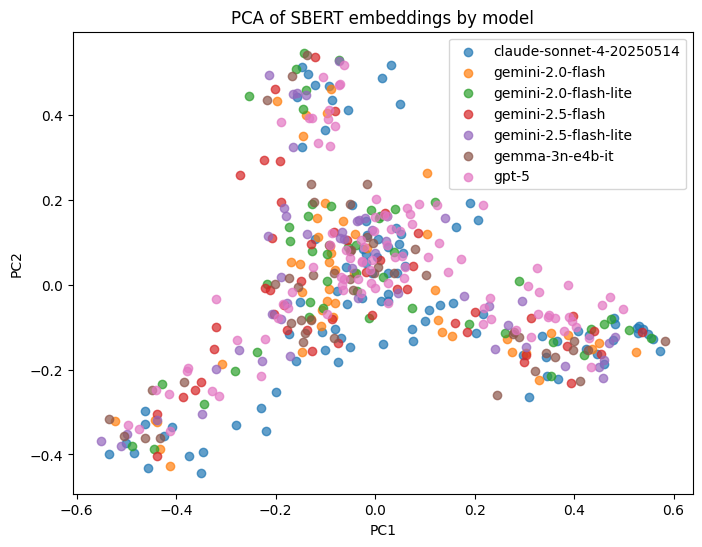

In [47]:
# Plot
plt.figure(figsize=(8, 6))
for model, group in df.groupby("model"):
    plt.scatter(group["pc1"], group["pc2"], label=model, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of SBERT embeddings by model")
plt.legend()
plt.show()


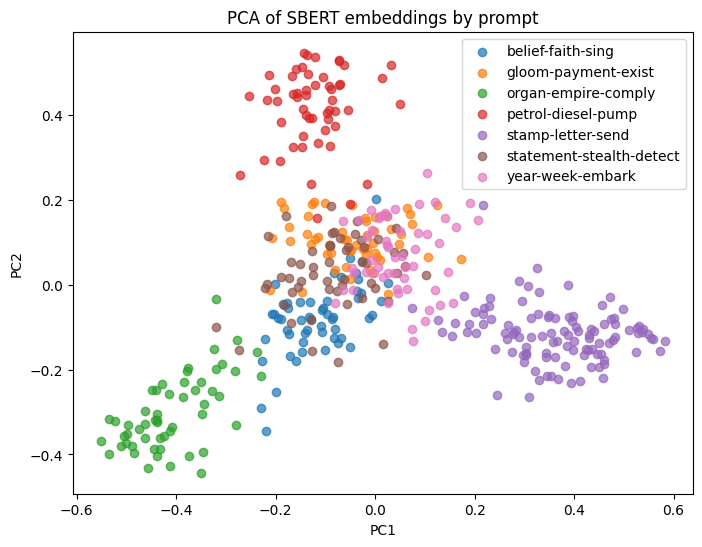

In [48]:
# Plot
plt.figure(figsize=(8, 6))
for prompt, group in df.groupby("prompt"):
    plt.scatter(group["pc1"], group["pc2"], label=prompt, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of SBERT embeddings by prompt")
plt.legend()
plt.show()


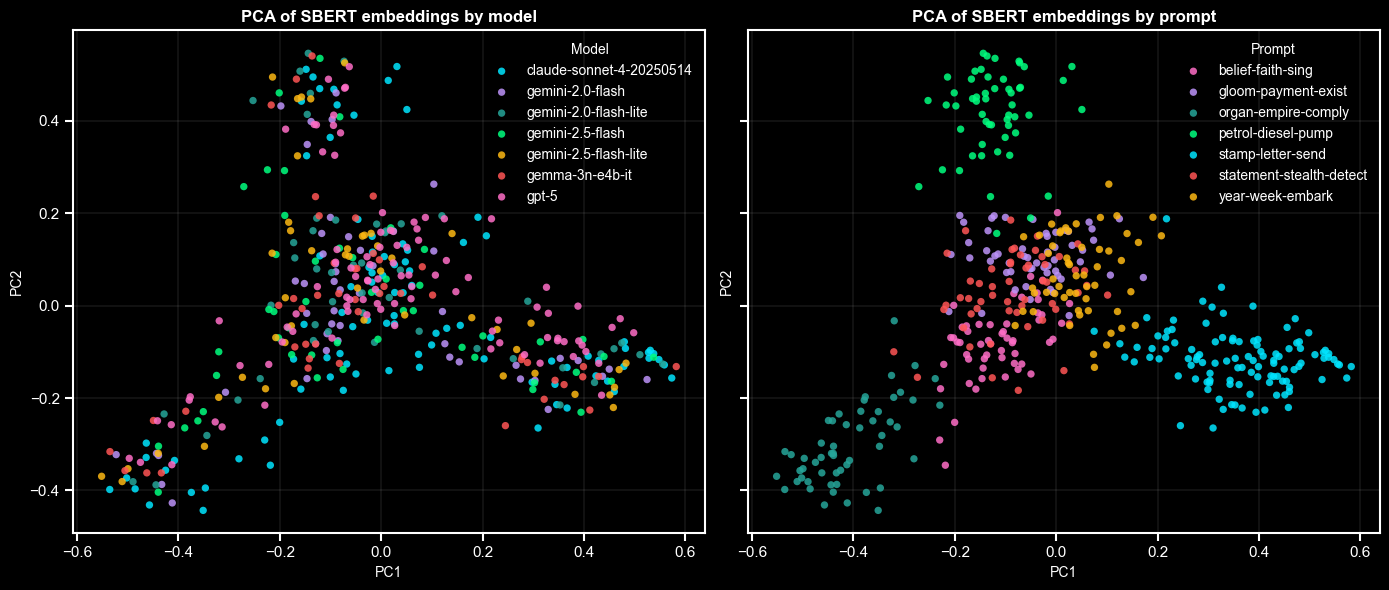

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import to_rgb

# df needs columns: ['pc1','pc2','model','prompt']

# ---------- Dark mode ----------
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# ---------- Editable color maps ----------
# Fill in/override as you like; unknown keys get cycled colors.
vibrant_cycle = [
    "#00E5FF", "#FF6EC7", "#00FF7F", "#FDB813",
    "#BD93F9", "#26A69A", "#FF5555", "#3B82F6",
    "#FF9F1C", "#2ECC71",
]

unique_models  = list(pd.unique(df["model"]))
unique_prompts = list(pd.unique(df["prompt"]))

# Override here if you want specific colors:
model_colors_override = {
    # "gpt-5": "#FFD400",
}
prompt_colors_override = {
    # "belief-faith-sing": "#00E5FF",
}

model_colors = {
    m: model_colors_override.get(m, vibrant_cycle[i % len(vibrant_cycle)])
    for i, m in enumerate(unique_models)
}
prompt_colors = {
    p: prompt_colors_override.get(p, vibrant_cycle[i % len(vibrant_cycle)])
    for i, p in enumerate(unique_prompts)
}

# ---------- Shared axis limits (so panels match) ----------
x_pad = 0.05
y_pad = 0.05
x_min, x_max = df["pc1"].min(), df["pc1"].max()
y_min, y_max = df["pc2"].min(), df["pc2"].max()
x_rng = x_max - x_min
y_rng = y_max - y_min
xlim = (x_min - x_pad*x_rng, x_max + x_pad*x_rng)
ylim = (y_min - y_pad*y_rng, y_max + y_pad*y_rng)

# ---------- Plot settings ----------
pt_size = 28
pt_alpha = 0.85

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=True, sharey=True)

# --- Left: by model ---
ax = axes[0]
for model, g in df.groupby("model", observed=False):
    ax.scatter(g["pc1"], g["pc2"], s=pt_size, alpha=pt_alpha,
               color=model_colors[model], label=model, edgecolors='none', zorder=3)

ax.set_xlim(xlim); ax.set_ylim(ylim)
ax.set_title("PCA of SBERT embeddings by model", color=fg_color, fontweight="bold")
ax.set_xlabel("PC1", color=fg_color); ax.set_ylabel("PC2", color=fg_color)
for spine in ax.spines.values():
    spine.set_color(fg_color); spine.set_linewidth(1.5)
ax.tick_params(colors=fg_color, labelsize=11, length=6, width=1.5)
leg1 = ax.legend(title="Model", loc="upper right", frameon=False)
leg1.get_title().set_color(fg_color)
for t in leg1.get_texts(): t.set_color(fg_color)

# --- Right: by prompt ---
ax = axes[1]
for prompt, g in df.groupby("prompt", observed=False):
    ax.scatter(g["pc1"], g["pc2"], s=pt_size, alpha=pt_alpha,
               color=prompt_colors[prompt], label=prompt, edgecolors='none', zorder=3)

ax.set_xlim(xlim); ax.set_ylim(ylim)
ax.set_title("PCA of SBERT embeddings by prompt", color=fg_color, fontweight="bold")
ax.set_xlabel("PC1", color=fg_color); ax.set_ylabel("PC2", color=fg_color)
for spine in ax.spines.values():
    spine.set_color(fg_color); spine.set_linewidth(1.5)
ax.tick_params(colors=fg_color, labelsize=11, length=6, width=1.5)
leg2 = ax.legend(title="Prompt", loc="upper right", frameon=False)
leg2.get_title().set_color(fg_color)
for t in leg2.get_texts(): t.set_color(fg_color)

for ax in axes: ax.grid(True, color=(1,1,1,0.08), linewidth=0.1)

plt.tight_layout()

plt.savefig("./results/plots/DSI_1.1_PCA_responses.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())
plt.show()


In [51]:
with open(all_responses, "r") as f:
    data = json.load(f)

rows = []

for story in all_human_stories: # all_human_stories: study1["Story"].to_list()
    rows.append({"model": "human", "text": story, "prompt": classify_story(story, categories)})

# Flatten into dataframe: each row = (model, text)
for model, configs in data.items():
    for cfg, texts in configs.items():
        for txt_group in texts:
            for txt in txt_group:
                rows.append({"model": model, "text": txt, "prompt": classify_story(txt, categories)})

df = pd.DataFrame(rows)

# Initialize encoder
encoder = SBERT_Encoder()

# Compute embeddings
human_llm_story_emb = []
for text in tqdm(df["text"]):
    emb = encoder.get_unit_vector(text)
    human_llm_story_emb.append(emb.numpy())

Initializing SBERT_Encoder


100%|██████████| 1682/1682 [00:13<00:00, 128.73it/s]


In [52]:
embeddings = torch.tensor(human_llm_story_emb).numpy()

# PCA to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Add PCA coords to dataframe
df["pc1"] = reduced[:, 0]
df["pc2"] = reduced[:, 1]

In [53]:
df

,model,text,prompt,pc1,pc2
0,human,My lover has left. I miss him so much. I write...,stamp-letter-send,0.464570,0.018461
1,human,My mom was sending me a letter in the mail abo...,stamp-letter-send,0.348133,-0.002400
2,human,I had to buy a stamp at the post office. I am ...,stamp-letter-send,0.642138,-0.047961
3,human,I decided it was time for me to send my mom an...,stamp-letter-send,0.532317,-0.010795
4,human,Rachel was sitting in her dorm and decided to ...,stamp-letter-send,0.480260,0.028071
...,...,...,...,...,...
1677,gemma-3n-e4b-it,Anya had dreamt of this **year** for as long a...,year-week-embark,-0.135882,0.149282
1678,gemma-3n-e4b-it,"Eliza carefully selected a vintage **stamp**, ...",stamp-letter-send,0.534767,0.132053
1679,gemma-3n-e4b-it,A persistent gloom settled over the antique sh...,gloom-payment-exist,-0.134701,0.192378
1680,gemma-3n-e4b-it,"The Emperor’s heart, a grotesque, pulsating or...",organ-empire-comply,-0.367233,0.014177


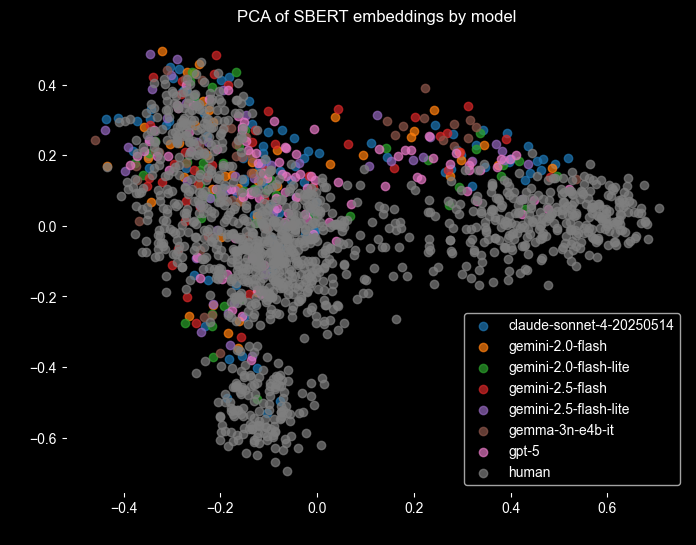

In [54]:
# Plot
plt.figure(figsize=(8, 6))
for model, group in df.groupby("model"):
    plt.scatter(group["pc1"], group["pc2"], label=model, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of SBERT embeddings by model")
plt.legend()
plt.show()

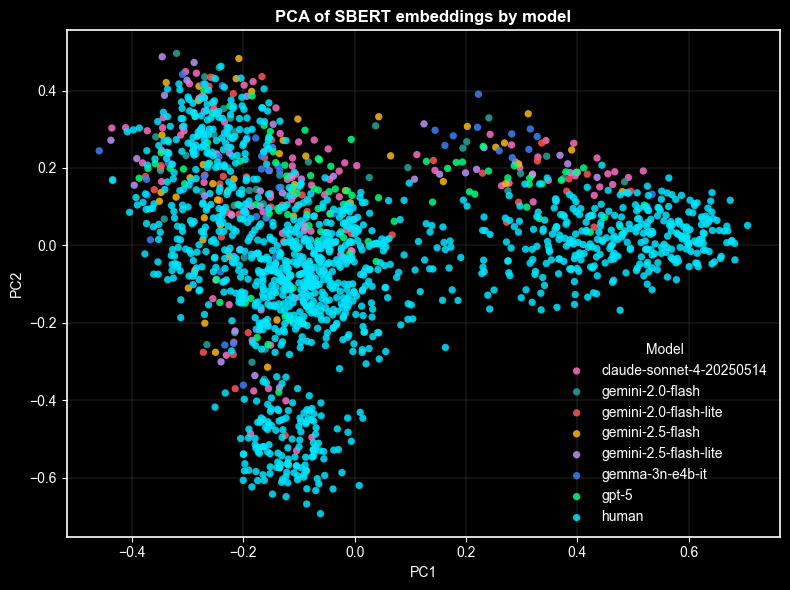

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# df must have: ["pc1","pc2","model"]

# ---- Dark mode style ----
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# ---- Colors (edit any you want) ----
models = list(pd.unique(df["model"]))
vibrant_cycle = [
    "#00E5FF", "#FF6EC7", "#00FF7F", "#FDB813",
    "#BD93F9", "#26A69A", "#FF5555", "#3B82F6",
    "#FF9F1C", "#2ECC71",
]
model_colors_override = {
    # "human": "#FFD400",
    # "gpt-5": "#FF6EC7",
    # "gemini-2.5-flash": "#00E5FF",
}
model_colors = {m: model_colors_override.get(m, vibrant_cycle[i % len(vibrant_cycle)])
                for i, m in enumerate(models)}

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 6))

for model, group in df.groupby("model", observed=False):
    ax.scatter(group["pc1"], group["pc2"],
               label=model, alpha=0.85, s=28,
               color=model_colors[model], edgecolors="none", zorder=3)

ax.set_xlabel("PC1", color=fg_color)
ax.set_ylabel("PC2", color=fg_color)
ax.set_title("PCA of SBERT embeddings by model", color=fg_color, fontweight="bold")

# grid + spines (white)
ax.grid(True, color=(1, 1, 1, 0.08), linewidth=0.1)
for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.2)
ax.tick_params(colors=fg_color)

# legend
leg = ax.legend(title="Model", loc="lower right", frameon=False)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)
    
plt.savefig("./results/plots/DSI_1.2_with_humans.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())

plt.tight_layout()
plt.show()


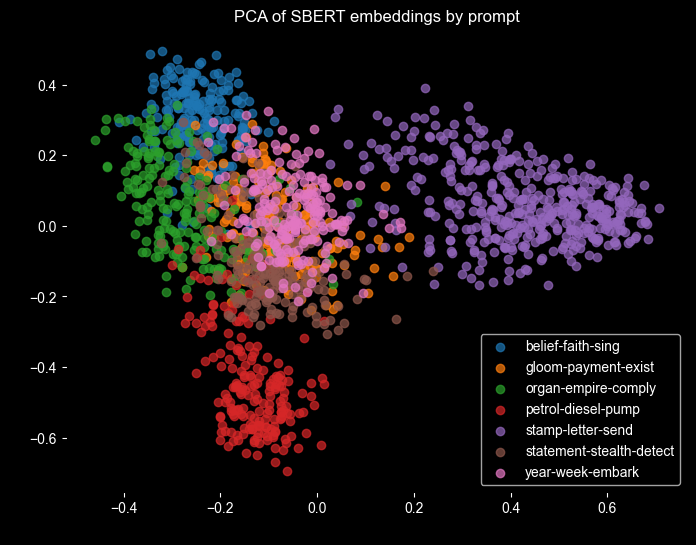

In [26]:
# Plot
plt.figure(figsize=(8, 6))
for prompt, group in df.groupby("prompt"):
    plt.scatter(group["pc1"], group["pc2"], label=prompt, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of SBERT embeddings by prompt")
plt.legend()
plt.show()

In [45]:
# Example data you provided (shortened to one model for clarity, extend for others)
with open(all_responses, "r") as f:
    data = json.load(f)

rows = []

for story in all_human_stories: # all_human_stories: study1["Story"].to_list()
    category = classify_story(story, categories)
    if category == "stamp-letter-send":
        rows.append({"model": "human", "text": story, "prompt": classify_story(story, categories)})

# Flatten into dataframe: each row = (model, text)
for model, configs in data.items():
    for cfg, texts in configs.items():
        for txt_group in texts:
            for txt in txt_group:
                category = classify_story(txt, categories)
                if category == "stamp-letter-send":
                    rows.append({"model": model, "text": txt, "prompt": classify_story(txt, categories)})

df = pd.DataFrame(rows)

# Initialize encoder
encoder = SBERT_Encoder()

# Compute embeddings
human_llm_story_emb = []
for text in tqdm(df["text"]):
    emb = encoder.get_unit_vector(text)
    human_llm_story_emb.append(emb.numpy())

Initializing SBERT_Encoder


100%|██████████| 440/440 [00:03<00:00, 127.73it/s]


In [46]:
embeddings = torch.tensor(human_llm_story_emb).numpy()

# PCA to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

# Add PCA coords to dataframe
df["pc1"] = reduced[:, 0]
df["pc2"] = reduced[:, 1]

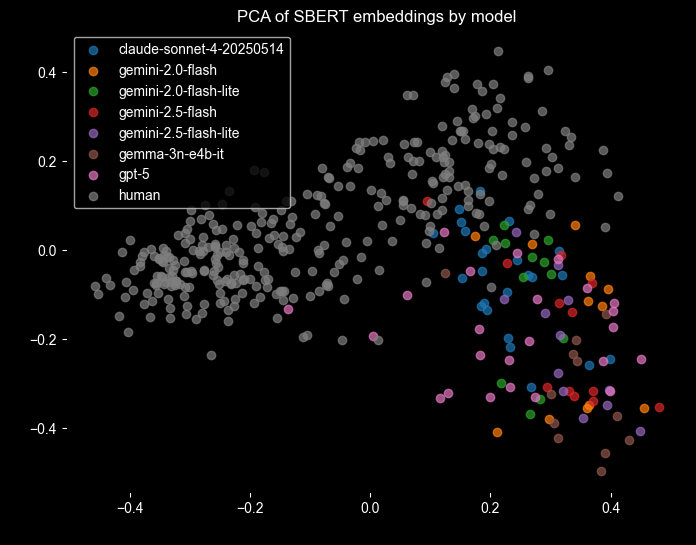

In [47]:
# Plot
plt.figure(figsize=(8, 6))
for model, group in df.groupby("model"):
    plt.scatter(group["pc1"], group["pc2"], label=model, alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of SBERT embeddings by model")
plt.legend()
plt.show()

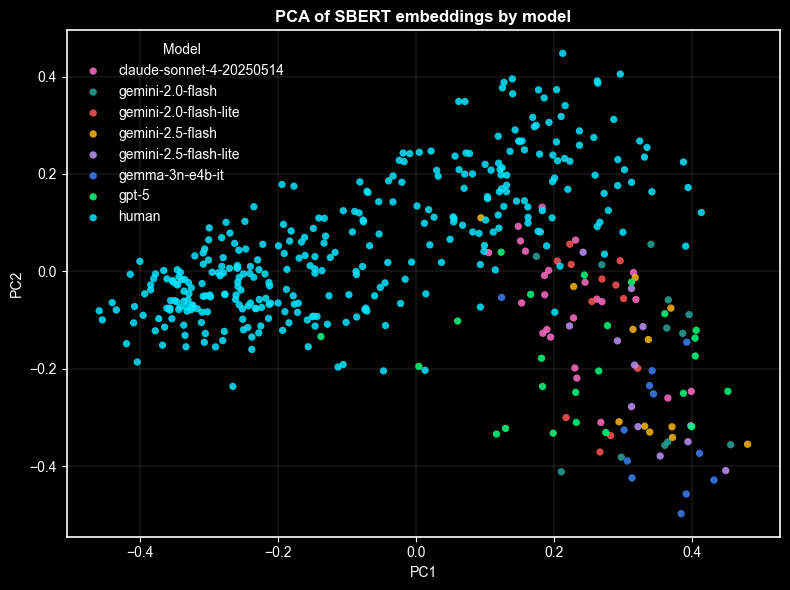

In [50]:
import matplotlib.pyplot as plt
import pandas as pd

# df must have columns: ["pc1", "pc2", "model"]

# ---- Dark mode styling ----
base_style = {"text.usetex": False, "mathtext.fontset": "cm"}
theme_style = {
    "font.family": ["Arial", "DejaVu Sans", "sans-serif"],
    "figure.facecolor": "black",
    "axes.facecolor": "black",
    "savefig.facecolor": "black",
    "text.color": "white",
    "xtick.color": "white",
    "ytick.color": "white",
}
plt.rcParams.update({**base_style, **theme_style})
fg_color = "white"

# ---- Editable per-model colors ----
models = list(pd.unique(df["model"]))
vibrant_cycle = [
    "#00E5FF", "#FF6EC7", "#00FF7F", "#FDB813",
    "#BD93F9", "#26A69A", "#FF5555", "#3B82F6",
    "#FF9F1C", "#2ECC71",
]
custom_colors = {
    # "human": "#FFD400",
    # "gpt-5": "#FF6EC7",
    # "gemini-2.5-flash": "#00E5FF",
}
model_colors = {m: custom_colors.get(m, vibrant_cycle[i % len(vibrant_cycle)])
                for i, m in enumerate(models)}

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 6))

for model, group in df.groupby("model", observed=False):
    ax.scatter(group["pc1"], group["pc2"],
               label=model, alpha=0.85, s=28,
               color=model_colors[model], edgecolors="none", zorder=3)

ax.set_xlabel("PC1", color=fg_color)
ax.set_ylabel("PC2", color=fg_color)
ax.set_title("PCA of SBERT embeddings by model", color=fg_color, fontweight="bold")

# Optional: subtle grid and white spines (matches your other plots)
ax.grid(True, color=(1, 1, 1, 0.08), linewidth=0.1)
for spine in ax.spines.values():
    spine.set_color("white")
    spine.set_linewidth(1.2)
ax.tick_params(colors=fg_color)

leg = ax.legend(title="Model", loc="upper left", frameon=False)
leg.get_title().set_color(fg_color)
for t in leg.get_texts():
    t.set_color(fg_color)

plt.tight_layout()
plt.savefig("./results/plots/DSI_1.2_with_humans_brick.png",
                dpi=300,
                facecolor=plt.gcf().get_facecolor())
plt.show()
